In [1876]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.tree import plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree      import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier

# SUDESTE

## Criando DataFrames que serão Agrupados (SP)


In [1409]:
Braganca = pd.read_csv('Ambiente de teste-treinamento\SP_BP_tratado')
BaseBraganca = Braganca [[
    'Dia',
    'Precipitação (mm)',
    'Pressão Média (mB)',
    'Temp Ponto Orvalho (°C)',
    'Umidade Média (%)',
    'Cobertura Vegetal (%)',
    'Altitude',
    'Problemas de Drenagem',
    'Risco alagamento',
]]

BaseBraganca

<>:1: SyntaxWarning: invalid escape sequence '\S'
<>:1: SyntaxWarning: invalid escape sequence '\S'
C:\Users\luan_\AppData\Local\Temp\ipykernel_20632\1911080364.py:1: SyntaxWarning: invalid escape sequence '\S'
  Braganca = pd.read_csv('Ambiente de teste-treinamento\SP_BP_tratado')


,Dia,Precipitação (mm),Pressão Média (mB),Temp Ponto Orvalho (°C),Umidade Média (%),Cobertura Vegetal (%),Altitude,Problemas de Drenagem,Risco alagamento
0,2023-01-01,1.6,915.743478,18.195652,81.913043,30,Média,Sim,Risco Baixo
1,2023-01-02,0.2,875.489583,17.200000,73.791667,30,Média,Sim,Risco Baixo
2,2023-01-03,12.8,911.952083,19.270833,88.583333,30,Média,Sim,Risco Moderado
3,2023-01-04,28.2,835.247917,17.362500,77.916667,30,Média,Sim,Risco Moderado
4,2023-01-05,29.4,874.908333,16.583333,95.375000,30,Média,Sim,Risco Moderado
...,...,...,...,...,...,...,...,...,...
360,2023-12-27,0.0,840.654167,14.466667,66.916667,30,Média,Sim,Sem Risco
361,2023-12-28,0.0,878.250000,14.633333,63.625000,30,Média,Sim,Sem Risco
362,2023-12-29,0.0,838.102083,16.429167,59.250000,30,Média,Sim,Sem Risco
363,2023-12-30,0.2,877.395833,17.400000,76.666667,30,Média,Sim,Risco Baixo


In [1410]:
Bertioga = pd.read_csv('Ambiente de teste-treinamento\SP_Bertioga_tratado')
BaseBertioga = Bertioga [[
    'Dia',
    'Precipitação (mm)',
    'Pressão Média (mB)',
    'Temp Ponto Orvalho (°C)',
    'Umidade Média (%)',
    'Cobertura Vegetal (%)',
    'Altitude',
    'Problemas de Drenagem',
    'Risco alagamento',
]]

BaseBertioga

<>:1: SyntaxWarning: invalid escape sequence '\S'
<>:1: SyntaxWarning: invalid escape sequence '\S'
C:\Users\luan_\AppData\Local\Temp\ipykernel_20632\3945288490.py:1: SyntaxWarning: invalid escape sequence '\S'
  Bertioga = pd.read_csv('Ambiente de teste-treinamento\SP_Bertioga_tratado')


,Dia,Precipitação (mm),Pressão Média (mB),Temp Ponto Orvalho (°C),Umidade Média (%),Cobertura Vegetal (%),Altitude,Problemas de Drenagem,Risco alagamento
0,2023-01-01,0.2,1013.765217,21.752174,86.739130,72,Baixa,Sim,Risco Baixo
1,2023-01-02,0.0,1010.883333,22.062500,84.666667,72,Baixa,Sim,Sem Risco
2,2023-01-03,0.4,1006.506250,21.787500,76.500000,72,Baixa,Sim,Risco Baixo
3,2023-01-04,16.8,1007.243750,21.879167,82.916667,72,Baixa,Sim,Risco Moderado
4,2023-01-05,27.6,1012.256250,19.941667,95.041667,72,Baixa,Sim,Risco Moderado
...,...,...,...,...,...,...,...,...,...
360,2023-12-27,0.0,1015.514583,20.283333,79.333333,72,Baixa,Sim,Sem Risco
361,2023-12-28,0.0,1014.185417,20.633333,80.708333,72,Baixa,Sim,Sem Risco
362,2023-12-29,0.0,1008.500000,14.129167,59.041667,72,Baixa,Sim,Sem Risco
363,2023-12-30,10.8,969.764583,22.312500,86.833333,72,Baixa,Sim,Risco Moderado


In [1411]:
Barueri = pd.read_csv('Ambiente de teste-treinamento\SP_Barueri_tratado')
BaseBarueri = Barueri [[
    'Dia',
    'Precipitação (mm)',
    'Pressão Média (mB)',
    'Temp Ponto Orvalho (°C)',
    'Umidade Média (%)',
    'Cobertura Vegetal (%)',
    'Altitude',
    'Problemas de Drenagem',
    'Risco alagamento',
]]

BaseBarueri

<>:1: SyntaxWarning: invalid escape sequence '\S'
<>:1: SyntaxWarning: invalid escape sequence '\S'
C:\Users\luan_\AppData\Local\Temp\ipykernel_20632\2422850046.py:1: SyntaxWarning: invalid escape sequence '\S'
  Barueri = pd.read_csv('Ambiente de teste-treinamento\SP_Barueri_tratado')


,Dia,Precipitação (mm),Pressão Média (mB),Temp Ponto Orvalho (°C),Umidade Média (%),Cobertura Vegetal (%),Altitude,Problemas de Drenagem,Risco alagamento
0,2023-01-01,0.0,927.547826,18.673913,82.565217,23,Média,Sim,Sem Risco
1,2023-01-02,0.0,925.210417,17.858333,72.333333,23,Média,Sim,Sem Risco
2,2023-01-03,6.0,923.002083,18.912500,79.250000,23,Média,Sim,Risco Baixo
3,2023-01-04,53.0,922.720833,18.904167,89.208333,23,Média,Sim,Risco Moderado
4,2023-01-05,16.0,925.406250,16.266667,96.000000,23,Média,Sim,Risco Moderado
...,...,...,...,...,...,...,...,...,...
360,2023-12-27,0.0,657.685417,10.829167,47.750000,23,Média,Sim,Sem Risco
361,2023-12-28,0.0,888.766667,14.470833,60.041667,23,Média,Sim,Sem Risco
362,2023-12-29,0.0,886.137500,16.408333,61.250000,23,Média,Sim,Sem Risco
363,2023-12-30,2.6,849.352083,16.120833,72.208333,23,Média,Sim,Risco Baixo


In [1412]:
Iguape = pd.read_csv('Ambiente de teste-treinamento\SP_Iguapê_tratado')
BaseIguape = Iguape [[
    'Dia',
    'Precipitação (mm)',
    'Pressão Média (mB)',
    'Temp Ponto Orvalho (°C)',
    'Umidade Média (%)',
    'Cobertura Vegetal (%)',
    'Altitude',
    'Problemas de Drenagem',
    'Risco alagamento',
]]
BaseIguape

<>:1: SyntaxWarning: invalid escape sequence '\S'
<>:1: SyntaxWarning: invalid escape sequence '\S'
C:\Users\luan_\AppData\Local\Temp\ipykernel_20632\2800621951.py:1: SyntaxWarning: invalid escape sequence '\S'
  Iguape = pd.read_csv('Ambiente de teste-treinamento\SP_Iguapê_tratado')


,Dia,Precipitação (mm),Pressão Média (mB),Temp Ponto Orvalho (°C),Umidade Média (%),Cobertura Vegetal (%),Altitude,Problemas de Drenagem,Risco alagamento
0,2023-01-01,0.0,1013.663043,20.465217,80.652174,70,Média,Sim,Sem Risco
1,2023-01-02,0.0,1010.458333,21.012500,79.708333,70,Média,Sim,Sem Risco
2,2023-01-03,1.8,1006.289583,21.162500,77.041667,70,Média,Sim,Risco Baixo
3,2023-01-04,75.2,1008.152083,20.212500,89.291667,70,Média,Sim,Risco Elevado
4,2023-01-05,26.4,1012.839583,18.462500,85.375000,70,Média,Sim,Risco Moderado
...,...,...,...,...,...,...,...,...,...
360,2023-12-27,0.0,1015.283333,19.162500,73.916667,70,Média,Sim,Sem Risco
361,2023-12-28,0.0,1013.770833,19.062500,77.208333,70,Média,Sim,Sem Risco
362,2023-12-29,0.0,1008.064583,20.154167,72.875000,70,Média,Sim,Sem Risco
363,2023-12-30,12.2,1012.333333,21.233333,80.375000,70,Média,Sim,Risco Baixo


In [1413]:
Taubate = pd.read_csv('Ambiente de teste-treinamento\SP_Taubate_tratado')
BaseTaubate = Taubate [[
    'Dia',
    'Precipitação (mm)',
    'Pressão Média (mB)',
    'Temp Ponto Orvalho (°C)',
    'Umidade Média (%)',
    'Cobertura Vegetal (%)',
    'Altitude',
    'Problemas de Drenagem',
    'Risco alagamento',
]]
BaseTaubate

<>:1: SyntaxWarning: invalid escape sequence '\S'
<>:1: SyntaxWarning: invalid escape sequence '\S'
C:\Users\luan_\AppData\Local\Temp\ipykernel_20632\3680692828.py:1: SyntaxWarning: invalid escape sequence '\S'
  Taubate = pd.read_csv('Ambiente de teste-treinamento\SP_Taubate_tratado')


,Dia,Precipitação (mm),Pressão Média (mB),Temp Ponto Orvalho (°C),Umidade Média (%),Cobertura Vegetal (%),Altitude,Problemas de Drenagem,Risco alagamento
0,2023-01-01,0.2,948.789130,17.878261,76.869565,55,Média,Não,Sem Risco
1,2023-01-02,1.2,946.564583,17.804167,72.875000,55,Média,Não,Sem Risco
2,2023-01-03,0.2,944.460417,18.495833,78.166667,55,Média,Não,Sem Risco
3,2023-01-04,28.0,943.472917,19.958333,81.708333,55,Média,Não,Risco Baixo
4,2023-01-05,23.2,946.250000,17.729167,90.375000,55,Média,Não,Risco Baixo
...,...,...,...,...,...,...,...,...,...
360,2023-12-27,0.6,949.718750,16.004167,69.333333,55,Média,Não,Sem Risco
361,2023-12-28,0.0,948.837500,16.800000,67.000000,55,Média,Não,Sem Risco
362,2023-12-29,0.0,945.656250,18.508333,67.250000,55,Média,Não,Sem Risco
363,2023-12-30,0.4,947.202083,19.004167,79.166667,55,Média,Não,Sem Risco


In [1414]:
SP = pd.read_csv('Ambiente de teste-treinamento\SP_tratado')
BaseInterlagos = SP [[
    'Dia',
    'Precipitação (mm)',
    'Pressão Média (mB)',
    'Temp Ponto Orvalho (°C)',
    'Umidade Média (%)',
    'Cobertura Vegetal (%)',
    'Altitude',
    'Problemas de Drenagem',
    'Risco alagamento',
]]

BaseInterlagos

<>:1: SyntaxWarning: invalid escape sequence '\S'
<>:1: SyntaxWarning: invalid escape sequence '\S'
C:\Users\luan_\AppData\Local\Temp\ipykernel_20632\3339294538.py:1: SyntaxWarning: invalid escape sequence '\S'
  SP = pd.read_csv('Ambiente de teste-treinamento\SP_tratado')


,Dia,Precipitação (mm),Pressão Média (mB),Temp Ponto Orvalho (°C),Umidade Média (%),Cobertura Vegetal (%),Altitude,Problemas de Drenagem,Risco alagamento
0,2023-01-01,0.2,927.426087,19.817391,92.130435,19,Média,Sim,Risco Baixo
1,2023-01-02,0.2,924.968750,18.854167,80.416667,19,Média,Sim,Risco Baixo
2,2023-01-03,12.6,922.472917,19.316667,80.875000,19,Média,Sim,Risco Moderado
3,2023-01-04,28.4,922.343750,19.983333,97.666667,19,Média,Sim,Risco Moderado
4,2023-01-05,17.2,925.206250,16.754167,100.000000,19,Média,Sim,Risco Moderado
...,...,...,...,...,...,...,...,...,...
360,2023-12-27,0.2,928.664583,15.441667,76.916667,19,Média,Sim,Risco Baixo
361,2023-12-28,0.0,927.470833,15.937500,72.750000,19,Média,Sim,Sem Risco
362,2023-12-29,0.0,924.285417,17.375000,63.250000,19,Média,Sim,Sem Risco
363,2023-12-30,9.2,926.525000,17.862500,82.208333,19,Média,Sim,Risco Baixo


In [1415]:
SLP = pd.read_csv('Ambiente de teste-treinamento\SP_SLP_tratado')
BaseSLP = SLP [[
    'Dia',
    'Precipitação (mm)',
    'Pressão Média (mB)',
    'Temp Ponto Orvalho (°C)',
    'Umidade Média (%)',
    'Cobertura Vegetal (%)',
    'Altitude',
    'Problemas de Drenagem',
    'Risco alagamento',
]]
BaseSLP

<>:1: SyntaxWarning: invalid escape sequence '\S'
<>:1: SyntaxWarning: invalid escape sequence '\S'
C:\Users\luan_\AppData\Local\Temp\ipykernel_20632\1054850367.py:1: SyntaxWarning: invalid escape sequence '\S'
  SLP = pd.read_csv('Ambiente de teste-treinamento\SP_SLP_tratado')


,Dia,Precipitação (mm),Pressão Média (mB),Temp Ponto Orvalho (°C),Umidade Média (%),Cobertura Vegetal (%),Altitude,Problemas de Drenagem,Risco alagamento
0,2023-01-01,0.0,917.680435,17.456522,83.304348,55,Média,Sim,Sem Risco
1,2023-01-02,0.0,915.577083,17.341667,81.333333,55,Média,Sim,Sem Risco
2,2023-01-03,0.0,913.464583,18.166667,84.250000,55,Média,Sim,Sem Risco
3,2023-01-04,0.0,912.643750,19.020833,88.083333,55,Média,Sim,Sem Risco
4,2023-01-05,0.0,914.781250,16.920833,96.583333,55,Média,Sim,Sem Risco
...,...,...,...,...,...,...,...,...,...
360,2023-12-27,0.2,918.502083,15.491667,78.708333,55,Média,Sim,Risco Baixo
361,2023-12-28,0.0,917.693750,16.033333,75.708333,55,Média,Sim,Sem Risco
362,2023-12-29,0.2,914.922917,18.670833,76.833333,55,Média,Sim,Risco Baixo
363,2023-12-30,0.8,916.412500,18.245833,84.041667,55,Média,Sim,Risco Baixo


In [1416]:
Registro = pd.read_csv('Ambiente de teste-treinamento\SP_Registro_tratado')
BaseRegistro = Registro [[
    'Dia',
    'Precipitação (mm)',
    'Pressão Média (mB)',
    'Temp Ponto Orvalho (°C)',
    'Umidade Média (%)',
    'Cobertura Vegetal (%)',
    'Altitude',
    'Problemas de Drenagem',
    'Risco alagamento',
]]
BaseRegistro

<>:1: SyntaxWarning: invalid escape sequence '\S'
<>:1: SyntaxWarning: invalid escape sequence '\S'
C:\Users\luan_\AppData\Local\Temp\ipykernel_20632\3654967105.py:1: SyntaxWarning: invalid escape sequence '\S'
  Registro = pd.read_csv('Ambiente de teste-treinamento\SP_Registro_tratado')


,Dia,Precipitação (mm),Pressão Média (mB),Temp Ponto Orvalho (°C),Umidade Média (%),Cobertura Vegetal (%),Altitude,Problemas de Drenagem,Risco alagamento
0,2023-01-01,0.0,1010.660870,17.156522,62.391304,60,Baixa,Sim,Sem Risco
1,2023-01-02,5.8,1007.452083,17.195833,61.250000,60,Baixa,Sim,Risco Baixo
2,2023-01-03,0.4,961.622917,14.445833,48.708333,60,Baixa,Sim,Risco Baixo
3,2023-01-04,41.4,963.727083,19.966667,91.666667,60,Baixa,Sim,Risco Moderado
4,2023-01-05,4.2,1010.070833,11.829167,54.000000,60,Baixa,Sim,Risco Baixo
...,...,...,...,...,...,...,...,...,...
360,2023-12-27,0.0,970.220833,12.758333,46.958333,60,Baixa,Sim,Sem Risco
361,2023-12-28,0.0,926.360417,10.695833,32.708333,60,Baixa,Sim,Sem Risco
362,2023-12-29,0.0,963.281250,12.929167,32.666667,60,Baixa,Sim,Sem Risco
363,2023-12-30,18.2,967.631250,2.341667,8.333333,60,Baixa,Sim,Risco Moderado


In [1417]:
Piracicaba = pd.read_csv('Ambiente de teste-treinamento\SP_Piracicaba_tratado')
BasePira = Piracicaba [[
    'Dia',
    'Precipitação (mm)',
    'Pressão Média (mB)',
    'Temp Ponto Orvalho (°C)',
    'Umidade Média (%)',
    'Cobertura Vegetal (%)',
    'Altitude',
    'Problemas de Drenagem',
    'Risco alagamento',
]]
BasePira

<>:1: SyntaxWarning: invalid escape sequence '\S'
<>:1: SyntaxWarning: invalid escape sequence '\S'
C:\Users\luan_\AppData\Local\Temp\ipykernel_20632\2949267731.py:1: SyntaxWarning: invalid escape sequence '\S'
  Piracicaba = pd.read_csv('Ambiente de teste-treinamento\SP_Piracicaba_tratado')


,Dia,Precipitação (mm),Pressão Média (mB),Temp Ponto Orvalho (°C),Umidade Média (%),Cobertura Vegetal (%),Altitude,Problemas de Drenagem,Risco alagamento
0,2023-01-01,10.2,949.856522,20.134783,81.782609,45,Média,Não,Risco Baixo
1,2023-01-02,0.0,947.700000,18.758333,74.875000,45,Média,Não,Sem Risco
2,2023-01-03,5.2,946.022917,20.241667,83.625000,45,Média,Não,Sem Risco
3,2023-01-04,5.2,945.375000,20.012500,83.750000,45,Média,Não,Sem Risco
4,2023-01-05,16.2,947.597917,17.725000,90.625000,45,Média,Não,Risco Baixo
...,...,...,...,...,...,...,...,...,...
360,2023-12-27,0.0,949.972917,16.000000,59.208333,45,Média,Não,Sem Risco
361,2023-12-28,0.0,949.635417,14.029167,54.291667,45,Média,Não,Sem Risco
362,2023-12-29,0.0,947.064583,16.337500,55.500000,45,Média,Não,Sem Risco
363,2023-12-30,0.0,948.360417,17.408333,64.708333,45,Média,Não,Sem Risco


## Agrupando todos DataFrames (SP)

In [1418]:
bases = [BaseBraganca, BaseBertioga, BaseBarueri, BaseTaubate, BasePira, BaseRegistro, BaseInterlagos, BaseIguape, BaseSLP]
nomes_estacoes = ['Braganca', 'Bertioga', 'Barueri', 'Taubate', 'Piracicaba', 'Registro', 'Interlagos', 'Iguape', 'São Luiz']


for df, nome in zip(bases, nomes_estacoes):
    df['Estação (SP)'] = nome


BaseSP_Agrupado = pd.concat(bases, ignore_index=True)

C:\Users\luan_\AppData\Local\Temp\ipykernel_20632\3140687589.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Estação (SP)'] = nome
C:\Users\luan_\AppData\Local\Temp\ipykernel_20632\3140687589.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Estação (SP)'] = nome
C:\Users\luan_\AppData\Local\Temp\ipykernel_20632\3140687589.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [1419]:
colunas = ['Estação (SP)'] + [col for col in BaseSP_Agrupado.columns if col != 'Estação (SP)']
BaseSP_Agrupado = BaseSP_Agrupado[colunas]

In [1420]:
BaseSP_Agrupado.shape

(3285, 10)

In [1421]:
BaseSP_Agrupado

,Estação (SP),Dia,Precipitação (mm),Pressão Média (mB),Temp Ponto Orvalho (°C),Umidade Média (%),Cobertura Vegetal (%),Altitude,Problemas de Drenagem,Risco alagamento
0,Braganca,2023-01-01,1.6,915.743478,18.195652,81.913043,30,Média,Sim,Risco Baixo
1,Braganca,2023-01-02,0.2,875.489583,17.200000,73.791667,30,Média,Sim,Risco Baixo
2,Braganca,2023-01-03,12.8,911.952083,19.270833,88.583333,30,Média,Sim,Risco Moderado
3,Braganca,2023-01-04,28.2,835.247917,17.362500,77.916667,30,Média,Sim,Risco Moderado
4,Braganca,2023-01-05,29.4,874.908333,16.583333,95.375000,30,Média,Sim,Risco Moderado
...,...,...,...,...,...,...,...,...,...,...
3280,São Luiz,2023-12-27,0.2,918.502083,15.491667,78.708333,55,Média,Sim,Risco Baixo
3281,São Luiz,2023-12-28,0.0,917.693750,16.033333,75.708333,55,Média,Sim,Sem Risco
3282,São Luiz,2023-12-29,0.2,914.922917,18.670833,76.833333,55,Média,Sim,Risco Baixo
3283,São Luiz,2023-12-30,0.8,916.412500,18.245833,84.041667,55,Média,Sim,Risco Baixo


In [1422]:
print(BaseSP_Agrupado['Altitude'].value_counts())

Altitude
Média    2555
Baixa     730
Name: count, dtype: int64


In [1423]:
BaseSP_Agrupado.query('Dia == "2023-02-01" ')[[
    'Dia',
    'Estação (SP)',
    'Precipitação (mm)',
    'Pressão Média (mB)',
    'Temp Ponto Orvalho (°C)',
    'Umidade Média (%)',
    'Cobertura Vegetal (%)',
    'Altitude',
    'Problemas de Drenagem',
    'Risco alagamento'
]]

,Dia,Estação (SP),Precipitação (mm),Pressão Média (mB),Temp Ponto Orvalho (°C),Umidade Média (%),Cobertura Vegetal (%),Altitude,Problemas de Drenagem,Risco alagamento
31,2023-02-01,Braganca,15.8,915.177083,19.512500,83.875000,30,Média,Sim,Risco Moderado
396,2023-02-01,Bertioga,11.2,1011.008333,22.454167,81.625000,72,Baixa,Sim,Risco Moderado
761,2023-02-01,Barueri,30.6,926.610417,19.566667,84.083333,23,Média,Sim,Risco Moderado
1126,2023-02-01,Taubate,9.8,948.129167,19.720833,83.666667,55,Média,Não,Sem Risco
1491,2023-02-01,Piracicaba,25.2,949.614583,20.820833,87.458333,45,Média,Não,Risco Baixo
1856,2023-02-01,Registro,1.4,1007.543750,13.233333,45.250000,60,Baixa,Sim,Risco Baixo
2221,2023-02-01,Interlagos,15.8,926.166667,20.250000,85.500000,19,Média,Sim,Risco Moderado
2586,2023-02-01,Iguape,9.4,1010.297917,22.116667,80.625000,70,Média,Sim,Risco Baixo
2951,2023-02-01,São Luiz,0.0,840.583333,17.554167,80.583333,55,Média,Sim,Sem Risco


## Transformando a BaseSP_Agrupada

In [1424]:
BaseSP_Agrupado = BaseSP_Agrupado.drop(columns=['Dia'])
BaseSP_Agrupado = BaseSP_Agrupado.drop(columns=['Estação (SP)'])
BaseSP_Agrupado

,Precipitação (mm),Pressão Média (mB),Temp Ponto Orvalho (°C),Umidade Média (%),Cobertura Vegetal (%),Altitude,Problemas de Drenagem,Risco alagamento
0,1.6,915.743478,18.195652,81.913043,30,Média,Sim,Risco Baixo
1,0.2,875.489583,17.200000,73.791667,30,Média,Sim,Risco Baixo
2,12.8,911.952083,19.270833,88.583333,30,Média,Sim,Risco Moderado
3,28.2,835.247917,17.362500,77.916667,30,Média,Sim,Risco Moderado
4,29.4,874.908333,16.583333,95.375000,30,Média,Sim,Risco Moderado
...,...,...,...,...,...,...,...,...
3280,0.2,918.502083,15.491667,78.708333,55,Média,Sim,Risco Baixo
3281,0.0,917.693750,16.033333,75.708333,55,Média,Sim,Sem Risco
3282,0.2,914.922917,18.670833,76.833333,55,Média,Sim,Risco Baixo
3283,0.8,916.412500,18.245833,84.041667,55,Média,Sim,Risco Baixo


In [1425]:
altitude_map = {'Baixa': 1, 'Média': 2, 'Alta': 3}
risco_alagamento_map = {'Sem Risco': 0, 'Risco Baixo': 1, 'Risco Moderado': 2, 'Risco Elevado': 3, 'Risco Crítico': 4}
problemas_drenagem_map = {'Não': 0, 'Sim': 1}

# Aplicando os mapeamentos nas colunas do DataFrame
BaseSP_Agrupado['Altitude'] = BaseSP_Agrupado['Altitude'].map(altitude_map)
BaseSP_Agrupado['Risco alagamento'] = BaseSP_Agrupado['Risco alagamento'].map(risco_alagamento_map)
BaseSP_Agrupado['Problemas de Drenagem'] = BaseSP_Agrupado['Problemas de Drenagem'].map(problemas_drenagem_map)

In [1426]:
BaseSP_Agrupado

,Precipitação (mm),Pressão Média (mB),Temp Ponto Orvalho (°C),Umidade Média (%),Cobertura Vegetal (%),Altitude,Problemas de Drenagem,Risco alagamento
0,1.6,915.743478,18.195652,81.913043,30,2,1,1
1,0.2,875.489583,17.200000,73.791667,30,2,1,1
2,12.8,911.952083,19.270833,88.583333,30,2,1,2
3,28.2,835.247917,17.362500,77.916667,30,2,1,2
4,29.4,874.908333,16.583333,95.375000,30,2,1,2
...,...,...,...,...,...,...,...,...
3280,0.2,918.502083,15.491667,78.708333,55,2,1,1
3281,0.0,917.693750,16.033333,75.708333,55,2,1,0
3282,0.2,914.922917,18.670833,76.833333,55,2,1,1
3283,0.8,916.412500,18.245833,84.041667,55,2,1,1


In [1427]:
print(BaseSP_Agrupado['Risco alagamento'].value_counts())

Risco alagamento
0    1880
1    1101
2     273
3      21
4      10
Name: count, dtype: int64


In [1428]:
BaseSP_Agrupado.columns

Index(['Precipitação (mm)', 'Pressão Média (mB)', 'Temp Ponto Orvalho (°C)',
       'Umidade Média (%)', 'Cobertura Vegetal (%)', 'Altitude',
       'Problemas de Drenagem', 'Risco alagamento'],
      dtype='object')

In [1429]:
x = BaseSP_Agrupado.values # Dados todos em formato de matriz (Criando base temporária)
x

array([[1.60000000e+00, 9.15743478e+02, 1.81956522e+01, ...,
        2.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [2.00000000e-01, 8.75489583e+02, 1.72000000e+01, ...,
        2.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [1.28000000e+01, 9.11952083e+02, 1.92708333e+01, ...,
        2.00000000e+00, 1.00000000e+00, 2.00000000e+00],
       ...,
       [2.00000000e-01, 9.14922917e+02, 1.86708333e+01, ...,
        2.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [8.00000000e-01, 9.16412500e+02, 1.82458333e+01, ...,
        2.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.91416667e+02, 3.27500000e+00, ...,
        2.00000000e+00, 1.00000000e+00, 0.00000000e+00]])

In [1430]:
BaseSP_Agrupado.head()

,Precipitação (mm),Pressão Média (mB),Temp Ponto Orvalho (°C),Umidade Média (%),Cobertura Vegetal (%),Altitude,Problemas de Drenagem,Risco alagamento
0,1.6,915.743478,18.195652,81.913043,30,2,1,1
1,0.2,875.489583,17.200000,73.791667,30,2,1,1
2,12.8,911.952083,19.270833,88.583333,30,2,1,2
3,28.2,835.247917,17.362500,77.916667,30,2,1,2
4,29.4,874.908333,16.583333,95.375000,30,2,1,2


## Criando DataFrames que serão Agrupados (RJ)

In [1843]:
Duque_Caxias = pd.read_csv('Ambiente de teste-treinamento\RJ_DQC_tratado')
BaseDuque = Duque_Caxias [[
    'Dia',
    'Precipitação (mm)',
    'Pressão Média (mB)',
    'Temp Ponto Orvalho (°C)',
    'Umidade Média (%)',
    'Cobertura Vegetal (%)',
    'Altitude',
    'Problemas de Drenagem',
    'Risco alagamento',
]]

BaseDuque

<>:1: SyntaxWarning: invalid escape sequence '\R'
<>:1: SyntaxWarning: invalid escape sequence '\R'
C:\Users\luan_\AppData\Local\Temp\ipykernel_20632\1344873168.py:1: SyntaxWarning: invalid escape sequence '\R'
  Duque_Caxias = pd.read_csv('Ambiente de teste-treinamento\RJ_DQC_tratado')


,Dia,Precipitação (mm),Pressão Média (mB),Temp Ponto Orvalho (°C),Umidade Média (%),Cobertura Vegetal (%),Altitude,Problemas de Drenagem,Risco alagamento
0,2023-01-01,0.6,1011.619565,21.717391,86.391304,18,Baixa,Sim,Risco Moderado
1,2023-01-02,16.6,1009.472917,20.216667,77.708333,18,Baixa,Sim,Risco Moderado
2,2023-01-03,0.0,1005.850000,20.104167,60.708333,18,Baixa,Sim,Sem Risco
3,2023-01-04,5.0,1005.031250,21.308333,64.333333,18,Baixa,Sim,Risco Moderado
4,2023-01-05,13.4,1008.277083,22.325000,95.500000,18,Baixa,Sim,Risco Moderado
...,...,...,...,...,...,...,...,...,...
360,2023-12-27,19.8,1013.520833,20.700000,85.250000,18,Baixa,Sim,Risco Moderado
361,2023-12-28,0.0,1012.543750,20.916667,79.416667,18,Baixa,Sim,Sem Risco
362,2023-12-29,0.0,1007.379167,21.908333,74.500000,18,Baixa,Sim,Sem Risco
363,2023-12-30,7.4,1008.795833,23.712500,92.666667,18,Baixa,Sim,Risco Moderado


In [1844]:
Goytacazes = pd.read_csv('Ambiente de teste-treinamento\RJ_Goytacazes_tratado')
BaseGoytacazes = Goytacazes [[
    'Dia',
    'Precipitação (mm)',
    'Pressão Média (mB)',
    'Temp Ponto Orvalho (°C)',
    'Umidade Média (%)',
    'Cobertura Vegetal (%)',
    'Altitude',
    'Problemas de Drenagem',
    'Risco alagamento',
]]

BaseGoytacazes

<>:1: SyntaxWarning: invalid escape sequence '\R'
<>:1: SyntaxWarning: invalid escape sequence '\R'
C:\Users\luan_\AppData\Local\Temp\ipykernel_20632\4104930986.py:1: SyntaxWarning: invalid escape sequence '\R'
  Goytacazes = pd.read_csv('Ambiente de teste-treinamento\RJ_Goytacazes_tratado')


,Dia,Precipitação (mm),Pressão Média (mB),Temp Ponto Orvalho (°C),Umidade Média (%),Cobertura Vegetal (%),Altitude,Problemas de Drenagem,Risco alagamento
0,2023-01-01,0.0,1012.695652,21.134783,76.173913,20,Baixa,Sim,Sem Risco
1,2023-01-02,54.8,1011.543750,21.454167,82.083333,20,Baixa,Sim,Risco Elevado
2,2023-01-03,0.0,1008.745833,19.904167,72.583333,20,Baixa,Sim,Sem Risco
3,2023-01-04,0.2,1007.064583,21.470833,75.791667,20,Baixa,Sim,Risco Baixo
4,2023-01-05,39.8,1007.614583,22.420833,83.208333,20,Baixa,Sim,Risco Elevado
...,...,...,...,...,...,...,...,...,...
360,2023-12-27,5.6,1013.033333,20.441667,81.208333,20,Baixa,Sim,Risco Baixo
361,2023-12-28,0.2,1013.750000,18.945833,69.916667,20,Baixa,Sim,Risco Baixo
362,2023-12-29,0.0,1009.675000,21.350000,74.125000,20,Baixa,Sim,Sem Risco
363,2023-12-30,0.6,1007.833333,22.887500,74.833333,20,Baixa,Sim,Risco Baixo


In [1845]:
Angra_dos_Reis = pd.read_csv('Ambiente de teste-treinamento\RJ_AngraReis_tratado')
BaseAngra = Angra_dos_Reis [[
    'Dia',
    'Precipitação (mm)',
    'Pressão Média (mB)',
    'Temp Ponto Orvalho (°C)',
    'Umidade Média (%)',
    'Cobertura Vegetal (%)',
    'Altitude',
    'Problemas de Drenagem',
    'Risco alagamento',
]]

BaseAngra

<>:1: SyntaxWarning: invalid escape sequence '\R'
<>:1: SyntaxWarning: invalid escape sequence '\R'
C:\Users\luan_\AppData\Local\Temp\ipykernel_20632\670624212.py:1: SyntaxWarning: invalid escape sequence '\R'
  Angra_dos_Reis = pd.read_csv('Ambiente de teste-treinamento\RJ_AngraReis_tratado')


,Dia,Precipitação (mm),Pressão Média (mB),Temp Ponto Orvalho (°C),Umidade Média (%),Cobertura Vegetal (%),Altitude,Problemas de Drenagem,Risco alagamento
0,2023-01-01,0.0,1014.028261,21.317391,80.739130,60,Baixa,Sim,Sem Risco
1,2023-01-02,0.0,1011.489583,21.075000,75.958333,60,Baixa,Sim,Sem Risco
2,2023-01-03,0.0,1007.431250,21.183333,69.166667,60,Baixa,Sim,Sem Risco
3,2023-01-04,4.8,1007.118750,22.570833,78.958333,60,Baixa,Sim,Risco Baixo
4,2023-01-05,31.6,1011.262500,21.033333,91.833333,60,Baixa,Sim,Risco Moderado
...,...,...,...,...,...,...,...,...,...
360,2023-12-27,0.6,804.404167,15.462500,58.333333,60,Baixa,Sim,Risco Baixo
361,2023-12-28,0.0,972.587500,18.529167,70.583333,60,Baixa,Sim,Sem Risco
362,2023-12-29,0.0,1009.531250,22.375000,77.791667,60,Baixa,Sim,Sem Risco
363,2023-12-30,3.4,969.654167,21.395833,77.875000,60,Baixa,Sim,Risco Baixo


In [1846]:
Macae = pd.read_csv('Ambiente de teste-treinamento\RJ_Macae_tratado')
BaseMacae = Macae [[
    'Dia',
    'Precipitação (mm)',
    'Pressão Média (mB)',
    'Temp Ponto Orvalho (°C)',
    'Umidade Média (%)',
    'Cobertura Vegetal (%)',
    'Altitude',
    'Problemas de Drenagem',
    'Risco alagamento',
]]

BaseMacae

<>:1: SyntaxWarning: invalid escape sequence '\R'
<>:1: SyntaxWarning: invalid escape sequence '\R'
C:\Users\luan_\AppData\Local\Temp\ipykernel_20632\2431819229.py:1: SyntaxWarning: invalid escape sequence '\R'
  Macae = pd.read_csv('Ambiente de teste-treinamento\RJ_Macae_tratado')


,Dia,Precipitação (mm),Pressão Média (mB),Temp Ponto Orvalho (°C),Umidade Média (%),Cobertura Vegetal (%),Altitude,Problemas de Drenagem,Risco alagamento
0,2023-01-01,0.6,1011.841304,21.660870,83.043478,25,Baixa,Sim,Risco Baixo
1,2023-01-02,0.8,1010.468750,21.141667,78.166667,25,Baixa,Sim,Risco Baixo
2,2023-01-03,0.0,1007.037500,20.525000,71.458333,25,Baixa,Sim,Sem Risco
3,2023-01-04,0.0,1005.133333,21.045833,68.000000,25,Baixa,Sim,Sem Risco
4,2023-01-05,41.0,1007.154167,22.387500,93.708333,25,Baixa,Sim,Risco Elevado
...,...,...,...,...,...,...,...,...,...
360,2023-12-27,8.4,1012.560417,20.975000,87.000000,25,Baixa,Sim,Risco Baixo
361,2023-12-28,0.0,1013.012500,20.412500,80.083333,25,Baixa,Sim,Sem Risco
362,2023-12-29,0.0,1008.247917,21.195833,70.291667,25,Baixa,Sim,Sem Risco
363,2023-12-30,3.8,1007.516667,23.295833,81.500000,25,Baixa,Sim,Risco Baixo


In [1847]:
Niteroi = pd.read_csv('Ambiente de teste-treinamento\RJ_Niteroi_tratado')
BaseNiteroi = Niteroi [[
    'Dia',
    'Precipitação (mm)',
    'Pressão Média (mB)',
    'Temp Ponto Orvalho (°C)',
    'Umidade Média (%)',
    'Cobertura Vegetal (%)',
    'Altitude',
    'Problemas de Drenagem',
    'Risco alagamento',
]]

BaseNiteroi

<>:1: SyntaxWarning: invalid escape sequence '\R'
<>:1: SyntaxWarning: invalid escape sequence '\R'
C:\Users\luan_\AppData\Local\Temp\ipykernel_20632\3035662162.py:1: SyntaxWarning: invalid escape sequence '\R'
  Niteroi = pd.read_csv('Ambiente de teste-treinamento\RJ_Niteroi_tratado')


,Dia,Precipitação (mm),Pressão Média (mB),Temp Ponto Orvalho (°C),Umidade Média (%),Cobertura Vegetal (%),Altitude,Problemas de Drenagem,Risco alagamento
0,2023-01-01,0.0,1013.841304,21.569565,76.652174,40,Baixa,Sim,Sem Risco
1,2023-01-02,0.0,1011.620833,20.533333,68.875000,40,Baixa,Sim,Sem Risco
2,2023-01-03,4.6,1008.175000,20.162500,62.666667,40,Baixa,Sim,Risco Baixo
3,2023-01-04,0.6,1007.250000,22.675000,76.250000,40,Baixa,Sim,Risco Baixo
4,2023-01-05,7.4,1010.195833,22.862500,94.375000,40,Baixa,Sim,Risco Baixo
...,...,...,...,...,...,...,...,...,...
360,2023-12-27,1.0,1015.618750,20.037500,75.333333,40,Baixa,Sim,Risco Baixo
361,2023-12-28,0.0,1014.831250,19.641667,66.791667,40,Baixa,Sim,Sem Risco
362,2023-12-29,0.0,1009.675000,20.233333,59.208333,40,Baixa,Sim,Sem Risco
363,2023-12-30,1.0,1010.814583,23.333333,76.833333,40,Baixa,Sim,Risco Baixo


In [1848]:
Nova_Friburgo = pd.read_csv('Ambiente de teste-treinamento\RJ_NovaFriburgo_tratado')
BaseNovaFriburgo = Nova_Friburgo [[
    'Dia',
    'Precipitação (mm)',
    'Pressão Média (mB)',
    'Temp Ponto Orvalho (°C)',
    'Umidade Média (%)',
    'Cobertura Vegetal (%)',
    'Altitude',
    'Problemas de Drenagem',
    'Risco alagamento',
]]

BaseNovaFriburgo

<>:1: SyntaxWarning: invalid escape sequence '\R'
<>:1: SyntaxWarning: invalid escape sequence '\R'
C:\Users\luan_\AppData\Local\Temp\ipykernel_20632\2906373205.py:1: SyntaxWarning: invalid escape sequence '\R'
  Nova_Friburgo = pd.read_csv('Ambiente de teste-treinamento\RJ_NovaFriburgo_tratado')


,Dia,Precipitação (mm),Pressão Média (mB),Temp Ponto Orvalho (°C),Umidade Média (%),Cobertura Vegetal (%),Altitude,Problemas de Drenagem,Risco alagamento
0,2023-01-01,18.2,898.743478,15.413043,82.956522,60,Alta,Não,Sem Risco
1,2023-01-02,0.0,897.229167,14.587500,78.041667,60,Alta,Não,Sem Risco
2,2023-01-03,5.0,895.268750,15.754167,78.125000,60,Alta,Não,Sem Risco
3,2023-01-04,13.8,894.256250,16.845833,79.625000,60,Alta,Não,Sem Risco
4,2023-01-05,21.2,894.695833,17.004167,86.500000,60,Alta,Não,Sem Risco
...,...,...,...,...,...,...,...,...,...
360,2023-12-27,0.0,898.710417,14.254167,83.666667,60,Alta,Não,Sem Risco
361,2023-12-28,0.0,898.964583,15.220833,82.166667,60,Alta,Não,Sem Risco
362,2023-12-29,0.0,896.447917,17.037500,76.208333,60,Alta,Não,Sem Risco
363,2023-12-30,0.0,896.564583,17.620833,88.208333,60,Alta,Não,Sem Risco


In [1849]:
Paraty = pd.read_csv('Ambiente de teste-treinamento\RJ_Paraty_tratado')
BaseParaty = Paraty [[
    'Dia',
    'Precipitação (mm)',
    'Pressão Média (mB)',
    'Temp Ponto Orvalho (°C)',
    'Umidade Média (%)',
    'Cobertura Vegetal (%)',
    'Altitude',
    'Problemas de Drenagem',
    'Risco alagamento',
]]

BaseParaty

<>:1: SyntaxWarning: invalid escape sequence '\R'
<>:1: SyntaxWarning: invalid escape sequence '\R'
C:\Users\luan_\AppData\Local\Temp\ipykernel_20632\1694026581.py:1: SyntaxWarning: invalid escape sequence '\R'
  Paraty = pd.read_csv('Ambiente de teste-treinamento\RJ_Paraty_tratado')


,Dia,Precipitação (mm),Pressão Média (mB),Temp Ponto Orvalho (°C),Umidade Média (%),Cobertura Vegetal (%),Altitude,Problemas de Drenagem,Risco alagamento
0,2023-01-01,0.0,1014.023913,20.639130,78.304348,52,Baixa,Sim,Sem Risco
1,2023-01-02,0.0,1011.510417,19.895833,74.000000,52,Baixa,Sim,Sem Risco
2,2023-01-03,0.0,1007.575000,20.495833,73.041667,52,Baixa,Sim,Sem Risco
3,2023-01-04,5.8,1007.054167,21.620833,77.083333,52,Baixa,Sim,Risco Baixo
4,2023-01-05,7.8,1010.912500,19.900000,82.125000,52,Baixa,Sim,Risco Baixo
...,...,...,...,...,...,...,...,...,...
360,2023-12-27,0.2,1015.929167,20.025000,78.916667,52,Baixa,Sim,Risco Baixo
361,2023-12-28,0.0,1015.027083,19.329167,76.916667,52,Baixa,Sim,Sem Risco
362,2023-12-29,0.0,1009.552083,21.795833,76.041667,52,Baixa,Sim,Sem Risco
363,2023-12-30,0.4,1011.550000,21.300000,77.208333,52,Baixa,Sim,Risco Baixo


In [1850]:
Rio_Claro = pd.read_csv('Ambiente de teste-treinamento\RJ_RioClaro_tratado')
BaseRioClaro = Rio_Claro [[
    'Dia',
    'Precipitação (mm)',
    'Pressão Média (mB)',
    'Temp Ponto Orvalho (°C)',
    'Umidade Média (%)',
    'Cobertura Vegetal (%)',
    'Altitude',
    'Problemas de Drenagem',
    'Risco alagamento',
]]

BaseRioClaro

<>:1: SyntaxWarning: invalid escape sequence '\R'
<>:1: SyntaxWarning: invalid escape sequence '\R'
C:\Users\luan_\AppData\Local\Temp\ipykernel_20632\2126279423.py:1: SyntaxWarning: invalid escape sequence '\R'
  Rio_Claro = pd.read_csv('Ambiente de teste-treinamento\RJ_RioClaro_tratado')


,Dia,Precipitação (mm),Pressão Média (mB),Temp Ponto Orvalho (°C),Umidade Média (%),Cobertura Vegetal (%),Altitude,Problemas de Drenagem,Risco alagamento
0,2023-01-01,4.8,956.926087,19.543478,84.913043,30,Média,Sim,Risco Baixo
1,2023-01-02,0.2,955.218750,18.583333,82.833333,30,Média,Sim,Risco Baixo
2,2023-01-03,1.8,952.558333,18.687500,78.083333,30,Média,Sim,Risco Baixo
3,2023-01-04,1.0,951.508333,20.645833,84.708333,30,Média,Sim,Risco Baixo
4,2023-01-05,6.4,953.118750,19.720833,90.916667,30,Média,Sim,Risco Baixo
...,...,...,...,...,...,...,...,...,...
360,2023-12-27,19.2,918.462500,16.266667,76.208333,30,Média,Sim,Risco Moderado
361,2023-12-28,0.0,837.831250,15.983333,69.083333,30,Média,Sim,Sem Risco
362,2023-12-29,0.0,914.158333,19.520833,71.375000,30,Média,Sim,Sem Risco
363,2023-12-30,1.2,915.152083,19.366667,78.791667,30,Média,Sim,Risco Baixo


In [1851]:
Teresopolis = pd.read_csv('Ambiente de teste-treinamento\RJ_Teresopolis_tratado')
BaseTeresopolis = Teresopolis [[
    'Dia',
    'Precipitação (mm)',
    'Pressão Média (mB)',
    'Temp Ponto Orvalho (°C)',
    'Umidade Média (%)',
    'Cobertura Vegetal (%)',
    'Altitude',
    'Problemas de Drenagem',
    'Risco alagamento',
]]

BaseTeresopolis

<>:1: SyntaxWarning: invalid escape sequence '\R'
<>:1: SyntaxWarning: invalid escape sequence '\R'
C:\Users\luan_\AppData\Local\Temp\ipykernel_20632\3426873286.py:1: SyntaxWarning: invalid escape sequence '\R'
  Teresopolis = pd.read_csv('Ambiente de teste-treinamento\RJ_Teresopolis_tratado')


,Dia,Precipitação (mm),Pressão Média (mB),Temp Ponto Orvalho (°C),Umidade Média (%),Cobertura Vegetal (%),Altitude,Problemas de Drenagem,Risco alagamento
0,2023-01-01,30.4,907.236957,16.673913,83.652174,40,Alta,Sim,Risco Moderado
1,2023-01-02,0.4,905.591667,15.845833,80.500000,40,Alta,Sim,Risco Baixo
2,2023-01-03,13.4,903.506250,16.375000,74.000000,40,Alta,Sim,Risco Baixo
3,2023-01-04,26.8,902.543750,17.879167,81.416667,40,Alta,Sim,Risco Baixo
4,2023-01-05,17.8,903.166667,18.312500,93.625000,40,Alta,Sim,Risco Baixo
...,...,...,...,...,...,...,...,...,...
360,2023-12-27,20.6,907.595833,15.704167,89.958333,40,Alta,Sim,Risco Baixo
361,2023-12-28,0.0,907.552083,16.566667,84.666667,40,Alta,Sim,Sem Risco
362,2023-12-29,0.0,904.920833,18.754167,78.875000,40,Alta,Sim,Sem Risco
363,2023-12-30,15.8,905.189583,19.354167,92.500000,40,Alta,Sim,Risco Baixo


## Agrupando todos DataFrames (RJ)

In [1852]:
bases = [BaseDuque, BaseGoytacazes, BaseAngra, BaseMacae, BaseNiteroi, BaseNovaFriburgo, BaseParaty, BaseRioClaro, BaseTeresopolis]
nomes_estacoes = ['Duque_Caxias', 'Goytacazes', 'Angra_Reis', 'Macae', 'Niteroi', 'Nova_Friburgo', 'Paraty', 'Rio_Claro', 'Teresopolis']


for df, nome in zip(bases, nomes_estacoes):
    df['Estação (RJ)'] = nome


BaseRJ_Agrupado = pd.concat(bases, ignore_index=True)

C:\Users\luan_\AppData\Local\Temp\ipykernel_20632\288739769.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Estação (RJ)'] = nome
C:\Users\luan_\AppData\Local\Temp\ipykernel_20632\288739769.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Estação (RJ)'] = nome
C:\Users\luan_\AppData\Local\Temp\ipykernel_20632\288739769.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

In [1853]:
colunas = ['Estação (RJ)'] + [col for col in BaseRJ_Agrupado.columns if col != 'Estação (RJ)']
BaseRJ_Agrupado = BaseRJ_Agrupado[colunas]

In [1854]:
BaseRJ_Agrupado.shape

(3285, 10)

In [1855]:
BaseRJ_Agrupado

,Estação (RJ),Dia,Precipitação (mm),Pressão Média (mB),Temp Ponto Orvalho (°C),Umidade Média (%),Cobertura Vegetal (%),Altitude,Problemas de Drenagem,Risco alagamento
0,Duque_Caxias,2023-01-01,0.6,1011.619565,21.717391,86.391304,18,Baixa,Sim,Risco Moderado
1,Duque_Caxias,2023-01-02,16.6,1009.472917,20.216667,77.708333,18,Baixa,Sim,Risco Moderado
2,Duque_Caxias,2023-01-03,0.0,1005.850000,20.104167,60.708333,18,Baixa,Sim,Sem Risco
3,Duque_Caxias,2023-01-04,5.0,1005.031250,21.308333,64.333333,18,Baixa,Sim,Risco Moderado
4,Duque_Caxias,2023-01-05,13.4,1008.277083,22.325000,95.500000,18,Baixa,Sim,Risco Moderado
...,...,...,...,...,...,...,...,...,...,...
3280,Teresopolis,2023-12-27,20.6,907.595833,15.704167,89.958333,40,Alta,Sim,Risco Baixo
3281,Teresopolis,2023-12-28,0.0,907.552083,16.566667,84.666667,40,Alta,Sim,Sem Risco
3282,Teresopolis,2023-12-29,0.0,904.920833,18.754167,78.875000,40,Alta,Sim,Sem Risco
3283,Teresopolis,2023-12-30,15.8,905.189583,19.354167,92.500000,40,Alta,Sim,Risco Baixo


## Transformando a BaseRJ_Agrupada

In [1856]:
BaseRJ_Agrupado = BaseRJ_Agrupado.drop(columns=['Dia'])
BaseRJ_Agrupado = BaseRJ_Agrupado.drop(columns=['Estação (RJ)'])
BaseRJ_Agrupado

,Precipitação (mm),Pressão Média (mB),Temp Ponto Orvalho (°C),Umidade Média (%),Cobertura Vegetal (%),Altitude,Problemas de Drenagem,Risco alagamento
0,0.6,1011.619565,21.717391,86.391304,18,Baixa,Sim,Risco Moderado
1,16.6,1009.472917,20.216667,77.708333,18,Baixa,Sim,Risco Moderado
2,0.0,1005.850000,20.104167,60.708333,18,Baixa,Sim,Sem Risco
3,5.0,1005.031250,21.308333,64.333333,18,Baixa,Sim,Risco Moderado
4,13.4,1008.277083,22.325000,95.500000,18,Baixa,Sim,Risco Moderado
...,...,...,...,...,...,...,...,...
3280,20.6,907.595833,15.704167,89.958333,40,Alta,Sim,Risco Baixo
3281,0.0,907.552083,16.566667,84.666667,40,Alta,Sim,Sem Risco
3282,0.0,904.920833,18.754167,78.875000,40,Alta,Sim,Sem Risco
3283,15.8,905.189583,19.354167,92.500000,40,Alta,Sim,Risco Baixo


In [1857]:
print(BaseRJ_Agrupado['Risco alagamento'].value_counts())

Risco alagamento
Sem Risco         1866
Risco Baixo        929
Risco Moderado     444
Risco Crítico       27
Risco Elevado       19
Name: count, dtype: int64


In [1858]:
print(BaseRJ_Agrupado['Altitude'].value_counts())


Altitude
Baixa    2190
Alta      730
Média     365
Name: count, dtype: int64


In [1859]:
altitude_map = {'Baixa': 1, 'Média': 2, 'Alta': 3}
risco_alagamento_map = {'Sem Risco': 0, 'Risco Baixo': 1, 'Risco Moderado': 2, 'Risco Elevado': 3, 'Risco Crítico': 4}
problemas_drenagem_map = {'Não': 0, 'Sim': 1}

In [1860]:
# Aplicando os mapeamentos nas colunas do DataFrame
BaseRJ_Agrupado['Altitude'] = BaseRJ_Agrupado['Altitude'].map(altitude_map)
BaseRJ_Agrupado['Risco alagamento'] = BaseRJ_Agrupado['Risco alagamento'].map(risco_alagamento_map)
BaseRJ_Agrupado['Problemas de Drenagem'] = BaseRJ_Agrupado['Problemas de Drenagem'].map(problemas_drenagem_map)
BaseRJ_Agrupado

,Precipitação (mm),Pressão Média (mB),Temp Ponto Orvalho (°C),Umidade Média (%),Cobertura Vegetal (%),Altitude,Problemas de Drenagem,Risco alagamento
0,0.6,1011.619565,21.717391,86.391304,18,1,1,2
1,16.6,1009.472917,20.216667,77.708333,18,1,1,2
2,0.0,1005.850000,20.104167,60.708333,18,1,1,0
3,5.0,1005.031250,21.308333,64.333333,18,1,1,2
4,13.4,1008.277083,22.325000,95.500000,18,1,1,2
...,...,...,...,...,...,...,...,...
3280,20.6,907.595833,15.704167,89.958333,40,3,1,1
3281,0.0,907.552083,16.566667,84.666667,40,3,1,0
3282,0.0,904.920833,18.754167,78.875000,40,3,1,0
3283,15.8,905.189583,19.354167,92.500000,40,3,1,1


In [1861]:
x_RJ = BaseRJ_Agrupado.values # Dados todos em formato de matriz (Criando base temporária)
x_RJ

array([[6.00000000e-01, 1.01161957e+03, 2.17173913e+01, ...,
        1.00000000e+00, 1.00000000e+00, 2.00000000e+00],
       [1.66000000e+01, 1.00947292e+03, 2.02166667e+01, ...,
        1.00000000e+00, 1.00000000e+00, 2.00000000e+00],
       [0.00000000e+00, 1.00585000e+03, 2.01041667e+01, ...,
        1.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 9.04920833e+02, 1.87541667e+01, ...,
        3.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.58000000e+01, 9.05189583e+02, 1.93541667e+01, ...,
        3.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [5.80000000e+00, 9.07500000e+02, 1.56333333e+01, ...,
        3.00000000e+00, 1.00000000e+00, 1.00000000e+00]])

In [1862]:
RJ_cols = list(BaseRJ_Agrupado.columns)
RJ_cols = [col for col in RJ_cols if not any(keyword in col for keyword in ['Pressão', 'Temp', 'Umidade'])]
RJ_cols = [col for col in RJ_cols if not col.startswith('Risco alagamento')]
X_RJ = BaseRJ_Agrupado[RJ_cols]
y_RJ = BaseRJ_Agrupado[[col for col in BaseRJ_Agrupado.columns if col.startswith('Risco alagamento')]]

In [1863]:
BaseRJ_Agrupado.head()

,Precipitação (mm),Pressão Média (mB),Temp Ponto Orvalho (°C),Umidade Média (%),Cobertura Vegetal (%),Altitude,Problemas de Drenagem,Risco alagamento
0,0.6,1011.619565,21.717391,86.391304,18,1,1,2
1,16.6,1009.472917,20.216667,77.708333,18,1,1,2
2,0.0,1005.850000,20.104167,60.708333,18,1,1,0
3,5.0,1005.031250,21.308333,64.333333,18,1,1,2
4,13.4,1008.277083,22.325000,95.500000,18,1,1,2


## Criando DataFrames que serão Agrupados (MG)

In [1452]:
Belo_Horizonte = pd.read_csv('Ambiente de teste-treinamento\MG_Belo_Horizonte_tratado')
BaseBH = Belo_Horizonte [[
    'Dia',
    'Precipitação (mm)',
    'Pressão Média (mB)',
    'Temp Ponto Orvalho (°C)',
    'Umidade Média (%)',
    'Cobertura Vegetal (%)',
    'Altitude',
    'Problemas de Drenagem',
    'Risco alagamento',
]]

BaseBH


<>:1: SyntaxWarning: invalid escape sequence '\M'
<>:1: SyntaxWarning: invalid escape sequence '\M'
C:\Users\luan_\AppData\Local\Temp\ipykernel_20632\448993490.py:1: SyntaxWarning: invalid escape sequence '\M'
  Belo_Horizonte = pd.read_csv('Ambiente de teste-treinamento\MG_Belo_Horizonte_tratado')


,Dia,Precipitação (mm),Pressão Média (mB),Temp Ponto Orvalho (°C),Umidade Média (%),Cobertura Vegetal (%),Altitude,Problemas de Drenagem,Risco alagamento
0,2023-01-01,19.0,882.654348,16.078261,82.478261,25,Média,Sim,Risco Moderado
1,2023-01-02,7.6,881.404167,15.641667,83.416667,25,Média,Sim,Risco Baixo
2,2023-01-03,16.8,880.262500,16.025000,84.041667,25,Média,Sim,Risco Moderado
3,2023-01-04,30.2,880.006250,16.408333,85.416667,25,Média,Sim,Risco Elevado
4,2023-01-05,26.6,879.891667,16.537500,86.750000,25,Média,Sim,Risco Moderado
...,...,...,...,...,...,...,...,...,...
360,2023-12-27,0.8,881.356250,17.979167,75.875000,25,Média,Sim,Risco Baixo
361,2023-12-28,0.0,882.035417,17.312500,77.083333,25,Média,Sim,Sem Risco
362,2023-12-29,0.0,880.931250,16.575000,66.875000,25,Média,Sim,Sem Risco
363,2023-12-30,32.4,880.458333,18.720833,75.708333,25,Média,Sim,Risco Elevado


In [1453]:
Caldas = pd.read_csv('Ambiente de teste-treinamento\MG_Caldas_tratado')
BaseCaldas = Caldas [[
    'Dia',
    'Precipitação (mm)',
    'Pressão Média (mB)',
    'Temp Ponto Orvalho (°C)',
    'Umidade Média (%)',
    'Cobertura Vegetal (%)',
    'Altitude',
    'Problemas de Drenagem',
    'Risco alagamento',
]]

BaseCaldas


<>:1: SyntaxWarning: invalid escape sequence '\M'
<>:1: SyntaxWarning: invalid escape sequence '\M'
C:\Users\luan_\AppData\Local\Temp\ipykernel_20632\2333206076.py:1: SyntaxWarning: invalid escape sequence '\M'
  Caldas = pd.read_csv('Ambiente de teste-treinamento\MG_Caldas_tratado')


,Dia,Precipitação (mm),Pressão Média (mB),Temp Ponto Orvalho (°C),Umidade Média (%),Cobertura Vegetal (%),Altitude,Problemas de Drenagem,Risco alagamento
0,2023-01-01,2.6,896.323913,16.947826,83.956522,45,Alta,Sim,Risco Baixo
1,2023-01-02,7.0,894.616667,16.754167,83.000000,45,Alta,Sim,Risco Baixo
2,2023-01-03,35.8,893.064583,17.858333,91.750000,45,Alta,Sim,Risco Moderado
3,2023-01-04,7.8,892.343750,17.183333,85.333333,45,Alta,Sim,Risco Baixo
4,2023-01-05,16.8,892.222917,17.720833,89.000000,45,Alta,Sim,Risco Baixo
...,...,...,...,...,...,...,...,...,...
360,2023-12-27,9.0,895.093750,17.895833,76.500000,45,Alta,Sim,Risco Baixo
361,2023-12-28,0.0,895.772917,15.895833,69.708333,45,Alta,Sim,Sem Risco
362,2023-12-29,0.2,894.345833,16.645833,70.791667,45,Alta,Sim,Risco Baixo
363,2023-12-30,0.0,894.168750,17.033333,74.208333,45,Alta,Sim,Sem Risco


In [1454]:
Juiz_de_Fora = pd.read_csv('Ambiente de teste-treinamento\MG_JFC_tratado')
BaseJuiz = Juiz_de_Fora[[
    'Dia',
    'Precipitação (mm)',
    'Pressão Média (mB)',
    'Temp Ponto Orvalho (°C)',
    'Umidade Média (%)',
    'Cobertura Vegetal (%)',
    'Altitude',
    'Problemas de Drenagem',
    'Risco alagamento',
]]

BaseJuiz

<>:1: SyntaxWarning: invalid escape sequence '\M'
<>:1: SyntaxWarning: invalid escape sequence '\M'
C:\Users\luan_\AppData\Local\Temp\ipykernel_20632\2690646409.py:1: SyntaxWarning: invalid escape sequence '\M'
  Juiz_de_Fora = pd.read_csv('Ambiente de teste-treinamento\MG_JFC_tratado')


,Dia,Precipitação (mm),Pressão Média (mB),Temp Ponto Orvalho (°C),Umidade Média (%),Cobertura Vegetal (%),Altitude,Problemas de Drenagem,Risco alagamento
0,2023-01-01,6.2,911.278261,17.982609,88.521739,35,Média,Sim,Risco Baixo
1,2023-01-02,1.2,909.850000,16.991667,88.041667,35,Média,Sim,Risco Baixo
2,2023-01-03,17.0,907.945833,18.054167,88.916667,35,Média,Sim,Risco Moderado
3,2023-01-04,8.2,906.966667,18.637500,88.750000,35,Média,Sim,Risco Baixo
4,2023-01-05,7.4,907.289583,18.912500,92.500000,35,Média,Sim,Risco Baixo
...,...,...,...,...,...,...,...,...,...
360,2023-12-27,6.4,911.129167,17.404167,92.250000,35,Média,Sim,Risco Baixo
361,2023-12-28,1.4,911.656250,17.016667,84.958333,35,Média,Sim,Risco Baixo
362,2023-12-29,0.0,909.004167,19.700000,81.708333,35,Média,Sim,Sem Risco
363,2023-12-30,0.6,908.622917,20.050000,82.833333,35,Média,Sim,Risco Baixo


In [1455]:
Machado = pd.read_csv('Ambiente de teste-treinamento\MG_Machado_tratado')
BaseMachado = Machado[[
    'Dia',
    'Precipitação (mm)',
    'Pressão Média (mB)',
    'Temp Ponto Orvalho (°C)',
    'Umidade Média (%)',
    'Cobertura Vegetal (%)',
    'Altitude',
    'Problemas de Drenagem',
    'Risco alagamento',
]]

BaseMachado

<>:1: SyntaxWarning: invalid escape sequence '\M'
<>:1: SyntaxWarning: invalid escape sequence '\M'
C:\Users\luan_\AppData\Local\Temp\ipykernel_20632\2712487413.py:1: SyntaxWarning: invalid escape sequence '\M'
  Machado = pd.read_csv('Ambiente de teste-treinamento\MG_Machado_tratado')


,Dia,Precipitação (mm),Pressão Média (mB),Temp Ponto Orvalho (°C),Umidade Média (%),Cobertura Vegetal (%),Altitude,Problemas de Drenagem,Risco alagamento
0,2023-01-01,0.2,906.597826,18.465217,86.782609,35,Média,Sim,Risco Baixo
1,2023-01-02,8.0,867.264583,17.808333,86.416667,35,Média,Sim,Risco Baixo
2,2023-01-03,13.0,903.466667,19.112500,97.333333,35,Média,Sim,Risco Moderado
3,2023-01-04,5.4,789.689583,16.970833,80.708333,35,Média,Sim,Risco Baixo
4,2023-01-05,38.2,902.568750,19.491667,97.291667,35,Média,Sim,Risco Elevado
...,...,...,...,...,...,...,...,...,...
360,2023-12-27,1.8,867.562500,19.316667,82.166667,35,Média,Sim,Risco Baixo
361,2023-12-28,0.0,830.697917,16.695833,71.083333,35,Média,Sim,Sem Risco
362,2023-12-29,0.0,866.641667,19.145833,71.083333,35,Média,Sim,Sem Risco
363,2023-12-30,0.0,866.110417,18.600000,63.250000,35,Média,Sim,Sem Risco


In [1456]:
Monte_verder = pd.read_csv('Ambiente de teste-treinamento\MG_MonVerde_tratado')
BaseMonte = Monte_verder[[
    'Dia',
    'Precipitação (mm)',
    'Pressão Média (mB)',
    'Temp Ponto Orvalho (°C)',
    'Umidade Média (%)',
    'Cobertura Vegetal (%)',
    'Altitude',
    'Problemas de Drenagem',
    'Risco alagamento',
]]

BaseMonte

<>:1: SyntaxWarning: invalid escape sequence '\M'
<>:1: SyntaxWarning: invalid escape sequence '\M'
C:\Users\luan_\AppData\Local\Temp\ipykernel_20632\599351545.py:1: SyntaxWarning: invalid escape sequence '\M'
  Monte_verder = pd.read_csv('Ambiente de teste-treinamento\MG_MonVerde_tratado')


,Dia,Precipitação (mm),Pressão Média (mB),Temp Ponto Orvalho (°C),Umidade Média (%),Cobertura Vegetal (%),Altitude,Problemas de Drenagem,Risco alagamento
0,2023-01-01,5.2,848.756522,12.717391,76.521739,60,Alta,Não,Sem Risco
1,2023-01-02,1.0,846.922917,12.879167,73.958333,60,Alta,Não,Sem Risco
2,2023-01-03,4.6,845.158333,14.254167,84.583333,60,Alta,Não,Sem Risco
3,2023-01-04,14.4,844.429167,14.162500,83.166667,60,Alta,Não,Sem Risco
4,2023-01-05,32.4,844.970833,13.466667,89.333333,60,Alta,Não,Risco Baixo
...,...,...,...,...,...,...,...,...,...
360,2023-12-27,0.4,848.391667,12.762500,75.375000,60,Alta,Não,Sem Risco
361,2023-12-28,0.0,848.381250,11.850000,67.375000,60,Alta,Não,Sem Risco
362,2023-12-29,0.0,847.395833,13.091667,68.375000,60,Alta,Não,Sem Risco
363,2023-12-30,0.2,847.622917,13.075000,74.666667,60,Alta,Não,Sem Risco


In [1457]:
Passa_quatro = pd.read_csv('Ambiente de teste-treinamento\MG_P4_tratado')
BaseP4 = Passa_quatro[[
    'Dia',
    'Precipitação (mm)',
    'Pressão Média (mB)',
    'Temp Ponto Orvalho (°C)',
    'Umidade Média (%)',
    'Cobertura Vegetal (%)',
    'Altitude',
    'Problemas de Drenagem',
    'Risco alagamento',
]]
BaseP4

<>:1: SyntaxWarning: invalid escape sequence '\M'
<>:1: SyntaxWarning: invalid escape sequence '\M'
C:\Users\luan_\AppData\Local\Temp\ipykernel_20632\113398983.py:1: SyntaxWarning: invalid escape sequence '\M'
  Passa_quatro = pd.read_csv('Ambiente de teste-treinamento\MG_P4_tratado')


,Dia,Precipitação (mm),Pressão Média (mB),Temp Ponto Orvalho (°C),Umidade Média (%),Cobertura Vegetal (%),Altitude,Problemas de Drenagem,Risco alagamento
0,2023-01-01,0.0,900.893478,16.521739,77.608696,60,Média,Não,Sem Risco
1,2023-01-02,0.0,899.354167,16.691667,77.916667,60,Média,Não,Sem Risco
2,2023-01-03,0.0,897.931250,17.483333,86.833333,60,Média,Não,Sem Risco
3,2023-01-04,0.0,896.814583,17.841667,86.541667,60,Média,Não,Sem Risco
4,2023-01-05,0.0,897.145833,17.245833,90.750000,60,Média,Não,Sem Risco
...,...,...,...,...,...,...,...,...,...
360,2023-12-27,0.6,900.225000,17.275000,82.125000,60,Média,Não,Sem Risco
361,2023-12-28,0.0,900.687500,15.654167,73.916667,60,Média,Não,Sem Risco
362,2023-12-29,0.0,898.966667,18.300000,75.791667,60,Média,Não,Sem Risco
363,2023-12-30,0.0,898.691667,18.212500,78.916667,60,Média,Não,Sem Risco


In [1458]:
Sao_Joao = pd.read_csv('Ambiente de teste-treinamento\MG_Sao_Joao_del_Rei_tratado')
BaseSJ = Sao_Joao[[
    'Dia',
    'Precipitação (mm)',
    'Pressão Média (mB)',
    'Temp Ponto Orvalho (°C)',
    'Umidade Média (%)',
    'Cobertura Vegetal (%)',
    'Altitude',
    'Problemas de Drenagem',
    'Risco alagamento',
]]
BaseSJ

<>:1: SyntaxWarning: invalid escape sequence '\M'
<>:1: SyntaxWarning: invalid escape sequence '\M'
C:\Users\luan_\AppData\Local\Temp\ipykernel_20632\3086719494.py:1: SyntaxWarning: invalid escape sequence '\M'
  Sao_Joao = pd.read_csv('Ambiente de teste-treinamento\MG_Sao_Joao_del_Rei_tratado')


,Dia,Precipitação (mm),Pressão Média (mB),Temp Ponto Orvalho (°C),Umidade Média (%),Cobertura Vegetal (%),Altitude,Problemas de Drenagem,Risco alagamento
0,2023-01-01,15.8,910.171739,17.456522,86.173913,30,Média,Não,Risco Baixo
1,2023-01-02,2.6,908.854167,16.833333,83.125000,30,Média,Não,Sem Risco
2,2023-01-03,9.8,907.333333,17.775000,86.583333,30,Média,Não,Sem Risco
3,2023-01-04,2.0,906.579167,18.420833,85.750000,30,Média,Não,Sem Risco
4,2023-01-05,46.2,906.377083,18.433333,84.875000,30,Média,Não,Risco Moderado
...,...,...,...,...,...,...,...,...,...
360,2023-12-27,0.0,909.239583,18.791667,79.583333,30,Média,Não,Sem Risco
361,2023-12-28,0.0,909.983333,17.654167,74.875000,30,Média,Não,Sem Risco
362,2023-12-29,0.0,907.991667,18.970833,69.541667,30,Média,Não,Sem Risco
363,2023-12-30,0.0,907.285417,20.054167,77.708333,30,Média,Não,Sem Risco


In [1459]:
Teofilo = pd.read_csv('Ambiente de teste-treinamento\MG_Teofilo_Otoni_tratado')
BaseTeofilo = Teofilo[[
    'Dia',
    'Precipitação (mm)',
    'Pressão Média (mB)',
    'Temp Ponto Orvalho (°C)',
    'Umidade Média (%)',
    'Cobertura Vegetal (%)',
    'Altitude',
    'Problemas de Drenagem',
    'Risco alagamento',
]]

BaseTeofilo

<>:1: SyntaxWarning: invalid escape sequence '\M'
<>:1: SyntaxWarning: invalid escape sequence '\M'
C:\Users\luan_\AppData\Local\Temp\ipykernel_20632\1139581236.py:1: SyntaxWarning: invalid escape sequence '\M'
  Teofilo = pd.read_csv('Ambiente de teste-treinamento\MG_Teofilo_Otoni_tratado')


,Dia,Precipitação (mm),Pressão Média (mB),Temp Ponto Orvalho (°C),Umidade Média (%),Cobertura Vegetal (%),Altitude,Problemas de Drenagem,Risco alagamento
0,2023-01-01,0.0,962.332609,17.460870,65.652174,40,Baixa,Não,Sem Risco
1,2023-01-02,0.0,961.335417,18.391667,71.250000,40,Baixa,Não,Sem Risco
2,2023-01-03,0.0,960.052083,18.629167,73.041667,40,Baixa,Não,Sem Risco
3,2023-01-04,2.6,959.497917,20.033333,79.000000,40,Baixa,Não,Risco Baixo
4,2023-01-05,7.2,958.997917,21.116667,84.041667,40,Baixa,Não,Risco Baixo
...,...,...,...,...,...,...,...,...,...
360,2023-12-27,0.4,959.737500,20.116667,64.125000,40,Baixa,Não,Risco Baixo
361,2023-12-28,3.6,962.233333,19.745833,81.166667,40,Baixa,Não,Risco Baixo
362,2023-12-29,0.0,960.485417,19.858333,70.375000,40,Baixa,Não,Sem Risco
363,2023-12-30,6.8,958.064583,21.079167,72.875000,40,Baixa,Não,Risco Baixo


In [1460]:
Uberaba = pd.read_csv('Ambiente de teste-treinamento\MG_Uberaba_tratado')
BaseUberaba = Uberaba[[
    'Dia',
    'Precipitação (mm)',
    'Pressão Média (mB)',
    'Temp Ponto Orvalho (°C)',
    'Umidade Média (%)',
    'Cobertura Vegetal (%)',
    'Altitude',
    'Problemas de Drenagem',
    'Risco alagamento',
]]

BaseUberaba

<>:1: SyntaxWarning: invalid escape sequence '\M'
<>:1: SyntaxWarning: invalid escape sequence '\M'
C:\Users\luan_\AppData\Local\Temp\ipykernel_20632\2401620326.py:1: SyntaxWarning: invalid escape sequence '\M'
  Uberaba = pd.read_csv('Ambiente de teste-treinamento\MG_Uberaba_tratado')


,Dia,Precipitação (mm),Pressão Média (mB),Temp Ponto Orvalho (°C),Umidade Média (%),Cobertura Vegetal (%),Altitude,Problemas de Drenagem,Risco alagamento
0,2023-01-01,0.6,926.508696,20.195652,84.347826,30,Média,Sim,Risco Baixo
1,2023-01-02,0.0,847.758333,18.162500,73.541667,30,Média,Sim,Sem Risco
2,2023-01-03,15.0,847.218750,19.083333,86.208333,30,Média,Sim,Risco Moderado
3,2023-01-04,18.6,808.356250,17.641667,77.041667,30,Média,Sim,Risco Moderado
4,2023-01-05,34.8,846.791667,19.133333,87.083333,30,Média,Sim,Risco Elevado
...,...,...,...,...,...,...,...,...,...
360,2023-12-27,0.2,810.358333,18.716667,68.833333,30,Média,Sim,Risco Baixo
361,2023-12-28,0.0,809.727083,18.737500,64.916667,30,Média,Sim,Sem Risco
362,2023-12-29,0.0,809.029167,19.437500,67.500000,30,Média,Sim,Sem Risco
363,2023-12-30,0.0,886.839583,21.616667,79.708333,30,Média,Sim,Sem Risco


In [1461]:
Uberlandia = pd.read_csv('Ambiente de teste-treinamento\MG_Uberlandia_tratado')
BaseUberlandia = Uberlandia[[
    'Dia',
    'Precipitação (mm)',
    'Pressão Média (mB)',
    'Temp Ponto Orvalho (°C)',
    'Umidade Média (%)',
    'Cobertura Vegetal (%)',
    'Altitude',
    'Problemas de Drenagem',
    'Risco alagamento',
]]

BaseUberlandia

<>:1: SyntaxWarning: invalid escape sequence '\M'
<>:1: SyntaxWarning: invalid escape sequence '\M'
C:\Users\luan_\AppData\Local\Temp\ipykernel_20632\1382903300.py:1: SyntaxWarning: invalid escape sequence '\M'
  Uberlandia = pd.read_csv('Ambiente de teste-treinamento\MG_Uberlandia_tratado')


,Dia,Precipitação (mm),Pressão Média (mB),Temp Ponto Orvalho (°C),Umidade Média (%),Cobertura Vegetal (%),Altitude,Problemas de Drenagem,Risco alagamento
0,2023-01-01,0.0,916.715217,17.647826,70.869565,40,Média,Sim,Sem Risco
1,2023-01-02,0.2,915.304167,17.545833,69.291667,40,Média,Sim,Risco Baixo
2,2023-01-03,36.6,914.572917,18.508333,78.583333,40,Média,Sim,Risco Elevado
3,2023-01-04,4.2,914.441667,17.941667,77.208333,40,Média,Sim,Risco Baixo
4,2023-01-05,34.0,914.214583,18.512500,81.833333,40,Média,Sim,Risco Elevado
...,...,...,...,...,...,...,...,...,...
360,2023-12-27,1.2,916.577083,18.708333,68.416667,40,Média,Sim,Risco Baixo
361,2023-12-28,3.0,915.795833,19.408333,67.083333,40,Média,Sim,Risco Baixo
362,2023-12-29,6.6,915.270833,18.987500,62.458333,40,Média,Sim,Risco Baixo
363,2023-12-30,0.0,915.718750,19.366667,65.875000,40,Média,Sim,Sem Risco


## Agrupando todos DataFrames (MG)

In [1462]:
bases = [BaseBH, BaseCaldas, BaseJuiz, BaseMachado, BaseUberaba, BaseMonte, BaseP4, BaseSJ, BaseTeofilo, BaseUberlandia]
nomes_estacoes = ['Belo_Horizonte', 'Caldas', 'Juiz_Fora', 'Machado', 'Uberaba', 'Monte_Verde', 'Passa_Quatro', 'SJ_Del_Rei', 'Teofilo', 'Uberlandia']


for df, nome in zip(bases, nomes_estacoes):
    df['Estação (MG)'] = nome


BaseMG_Agrupado = pd.concat(bases, ignore_index=True)

C:\Users\luan_\AppData\Local\Temp\ipykernel_20632\2159709155.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Estação (MG)'] = nome
C:\Users\luan_\AppData\Local\Temp\ipykernel_20632\2159709155.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Estação (MG)'] = nome
C:\Users\luan_\AppData\Local\Temp\ipykernel_20632\2159709155.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [1463]:
colunas = ['Estação (MG)'] + [col for col in BaseMG_Agrupado.columns if col != 'Estação (MG)']
BaseMG_Agrupado = BaseMG_Agrupado[colunas]

In [1464]:
BaseMG_Agrupado.shape

(3650, 10)

In [1465]:
BaseMG_Agrupado

,Estação (MG),Dia,Precipitação (mm),Pressão Média (mB),Temp Ponto Orvalho (°C),Umidade Média (%),Cobertura Vegetal (%),Altitude,Problemas de Drenagem,Risco alagamento
0,Belo_Horizonte,2023-01-01,19.0,882.654348,16.078261,82.478261,25,Média,Sim,Risco Moderado
1,Belo_Horizonte,2023-01-02,7.6,881.404167,15.641667,83.416667,25,Média,Sim,Risco Baixo
2,Belo_Horizonte,2023-01-03,16.8,880.262500,16.025000,84.041667,25,Média,Sim,Risco Moderado
3,Belo_Horizonte,2023-01-04,30.2,880.006250,16.408333,85.416667,25,Média,Sim,Risco Elevado
4,Belo_Horizonte,2023-01-05,26.6,879.891667,16.537500,86.750000,25,Média,Sim,Risco Moderado
...,...,...,...,...,...,...,...,...,...,...
3645,Uberlandia,2023-12-27,1.2,916.577083,18.708333,68.416667,40,Média,Sim,Risco Baixo
3646,Uberlandia,2023-12-28,3.0,915.795833,19.408333,67.083333,40,Média,Sim,Risco Baixo
3647,Uberlandia,2023-12-29,6.6,915.270833,18.987500,62.458333,40,Média,Sim,Risco Baixo
3648,Uberlandia,2023-12-30,0.0,915.718750,19.366667,65.875000,40,Média,Sim,Sem Risco


## Transformando a BaseMG_Agrupada

In [1466]:
BaseMG_Agrupado = BaseMG_Agrupado.drop(columns=['Dia'])
BaseMG_Agrupado = BaseMG_Agrupado.drop(columns=['Estação (MG)'])
BaseMG_Agrupado

,Precipitação (mm),Pressão Média (mB),Temp Ponto Orvalho (°C),Umidade Média (%),Cobertura Vegetal (%),Altitude,Problemas de Drenagem,Risco alagamento
0,19.0,882.654348,16.078261,82.478261,25,Média,Sim,Risco Moderado
1,7.6,881.404167,15.641667,83.416667,25,Média,Sim,Risco Baixo
2,16.8,880.262500,16.025000,84.041667,25,Média,Sim,Risco Moderado
3,30.2,880.006250,16.408333,85.416667,25,Média,Sim,Risco Elevado
4,26.6,879.891667,16.537500,86.750000,25,Média,Sim,Risco Moderado
...,...,...,...,...,...,...,...,...
3645,1.2,916.577083,18.708333,68.416667,40,Média,Sim,Risco Baixo
3646,3.0,915.795833,19.408333,67.083333,40,Média,Sim,Risco Baixo
3647,6.6,915.270833,18.987500,62.458333,40,Média,Sim,Risco Baixo
3648,0.0,915.718750,19.366667,65.875000,40,Média,Sim,Sem Risco


In [1467]:
print(BaseMG_Agrupado['Risco alagamento'].value_counts())


Risco alagamento
Sem Risco         2479
Risco Baixo        920
Risco Moderado     188
Risco Elevado       53
Risco Crítico       10
Name: count, dtype: int64


In [1468]:
print(BaseMG_Agrupado['Altitude'].value_counts())


Altitude
Média    2555
Alta      730
Baixa     365
Name: count, dtype: int64


In [1469]:
altitude_map = {'Baixa': 1, 'Média': 2, 'Alta': 3}
risco_alagamento_map = {'Sem Risco': 0, 'Risco Baixo': 1, 'Risco Moderado': 2, 'Risco Elevado': 3, 'Risco Crítico': 4}
problemas_drenagem_map = {'Não': 0, 'Sim': 1}

# Aplicando os mapeamentos nas colunas do DataFrame
BaseMG_Agrupado['Altitude'] = BaseMG_Agrupado['Altitude'].map(altitude_map)
BaseMG_Agrupado['Risco alagamento'] = BaseMG_Agrupado['Risco alagamento'].map(risco_alagamento_map)
BaseMG_Agrupado['Problemas de Drenagem'] = BaseMG_Agrupado['Problemas de Drenagem'].map(problemas_drenagem_map)
BaseMG_Agrupado

,Precipitação (mm),Pressão Média (mB),Temp Ponto Orvalho (°C),Umidade Média (%),Cobertura Vegetal (%),Altitude,Problemas de Drenagem,Risco alagamento
0,19.0,882.654348,16.078261,82.478261,25,2,1,2
1,7.6,881.404167,15.641667,83.416667,25,2,1,1
2,16.8,880.262500,16.025000,84.041667,25,2,1,2
3,30.2,880.006250,16.408333,85.416667,25,2,1,3
4,26.6,879.891667,16.537500,86.750000,25,2,1,2
...,...,...,...,...,...,...,...,...
3645,1.2,916.577083,18.708333,68.416667,40,2,1,1
3646,3.0,915.795833,19.408333,67.083333,40,2,1,1
3647,6.6,915.270833,18.987500,62.458333,40,2,1,1
3648,0.0,915.718750,19.366667,65.875000,40,2,1,0


In [1470]:
x_MG = BaseMG_Agrupado.values # Dados todos em formato de matriz (Criando base temporária)
x_MG

array([[ 19.        , 882.65434783,  16.07826087, ...,   2.        ,
          1.        ,   2.        ],
       [  7.6       , 881.40416667,  15.64166667, ...,   2.        ,
          1.        ,   1.        ],
       [ 16.8       , 880.2625    ,  16.025     , ...,   2.        ,
          1.        ,   2.        ],
       ...,
       [  6.6       , 915.27083333,  18.9875    , ...,   2.        ,
          1.        ,   1.        ],
       [  0.        , 915.71875   ,  19.36666667, ...,   2.        ,
          1.        ,   0.        ],
       [  0.        , 915.34791667,  19.59583333, ...,   2.        ,
          1.        ,   0.        ]])

In [1471]:
MG_cols = list(BaseMG_Agrupado.columns)
MG_cols = [col for col in MG_cols if not any(keyword in col for keyword in ['Pressão', 'Temp', 'Umidade'])]
MG_cols = [col for col in MG_cols if not col.startswith('Risco alagamento')]
x_MG = BaseMG_Agrupado[MG_cols]
y_MG = BaseMG_Agrupado[[col for col in BaseMG_Agrupado.columns if col.startswith('Risco alagamento')]]

In [1472]:
BaseMG_Agrupado.head()

,Precipitação (mm),Pressão Média (mB),Temp Ponto Orvalho (°C),Umidade Média (%),Cobertura Vegetal (%),Altitude,Problemas de Drenagem,Risco alagamento
0,19.0,882.654348,16.078261,82.478261,25,2,1,2
1,7.6,881.404167,15.641667,83.416667,25,2,1,1
2,16.8,880.262500,16.025000,84.041667,25,2,1,2
3,30.2,880.006250,16.408333,85.416667,25,2,1,3
4,26.6,879.891667,16.537500,86.750000,25,2,1,2


# SUL

## Criando DataFrames que serão Agrupados (SC)

In [1473]:
Bom_Jardim = pd.read_csv('Ambiente de teste-treinamento\SC_Bom Jardim da Serra_tratado')
BaseBom_Jardim = Bom_Jardim [[
    'Dia',
    'Precipitação (mm)',
    'Pressão Média (mB)',
    'Temp Ponto Orvalho (°C)',
    'Umidade Média (%)',
    'Cobertura Vegetal (%)',
    'Altitude',
    'Problemas de Drenagem',
    'Risco alagamento',
]]

BaseBom_Jardim

<>:1: SyntaxWarning: invalid escape sequence '\S'
<>:1: SyntaxWarning: invalid escape sequence '\S'
C:\Users\luan_\AppData\Local\Temp\ipykernel_20632\3255795351.py:1: SyntaxWarning: invalid escape sequence '\S'
  Bom_Jardim = pd.read_csv('Ambiente de teste-treinamento\SC_Bom Jardim da Serra_tratado')


,Dia,Precipitação (mm),Pressão Média (mB),Temp Ponto Orvalho (°C),Umidade Média (%),Cobertura Vegetal (%),Altitude,Problemas de Drenagem,Risco alagamento
0,2023-01-01,15.8,822.608696,12.130435,79.086957,40,Alta,Sim,Risco Baixo
1,2023-01-02,0.2,819.452083,13.870833,95.500000,40,Alta,Sim,Risco Baixo
2,2023-01-03,3.8,816.829167,14.520833,98.041667,40,Alta,Sim,Risco Baixo
3,2023-01-04,8.6,817.839583,2.900000,24.666667,40,Alta,Sim,Risco Baixo
4,2023-01-05,0.0,820.972917,0.000000,0.000000,40,Alta,Sim,Sem Risco
...,...,...,...,...,...,...,...,...,...
360,2023-12-27,0.2,822.168750,9.704167,90.083333,40,Alta,Sim,Risco Baixo
361,2023-12-28,1.4,821.033333,12.112500,88.291667,40,Alta,Sim,Risco Baixo
362,2023-12-29,0.0,818.512500,12.991667,78.166667,40,Alta,Sim,Sem Risco
363,2023-12-30,0.4,821.183333,10.462500,90.208333,40,Alta,Sim,Risco Baixo


In [1474]:
Florianopolis = pd.read_csv('Ambiente de teste-treinamento\SC_Florianopolis_tratado')
BaseFlorianopolis = Florianopolis [[
    'Dia',
    'Precipitação (mm)',
    'Pressão Média (mB)',
    'Temp Ponto Orvalho (°C)',
    'Umidade Média (%)',
    'Cobertura Vegetal (%)',
    'Altitude',
    'Problemas de Drenagem',
    'Risco alagamento',
]]

BaseFlorianopolis

<>:1: SyntaxWarning: invalid escape sequence '\S'
<>:1: SyntaxWarning: invalid escape sequence '\S'
C:\Users\luan_\AppData\Local\Temp\ipykernel_20632\3578411912.py:1: SyntaxWarning: invalid escape sequence '\S'
  Florianopolis = pd.read_csv('Ambiente de teste-treinamento\SC_Florianopolis_tratado')


,Dia,Precipitação (mm),Pressão Média (mB),Temp Ponto Orvalho (°C),Umidade Média (%),Cobertura Vegetal (%),Altitude,Problemas de Drenagem,Risco alagamento
0,2023-01-01,0.0,1014.286957,20.608696,72.217391,42,Baixa,Sim,Sem Risco
1,2023-01-02,0.0,1010.537500,21.620833,75.375000,42,Baixa,Sim,Sem Risco
2,2023-01-03,2.4,1006.729167,21.004167,76.416667,42,Baixa,Sim,Risco Moderado
3,2023-01-04,3.4,1010.300000,17.658333,74.375000,42,Baixa,Sim,Risco Moderado
4,2023-01-05,0.0,1014.302083,16.595833,69.375000,42,Baixa,Sim,Sem Risco
...,...,...,...,...,...,...,...,...,...
360,2023-12-27,0.0,1016.485417,14.733333,57.541667,42,Baixa,Sim,Sem Risco
361,2023-12-28,0.0,1013.637500,17.820833,64.208333,42,Baixa,Sim,Sem Risco
362,2023-12-29,0.0,1007.562500,20.841667,68.083333,42,Baixa,Sim,Sem Risco
363,2023-12-30,0.0,1013.750000,16.987500,64.750000,42,Baixa,Sim,Sem Risco


In [1475]:
Indaial = pd.read_csv('Ambiente de teste-treinamento\SC_Indaial_tratado')
BaseIndaial = Indaial [[
    'Dia',
    'Precipitação (mm)',
    'Pressão Média (mB)',
    'Temp Ponto Orvalho (°C)',
    'Umidade Média (%)',
    'Cobertura Vegetal (%)',
    'Altitude',
    'Problemas de Drenagem',
    'Risco alagamento',
]]

BaseIndaial

<>:1: SyntaxWarning: invalid escape sequence '\S'
<>:1: SyntaxWarning: invalid escape sequence '\S'
C:\Users\luan_\AppData\Local\Temp\ipykernel_20632\1469772470.py:1: SyntaxWarning: invalid escape sequence '\S'
  Indaial = pd.read_csv('Ambiente de teste-treinamento\SC_Indaial_tratado')


,Dia,Precipitação (mm),Pressão Média (mB),Temp Ponto Orvalho (°C),Umidade Média (%),Cobertura Vegetal (%),Altitude,Problemas de Drenagem,Risco alagamento
0,2023-01-01,0.0,1005.623913,21.365217,76.217391,55,Baixa,Sim,Sem Risco
1,2023-01-02,0.0,1002.302083,22.087500,79.208333,55,Baixa,Sim,Sem Risco
2,2023-01-03,9.6,998.066667,22.545833,82.208333,55,Baixa,Sim,Risco Baixo
3,2023-01-04,39.2,1002.100000,19.408333,93.083333,55,Baixa,Sim,Risco Crítico
4,2023-01-05,0.0,1005.843750,17.275000,77.416667,55,Baixa,Sim,Sem Risco
...,...,...,...,...,...,...,...,...,...
360,2023-12-27,0.0,1007.552083,17.454167,70.166667,55,Baixa,Sim,Sem Risco
361,2023-12-28,0.0,963.352083,18.070833,63.541667,55,Baixa,Sim,Sem Risco
362,2023-12-29,0.0,999.979167,20.475000,68.125000,55,Baixa,Sim,Sem Risco
363,2023-12-30,0.0,1004.597917,18.075000,61.750000,55,Baixa,Sim,Sem Risco


In [1476]:
Itajai = pd.read_csv('Ambiente de teste-treinamento\SC_Itajai_tratado')
BaseItajai = Itajai [[
    'Dia',
    'Precipitação (mm)',
    'Pressão Média (mB)',
    'Temp Ponto Orvalho (°C)',
    'Umidade Média (%)',
    'Cobertura Vegetal (%)',
    'Altitude',
    'Problemas de Drenagem',
    'Risco alagamento',
]]

BaseItajai

<>:1: SyntaxWarning: invalid escape sequence '\S'
<>:1: SyntaxWarning: invalid escape sequence '\S'
C:\Users\luan_\AppData\Local\Temp\ipykernel_20632\3100087785.py:1: SyntaxWarning: invalid escape sequence '\S'
  Itajai = pd.read_csv('Ambiente de teste-treinamento\SC_Itajai_tratado')


,Dia,Precipitação (mm),Pressão Média (mB),Temp Ponto Orvalho (°C),Umidade Média (%),Cobertura Vegetal (%),Altitude,Problemas de Drenagem,Risco alagamento
0,2023-01-01,0.0,1013.367391,21.043478,79.739130,30,Baixa,Não,Sem Risco
1,2023-01-02,0.0,1009.687500,21.579167,80.750000,30,Baixa,Não,Sem Risco
2,2023-01-03,9.8,1005.727083,21.279167,81.750000,30,Baixa,Não,Risco Baixo
3,2023-01-04,18.6,1009.541667,18.225000,87.625000,30,Baixa,Não,Risco Baixo
4,2023-01-05,0.0,1013.393750,17.475000,78.375000,30,Baixa,Não,Sem Risco
...,...,...,...,...,...,...,...,...,...
360,2023-12-27,0.0,1015.425000,16.262500,70.125000,30,Baixa,Não,Sem Risco
361,2023-12-28,0.0,1012.766667,18.412500,70.083333,30,Baixa,Não,Sem Risco
362,2023-12-29,0.0,1006.997917,20.416667,69.333333,30,Baixa,Não,Sem Risco
363,2023-12-30,0.0,1012.720833,17.829167,68.125000,30,Baixa,Não,Sem Risco


In [1477]:
Itapoa = pd.read_csv('Ambiente de teste-treinamento\SC_Itapoa_tratado')
BaseItapoa = Itapoa [[
    'Dia',
    'Precipitação (mm)',
    'Pressão Média (mB)',
    'Temp Ponto Orvalho (°C)',
    'Umidade Média (%)',
    'Cobertura Vegetal (%)',
    'Altitude',
    'Problemas de Drenagem',
    'Risco alagamento',
]]

BaseItapoa

<>:1: SyntaxWarning: invalid escape sequence '\S'
<>:1: SyntaxWarning: invalid escape sequence '\S'
C:\Users\luan_\AppData\Local\Temp\ipykernel_20632\730704277.py:1: SyntaxWarning: invalid escape sequence '\S'
  Itapoa = pd.read_csv('Ambiente de teste-treinamento\SC_Itapoa_tratado')


,Dia,Precipitação (mm),Pressão Média (mB),Temp Ponto Orvalho (°C),Umidade Média (%),Cobertura Vegetal (%),Altitude,Problemas de Drenagem,Risco alagamento
0,2023-01-01,0.0,1013.821739,21.647826,81.391304,65,Baixa,Sim,Sem Risco
1,2023-01-02,0.2,1010.435417,22.395833,83.666667,65,Baixa,Sim,Risco Baixo
2,2023-01-03,15.2,1005.929167,23.095833,88.416667,65,Baixa,Sim,Risco Moderado
3,2023-01-04,15.0,1009.683333,19.175000,92.625000,65,Baixa,Sim,Risco Moderado
4,2023-01-05,0.6,1013.470833,18.275000,81.208333,65,Baixa,Sim,Risco Baixo
...,...,...,...,...,...,...,...,...,...
360,2023-12-27,0.0,1015.977083,17.658333,67.708333,65,Baixa,Sim,Sem Risco
361,2023-12-28,0.0,1013.495833,19.987500,79.833333,65,Baixa,Sim,Sem Risco
362,2023-12-29,0.0,1007.625000,22.091667,81.250000,65,Baixa,Sim,Sem Risco
363,2023-12-30,0.0,1012.822917,19.504167,66.833333,65,Baixa,Sim,Sem Risco


In [1478]:
Ituporanga = pd.read_csv('Ambiente de teste-treinamento\SC_Ituporanga_tratado')
BaseItuporanga = Ituporanga [[
    'Dia',
    'Precipitação (mm)',
    'Pressão Média (mB)',
    'Temp Ponto Orvalho (°C)',
    'Umidade Média (%)',
    'Cobertura Vegetal (%)',
    'Altitude',
    'Problemas de Drenagem',
    'Risco alagamento',
]]

BaseItuporanga

<>:1: SyntaxWarning: invalid escape sequence '\S'
<>:1: SyntaxWarning: invalid escape sequence '\S'
C:\Users\luan_\AppData\Local\Temp\ipykernel_20632\3692096391.py:1: SyntaxWarning: invalid escape sequence '\S'
  Ituporanga = pd.read_csv('Ambiente de teste-treinamento\SC_Ituporanga_tratado')


,Dia,Precipitação (mm),Pressão Média (mB),Temp Ponto Orvalho (°C),Umidade Média (%),Cobertura Vegetal (%),Altitude,Problemas de Drenagem,Risco alagamento
0,2023-01-01,0.0,959.539130,18.747826,74.826087,40,Média,Sim,Sem Risco
1,2023-01-02,0.0,956.800000,19.441667,82.416667,40,Média,Sim,Sem Risco
2,2023-01-03,16.4,952.645833,20.383333,85.833333,40,Média,Sim,Risco Moderado
3,2023-01-04,10.8,955.877083,16.883333,88.291667,40,Média,Sim,Risco Moderado
4,2023-01-05,0.0,959.397917,14.641667,77.333333,40,Média,Sim,Sem Risco
...,...,...,...,...,...,...,...,...,...
360,2023-12-27,0.0,960.814583,15.070833,72.250000,40,Média,Sim,Sem Risco
361,2023-12-28,0.0,959.343750,17.062500,73.625000,40,Média,Sim,Sem Risco
362,2023-12-29,0.0,954.962500,18.429167,75.083333,40,Média,Sim,Sem Risco
363,2023-12-30,0.0,958.852083,14.716667,65.791667,40,Média,Sim,Sem Risco


In [1479]:
Rio_Negro = pd.read_csv('Ambiente de teste-treinamento\SC_Rio Negro_tratado')
BaseRio_Negro = Rio_Negro [[
    'Dia',
    'Precipitação (mm)',
    'Pressão Média (mB)',
    'Temp Ponto Orvalho (°C)',
    'Umidade Média (%)',
    'Cobertura Vegetal (%)',
    'Altitude',
    'Problemas de Drenagem',
    'Risco alagamento',
]]

BaseRio_Negro

<>:1: SyntaxWarning: invalid escape sequence '\S'
<>:1: SyntaxWarning: invalid escape sequence '\S'
C:\Users\luan_\AppData\Local\Temp\ipykernel_20632\2922302081.py:1: SyntaxWarning: invalid escape sequence '\S'
  Rio_Negro = pd.read_csv('Ambiente de teste-treinamento\SC_Rio Negro_tratado')


,Dia,Precipitação (mm),Pressão Média (mB),Temp Ponto Orvalho (°C),Umidade Média (%),Cobertura Vegetal (%),Altitude,Problemas de Drenagem,Risco alagamento
0,2023-01-01,0.0,918.947826,17.895652,81.043478,55,Média,Não,Sem Risco
1,2023-01-02,1.6,916.450000,18.858333,89.083333,55,Média,Não,Sem Risco
2,2023-01-03,6.2,912.812500,19.000000,88.000000,55,Média,Não,Sem Risco
3,2023-01-04,39.8,914.808333,15.875000,98.958333,55,Média,Não,Risco Baixo
4,2023-01-05,0.2,918.200000,12.525000,81.333333,55,Média,Não,Sem Risco
...,...,...,...,...,...,...,...,...,...
360,2023-12-27,0.0,728.306250,12.816667,65.041667,55,Média,Não,Sem Risco
361,2023-12-28,0.0,727.072917,13.795833,59.500000,55,Média,Não,Sem Risco
362,2023-12-29,0.0,724.720833,15.295833,62.625000,55,Média,Não,Sem Risco
363,2023-12-30,0.0,726.833333,13.833333,59.708333,55,Média,Não,Sem Risco


In [1480]:
Rio_Campo = pd.read_csv('Ambiente de teste-treinamento\SC_Rio do Campo_tratado')
BaseRio_Campo = Rio_Campo [[
    'Dia',
    'Precipitação (mm)',
    'Pressão Média (mB)',
    'Temp Ponto Orvalho (°C)',
    'Umidade Média (%)',
    'Cobertura Vegetal (%)',
    'Altitude',
    'Problemas de Drenagem',
    'Risco alagamento',
]]

BaseRio_Campo

<>:1: SyntaxWarning: invalid escape sequence '\S'
<>:1: SyntaxWarning: invalid escape sequence '\S'
C:\Users\luan_\AppData\Local\Temp\ipykernel_20632\4160584258.py:1: SyntaxWarning: invalid escape sequence '\S'
  Rio_Campo = pd.read_csv('Ambiente de teste-treinamento\SC_Rio do Campo_tratado')


,Dia,Precipitação (mm),Pressão Média (mB),Temp Ponto Orvalho (°C),Umidade Média (%),Cobertura Vegetal (%),Altitude,Problemas de Drenagem,Risco alagamento
0,2023-01-01,0.0,946.591304,17.956522,73.086957,55,Alta,Sim,Sem Risco
1,2023-01-02,0.0,943.902083,19.254167,79.750000,55,Alta,Sim,Sem Risco
2,2023-01-03,14.2,940.093750,19.683333,86.416667,55,Alta,Sim,Risco Baixo
3,2023-01-04,50.0,943.200000,16.237500,88.958333,55,Alta,Sim,Risco Moderado
4,2023-01-05,0.2,946.681250,12.900000,76.500000,55,Alta,Sim,Risco Baixo
...,...,...,...,...,...,...,...,...,...
360,2023-12-27,0.0,0.000000,0.000000,0.000000,55,Alta,Sim,Sem Risco
361,2023-12-28,0.0,0.000000,0.000000,0.000000,55,Alta,Sim,Sem Risco
362,2023-12-29,0.0,0.000000,0.000000,0.000000,55,Alta,Sim,Sem Risco
363,2023-12-30,0.0,0.000000,0.000000,0.000000,55,Alta,Sim,Sem Risco


In [1481]:
Pinhais = pd.read_csv('Ambiente de teste-treinamento\SC_São José dos Pinhais_tratado')
BasePinhais = Pinhais [[
    'Dia',
    'Precipitação (mm)',
    'Pressão Média (mB)',
    'Temp Ponto Orvalho (°C)',
    'Umidade Média (%)',
    'Cobertura Vegetal (%)',
    'Altitude',
    'Problemas de Drenagem',
    'Risco alagamento',
]]

BasePinhais

<>:1: SyntaxWarning: invalid escape sequence '\S'
<>:1: SyntaxWarning: invalid escape sequence '\S'
C:\Users\luan_\AppData\Local\Temp\ipykernel_20632\1289246538.py:1: SyntaxWarning: invalid escape sequence '\S'
  Pinhais = pd.read_csv('Ambiente de teste-treinamento\SC_São José dos Pinhais_tratado')


,Dia,Precipitação (mm),Pressão Média (mB),Temp Ponto Orvalho (°C),Umidade Média (%),Cobertura Vegetal (%),Altitude,Problemas de Drenagem,Risco alagamento
0,2023-01-01,0.0,862.384783,11.530435,61.304348,40,Alta,Não,Sem Risco
1,2023-01-02,0.0,859.547917,14.687500,80.000000,40,Alta,Não,Sem Risco
2,2023-01-03,0.6,856.679167,15.908333,84.250000,40,Alta,Não,Sem Risco
3,2023-01-04,8.0,858.454167,9.445833,75.458333,40,Alta,Não,Sem Risco
4,2023-01-05,0.0,861.291667,4.304167,50.583333,40,Alta,Não,Sem Risco
...,...,...,...,...,...,...,...,...,...
360,2023-12-27,0.2,862.664583,9.191667,73.208333,40,Alta,Não,Sem Risco
361,2023-12-28,0.2,861.329167,12.950000,77.750000,40,Alta,Não,Sem Risco
362,2023-12-29,0.4,858.889583,14.762500,78.666667,40,Alta,Não,Sem Risco
363,2023-12-30,0.0,861.860417,10.766667,75.208333,40,Alta,Não,Sem Risco


In [1482]:
Urussanga = pd.read_csv('Ambiente de teste-treinamento\SC_Urussanga_tratado')
BaseUrussanga = Urussanga [[
    'Dia',
    'Precipitação (mm)',
    'Pressão Média (mB)',
    'Temp Ponto Orvalho (°C)',
    'Umidade Média (%)',
    'Cobertura Vegetal (%)',
    'Altitude',
    'Problemas de Drenagem',
    'Risco alagamento',
]]

BaseUrussanga

<>:1: SyntaxWarning: invalid escape sequence '\S'
<>:1: SyntaxWarning: invalid escape sequence '\S'
C:\Users\luan_\AppData\Local\Temp\ipykernel_20632\330287951.py:1: SyntaxWarning: invalid escape sequence '\S'
  Urussanga = pd.read_csv('Ambiente de teste-treinamento\SC_Urussanga_tratado')


,Dia,Precipitação (mm),Pressão Média (mB),Temp Ponto Orvalho (°C),Umidade Média (%),Cobertura Vegetal (%),Altitude,Problemas de Drenagem,Risco alagamento
0,2023-01-01,0.0,1008.254348,17.147826,63.521739,50,Médoa,Sim,Sem Risco
1,2023-01-02,0.0,1003.929167,17.733333,61.708333,50,Médoa,Sim,Sem Risco
2,2023-01-03,2.0,1002.808333,18.654167,72.916667,50,Médoa,Sim,Risco Baixo
3,2023-01-04,3.0,1006.881250,16.787500,75.208333,50,Médoa,Sim,Risco Baixo
4,2023-01-05,0.0,1010.352083,14.341667,67.166667,50,Médoa,Sim,Sem Risco
...,...,...,...,...,...,...,...,...,...
360,2023-12-27,0.0,1012.791667,14.125000,64.000000,50,Médoa,Sim,Sem Risco
361,2023-12-28,0.0,1007.822917,15.316667,62.625000,50,Médoa,Sim,Sem Risco
362,2023-12-29,0.0,1002.097917,20.283333,74.041667,50,Médoa,Sim,Sem Risco
363,2023-12-30,0.0,1010.852083,15.900000,67.958333,50,Médoa,Sim,Sem Risco


In [1483]:
Xanxare = pd.read_csv('Ambiente de teste-treinamento\SC_Xanxere_tratado')
BaseXanxare  = Xanxare [[
    'Dia',
    'Precipitação (mm)',
    'Pressão Média (mB)',
    'Temp Ponto Orvalho (°C)',
    'Umidade Média (%)',
    'Cobertura Vegetal (%)',
    'Altitude',
    'Problemas de Drenagem',
    'Risco alagamento',
]]

BaseXanxare

<>:1: SyntaxWarning: invalid escape sequence '\S'
<>:1: SyntaxWarning: invalid escape sequence '\S'
C:\Users\luan_\AppData\Local\Temp\ipykernel_20632\3444774196.py:1: SyntaxWarning: invalid escape sequence '\S'
  Xanxare = pd.read_csv('Ambiente de teste-treinamento\SC_Xanxere_tratado')


,Dia,Precipitação (mm),Pressão Média (mB),Temp Ponto Orvalho (°C),Umidade Média (%),Cobertura Vegetal (%),Altitude,Problemas de Drenagem,Risco alagamento
0,2023-01-01,0.0,914.443478,17.613043,63.956522,45,Alta,Sim,Sem Risco
1,2023-01-02,22.0,912.277083,18.066667,81.541667,45,Alta,Sim,Risco Baixo
2,2023-01-03,34.8,910.618750,19.100000,95.333333,45,Alta,Sim,Risco Moderado
3,2023-01-04,3.8,911.889583,14.841667,78.166667,45,Alta,Sim,Risco Baixo
4,2023-01-05,0.0,914.612500,11.062500,57.166667,45,Alta,Sim,Sem Risco
...,...,...,...,...,...,...,...,...,...
360,2023-12-27,0.0,916.025000,13.562500,68.166667,45,Alta,Sim,Sem Risco
361,2023-12-28,0.0,913.939583,17.200000,69.500000,45,Alta,Sim,Sem Risco
362,2023-12-29,28.0,913.362500,17.991667,88.375000,45,Alta,Sim,Risco Baixo
363,2023-12-30,0.0,916.377083,16.550000,82.750000,45,Alta,Sim,Sem Risco


## Agrupando todos DataFrames (SC)

In [1484]:
# Novas bases e nomes das estações
bases = [BaseBom_Jardim, BaseFlorianopolis, BaseIndaial, BaseItajai, BaseItapoa, BaseItuporanga, BaseRio_Negro, BaseRio_Campo, BasePinhais, BaseUrussanga, BaseXanxare]
nomes_estacoes = ['Bom_Jardim', 'Florianopolis', 'Indaial', 'Itajai', 'Itapoa', 'Ituporanga', 'Rio_Negro', 'Rio_Campo', 'Pinhais', 'Urussanga', 'Xanxare']

# Atribuindo o nome da estação a cada DataFrame na lista 'bases'
for df, nome in zip(bases, nomes_estacoes):
    df['Estação (SC)'] = nome

# Concatenando todos os DataFrames em um único DataFrame
BaseSC_Agrupado = pd.concat(bases, ignore_index=True)


C:\Users\luan_\AppData\Local\Temp\ipykernel_20632\3757379044.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Estação (SC)'] = nome
C:\Users\luan_\AppData\Local\Temp\ipykernel_20632\3757379044.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Estação (SC)'] = nome
C:\Users\luan_\AppData\Local\Temp\ipykernel_20632\3757379044.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [1485]:
colunas = ['Estação (SC)'] + [col for col in BaseSC_Agrupado.columns if col != 'Estação (SC)']
BaseSC_Agrupado = BaseSC_Agrupado[colunas]

## Transformando a BaseSC_Agrupada

In [1486]:
BaseSC_Agrupado = BaseSC_Agrupado.drop(columns=['Dia'])
BaseSC_Agrupado = BaseSC_Agrupado.drop(columns=['Estação (SC)'])
BaseSC_Agrupado

,Precipitação (mm),Pressão Média (mB),Temp Ponto Orvalho (°C),Umidade Média (%),Cobertura Vegetal (%),Altitude,Problemas de Drenagem,Risco alagamento
0,15.8,822.608696,12.130435,79.086957,40,Alta,Sim,Risco Baixo
1,0.2,819.452083,13.870833,95.500000,40,Alta,Sim,Risco Baixo
2,3.8,816.829167,14.520833,98.041667,40,Alta,Sim,Risco Baixo
3,8.6,817.839583,2.900000,24.666667,40,Alta,Sim,Risco Baixo
4,0.0,820.972917,0.000000,0.000000,40,Alta,Sim,Sem Risco
...,...,...,...,...,...,...,...,...
4010,0.0,916.025000,13.562500,68.166667,45,Alta,Sim,Sem Risco
4011,0.0,913.939583,17.200000,69.500000,45,Alta,Sim,Sem Risco
4012,28.0,913.362500,17.991667,88.375000,45,Alta,Sim,Risco Baixo
4013,0.0,916.377083,16.550000,82.750000,45,Alta,Sim,Sem Risco


In [1487]:
print(BaseSC_Agrupado ['Risco alagamento'].value_counts())

Risco alagamento
Sem Risco         2059
Risco Baixo       1470
Risco Moderado     404
Risco Crítico       74
Risco Elevado        8
Name: count, dtype: int64


In [1488]:
print(BaseSC_Agrupado ['Altitude'].value_counts())

Altitude
Alta     1460
Baixa    1460
Média     730
Médoa     365
Name: count, dtype: int64


In [1489]:
altitude_map = {'Baixa': 1, 'Média': 2, 'Alta': 3}
risco_alagamento_map = {'Sem Risco': 0, 'Risco Baixo': 1, 'Risco Moderado': 2, 'Risco Elevado': 3, 'Risco Crítico': 4}
problemas_drenagem_map = {'Não': 0, 'Sim': 1}

# Aplicando os mapeamentos nas colunas do DataFrame
BaseSC_Agrupado['Altitude'] = BaseSC_Agrupado['Altitude'].map(altitude_map)
BaseSC_Agrupado['Risco alagamento'] = BaseSC_Agrupado['Risco alagamento'].map(risco_alagamento_map)
BaseSC_Agrupado['Problemas de Drenagem'] = BaseSC_Agrupado['Problemas de Drenagem'].map(problemas_drenagem_map)
BaseSC_Agrupado

,Precipitação (mm),Pressão Média (mB),Temp Ponto Orvalho (°C),Umidade Média (%),Cobertura Vegetal (%),Altitude,Problemas de Drenagem,Risco alagamento
0,15.8,822.608696,12.130435,79.086957,40,3.0,1,1
1,0.2,819.452083,13.870833,95.500000,40,3.0,1,1
2,3.8,816.829167,14.520833,98.041667,40,3.0,1,1
3,8.6,817.839583,2.900000,24.666667,40,3.0,1,1
4,0.0,820.972917,0.000000,0.000000,40,3.0,1,0
...,...,...,...,...,...,...,...,...
4010,0.0,916.025000,13.562500,68.166667,45,3.0,1,0
4011,0.0,913.939583,17.200000,69.500000,45,3.0,1,0
4012,28.0,913.362500,17.991667,88.375000,45,3.0,1,1
4013,0.0,916.377083,16.550000,82.750000,45,3.0,1,0


In [1490]:
x_SC = BaseSC_Agrupado.values # Dados todos em formato de matriz (Criando base temporária)
x_SC

array([[1.58000000e+01, 8.22608696e+02, 1.21304348e+01, ...,
        3.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [2.00000000e-01, 8.19452083e+02, 1.38708333e+01, ...,
        3.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [3.80000000e+00, 8.16829167e+02, 1.45208333e+01, ...,
        3.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       ...,
       [2.80000000e+01, 9.13362500e+02, 1.79916667e+01, ...,
        3.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 9.16377083e+02, 1.65500000e+01, ...,
        3.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 9.15695833e+02, 1.65125000e+01, ...,
        3.00000000e+00, 1.00000000e+00, 0.00000000e+00]])

In [1491]:
SC_cols = list(BaseSC_Agrupado.columns)
SC_cols = [col for col in SC_cols if not any(keyword in col for keyword in ['Pressão', 'Temp', 'Umidade'])]
SC_cols = [col for col in SC_cols if not col.startswith('Risco alagamento')]
x_SC = BaseSC_Agrupado[SC_cols]
y_SC = BaseSC_Agrupado[[col for col in BaseSC_Agrupado.columns if col.startswith('Risco alagamento')]]

In [1492]:
BaseSC_Agrupado.head()

,Precipitação (mm),Pressão Média (mB),Temp Ponto Orvalho (°C),Umidade Média (%),Cobertura Vegetal (%),Altitude,Problemas de Drenagem,Risco alagamento
0,15.8,822.608696,12.130435,79.086957,40,3.0,1,1
1,0.2,819.452083,13.870833,95.500000,40,3.0,1,1
2,3.8,816.829167,14.520833,98.041667,40,3.0,1,1
3,8.6,817.839583,2.900000,24.666667,40,3.0,1,1
4,0.0,820.972917,0.000000,0.000000,40,3.0,1,0


## Criando DataFrames que serão Agrupados (RS)

In [1493]:
Alegrete = pd.read_csv('Ambiente de teste-treinamento\RS_Alegrete_tratado')
BaseAlegrete = Alegrete [[
    'Dia',
    'Precipitação (mm)',
    'Pressão Média (mB)',
    'Temp Ponto Orvalho (°C)',
    'Umidade Média (%)',
    'Cobertura Vegetal (%)',
    'Altitude',
    'Problemas de Drenagem',
    'Risco alagamento',
]]

BaseAlegrete

<>:1: SyntaxWarning: invalid escape sequence '\R'
<>:1: SyntaxWarning: invalid escape sequence '\R'
C:\Users\luan_\AppData\Local\Temp\ipykernel_20632\73283442.py:1: SyntaxWarning: invalid escape sequence '\R'
  Alegrete = pd.read_csv('Ambiente de teste-treinamento\RS_Alegrete_tratado')


,Dia,Precipitação (mm),Pressão Média (mB),Temp Ponto Orvalho (°C),Umidade Média (%),Cobertura Vegetal (%),Altitude,Problemas de Drenagem,Risco alagamento
0,2023-01-01,0.0,994.719565,16.165217,47.478261,25,Baixa,Sim,Sem Risco
1,2023-01-02,4.0,993.997917,18.750000,72.333333,25,Baixa,Sim,Risco Baixo
2,2023-01-03,0.0,994.868750,9.729167,45.208333,25,Baixa,Sim,Sem Risco
3,2023-01-04,0.0,954.437500,10.800000,46.166667,25,Baixa,Sim,Sem Risco
4,2023-01-05,0.0,997.608333,11.962500,41.958333,25,Baixa,Sim,Sem Risco
...,...,...,...,...,...,...,...,...,...
360,2023-12-27,0.0,917.893750,12.508333,57.375000,25,Baixa,Sim,Sem Risco
361,2023-12-28,0.0,994.789583,17.454167,64.166667,25,Baixa,Sim,Sem Risco
362,2023-12-29,44.2,953.347917,19.945833,77.916667,25,Baixa,Sim,Risco Crítico
363,2023-12-30,0.0,960.406250,13.383333,61.458333,25,Baixa,Sim,Sem Risco


In [1494]:
CBom = pd.read_csv('Ambiente de teste-treinamento\RS_CBom_tratado')
BaseCampoBom = CBom [[
    'Dia',
    'Precipitação (mm)',
    'Pressão Média (mB)',
    'Temp Ponto Orvalho (°C)',
    'Umidade Média (%)',
    'Cobertura Vegetal (%)',
    'Altitude',
    'Problemas de Drenagem',
    'Risco alagamento',
]]

BaseCampoBom

<>:1: SyntaxWarning: invalid escape sequence '\R'
<>:1: SyntaxWarning: invalid escape sequence '\R'
C:\Users\luan_\AppData\Local\Temp\ipykernel_20632\1099228410.py:1: SyntaxWarning: invalid escape sequence '\R'
  CBom = pd.read_csv('Ambiente de teste-treinamento\RS_CBom_tratado')


,Dia,Precipitação (mm),Pressão Média (mB),Temp Ponto Orvalho (°C),Umidade Média (%),Cobertura Vegetal (%),Altitude,Problemas de Drenagem,Risco alagamento
0,2023-01-01,0.0,964.495652,16.052174,52.695652,30,Baixa,Sim,Sem Risco
1,2023-01-02,0.0,1004.191667,18.466667,52.500000,30,Baixa,Sim,Sem Risco
2,2023-01-03,0.2,1005.262500,18.675000,67.083333,30,Baixa,Sim,Risco Baixo
3,2023-01-04,0.0,1008.202083,14.316667,56.750000,30,Baixa,Sim,Sem Risco
4,2023-01-05,0.0,1011.195833,11.779167,52.500000,30,Baixa,Sim,Sem Risco
...,...,...,...,...,...,...,...,...,...
360,2023-12-27,0.0,1014.341667,14.845833,67.333333,30,Baixa,Sim,Sem Risco
361,2023-12-28,0.0,1007.831250,15.854167,61.125000,30,Baixa,Sim,Sem Risco
362,2023-12-29,14.6,1004.725000,19.708333,75.125000,30,Baixa,Sim,Risco Moderado
363,2023-12-30,0.2,1013.712500,15.537500,68.291667,30,Baixa,Sim,Risco Baixo


In [1495]:
CaLe = pd.read_csv('Ambiente de teste-treinamento\RS_CaLe_tratado')
BaseCapaoLeao = CaLe [[
    'Dia',
    'Precipitação (mm)',
    'Pressão Média (mB)',
    'Temp Ponto Orvalho (°C)',
    'Umidade Média (%)',
    'Cobertura Vegetal (%)',
    'Altitude',
    'Problemas de Drenagem',
    'Risco alagamento',
]]

BaseCapaoLeao

<>:1: SyntaxWarning: invalid escape sequence '\R'
<>:1: SyntaxWarning: invalid escape sequence '\R'
C:\Users\luan_\AppData\Local\Temp\ipykernel_20632\2952782985.py:1: SyntaxWarning: invalid escape sequence '\R'
  CaLe = pd.read_csv('Ambiente de teste-treinamento\RS_CaLe_tratado')


,Dia,Precipitação (mm),Pressão Média (mB),Temp Ponto Orvalho (°C),Umidade Média (%),Cobertura Vegetal (%),Altitude,Problemas de Drenagem,Risco alagamento
0,2023-01-01,0.0,1009.958696,20.813043,75.304348,30,Baixa,Sim,Sem Risco
1,2023-01-02,0.4,1004.683333,20.487500,70.125000,30,Baixa,Sim,Risco Baixo
2,2023-01-03,0.0,1007.422917,14.633333,64.375000,30,Baixa,Sim,Sem Risco
3,2023-01-04,0.0,1009.056250,15.029167,61.708333,30,Baixa,Sim,Sem Risco
4,2023-01-05,0.0,1013.475000,17.712500,73.291667,30,Baixa,Sim,Sem Risco
...,...,...,...,...,...,...,...,...,...
360,2023-12-27,0.0,973.287500,15.358333,75.166667,30,Baixa,Sim,Sem Risco
361,2023-12-28,0.0,1007.983333,17.925000,69.458333,30,Baixa,Sim,Sem Risco
362,2023-12-29,4.0,1004.712500,19.300000,76.000000,30,Baixa,Sim,Risco Baixo
363,2023-12-30,0.0,1015.779167,11.904167,66.166667,30,Baixa,Sim,Sem Risco


In [1496]:
camaqua = pd.read_csv('Ambiente de teste-treinamento\RS_Camaqua_tratado')
BaseCamaqua = camaqua [[
    'Dia',
    'Precipitação (mm)',
    'Pressão Média (mB)',
    'Temp Ponto Orvalho (°C)',
    'Umidade Média (%)',
    'Cobertura Vegetal (%)',
    'Altitude',
    'Problemas de Drenagem',
    'Risco alagamento',
]]

BaseCamaqua

<>:1: SyntaxWarning: invalid escape sequence '\R'
<>:1: SyntaxWarning: invalid escape sequence '\R'
C:\Users\luan_\AppData\Local\Temp\ipykernel_20632\3621278830.py:1: SyntaxWarning: invalid escape sequence '\R'
  camaqua = pd.read_csv('Ambiente de teste-treinamento\RS_Camaqua_tratado')
c:\Projeto\Flooding-Model\venv\Lib\site-packages\IPython\core\displayhook.py:281: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


,Dia,Precipitação (mm),Pressão Média (mB),Temp Ponto Orvalho (°C),Umidade Média (%),Cobertura Vegetal (%),Altitude,Problemas de Drenagem,Risco alagamento
0,2023-01-01,0.0,1000.871739,0.000000,0.000000,30,Baixa,Sim,Sem Risco
1,2023-01-02,0.8,663.704167,0.000000,0.000000,30,Baixa,Sim,Risco Baixo
2,2023-01-03,0.0,790.452083,0.000000,0.000000,30,Baixa,Sim,Sem Risco
3,2023-01-04,0.0,1000.210417,0.000000,0.000000,30,Baixa,Sim,Sem Risco
4,2023-01-05,0.0,1003.972917,0.000000,0.000000,30,Baixa,Sim,Sem Risco
...,...,...,...,...,...,...,...,...,...
360,2023-12-27,0.0,1006.510417,15.870833,79.791667,30,Baixa,Sim,Sem Risco
361,2023-12-28,0.2,999.470833,17.454167,69.833333,30,Baixa,Sim,Risco Baixo
362,2023-12-29,13.6,996.022917,20.054167,84.375000,30,Baixa,Sim,Risco Moderado
363,2023-12-30,0.2,1006.160417,13.612500,73.291667,30,Baixa,Sim,Risco Baixo


In [1497]:
Cangucu = pd.read_csv('Ambiente de teste-treinamento\RS_Cangucu_tratado')
BaseCangucu = Cangucu [[
    'Dia',
    'Precipitação (mm)',
    'Pressão Média (mB)',
    'Temp Ponto Orvalho (°C)',
    'Umidade Média (%)',
    'Cobertura Vegetal (%)',
    'Altitude',
    'Problemas de Drenagem',
    'Risco alagamento',
]]

BaseCangucu

<>:1: SyntaxWarning: invalid escape sequence '\R'
<>:1: SyntaxWarning: invalid escape sequence '\R'
C:\Users\luan_\AppData\Local\Temp\ipykernel_20632\1319207405.py:1: SyntaxWarning: invalid escape sequence '\R'
  Cangucu = pd.read_csv('Ambiente de teste-treinamento\RS_Cangucu_tratado')


,Dia,Precipitação (mm),Pressão Média (mB),Temp Ponto Orvalho (°C),Umidade Média (%),Cobertura Vegetal (%),Altitude,Problemas de Drenagem,Risco alagamento
0,2023-01-01,0.0,959.900000,12.104348,38.956522,45,Média,Sim,Sem Risco
1,2023-01-02,0.2,955.547917,16.379167,61.041667,45,Média,Sim,Risco Baixo
2,2023-01-03,0.0,957.156250,8.850000,47.166667,45,Média,Sim,Sem Risco
3,2023-01-04,0.0,958.895833,7.125000,35.875000,45,Média,Sim,Sem Risco
4,2023-01-05,0.0,962.704167,12.291667,52.375000,45,Média,Sim,Sem Risco
...,...,...,...,...,...,...,...,...,...
360,2023-12-27,0.0,964.475000,9.195833,41.916667,45,Média,Sim,Sem Risco
361,2023-12-28,0.0,958.012500,14.254167,64.375000,45,Média,Sim,Sem Risco
362,2023-12-29,0.0,955.302083,12.266667,50.708333,45,Média,Sim,Sem Risco
363,2023-12-30,0.0,964.225000,8.150000,55.041667,45,Média,Sim,Sem Risco


In [1498]:
Dom_Pedritoo = pd.read_csv('Ambiente de teste-treinamento\RS_Dom Pedrito_tratado')
BaseDomPedrito = Dom_Pedritoo [[
    'Dia',
    'Precipitação (mm)',
    'Pressão Média (mB)',
    'Temp Ponto Orvalho (°C)',
    'Umidade Média (%)',
    'Cobertura Vegetal (%)',
    'Altitude',
    'Problemas de Drenagem',
    'Risco alagamento',
]]

BaseDomPedrito


<>:1: SyntaxWarning: invalid escape sequence '\R'
<>:1: SyntaxWarning: invalid escape sequence '\R'
C:\Users\luan_\AppData\Local\Temp\ipykernel_20632\1207691958.py:1: SyntaxWarning: invalid escape sequence '\R'
  Dom_Pedritoo = pd.read_csv('Ambiente de teste-treinamento\RS_Dom Pedrito_tratado')


,Dia,Precipitação (mm),Pressão Média (mB),Temp Ponto Orvalho (°C),Umidade Média (%),Cobertura Vegetal (%),Altitude,Problemas de Drenagem,Risco alagamento
0,2023-01-01,0.0,1000.871739,0.000000,0.000000,40,Média,Sim,Sem Risco
1,2023-01-02,0.8,663.704167,0.000000,0.000000,40,Média,Sim,Risco Baixo
2,2023-01-03,0.0,790.452083,0.000000,0.000000,40,Média,Sim,Sem Risco
3,2023-01-04,0.0,1000.210417,0.000000,0.000000,40,Média,Sim,Sem Risco
4,2023-01-05,0.0,1003.972917,0.000000,0.000000,40,Média,Sim,Sem Risco
...,...,...,...,...,...,...,...,...,...
360,2023-12-27,0.0,1006.510417,15.870833,79.791667,40,Média,Sim,Sem Risco
361,2023-12-28,0.2,999.470833,17.454167,69.833333,40,Média,Sim,Risco Baixo
362,2023-12-29,13.6,996.022917,20.054167,84.375000,40,Média,Sim,Risco Moderado
363,2023-12-30,0.2,1006.160417,13.612500,73.291667,40,Média,Sim,Risco Baixo


In [1499]:
Jaguarao = pd.read_csv('Ambiente de teste-treinamento\RS_Jaguarão_tratado')
BaseJaguarao = Jaguarao [[
    'Dia',
    'Precipitação (mm)',
    'Pressão Média (mB)',
    'Temp Ponto Orvalho (°C)',
    'Umidade Média (%)',
    'Cobertura Vegetal (%)',
    'Altitude',
    'Problemas de Drenagem',
    'Risco alagamento',
]]

BaseJaguarao

<>:1: SyntaxWarning: invalid escape sequence '\R'
<>:1: SyntaxWarning: invalid escape sequence '\R'
C:\Users\luan_\AppData\Local\Temp\ipykernel_20632\3307218200.py:1: SyntaxWarning: invalid escape sequence '\R'
  Jaguarao = pd.read_csv('Ambiente de teste-treinamento\RS_Jaguarão_tratado')


,Dia,Precipitação (mm),Pressão Média (mB),Temp Ponto Orvalho (°C),Umidade Média (%),Cobertura Vegetal (%),Altitude,Problemas de Drenagem,Risco alagamento
0,2023-01-01,0.0,1007.650000,20.343478,73.391304,30,Baixa,Sim,Sem Risco
1,2023-01-02,1.6,1002.431250,19.083333,70.416667,30,Baixa,Sim,Risco Baixo
2,2023-01-03,0.0,1005.593750,12.870833,63.791667,30,Baixa,Sim,Sem Risco
3,2023-01-04,0.0,1006.943750,12.529167,52.083333,30,Baixa,Sim,Sem Risco
4,2023-01-05,0.0,1011.808333,17.841667,72.208333,30,Baixa,Sim,Sem Risco
...,...,...,...,...,...,...,...,...,...
360,2023-12-27,0.0,1013.043750,14.687500,72.125000,30,Baixa,Sim,Sem Risco
361,2023-12-28,0.0,1005.135417,16.225000,64.833333,30,Baixa,Sim,Sem Risco
362,2023-12-29,0.0,1002.633333,17.145833,64.333333,30,Baixa,Sim,Sem Risco
363,2023-12-30,0.0,1014.008333,9.995833,62.291667,30,Baixa,Sim,Sem Risco


In [1500]:
Mostardas = pd.read_csv('Ambiente de teste-treinamento\RS_Mostardas_tratado')
BaseMostardas = Mostardas [[
    'Dia',
    'Precipitação (mm)',
    'Pressão Média (mB)',
    'Temp Ponto Orvalho (°C)',
    'Umidade Média (%)',
    'Cobertura Vegetal (%)',
    'Altitude',
    'Problemas de Drenagem',
    'Risco alagamento',
]]

BaseMostardas

<>:1: SyntaxWarning: invalid escape sequence '\R'
<>:1: SyntaxWarning: invalid escape sequence '\R'
C:\Users\luan_\AppData\Local\Temp\ipykernel_20632\748112624.py:1: SyntaxWarning: invalid escape sequence '\R'
  Mostardas = pd.read_csv('Ambiente de teste-treinamento\RS_Mostardas_tratado')


,Dia,Precipitação (mm),Pressão Média (mB),Temp Ponto Orvalho (°C),Umidade Média (%),Cobertura Vegetal (%),Altitude,Problemas de Drenagem,Risco alagamento
0,2023-01-01,0.0,1011.556522,21.060870,86.304348,25,Baixa,Sim,Sem Risco
1,2023-01-02,8.4,1006.206250,21.500000,82.208333,25,Baixa,Sim,Risco Baixo
2,2023-01-03,0.0,1007.631250,18.895833,80.791667,25,Baixa,Sim,Sem Risco
3,2023-01-04,0.0,1010.345833,18.825000,81.041667,25,Baixa,Sim,Sem Risco
4,2023-01-05,0.0,1014.397917,18.879167,77.291667,25,Baixa,Sim,Sem Risco
...,...,...,...,...,...,...,...,...,...
360,2023-12-27,0.0,1016.512500,14.541667,66.666667,25,Baixa,Sim,Sem Risco
361,2023-12-28,0.0,1009.925000,17.416667,67.125000,25,Baixa,Sim,Sem Risco
362,2023-12-29,3.6,1005.310417,19.704167,81.583333,25,Baixa,Sim,Risco Baixo
363,2023-12-30,0.0,1015.650000,12.145833,60.166667,25,Baixa,Sim,Sem Risco


In [1501]:
pAlegre = pd.read_csv('Ambiente de teste-treinamento\RS_PAlegre_tratado')
BasePortoAlegre = pAlegre [[
    'Dia',
    'Precipitação (mm)',
    'Pressão Média (mB)',
    'Temp Ponto Orvalho (°C)',
    'Umidade Média (%)',
    'Cobertura Vegetal (%)',
    'Altitude',
    'Problemas de Drenagem',
    'Risco alagamento',
]]

BasePortoAlegre

<>:1: SyntaxWarning: invalid escape sequence '\R'
<>:1: SyntaxWarning: invalid escape sequence '\R'
C:\Users\luan_\AppData\Local\Temp\ipykernel_20632\818392588.py:1: SyntaxWarning: invalid escape sequence '\R'
  pAlegre = pd.read_csv('Ambiente de teste-treinamento\RS_PAlegre_tratado')


,Dia,Precipitação (mm),Pressão Média (mB),Temp Ponto Orvalho (°C),Umidade Média (%),Cobertura Vegetal (%),Altitude,Problemas de Drenagem,Risco alagamento
0,2023-01-01,0.0,1005.419565,18.317391,58.173913,35,Baixa,Sim,Sem Risco
1,2023-01-02,10.0,1001.137500,21.100000,67.250000,35,Baixa,Sim,Risco Baixo
2,2023-01-03,0.2,1002.041667,19.062500,71.000000,35,Baixa,Sim,Risco Baixo
3,2023-01-04,0.0,1004.927083,16.437500,63.833333,35,Baixa,Sim,Sem Risco
4,2023-01-05,0.0,1008.029167,15.708333,60.416667,35,Baixa,Sim,Sem Risco
...,...,...,...,...,...,...,...,...,...
360,2023-12-27,0.0,926.770833,13.991667,61.083333,35,Baixa,Sim,Sem Risco
361,2023-12-28,0.0,962.629167,16.304167,56.166667,35,Baixa,Sim,Sem Risco
362,2023-12-29,32.8,1001.222917,20.545833,78.041667,35,Baixa,Sim,Risco Crítico
363,2023-12-30,0.0,968.364583,13.925000,62.083333,35,Baixa,Sim,Sem Risco


In [1502]:
Sao_Gabriel = pd.read_csv('Ambiente de teste-treinamento\RS_São Gabriel_tratado')
BaseSaoGabriel = Sao_Gabriel [[
    'Dia',
    'Precipitação (mm)',
    'Pressão Média (mB)',
    'Temp Ponto Orvalho (°C)',
    'Umidade Média (%)',
    'Cobertura Vegetal (%)',
    'Altitude',
    'Problemas de Drenagem',
    'Risco alagamento',
]]

BaseSaoGabriel

<>:1: SyntaxWarning: invalid escape sequence '\R'
<>:1: SyntaxWarning: invalid escape sequence '\R'
C:\Users\luan_\AppData\Local\Temp\ipykernel_20632\1111499586.py:1: SyntaxWarning: invalid escape sequence '\R'
  Sao_Gabriel = pd.read_csv('Ambiente de teste-treinamento\RS_São Gabriel_tratado')


,Dia,Precipitação (mm),Pressão Média (mB),Temp Ponto Orvalho (°C),Umidade Média (%),Cobertura Vegetal (%),Altitude,Problemas de Drenagem,Risco alagamento
0,2023-01-01,10.6,996.473913,17.247826,49.478261,30,Baixa,Sim,Risco Moderado
1,2023-01-02,3.4,994.560417,21.158333,79.416667,30,Baixa,Sim,Risco Baixo
2,2023-01-03,0.0,995.766667,12.800000,58.250000,30,Baixa,Sim,Sem Risco
3,2023-01-04,0.0,997.145833,13.366667,51.375000,30,Baixa,Sim,Sem Risco
4,2023-01-05,0.0,999.518750,13.637500,48.125000,30,Baixa,Sim,Sem Risco
...,...,...,...,...,...,...,...,...,...
360,2023-12-27,0.0,0.000000,14.470833,65.958333,30,Baixa,Sim,Sem Risco
361,2023-12-28,0.0,0.000000,16.995833,62.083333,30,Baixa,Sim,Sem Risco
362,2023-12-29,42.4,0.000000,21.016667,79.375000,30,Baixa,Sim,Risco Crítico
363,2023-12-30,0.0,0.000000,13.420833,64.916667,30,Baixa,Sim,Sem Risco


In [1503]:
Uruguaiana = pd.read_csv('Ambiente de teste-treinamento\RS_Uruguaiana_tratado')
BaseUruguaiana = Uruguaiana [[
    'Dia',
    'Precipitação (mm)',
    'Pressão Média (mB)',
    'Temp Ponto Orvalho (°C)',
    'Umidade Média (%)',
    'Cobertura Vegetal (%)',
    'Altitude',
    'Problemas de Drenagem',
    'Risco alagamento',
]]

BaseUruguaiana

<>:1: SyntaxWarning: invalid escape sequence '\R'
<>:1: SyntaxWarning: invalid escape sequence '\R'
C:\Users\luan_\AppData\Local\Temp\ipykernel_20632\1852558675.py:1: SyntaxWarning: invalid escape sequence '\R'
  Uruguaiana = pd.read_csv('Ambiente de teste-treinamento\RS_Uruguaiana_tratado')


,Dia,Precipitação (mm),Pressão Média (mB),Temp Ponto Orvalho (°C),Umidade Média (%),Cobertura Vegetal (%),Altitude,Problemas de Drenagem,Risco alagamento
0,2023-01-01,8.6,999.363043,15.852174,49.304348,20,Baixa,Sim,Risco Baixo
1,2023-01-02,0.2,999.900000,16.483333,67.291667,20,Baixa,Sim,Risco Baixo
2,2023-01-03,0.0,1000.237500,8.437500,36.791667,20,Baixa,Sim,Sem Risco
3,2023-01-04,0.0,959.643750,9.645833,38.791667,20,Baixa,Sim,Sem Risco
4,2023-01-05,0.0,1002.541667,11.387500,41.250000,20,Baixa,Sim,Sem Risco
...,...,...,...,...,...,...,...,...,...
360,2023-12-27,0.0,922.402083,12.720833,54.750000,20,Baixa,Sim,Sem Risco
361,2023-12-28,0.0,957.587500,17.937500,62.791667,20,Baixa,Sim,Sem Risco
362,2023-12-29,45.6,999.725000,21.775000,63.666667,20,Baixa,Sim,Risco Crítico
363,2023-12-30,0.0,1007.587500,13.866667,61.125000,20,Baixa,Sim,Sem Risco


## Agrupando todos DataFrames (RS)

In [1504]:
# Novas bases e nomes das estações
bases = [BaseAlegrete, BaseCampoBom, BaseCapaoLeao, BaseCamaqua, BaseCangucu, BaseDomPedrito, BaseJaguarao, BaseMostardas, BasePortoAlegre, BaseSaoGabriel, BaseUruguaiana]
nomes_estacoes = ['Alegrete', 'Campo_Bom', 'Capao_Leao', 'Camaqua', 'Cangucu', 'Dom_Pedrito', 'Jaguarao', 'Mostardas', 'Porto_Alegre', 'Sao_Gabriel', 'Uruguaiana']

# Atribuindo o nome da estação a cada DataFrame na lista 'bases'
for df, nome in zip(bases, nomes_estacoes):
    df['Estação (RS)'] = nome

# Concatenando todos os DataFrames em um único DataFrame
BaseRS_Agrupado = pd.concat(bases, ignore_index=True)

C:\Users\luan_\AppData\Local\Temp\ipykernel_20632\1601916247.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Estação (RS)'] = nome
C:\Users\luan_\AppData\Local\Temp\ipykernel_20632\1601916247.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Estação (RS)'] = nome
C:\Users\luan_\AppData\Local\Temp\ipykernel_20632\1601916247.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [1505]:
colunas = ['Estação (RS)'] + [col for col in BaseRS_Agrupado.columns if col != 'Estação (RS)']
BaseRS_Agrupado = BaseRS_Agrupado[colunas]

## Transformando a BaseRS_Agrupada

In [1506]:
BaseRS_Agrupado = BaseRS_Agrupado.drop(columns=['Dia'])
BaseRS_Agrupado = BaseRS_Agrupado.drop(columns=['Estação (RS)'])
BaseRS_Agrupado

,Precipitação (mm),Pressão Média (mB),Temp Ponto Orvalho (°C),Umidade Média (%),Cobertura Vegetal (%),Altitude,Problemas de Drenagem,Risco alagamento
0,0.0,994.719565,16.165217,47.478261,25,Baixa,Sim,Sem Risco
1,4.0,993.997917,18.750000,72.333333,25,Baixa,Sim,Risco Baixo
2,0.0,994.868750,9.729167,45.208333,25,Baixa,Sim,Sem Risco
3,0.0,954.437500,10.800000,46.166667,25,Baixa,Sim,Sem Risco
4,0.0,997.608333,11.962500,41.958333,25,Baixa,Sim,Sem Risco
...,...,...,...,...,...,...,...,...
4010,0.0,922.402083,12.720833,54.750000,20,Baixa,Sim,Sem Risco
4011,0.0,957.587500,17.937500,62.791667,20,Baixa,Sim,Sem Risco
4012,45.6,999.725000,21.775000,63.666667,20,Baixa,Sim,Risco Crítico
4013,0.0,1007.587500,13.866667,61.125000,20,Baixa,Sim,Sem Risco


In [1507]:
print(BaseRS_Agrupado ['Risco alagamento'].value_counts())

Risco alagamento
Sem Risco         2134
Risco Baixo       1349
Risco Moderado     351
Risco Crítico      151
Risco Elevado       30
Name: count, dtype: int64


In [1508]:
print(BaseRS_Agrupado ['Altitude'].value_counts())

Altitude
Baixa    3285
Média     730
Name: count, dtype: int64


In [1509]:
altitude_map = {'Baixa': 1, 'Média': 2, 'Alta': 3}
risco_alagamento_map = {'Sem Risco': 0, 'Risco Baixo': 1, 'Risco Moderado': 2, 'Risco Elevado': 3, 'Risco Crítico': 4}
problemas_drenagem_map = {'Não': 0, 'Sim': 1}

# Aplicando os mapeamentos nas colunas do DataFrame
BaseRS_Agrupado['Altitude'] = BaseRS_Agrupado['Altitude'].map(altitude_map)
BaseRS_Agrupado['Risco alagamento'] = BaseRS_Agrupado['Risco alagamento'].map(risco_alagamento_map)
BaseRS_Agrupado['Problemas de Drenagem'] = BaseRS_Agrupado['Problemas de Drenagem'].map(problemas_drenagem_map)
BaseRS_Agrupado

,Precipitação (mm),Pressão Média (mB),Temp Ponto Orvalho (°C),Umidade Média (%),Cobertura Vegetal (%),Altitude,Problemas de Drenagem,Risco alagamento
0,0.0,994.719565,16.165217,47.478261,25,1,1,0
1,4.0,993.997917,18.750000,72.333333,25,1,1,1
2,0.0,994.868750,9.729167,45.208333,25,1,1,0
3,0.0,954.437500,10.800000,46.166667,25,1,1,0
4,0.0,997.608333,11.962500,41.958333,25,1,1,0
...,...,...,...,...,...,...,...,...
4010,0.0,922.402083,12.720833,54.750000,20,1,1,0
4011,0.0,957.587500,17.937500,62.791667,20,1,1,0
4012,45.6,999.725000,21.775000,63.666667,20,1,1,4
4013,0.0,1007.587500,13.866667,61.125000,20,1,1,0


In [1510]:
x_RS = BaseRS_Agrupado.values # Dados todos em formato de matriz (Criando base temporária)
x_RS

array([[0.00000000e+00, 9.94719565e+02, 1.61652174e+01, ...,
        1.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [4.00000000e+00, 9.93997917e+02, 1.87500000e+01, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 9.94868750e+02, 9.72916667e+00, ...,
        1.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       ...,
       [4.56000000e+01, 9.99725000e+02, 2.17750000e+01, ...,
        1.00000000e+00, 1.00000000e+00, 4.00000000e+00],
       [0.00000000e+00, 1.00758750e+03, 1.38666667e+01, ...,
        1.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.00622500e+03, 1.40916667e+01, ...,
        1.00000000e+00, 1.00000000e+00, 0.00000000e+00]])

In [1511]:
RS_cols = list(BaseRS_Agrupado.columns)
RS_cols = [col for col in RS_cols if not any(keyword in col for keyword in ['Pressão', 'Temp', 'Umidade'])]
RS_cols = [col for col in RS_cols if not col.startswith('Risco alagamento')]
X_RS = BaseRS_Agrupado[RS_cols]
y_RS = BaseRS_Agrupado[[col for col in BaseRS_Agrupado.columns if col.startswith('Risco alagamento')]]

In [1512]:
BaseRS_Agrupado.head()

,Precipitação (mm),Pressão Média (mB),Temp Ponto Orvalho (°C),Umidade Média (%),Cobertura Vegetal (%),Altitude,Problemas de Drenagem,Risco alagamento
0,0.0,994.719565,16.165217,47.478261,25,1,1,0
1,4.0,993.997917,18.750000,72.333333,25,1,1,1
2,0.0,994.868750,9.729167,45.208333,25,1,1,0
3,0.0,954.437500,10.800000,46.166667,25,1,1,0
4,0.0,997.608333,11.962500,41.958333,25,1,1,0


## Criando DataFrames que serão Agrupados (PR)

In [1513]:
Colombo = pd.read_csv('Ambiente de teste-treinamento\PR_Colombo_tratado')
BaseColombo = Colombo [[
    'Dia',
    'Precipitação (mm)',
    'Pressão Média (mB)',
    'Temp Ponto Orvalho (°C)',
    'Umidade Média (%)',
    'Cobertura Vegetal (%)',
    'Altitude',
    'Problemas de Drenagem',
    'Risco alagamento',
]]

BaseColombo

<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:1: SyntaxWarning: invalid escape sequence '\P'
C:\Users\luan_\AppData\Local\Temp\ipykernel_20632\3828457780.py:1: SyntaxWarning: invalid escape sequence '\P'
  Colombo = pd.read_csv('Ambiente de teste-treinamento\PR_Colombo_tratado')


,Dia,Precipitação (mm),Pressão Média (mB),Temp Ponto Orvalho (°C),Umidade Média (%),Cobertura Vegetal (%),Altitude,Problemas de Drenagem,Risco alagamento
0,2023-01-01,8.6,909.858696,18.230435,85.956522,30,Alta,Sim,Risco Baixo
1,2023-01-02,0.2,907.570833,18.504167,86.000000,30,Alta,Sim,Risco Baixo
2,2023-01-03,0.0,904.097917,18.404167,85.583333,30,Alta,Sim,Sem Risco
3,2023-01-04,42.8,791.931250,14.195833,85.166667,30,Alta,Sim,Risco Moderado
4,2023-01-05,0.8,870.525000,13.416667,83.833333,30,Alta,Sim,Risco Baixo
...,...,...,...,...,...,...,...,...,...
360,2023-12-27,0.0,910.695833,16.041667,84.000000,30,Alta,Sim,Sem Risco
361,2023-12-28,0.0,909.822917,15.125000,74.333333,30,Alta,Sim,Sem Risco
362,2023-12-29,0.0,906.464583,16.554167,68.916667,30,Alta,Sim,Sem Risco
363,2023-12-30,0.0,909.004167,16.850000,78.083333,30,Alta,Sim,Sem Risco


In [1514]:
Curitiba = pd.read_csv('Ambiente de teste-treinamento\PR_Curitiba_tratado')
BaseCuritiba = Curitiba [[
    'Dia',
    'Precipitação (mm)',
    'Pressão Média (mB)',
    'Temp Ponto Orvalho (°C)',
    'Umidade Média (%)',
    'Cobertura Vegetal (%)',
    'Altitude',
    'Problemas de Drenagem',
    'Risco alagamento',
]]

BaseCuritiba

<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:1: SyntaxWarning: invalid escape sequence '\P'
C:\Users\luan_\AppData\Local\Temp\ipykernel_20632\1383539106.py:1: SyntaxWarning: invalid escape sequence '\P'
  Curitiba = pd.read_csv('Ambiente de teste-treinamento\PR_Curitiba_tratado')


,Dia,Precipitação (mm),Pressão Média (mB),Temp Ponto Orvalho (°C),Umidade Média (%),Cobertura Vegetal (%),Altitude,Problemas de Drenagem,Risco alagamento
0,2023-01-01,4.6,912.304348,17.195652,76.782609,50,Alta,Sim,Risco Baixo
1,2023-01-02,0.0,909.835417,18.125000,79.958333,50,Alta,Sim,Sem Risco
2,2023-01-03,0.0,906.445833,18.270833,80.375000,50,Alta,Sim,Sem Risco
3,2023-01-04,48.0,907.779167,15.633333,95.541667,50,Alta,Sim,Risco Moderado
4,2023-01-05,0.6,911.085417,12.891667,78.291667,50,Alta,Sim,Risco Baixo
...,...,...,...,...,...,...,...,...,...
360,2023-12-27,0.0,913.470833,15.425000,77.625000,50,Alta,Sim,Sem Risco
361,2023-12-28,0.0,912.264583,14.787500,67.708333,50,Alta,Sim,Sem Risco
362,2023-12-29,0.0,909.081250,16.129167,61.125000,50,Alta,Sim,Sem Risco
363,2023-12-30,0.0,911.770833,16.600000,73.916667,50,Alta,Sim,Sem Risco


In [1515]:
Dois_Vizinhos = pd.read_csv('Ambiente de teste-treinamento\PR_Dois Vizinhos_tratado')
BaseDois_Vizinhos = Dois_Vizinhos [[
    'Dia',
    'Precipitação (mm)',
    'Pressão Média (mB)',
    'Temp Ponto Orvalho (°C)',
    'Umidade Média (%)',
    'Cobertura Vegetal (%)',
    'Altitude',
    'Problemas de Drenagem',
    'Risco alagamento',
]]

BaseDois_Vizinhos

<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:1: SyntaxWarning: invalid escape sequence '\P'
C:\Users\luan_\AppData\Local\Temp\ipykernel_20632\3698812446.py:1: SyntaxWarning: invalid escape sequence '\P'
  Dois_Vizinhos = pd.read_csv('Ambiente de teste-treinamento\PR_Dois Vizinhos_tratado')


,Dia,Precipitação (mm),Pressão Média (mB),Temp Ponto Orvalho (°C),Umidade Média (%),Cobertura Vegetal (%),Altitude,Problemas de Drenagem,Risco alagamento
0,2023-01-01,0.0,949.615217,19.665217,68.956522,42,Média,Não,Sem Risco
1,2023-01-02,28.6,948.137500,16.325000,65.916667,42,Média,Não,Risco Baixo
2,2023-01-03,53.8,946.104167,9.008333,34.750000,42,Média,Não,Risco Moderado
3,2023-01-04,10.4,947.227083,11.491667,50.333333,42,Média,Não,Risco Baixo
4,2023-01-05,0.0,950.204167,14.541667,66.916667,42,Média,Não,Sem Risco
...,...,...,...,...,...,...,...,...,...
360,2023-12-27,0.0,951.337500,15.350000,64.166667,42,Média,Não,Sem Risco
361,2023-12-28,0.0,949.652083,18.166667,68.916667,42,Média,Não,Sem Risco
362,2023-12-29,1.8,949.020833,19.595833,86.625000,42,Média,Não,Sem Risco
363,2023-12-30,0.2,951.695833,17.112500,77.291667,42,Média,Não,Sem Risco


In [1516]:
General_carneiro = pd.read_csv('Ambiente de teste-treinamento\PR_General Carneiro_tratado')
BaseGeneral_Carneiro = General_carneiro [[
    'Dia',
    'Precipitação (mm)',
    'Pressão Média (mB)',
    'Temp Ponto Orvalho (°C)',
    'Umidade Média (%)',
    'Cobertura Vegetal (%)',
    'Altitude',
    'Problemas de Drenagem',
    'Risco alagamento',
]]

BaseGeneral_Carneiro

<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:1: SyntaxWarning: invalid escape sequence '\P'
C:\Users\luan_\AppData\Local\Temp\ipykernel_20632\2031387298.py:1: SyntaxWarning: invalid escape sequence '\P'
  General_carneiro = pd.read_csv('Ambiente de teste-treinamento\PR_General Carneiro_tratado')


,Dia,Precipitação (mm),Pressão Média (mB),Temp Ponto Orvalho (°C),Umidade Média (%),Cobertura Vegetal (%),Altitude,Problemas de Drenagem,Risco alagamento
0,2023-01-01,0.0,902.556522,17.678261,82.521739,40,Alta,Não,Sem Risco
1,2023-01-02,0.2,900.270833,17.808333,87.291667,40,Alta,Não,Sem Risco
2,2023-01-03,13.4,897.360417,17.716667,86.833333,40,Alta,Não,Sem Risco
3,2023-01-04,19.2,898.891667,14.908333,86.125000,40,Alta,Não,Sem Risco
4,2023-01-05,0.2,902.029167,11.816667,76.750000,40,Alta,Não,Sem Risco
...,...,...,...,...,...,...,...,...,...
360,2023-12-27,0.0,903.164583,13.750000,79.708333,40,Alta,Não,Sem Risco
361,2023-12-28,0.2,902.095833,16.008333,73.875000,40,Alta,Não,Sem Risco
362,2023-12-29,2.2,900.500000,16.162500,88.083333,40,Alta,Não,Sem Risco
363,2023-12-30,0.2,902.856250,13.837500,73.416667,40,Alta,Não,Sem Risco


In [1517]:
Goiania = pd.read_csv('Ambiente de teste-treinamento\PR_Goiânia_tratado')
BaseGoiania = Goiania [[
    'Dia',
    'Precipitação (mm)',
    'Pressão Média (mB)',
    'Temp Ponto Orvalho (°C)',
    'Umidade Média (%)',
    'Cobertura Vegetal (%)',
    'Altitude',
    'Problemas de Drenagem',
    'Risco alagamento',
]]

BaseGoiania

<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:1: SyntaxWarning: invalid escape sequence '\P'
C:\Users\luan_\AppData\Local\Temp\ipykernel_20632\244245947.py:1: SyntaxWarning: invalid escape sequence '\P'
  Goiania = pd.read_csv('Ambiente de teste-treinamento\PR_Goiânia_tratado')


,Dia,Precipitação (mm),Pressão Média (mB),Temp Ponto Orvalho (°C),Umidade Média (%),Cobertura Vegetal (%),Altitude,Problemas de Drenagem,Risco alagamento
0,2023-01-01,0.0,957.845652,21.230435,69.434783,40,Média,Sim,Sem Risco
1,2023-01-02,42.8,956.743750,20.166667,81.916667,40,Média,Sim,Risco Elevado
2,2023-01-03,1.6,954.787500,20.983333,86.333333,40,Média,Sim,Risco Baixo
3,2023-01-04,28.8,954.408333,18.716667,87.291667,40,Média,Sim,Risco Moderado
4,2023-01-05,0.0,958.031250,15.504167,71.250000,40,Média,Sim,Sem Risco
...,...,...,...,...,...,...,...,...,...
360,2023-12-27,0.0,959.329167,16.979167,68.041667,40,Média,Sim,Sem Risco
361,2023-12-28,0.0,958.122917,19.216667,65.041667,40,Média,Sim,Sem Risco
362,2023-12-29,0.8,956.666667,19.808333,68.708333,40,Média,Sim,Risco Baixo
363,2023-12-30,0.0,959.087500,18.716667,78.333333,40,Média,Sim,Sem Risco


In [1518]:
Icaraima = pd.read_csv('Ambiente de teste-treinamento\PR_Icaraima_tratado')
BaseIcaraima = Icaraima [[
    'Dia',
    'Precipitação (mm)',
    'Pressão Média (mB)',
    'Temp Ponto Orvalho (°C)',
    'Umidade Média (%)',
    'Cobertura Vegetal (%)',
    'Altitude',
    'Problemas de Drenagem',
    'Risco alagamento',
]]

BaseIcaraima

<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:1: SyntaxWarning: invalid escape sequence '\P'
C:\Users\luan_\AppData\Local\Temp\ipykernel_20632\3440286086.py:1: SyntaxWarning: invalid escape sequence '\P'
  Icaraima = pd.read_csv('Ambiente de teste-treinamento\PR_Icaraima_tratado')


,Dia,Precipitação (mm),Pressão Média (mB),Temp Ponto Orvalho (°C),Umidade Média (%),Cobertura Vegetal (%),Altitude,Problemas de Drenagem,Risco alagamento
0,2023-01-01,0.0,897.232609,20.982609,66.347826,40,Média,Não,Sem Risco
1,2023-01-02,43.8,896.454167,20.170833,82.250000,40,Média,Não,Risco Moderado
2,2023-01-03,0.8,857.233333,20.054167,81.375000,40,Média,Não,Sem Risco
3,2023-01-04,23.4,894.272917,19.758333,85.208333,40,Média,Não,Risco Baixo
4,2023-01-05,0.0,897.729167,15.483333,63.416667,40,Média,Não,Sem Risco
...,...,...,...,...,...,...,...,...,...
360,2023-12-27,0.0,0.000000,0.000000,0.000000,40,Média,Não,Sem Risco
361,2023-12-28,0.0,0.000000,0.000000,0.000000,40,Média,Não,Sem Risco
362,2023-12-29,0.0,0.000000,0.000000,0.000000,40,Média,Não,Sem Risco
363,2023-12-30,0.0,0.000000,0.000000,0.000000,40,Média,Não,Sem Risco


In [1519]:
Joao_Tavares = pd.read_csv('Ambiente de teste-treinamento\PR_João_Tavares_tratado')
BaseJoao_Tavares = Joao_Tavares [[
    'Dia',
    'Precipitação (mm)',
    'Pressão Média (mB)',
    'Temp Ponto Orvalho (°C)',
    'Umidade Média (%)',
    'Cobertura Vegetal (%)',
    'Altitude',
    'Problemas de Drenagem',
    'Risco alagamento',
]]

BaseJoao_Tavares

<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:1: SyntaxWarning: invalid escape sequence '\P'
C:\Users\luan_\AppData\Local\Temp\ipykernel_20632\3312131748.py:1: SyntaxWarning: invalid escape sequence '\P'
  Joao_Tavares = pd.read_csv('Ambiente de teste-treinamento\PR_João_Tavares_tratado')


,Dia,Precipitação (mm),Pressão Média (mB),Temp Ponto Orvalho (°C),Umidade Média (%),Cobertura Vegetal (%),Altitude,Problemas de Drenagem,Risco alagamento
0,2023-01-01,0.0,664.136957,13.852174,44.608696,50,Média,Sim,Sem Risco
1,2023-01-02,0.4,475.950000,10.237500,34.541667,50,Média,Sim,Risco Baixo
2,2023-01-03,0.4,396.062500,9.150000,32.625000,50,Média,Sim,Risco Baixo
3,2023-01-04,11.4,435.277083,9.279167,40.625000,50,Média,Sim,Risco Baixo
4,2023-01-05,0.0,477.243750,8.341667,38.125000,50,Média,Sim,Sem Risco
...,...,...,...,...,...,...,...,...,...
360,2023-12-27,0.0,159.093750,4.341667,12.791667,50,Média,Sim,Sem Risco
361,2023-12-28,0.0,0.000000,0.000000,0.000000,50,Média,Sim,Sem Risco
362,2023-12-29,0.0,396.681250,9.212500,23.791667,50,Média,Sim,Sem Risco
363,2023-12-30,0.0,0.000000,0.000000,0.000000,50,Média,Sim,Sem Risco


In [1520]:
Maringa = pd.read_csv('Ambiente de teste-treinamento\PR_Maringá_tratado')
BaseMaringa = Maringa [[
    'Dia',
    'Precipitação (mm)',
    'Pressão Média (mB)',
    'Temp Ponto Orvalho (°C)',
    'Umidade Média (%)',
    'Cobertura Vegetal (%)',
    'Altitude',
    'Problemas de Drenagem',
    'Risco alagamento',
]]

BaseMaringa

<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:1: SyntaxWarning: invalid escape sequence '\P'
C:\Users\luan_\AppData\Local\Temp\ipykernel_20632\2834355423.py:1: SyntaxWarning: invalid escape sequence '\P'
  Maringa = pd.read_csv('Ambiente de teste-treinamento\PR_Maringá_tratado')


,Dia,Precipitação (mm),Pressão Média (mB),Temp Ponto Orvalho (°C),Umidade Média (%),Cobertura Vegetal (%),Altitude,Problemas de Drenagem,Risco alagamento
0,2023-01-01,0.0,950.780435,19.734783,69.000000,35,Média,Sim,Sem Risco
1,2023-01-02,9.0,949.312500,19.558333,80.416667,35,Média,Sim,Risco Baixo
2,2023-01-03,5.6,947.456250,19.570833,81.375000,35,Média,Sim,Risco Baixo
3,2023-01-04,17.8,946.568750,19.416667,90.375000,35,Média,Sim,Risco Moderado
4,2023-01-05,0.4,949.945833,15.575000,73.166667,35,Média,Sim,Risco Baixo
...,...,...,...,...,...,...,...,...,...
360,2023-12-27,0.0,951.583333,16.550000,57.750000,35,Média,Sim,Sem Risco
361,2023-12-28,0.0,950.914583,15.700000,54.500000,35,Média,Sim,Sem Risco
362,2023-12-29,0.4,949.141667,17.454167,57.000000,35,Média,Sim,Risco Baixo
363,2023-12-30,0.0,950.683333,18.395833,69.125000,35,Média,Sim,Sem Risco


In [1521]:
Morretes = pd.read_csv('Ambiente de teste-treinamento\PR_Morro_tratado')
BaseMorretes = Morretes [[
    'Dia',
    'Precipitação (mm)',
    'Pressão Média (mB)',
    'Temp Ponto Orvalho (°C)',
    'Umidade Média (%)',
    'Cobertura Vegetal (%)',
    'Altitude',
    'Problemas de Drenagem',
    'Risco alagamento',
]]

BaseMorretes

<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:1: SyntaxWarning: invalid escape sequence '\P'
C:\Users\luan_\AppData\Local\Temp\ipykernel_20632\253759489.py:1: SyntaxWarning: invalid escape sequence '\P'
  Morretes = pd.read_csv('Ambiente de teste-treinamento\PR_Morro_tratado')


,Dia,Precipitação (mm),Pressão Média (mB),Temp Ponto Orvalho (°C),Umidade Média (%),Cobertura Vegetal (%),Altitude,Problemas de Drenagem,Risco alagamento
0,2023-01-01,0.0,963.536957,17.773913,63.695652,60,Baixa,Sim,Sem Risco
1,2023-01-02,1.8,1004.156250,11.037500,36.166667,60,Baixa,Sim,Risco Baixo
2,2023-01-03,0.6,999.712500,11.112500,34.250000,60,Baixa,Sim,Risco Baixo
3,2023-01-04,48.0,1003.339583,2.145833,11.208333,60,Baixa,Sim,Risco Elevado
4,2023-01-05,1.2,1007.191667,7.958333,28.958333,60,Baixa,Sim,Risco Baixo
...,...,...,...,...,...,...,...,...,...
360,2023-12-27,0.0,1009.702083,18.845833,77.416667,60,Baixa,Sim,Sem Risco
361,2023-12-28,0.0,1007.289583,20.091667,77.166667,60,Baixa,Sim,Sem Risco
362,2023-12-29,0.0,1001.302083,21.012500,70.125000,60,Baixa,Sim,Sem Risco
363,2023-12-30,0.6,1006.614583,19.850000,74.875000,60,Baixa,Sim,Risco Baixo


In [1522]:
Sao_Matheus = pd.read_csv('Ambiente de teste-treinamento\PR_São Mateus do Sul_tratado')
BaseSao_Matheus = Sao_Matheus [[
    'Dia',
    'Precipitação (mm)',
    'Pressão Média (mB)',
    'Temp Ponto Orvalho (°C)',
    'Umidade Média (%)',
    'Cobertura Vegetal (%)',
    'Altitude',
    'Problemas de Drenagem',
    'Risco alagamento',
]]

BaseSao_Matheus

<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:1: SyntaxWarning: invalid escape sequence '\P'
C:\Users\luan_\AppData\Local\Temp\ipykernel_20632\2477216087.py:1: SyntaxWarning: invalid escape sequence '\P'
  Sao_Matheus = pd.read_csv('Ambiente de teste-treinamento\PR_São Mateus do Sul_tratado')


,Dia,Precipitação (mm),Pressão Média (mB),Temp Ponto Orvalho (°C),Umidade Média (%),Cobertura Vegetal (%),Altitude,Problemas de Drenagem,Risco alagamento
0,2023-01-01,0.0,926.897826,14.721739,64.434783,38,Alta,Não,Sem Risco
1,2023-01-02,2.8,924.775000,16.041667,74.416667,38,Alta,Não,Sem Risco
2,2023-01-03,3.2,921.335417,15.629167,72.166667,38,Alta,Não,Sem Risco
3,2023-01-04,30.6,923.291667,13.712500,81.958333,38,Alta,Não,Risco Baixo
4,2023-01-05,0.2,926.685417,9.554167,69.166667,38,Alta,Não,Sem Risco
...,...,...,...,...,...,...,...,...,...
360,2023-12-27,0.0,927.670833,13.883333,65.041667,38,Alta,Não,Sem Risco
361,2023-12-28,0.0,926.783333,13.866667,65.416667,38,Alta,Não,Sem Risco
362,2023-12-29,0.0,924.079167,14.945833,66.750000,38,Alta,Não,Sem Risco
363,2023-12-30,0.0,926.589583,12.733333,62.166667,38,Alta,Não,Sem Risco


## Agrupando todos DataFrames (PR)

In [1523]:
# Novas bases e nomes das estações
bases = [BaseColombo, BaseCuritiba, BaseDois_Vizinhos, BaseGeneral_Carneiro, BaseGoiania, BaseIcaraima, BaseJoao_Tavares, BaseMaringa, BaseMorretes, BaseSao_Matheus]
nomes_estacoes = ['Colombo', 'Curitiba', 'Dois_Vizinhos', 'General_Carneiro', 'Goiania', 'Icaraima', 'Joao_Tavares', 'Maringa', 'Morretes', 'Sao_Matheus']

# Atribuindo o nome da estação a cada DataFrame na lista 'bases'
for df, nome in zip(bases, nomes_estacoes):
    df['Estação (PR)'] = nome

# Concatenando todos os DataFrames em um único DataFrame
BasePR_Agrupado = pd.concat(bases, ignore_index=True)


C:\Users\luan_\AppData\Local\Temp\ipykernel_20632\2303154265.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Estação (PR)'] = nome
C:\Users\luan_\AppData\Local\Temp\ipykernel_20632\2303154265.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Estação (PR)'] = nome
C:\Users\luan_\AppData\Local\Temp\ipykernel_20632\2303154265.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [1524]:
colunas = ['Estação (PR)'] + [col for col in BasePR_Agrupado.columns if col != 'Estação (PR)']
BasePR_Agrupado = BasePR_Agrupado[colunas]

## Transformando a BasePR_Agrupada

In [1525]:
print(BasePR_Agrupado ['Risco alagamento'].value_counts())

Risco alagamento
Sem Risco         2569
Risco Baixo        810
Risco Moderado     205
Risco Elevado       61
Risco Crítico        5
Name: count, dtype: int64


In [1526]:
print(BasePR_Agrupado ['Altitude'].value_counts())

Altitude
Média    1825
Alta     1460
Baixa     365
Name: count, dtype: int64


In [1527]:
BasePR_Agrupado = BasePR_Agrupado.drop(columns=['Dia'])
BasePR_Agrupado = BasePR_Agrupado.drop(columns=['Estação (PR)'])
BasePR_Agrupado

altitude_map = {'Baixa': 1, 'Média': 2, 'Alta': 3}
risco_alagamento_map = {'Sem Risco': 0, 'Risco Baixo': 1, 'Risco Moderado': 2, 'Risco Elevado': 3, 'Risco Crítico': 4}
problemas_drenagem_map = {'Não': 0, 'Sim': 1}

# Aplicando os mapeamentos nas colunas do DataFrame
BasePR_Agrupado['Altitude'] = BasePR_Agrupado['Altitude'].map(altitude_map)
BasePR_Agrupado['Risco alagamento'] = BasePR_Agrupado['Risco alagamento'].map(risco_alagamento_map)
BasePR_Agrupado['Problemas de Drenagem'] = BasePR_Agrupado['Problemas de Drenagem'].map(problemas_drenagem_map)
BasePR_Agrupado

x_PR = BasePR_Agrupado.values # Dados todos em formato de matriz (Criando base temporária)


In [1528]:
PR_cols = list(BasePR_Agrupado.columns)
PR_cols = [col for col in PR_cols if not any(keyword in col for keyword in ['Pressão', 'Temp', 'Umidade'])]
PR_cols = [col for col in PR_cols if not col.startswith('Risco alagamento')]
X_PR = BasePR_Agrupado[PR_cols]
y_PR = BasePR_Agrupado[[col for col in BasePR_Agrupado.columns if col.startswith('Risco alagamento')]]

In [1529]:
BasePR_Agrupado

,Precipitação (mm),Pressão Média (mB),Temp Ponto Orvalho (°C),Umidade Média (%),Cobertura Vegetal (%),Altitude,Problemas de Drenagem,Risco alagamento
0,8.6,909.858696,18.230435,85.956522,30,3,1,1
1,0.2,907.570833,18.504167,86.000000,30,3,1,1
2,0.0,904.097917,18.404167,85.583333,30,3,1,0
3,42.8,791.931250,14.195833,85.166667,30,3,1,2
4,0.8,870.525000,13.416667,83.833333,30,3,1,1
...,...,...,...,...,...,...,...,...
3645,0.0,927.670833,13.883333,65.041667,38,3,0,0
3646,0.0,926.783333,13.866667,65.416667,38,3,0,0
3647,0.0,924.079167,14.945833,66.750000,38,3,0,0
3648,0.0,926.589583,12.733333,62.166667,38,3,0,0


# Criando modelo com dados de SP

In [1530]:
SP_cols = list(BaseSP_Agrupado.columns)

In [1531]:
SP_cols = [col for col in SP_cols if not any(keyword in col for keyword in ['Pressão', 'Temp', 'Umidade'])]

In [1532]:
SP_cols = [col for col in SP_cols if not col.startswith('Risco alagamento')]
SP_cols

['Precipitação (mm)',
 'Cobertura Vegetal (%)',
 'Altitude',
 'Problemas de Drenagem']

In [1533]:
X_SP = BaseSP_Agrupado[SP_cols]
X_SP

,Precipitação (mm),Cobertura Vegetal (%),Altitude,Problemas de Drenagem
0,1.6,30,2,1
1,0.2,30,2,1
2,12.8,30,2,1
3,28.2,30,2,1
4,29.4,30,2,1
...,...,...,...,...
3280,0.2,55,2,1
3281,0.0,55,2,1
3282,0.2,55,2,1
3283,0.8,55,2,1


In [1534]:
y_SP = BaseSP_Agrupado[[col for col in BaseSP_Agrupado.columns if col.startswith('Risco alagamento')]]
y_SP

,Risco alagamento
0,1
1,1
2,2
3,2
4,2
...,...
3280,1
3281,0
3282,1
3283,1


MÉTODO DE VALIDAÇÃO ESCOLHIDO: 80 20

In [1535]:
X_SPtrain, X_SPtest, y_SPtrain, y_SPtest = train_test_split(X_SP,y_SP,test_size=0.2) # informando ao algortimo que a porcentagem a ser utilizada para teste será de 20%

In [1536]:
print(X_SPtrain.shape, X_SPtest.shape)

(2628, 4) (657, 4)


# TREINANDO RANDOM FOREST

In [1537]:
rf = RandomForestClassifier(n_estimators=100, random_state=42,class_weight='balanced' )

In [1538]:
rf.fit(X_SPtrain, y_SPtrain)

c:\Projeto\Flooding-Model\venv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(class_weight='balanced', random_state=42)

In [1539]:
predicted_rf = rf.predict(X_SPtest)

In [1540]:
accuracy_rf = accuracy_score(y_SPtest, predicted_rf)
print(f"Acurácia da Random Forest: {accuracy_rf:.4f}")

Acurácia da Random Forest: 0.9985


In [1541]:
predicted_rf = rf.predict(X_SPtest)  
print(confusion_matrix(y_SPtest, predicted_rf))


[[381   0   0   0   0]
 [  0 220   0   0   0]
 [  0   0  49   0   0]
 [  0   0   0   6   0]
 [  0   0   0   1   0]]


In [1542]:
# Defina o parâmetro 'labels' para incluir todas as classes, mesmo as que não foram previstas
labels = [0, 1, 2, 3, 4]

# Defina os nomes das classes
target_names = ['Sem Risco', 'Risco Baixo', 'Risco Moderado', 'Risco Elevado', 'Risco Crítico']

# Gere o relatório de classificação, forçando a exibição de todas as classes
print(classification_report(y_SPtest, predicted_rf, labels=labels, target_names=target_names))


                precision    recall  f1-score   support

     Sem Risco       1.00      1.00      1.00       381
   Risco Baixo       1.00      1.00      1.00       220
Risco Moderado       1.00      1.00      1.00        49
 Risco Elevado       0.86      1.00      0.92         6
 Risco Crítico       0.00      0.00      0.00         1

      accuracy                           1.00       657
     macro avg       0.77      0.80      0.78       657
  weighted avg       1.00      1.00      1.00       657



c:\Projeto\Flooding-Model\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Projeto\Flooding-Model\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Projeto\Flooding-Model\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


VALIDAÇÃO CRUZADA PARA FLORESTA ALEATÓRIA

In [1543]:
scores_rf = cross_val_score(rf, X_SP, y_SP, cv=5, scoring='accuracy')
scores_rf

c:\Projeto\Flooding-Model\venv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Projeto\Flooding-Model\venv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Projeto\Flooding-Model\venv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Projeto\Flooding-Model\venv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape o

array([0.77473364, 1.        , 0.99847793, 0.79756469, 0.93150685])

In [1544]:
scores_rf.mean()

np.float64(0.9004566210045661)

In [1545]:
scores_rf.std()

np.float64(0.09682375369265808)

# Analisando variáveis decisivas

Árvore de decisão

Floresta aleatória

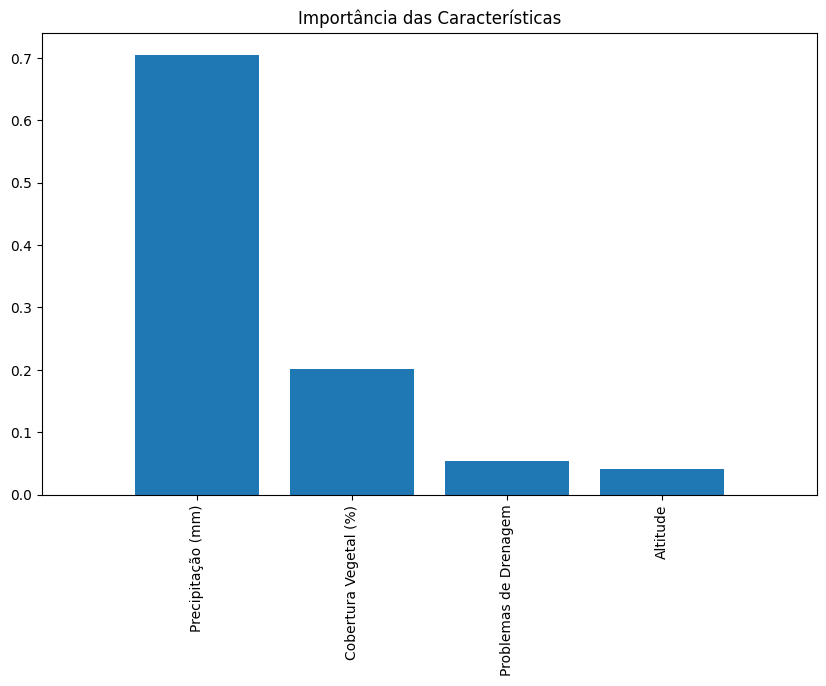

In [1546]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Importância das Características")
plt.bar(range(X_SP.shape[1]), importances[indices], align="center")
plt.xticks(range(X_SP.shape[1]), X_SP.columns[indices], rotation=90)
plt.xlim([-1, X_SP.shape[1]])
plt.show()

# Criando e Salvando modelos por Estado

## SP

In [1547]:
import joblib

In [1548]:
rf.fit(X_SP, y_SP) # Realizando o treinamento final do modleo, utilizando todos os dados ao invés da proporção 80 20 ou validação cruzada

c:\Projeto\Flooding-Model\venv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(class_weight='balanced', random_state=42)

In [1792]:
joblib.dump(rf, open("SP_Flooding_Model.joblib", 'wb'))

In [1793]:
SP_rf_salva = joblib.load(open("SP_Flooding_Model.joblib", 'rb'))

In [1551]:
SP_rf_salva

RandomForestClassifier(class_weight='balanced', random_state=42)

## RJ 

In [1864]:
# Modelo Random Forest para RJ
rf_RJ = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_RJ.fit(x_RJ, y_RJ)  # X_RJ e y_RJ devem ser seus dados de treinamento para o estado do RJ

# Salvando o modelo treinado para RJ
joblib.dump(rf_RJ, open("RJ_Flooding_Model.joblib", 'wb'))

# Carregando o modelo salvo para RJ
RJ_rf_salva = joblib.load(open("RJ_Flooding_Model.joblib", 'rb'))

# Exibindo o modelo salvo de RJ
RJ_rf_salva


c:\Projeto\Flooding-Model\venv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(class_weight='balanced', random_state=42)

## MG

In [1553]:
# Modelo Random Forest para MG
rf_MG = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_MG.fit(x_MG, y_MG)  # X_MG e y_MG devem ser seus dados de treinamento para o estado de MG

# Salvando o modelo treinado para MG
joblib.dump(rf_MG, open("MG_Flooding_Model.joblib", 'wb'))

# Carregando o modelo salvo para MG
MG_rf_salva = joblib.load(open("MG_Flooding_Model.joblib", 'rb'))

# Exibindo o modelo salvo de MG
MG_rf_salva


c:\Projeto\Flooding-Model\venv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(class_weight='balanced', random_state=42)

## SC

In [1554]:
# Modelo Random Forest para SC
rf_SC = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_SC.fit(x_SC, y_SC)  # X_SC e y_SC devem ser seus dados de treinamento para o estado de SC

# Salvando o modelo treinado para SC
joblib.dump(rf_SC, open("SC_Flooding_Model.joblib", 'wb'))

# Carregando o modelo salvo para SC
SC_rf_salva = joblib.load(open("SC_Flooding_Model.joblib", 'rb'))

# Exibindo o modelo salvo de SC
SC_rf_salva


c:\Projeto\Flooding-Model\venv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(class_weight='balanced', random_state=42)

## RS

In [1555]:
# Modelo Random Forest para RS
rf_RS = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_RS.fit(X_RS, y_RS)  # X_RS e y_RS devem ser seus dados de treinamento para o estado de RS

# Salvando o modelo treinado para RS
joblib.dump(rf_RS, open("RS_Flooding_Model.joblib", 'wb'))

# Carregando o modelo salvo para RS
RS_rf_salva = joblib.load(open("RS_Flooding_Model.joblib", 'rb'))

# Exibindo o modelo salvo de RS
RS_rf_salva


c:\Projeto\Flooding-Model\venv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(class_weight='balanced', random_state=42)

## PR 

In [1556]:
# Modelo Random Forest para PR
rf_PR = RandomForestClassifier(n_estimators=150, random_state=42, class_weight='balanced')
rf_PR.fit(X_PR, y_PR)  # X_PR e y_PR devem ser seus dados de treinamento para o estado de PR

# Salvando o modelo treinado para PR
joblib.dump(rf_PR, open("PR_Flooding_Model.joblib", 'wb'))

# Carregando o modelo salvo para PR
PR_rf_salva = joblib.load(open("PR_Flooding_Model.joblib", 'rb'))

# Exibindo o modelo salvo de PR
PR_rf_salva


c:\Projeto\Flooding-Model\venv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(class_weight='balanced', n_estimators=150,
                       random_state=42)

# TESTANDO COM OS DADOS DO RJ

In [1557]:
X_RJtrain, X_RJtest, y_RJtrain, y_RJtest = train_test_split(X_RJ,y_RJ,test_size=0.2)

In [1558]:
print(X_RJtrain.shape, X_RJtest.shape)

(2628, 4) (657, 4)


In [1559]:
RJ_rf_salva.fit(X_RJtrain, y_RJtrain)

c:\Projeto\Flooding-Model\venv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(class_weight='balanced', random_state=42)

In [1560]:
RJ_predicted_rf = RJ_rf_salva.predict(X_RJtest)

In [1561]:
accuracy_rf = accuracy_score(y_RJtest, RJ_predicted_rf)
print(f"Acurácia da Random Forest: {accuracy_rf:.4f}")

Acurácia da Random Forest: 1.0000


In [1562]:
RJ_predicted_rf = RJ_rf_salva.predict(X_RJtest)  
print(confusion_matrix(y_RJtest, RJ_predicted_rf))

# Defina o parâmetro 'labels' para incluir todas as classes, mesmo as que não foram previstas
labels = [0, 1, 2, 3, 4]

# Defina os nomes das classes
target_names = ['Sem Risco', 'Risco Baixo', 'Risco Moderado', 'Risco Elevado', 'Risco Crítico']

# Gere o relatório de classificação, forçando a exibição de todas as classes
print(classification_report(y_RJtest, RJ_predicted_rf, labels=labels, target_names=target_names))

[[383   0   0   0   0]
 [  0 190   0   0   0]
 [  0   0  75   0   0]
 [  0   0   0   3   0]
 [  0   0   0   0   6]]
                precision    recall  f1-score   support

     Sem Risco       1.00      1.00      1.00       383
   Risco Baixo       1.00      1.00      1.00       190
Risco Moderado       1.00      1.00      1.00        75
 Risco Elevado       1.00      1.00      1.00         3
 Risco Crítico       1.00      1.00      1.00         6

      accuracy                           1.00       657
     macro avg       1.00      1.00      1.00       657
  weighted avg       1.00      1.00      1.00       657



In [1563]:
scores_rf = cross_val_score(RJ_rf_salva, X_RJ, y_RJ, cv=5, scoring='accuracy')
scores_rf

c:\Projeto\Flooding-Model\venv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Projeto\Flooding-Model\venv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Projeto\Flooding-Model\venv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Projeto\Flooding-Model\venv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape o

array([0.82039574, 0.99847793, 0.97564688, 1.        , 0.92998478])

In [1564]:
scores_rf.mean()

np.float64(0.9449010654490106)

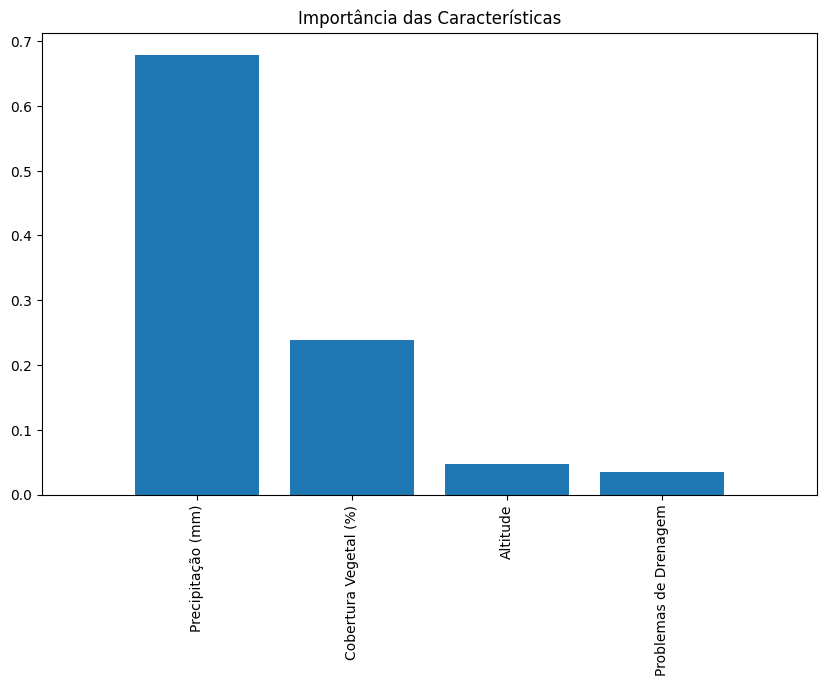

In [1565]:
importances = RJ_rf_salva.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Importância das Características")
plt.bar(range(X_RJ.shape[1]), importances[indices], align="center")
plt.xticks(range(X_RJ.shape[1]), X_RJ.columns[indices], rotation=90)
plt.xlim([-1, X_RJ.shape[1]])
plt.show()

# TESTANDO COM DADOS DE MG

In [1566]:
X_MGtrain, X_MGtest, y_MGtrain, y_MGtest = train_test_split(x_MG,y_MG,test_size=0.2)

In [1567]:
print(X_MGtrain.shape, X_MGtest.shape)

(2920, 4) (730, 4)


In [1568]:
MG_rf_salva.fit(X_MGtrain, y_MGtrain)

c:\Projeto\Flooding-Model\venv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(class_weight='balanced', random_state=42)

In [1569]:
MG_predicted_rf = MG_rf_salva.predict(X_MGtest)

In [1570]:
accuracy_rf = accuracy_score(y_MGtest, MG_predicted_rf)
print(f"Acurácia da Random Forest: {accuracy_rf:.4f}")

Acurácia da Random Forest: 1.0000


In [1571]:
MG_predicted_rf = MG_rf_salva.predict(X_MGtest)  
print(confusion_matrix(y_MGtest, MG_predicted_rf))

# Defina o parâmetro 'labels' para incluir todas as classes, mesmo as que não foram previstas
labels = [0, 1, 2, 3, 4]

# Defina os nomes das classes
target_names = ['Sem Risco', 'Risco Baixo', 'Risco Moderado', 'Risco Elevado', 'Risco Crítico']

# Gere o relatório de classificação, forçando a exibição de todas as classes
print(classification_report(y_MGtest, MG_predicted_rf, labels=labels, target_names=target_names))

[[505   0   0   0   0]
 [  0 182   0   0   0]
 [  0   0  31   0   0]
 [  0   0   0  10   0]
 [  0   0   0   0   2]]
                precision    recall  f1-score   support

     Sem Risco       1.00      1.00      1.00       505
   Risco Baixo       1.00      1.00      1.00       182
Risco Moderado       1.00      1.00      1.00        31
 Risco Elevado       1.00      1.00      1.00        10
 Risco Crítico       1.00      1.00      1.00         2

      accuracy                           1.00       730
     macro avg       1.00      1.00      1.00       730
  weighted avg       1.00      1.00      1.00       730



In [1572]:
scores_rf = cross_val_score(MG_rf_salva, x_MG, y_MG, cv=5, scoring='accuracy')
scores_rf

c:\Projeto\Flooding-Model\venv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Projeto\Flooding-Model\venv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Projeto\Flooding-Model\venv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Projeto\Flooding-Model\venv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape o

array([0.87123288, 1.        , 0.99452055, 0.78493151, 0.8890411 ])

In [1573]:
scores_rf.mean()

np.float64(0.9079452054794521)

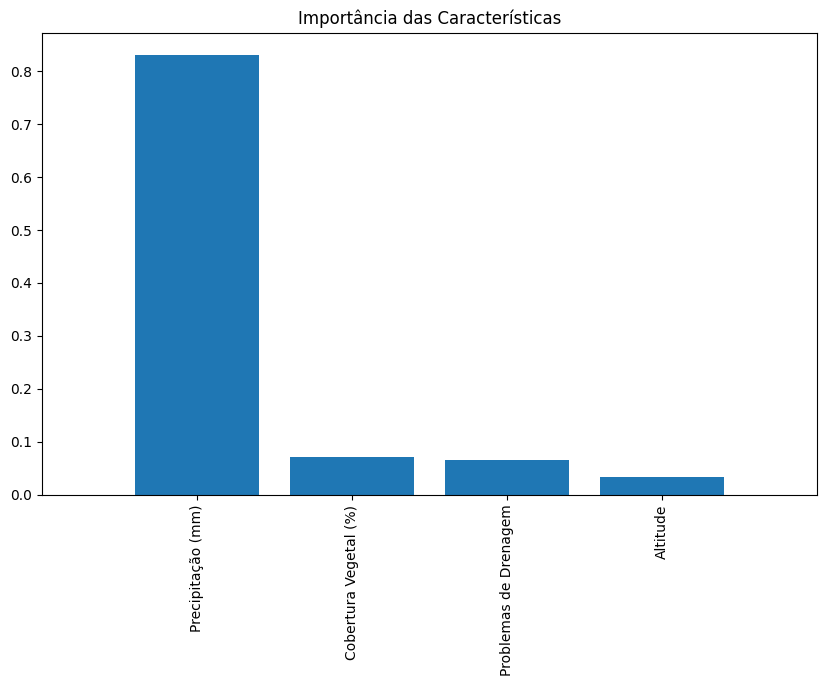

In [1574]:
importances = MG_rf_salva.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Importância das Características")
plt.bar(range(x_MG.shape[1]), importances[indices], align="center")
plt.xticks(range(x_MG.shape[1]), x_MG.columns[indices], rotation=90)
plt.xlim([-1, x_MG.shape[1]])
plt.show()


# TESTANDO COM DADOS DE SC

In [1575]:
X_SCtrain, X_SCtest, y_SCtrain, y_SCtest = train_test_split(x_SC, y_SC, test_size=0.2)

In [1576]:
print(X_SCtrain.shape, X_SCtest.shape)

(3212, 4) (803, 4)


In [1577]:
SC_rf_salva.fit(X_SCtrain, y_SCtrain)

c:\Projeto\Flooding-Model\venv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(class_weight='balanced', random_state=42)

In [1578]:
SC_predicted_rf = SC_rf_salva.predict(X_SCtest)

In [1579]:
accuracy_rf = accuracy_score(y_SCtest, SC_predicted_rf)
print(f"Acurácia da Random Forest: {accuracy_rf:.4f}")

Acurácia da Random Forest: 0.9988


In [1580]:
SC_predicted_rf = SC_rf_salva.predict(X_SCtest)  
print(confusion_matrix(y_SCtest, SC_predicted_rf))

# Defina o parâmetro 'labels' para incluir todas as classes, mesmo as que não foram previstas
labels = [0, 1, 2, 3, 4]

# Defina os nomes das classes
target_names = ['Sem Risco', 'Risco Baixo', 'Risco Moderado', 'Risco Elevado', 'Risco Crítico']

# Gere o relatório de classificação, forçando a exibição de todas as classes
print(classification_report(y_SCtest, SC_predicted_rf, labels=labels, target_names=target_names))

[[389   0   0   0   0]
 [  0 304   0   0   0]
 [  0   1  89   0   0]
 [  0   0   0   1   0]
 [  0   0   0   0  19]]
                precision    recall  f1-score   support

     Sem Risco       1.00      1.00      1.00       389
   Risco Baixo       1.00      1.00      1.00       304
Risco Moderado       1.00      0.99      0.99        90
 Risco Elevado       1.00      1.00      1.00         1
 Risco Crítico       1.00      1.00      1.00        19

      accuracy                           1.00       803
     macro avg       1.00      1.00      1.00       803
  weighted avg       1.00      1.00      1.00       803



In [1581]:
scores_rf = cross_val_score(SC_rf_salva, x_SC, y_SC, cv=5, scoring='accuracy')
scores_rf

c:\Projeto\Flooding-Model\venv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Projeto\Flooding-Model\venv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Projeto\Flooding-Model\venv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Projeto\Flooding-Model\venv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape o

array([0.92278954, 1.        , 0.70236613, 0.89165629, 0.94146949])

In [1582]:
scores_rf.mean()

np.float64(0.8916562889165629)

In [1583]:
importances = SC_rf_salva.feature_importances_
indices = np.argsort(importances)[::-1]

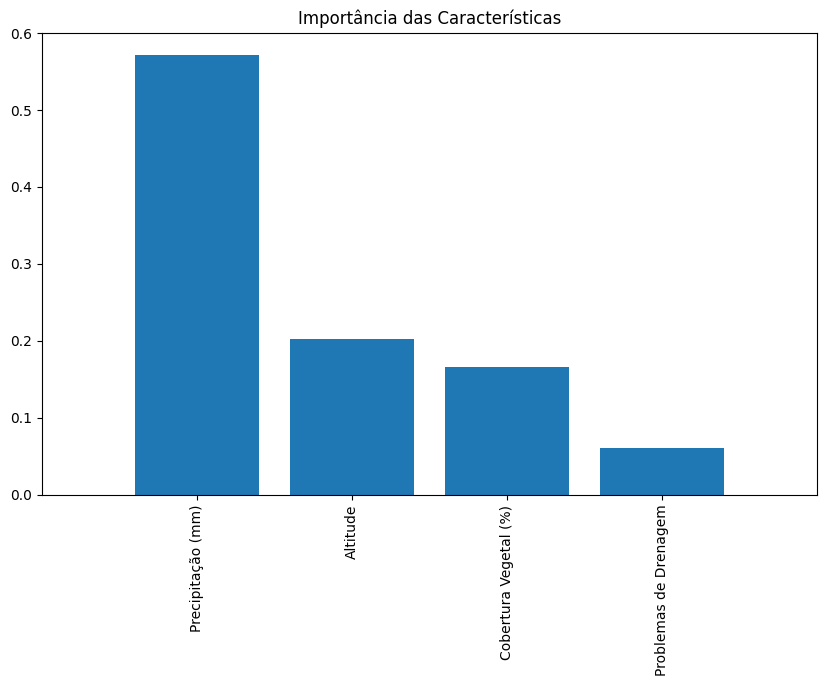

In [1584]:
plt.figure(figsize=(10, 6))
plt.title("Importância das Características")
plt.bar(range(x_SC.shape[1]), importances[indices], align="center")
plt.xticks(range(x_SC.shape[1]), x_SC.columns[indices], rotation=90)
plt.xlim([-1, x_SC.shape[1]])
plt.show()

# TESTANDO COM DADOS DO RS

In [1585]:
X_RStrain, X_RStest, y_RStrain, y_RStest = train_test_split(X_RS, y_RS, test_size=0.2)

In [1586]:
print(X_RStrain.shape, X_RStest.shape)

(3212, 4) (803, 4)


In [1587]:
RS_rf_salva.fit(X_RStrain, y_RStrain)

c:\Projeto\Flooding-Model\venv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(class_weight='balanced', random_state=42)

In [1588]:
RS_predicted_rf = RS_rf_salva.predict(X_RStest)

In [1589]:
accuracy_rf = accuracy_score(y_RStest, RS_predicted_rf)
print(f"Acurácia da Random Forest: {accuracy_rf:.4f}")

Acurácia da Random Forest: 1.0000


In [1590]:
RS_predicted_rf = RS_rf_salva.predict(X_RStest)  
print(confusion_matrix(y_RStest, RS_predicted_rf))

# Defina o parâmetro 'labels' para incluir todas as classes, mesmo as que não foram previstas
labels = [0, 1, 2, 3, 4]

# Defina os nomes das classes
target_names = ['Sem Risco', 'Risco Baixo', 'Risco Moderado', 'Risco Elevado', 'Risco Crítico']

# Gere o relatório de classificação, forçando a exibição de todas as classes
print(classification_report(y_RStest, RS_predicted_rf, labels=labels, target_names=target_names))

[[435   0   0   0   0]
 [  0 274   0   0   0]
 [  0   0  65   0   0]
 [  0   0   0   6   0]
 [  0   0   0   0  23]]
                precision    recall  f1-score   support

     Sem Risco       1.00      1.00      1.00       435
   Risco Baixo       1.00      1.00      1.00       274
Risco Moderado       1.00      1.00      1.00        65
 Risco Elevado       1.00      1.00      1.00         6
 Risco Crítico       1.00      1.00      1.00        23

      accuracy                           1.00       803
     macro avg       1.00      1.00      1.00       803
  weighted avg       1.00      1.00      1.00       803



In [1591]:
scores_rf = cross_val_score(RS_rf_salva, X_RS, y_RS, cv=5, scoring='accuracy')
scores_rf

c:\Projeto\Flooding-Model\venv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Projeto\Flooding-Model\venv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Projeto\Flooding-Model\venv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Projeto\Flooding-Model\venv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape o

array([1.        , 1.        , 0.94396015, 0.73225405, 1.        ])

In [1592]:
scores_rf.mean()

np.float64(0.9352428393524285)

In [1593]:
importances = RS_rf_salva.feature_importances_
indices = np.argsort(importances)[::-1]

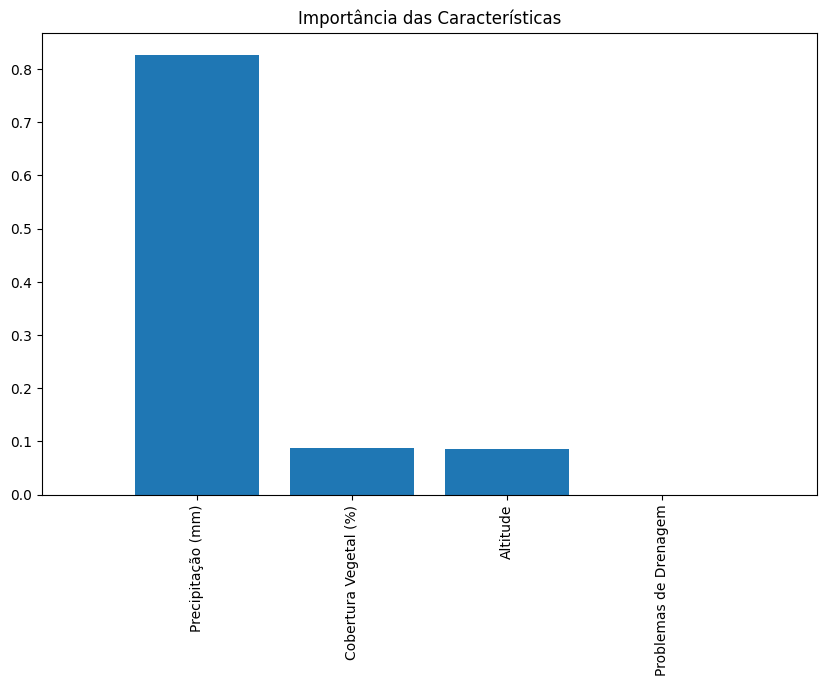

In [1594]:
plt.figure(figsize=(10, 6))
plt.title("Importância das Características")
plt.bar(range(X_RS.shape[1]), importances[indices], align="center")
plt.xticks(range(X_RS.shape[1]), X_RS.columns[indices], rotation=90)
plt.xlim([-1, X_RS.shape[1]])
plt.show()

# TESTANDO COM DADOS DO PR

In [1595]:
X_PRtrain, X_PRtest, y_PRtrain, y_PRtest = train_test_split(X_PR, y_PR, test_size=0.2)

In [1596]:
print(X_PRtrain.shape, X_PRtest.shape)

(2920, 4) (730, 4)


In [1597]:
PR_rf_salva.fit(X_PRtrain, y_PRtrain)

c:\Projeto\Flooding-Model\venv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(class_weight='balanced', n_estimators=150,
                       random_state=42)

In [1598]:
PR_predicted_rf = PR_rf_salva.predict(X_PRtest)

In [1599]:
accuracy_rf = accuracy_score(y_PRtest, PR_predicted_rf)
print(f"Acurácia da Random Forest: {accuracy_rf:.4f}")

Acurácia da Random Forest: 0.9959


In [1600]:
PR_predicted_rf = RS_rf_salva.predict(X_PRtest)  
print(confusion_matrix(y_PRtest, PR_predicted_rf))

# Defina o parâmetro 'labels' para incluir todas as classes, mesmo as que não foram previstas
labels = [0, 1, 2, 3, 4]

# Defina os nomes das classes
target_names = ['Sem Risco', 'Risco Baixo', 'Risco Moderado', 'Risco Elevado', 'Risco Crítico']

# Gere o relatório de classificação, forçando a exibição de todas as classes
print(classification_report(y_PRtest, PR_predicted_rf, labels=labels, target_names=target_names))

[[424  74   7   0   0]
 [  0 144  19   4   0]
 [  0   0  31  10   3]
 [  0   0   0  11   2]
 [  0   0   0   0   1]]
                precision    recall  f1-score   support

     Sem Risco       1.00      0.84      0.91       505
   Risco Baixo       0.66      0.86      0.75       167
Risco Moderado       0.54      0.70      0.61        44
 Risco Elevado       0.44      0.85      0.58        13
 Risco Crítico       0.17      1.00      0.29         1

      accuracy                           0.84       730
     macro avg       0.56      0.85      0.63       730
  weighted avg       0.88      0.84      0.85       730



In [1601]:
scores_rf = cross_val_score(PR_rf_salva, X_PR, y_PR, cv=5, scoring='accuracy')
scores_rf

c:\Projeto\Flooding-Model\venv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Projeto\Flooding-Model\venv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Projeto\Flooding-Model\venv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Projeto\Flooding-Model\venv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape o

array([0.70684932, 0.95890411, 0.97808219, 0.99452055, 0.99315068])

In [1602]:
scores_rf.mean()

np.float64(0.9263013698630138)

In [1603]:
importances = PR_rf_salva.feature_importances_
indices = np.argsort(importances)[::-1]

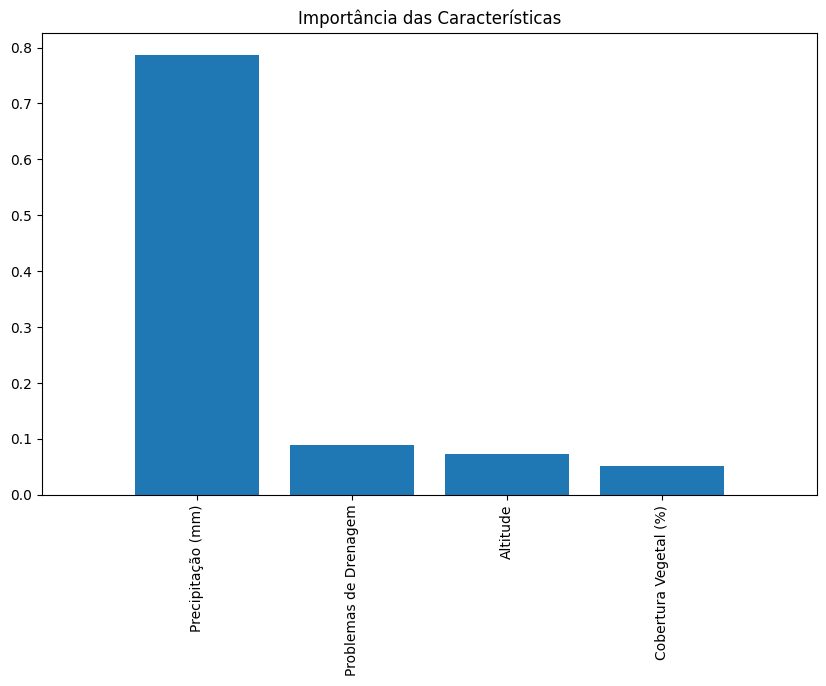

In [1604]:
plt.figure(figsize=(10, 6))
plt.title("Importância das Características")
plt.bar(range(X_PR.shape[1]), importances[indices], align="center")
plt.xticks(range(X_PR.shape[1]), X_PR.columns[indices], rotation=90)
plt.xlim([-1, X_PR.shape[1]])
plt.show()

# TESTANDO COM DADOS DE SP

In [1605]:
print(X_SPtrain.shape, X_SPtest.shape)

(2628, 4) (657, 4)


In [1606]:
SP_rf_salva.fit(X_SPtrain, y_SPtrain)

c:\Projeto\Flooding-Model\venv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(class_weight='balanced', random_state=42)

In [1607]:
SP_predicted_rf = SP_rf_salva.predict(X_SPtest)

In [1608]:
accuracy_rf = accuracy_score(y_SPtest, SP_predicted_rf)
print(f"Acurácia da Random Forest: {accuracy_rf:.4f}")

Acurácia da Random Forest: 0.9985


In [1609]:
SP_predicted_rf = rf.predict(X_SPtest)  
print(confusion_matrix(y_SPtest, SP_predicted_rf))

# Defina o parâmetro 'labels' para incluir todas as classes, mesmo as que não foram previstas
labels = [0, 1, 2, 3, 4]

# Defina os nomes das classes
target_names = ['Sem Risco', 'Risco Baixo', 'Risco Moderado', 'Risco Elevado', 'Risco Crítico']

# Gere o relatório de classificação, forçando a exibição de todas as classes
print(classification_report(y_SPtest, SP_predicted_rf, labels=labels, target_names=target_names))

[[381   0   0   0   0]
 [  0 220   0   0   0]
 [  0   0  49   0   0]
 [  0   0   0   6   0]
 [  0   0   0   0   1]]
                precision    recall  f1-score   support

     Sem Risco       1.00      1.00      1.00       381
   Risco Baixo       1.00      1.00      1.00       220
Risco Moderado       1.00      1.00      1.00        49
 Risco Elevado       1.00      1.00      1.00         6
 Risco Crítico       1.00      1.00      1.00         1

      accuracy                           1.00       657
     macro avg       1.00      1.00      1.00       657
  weighted avg       1.00      1.00      1.00       657



In [1610]:
scores_rf = cross_val_score(SP_rf_salva, X_SP, y_SP,    cv=5, scoring='accuracy')
scores_rf

c:\Projeto\Flooding-Model\venv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Projeto\Flooding-Model\venv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Projeto\Flooding-Model\venv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Projeto\Flooding-Model\venv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape o

array([0.77473364, 1.        , 0.99847793, 0.79756469, 0.93150685])

# 2024

# SUDESTE

## Criando DataFrames que serão Agrupados (SP)

In [1611]:
Braganca2 = pd.read_csv('Ambiente de teste-treinamento\SP2024_BP_tratado')
BaseBraganca2 = Braganca2 [[
    'Dia',
    'Precipitação (mm)',
    'Pressão Média (mB)',
    'Temp Ponto Orvalho (°C)',
    'Umidade Média (%)',
    'Cobertura Vegetal (%)',
    'Altitude',
    'Problemas de Drenagem',
    'Risco alagamento',
]]

BaseBraganca2

<>:1: SyntaxWarning: invalid escape sequence '\S'
<>:1: SyntaxWarning: invalid escape sequence '\S'
C:\Users\luan_\AppData\Local\Temp\ipykernel_20632\2866809783.py:1: SyntaxWarning: invalid escape sequence '\S'
  Braganca2 = pd.read_csv('Ambiente de teste-treinamento\SP2024_BP_tratado')


,Dia,Precipitação (mm),Pressão Média (mB),Temp Ponto Orvalho (°C),Umidade Média (%),Cobertura Vegetal (%),Altitude,Problemas de Drenagem,Risco alagamento
0,2024-01-01,0.0,839.418750,16.312500,75.041667,30,Média,Sim,Sem Risco
1,2024-01-02,0.0,914.208333,17.733333,76.166667,30,Média,Sim,Sem Risco
2,2024-01-03,6.0,913.127083,19.420833,80.166667,30,Média,Sim,Risco Baixo
3,2024-01-04,10.2,875.547917,18.633333,81.750000,30,Média,Sim,Risco Moderado
4,2024-01-05,0.0,914.139583,18.300000,79.625000,30,Média,Sim,Sem Risco
...,...,...,...,...,...,...,...,...,...
300,2024-10-27,0.0,918.768750,16.829167,88.541667,30,Média,Sim,Sem Risco
301,2024-10-28,0.0,804.275000,14.462500,73.750000,30,Média,Sim,Sem Risco
302,2024-10-29,0.0,879.393750,16.804167,79.166667,30,Média,Sim,Sem Risco
303,2024-10-30,0.0,878.489583,15.179167,71.583333,30,Média,Sim,Sem Risco


In [1612]:
Bertioga2 = pd.read_csv('Ambiente de teste-treinamento\SP2024_Bertioga_tratado')
BaseBertioga2 = Bertioga2 [[
    'Dia',
    'Precipitação (mm)',
    'Pressão Média (mB)',
    'Temp Ponto Orvalho (°C)',
    'Umidade Média (%)',
    'Cobertura Vegetal (%)',
    'Altitude',
    'Problemas de Drenagem',
    'Risco alagamento',
]]

BaseBertioga2

<>:1: SyntaxWarning: invalid escape sequence '\S'
<>:1: SyntaxWarning: invalid escape sequence '\S'
C:\Users\luan_\AppData\Local\Temp\ipykernel_20632\3528610366.py:1: SyntaxWarning: invalid escape sequence '\S'
  Bertioga2 = pd.read_csv('Ambiente de teste-treinamento\SP2024_Bertioga_tratado')


,Dia,Precipitação (mm),Pressão Média (mB),Temp Ponto Orvalho (°C),Umidade Média (%),Cobertura Vegetal (%),Altitude,Problemas de Drenagem,Risco alagamento
0,2024-01-01,0.0,1013.914583,21.558333,82.500000,72,Baixa,Sim,Sem Risco
1,2024-01-02,0.0,1011.702083,21.708333,81.500000,72,Baixa,Sim,Sem Risco
2,2024-01-03,0.8,1009.593750,22.720833,87.166667,72,Baixa,Sim,Risco Baixo
3,2024-01-04,7.6,925.652083,21.991667,86.833333,72,Baixa,Sim,Risco Baixo
4,2024-01-05,8.4,1011.470833,23.516667,96.125000,72,Baixa,Sim,Risco Baixo
...,...,...,...,...,...,...,...,...,...
300,2024-10-27,10.8,1019.277083,20.225000,99.458333,72,Baixa,Sim,Risco Moderado
301,2024-10-28,2.8,1019.027083,20.354167,97.791667,72,Baixa,Sim,Risco Baixo
302,2024-10-29,0.0,1016.297917,21.537500,96.208333,72,Baixa,Sim,Sem Risco
303,2024-10-30,0.0,1015.597917,21.729167,94.708333,72,Baixa,Sim,Sem Risco


In [1613]:
Barueri2 = pd.read_csv('Ambiente de teste-treinamento\SP2024_Barueri_tratado')
BaseBarueri2 = Barueri2 [[
    'Dia',
    'Precipitação (mm)',
    'Pressão Média (mB)',
    'Temp Ponto Orvalho (°C)',
    'Umidade Média (%)',
    'Cobertura Vegetal (%)',
    'Altitude',
    'Problemas de Drenagem',
    'Risco alagamento',
]]

BaseBarueri2

<>:1: SyntaxWarning: invalid escape sequence '\S'
<>:1: SyntaxWarning: invalid escape sequence '\S'
C:\Users\luan_\AppData\Local\Temp\ipykernel_20632\2992281673.py:1: SyntaxWarning: invalid escape sequence '\S'
  Barueri2 = pd.read_csv('Ambiente de teste-treinamento\SP2024_Barueri_tratado')


,Dia,Precipitação (mm),Pressão Média (mB),Temp Ponto Orvalho (°C),Umidade Média (%),Cobertura Vegetal (%),Altitude,Problemas de Drenagem,Risco alagamento
0,2024-01-01,0.0,695.312500,12.245833,52.875000,23,Média,Sim,Sem Risco
1,2024-01-02,3.2,848.118750,16.258333,70.000000,23,Média,Sim,Risco Baixo
2,2024-01-03,13.0,808.343750,16.704167,68.875000,23,Média,Sim,Risco Moderado
3,2024-01-04,0.4,847.731250,17.816667,80.041667,23,Média,Sim,Risco Baixo
4,2024-01-05,0.0,809.691667,15.962500,68.583333,23,Média,Sim,Sem Risco
...,...,...,...,...,...,...,...,...,...
300,2024-10-27,0.0,930.862500,15.629167,90.583333,23,Média,Sim,Sem Risco
301,2024-10-28,0.0,930.943750,16.112500,90.333333,23,Média,Sim,Sem Risco
302,2024-10-29,0.0,929.147917,17.420833,87.208333,23,Média,Sim,Sem Risco
303,2024-10-30,0.0,928.216667,16.129167,75.708333,23,Média,Sim,Sem Risco


In [1614]:
Iguape2 = pd.read_csv('Ambiente de teste-treinamento\SP2024_Iguape_tratado')
BaseIguape2 = Iguape2 [[
    'Dia',
    'Precipitação (mm)',
    'Pressão Média (mB)',
    'Temp Ponto Orvalho (°C)',
    'Umidade Média (%)',
    'Cobertura Vegetal (%)',
    'Altitude',
    'Problemas de Drenagem',
    'Risco alagamento',
]]
BaseIguape2

<>:1: SyntaxWarning: invalid escape sequence '\S'
<>:1: SyntaxWarning: invalid escape sequence '\S'
C:\Users\luan_\AppData\Local\Temp\ipykernel_20632\2338969822.py:1: SyntaxWarning: invalid escape sequence '\S'
  Iguape2 = pd.read_csv('Ambiente de teste-treinamento\SP2024_Iguape_tratado')


,Dia,Precipitação (mm),Pressão Média (mB),Temp Ponto Orvalho (°C),Umidade Média (%),Cobertura Vegetal (%),Altitude,Problemas de Drenagem,Risco alagamento
0,2024-01-01,0.0,1013.866667,19.550000,69.250000,70,Baixa,Sim,Sem Risco
1,2024-01-02,0.0,1011.745833,20.325000,76.208333,70,Baixa,Sim,Sem Risco
2,2024-01-03,0.0,1010.220833,21.400000,82.666667,70,Baixa,Sim,Sem Risco
3,2024-01-04,0.0,1011.325000,21.429167,78.458333,70,Baixa,Sim,Sem Risco
4,2024-01-05,8.2,1011.708333,21.504167,84.250000,70,Baixa,Sim,Risco Baixo
...,...,...,...,...,...,...,...,...,...
300,2024-10-27,1.4,1019.372917,17.495833,78.666667,70,Baixa,Sim,Risco Baixo
301,2024-10-28,0.8,1019.164583,18.495833,84.541667,70,Baixa,Sim,Risco Baixo
302,2024-10-29,0.6,1016.443750,20.454167,86.000000,70,Baixa,Sim,Risco Baixo
303,2024-10-30,0.0,1015.781250,20.425000,85.208333,70,Baixa,Sim,Sem Risco


In [1615]:
Taubate2 = pd.read_csv('Ambiente de teste-treinamento\SP2024_Taubate_tratado')
BaseTaubate2 = Taubate2 [[
    'Dia',
    'Precipitação (mm)',
    'Pressão Média (mB)',
    'Temp Ponto Orvalho (°C)',
    'Umidade Média (%)',
    'Cobertura Vegetal (%)',
    'Altitude',
    'Problemas de Drenagem',
    'Risco alagamento',
]]
BaseTaubate2

<>:1: SyntaxWarning: invalid escape sequence '\S'
<>:1: SyntaxWarning: invalid escape sequence '\S'
C:\Users\luan_\AppData\Local\Temp\ipykernel_20632\454039455.py:1: SyntaxWarning: invalid escape sequence '\S'
  Taubate2 = pd.read_csv('Ambiente de teste-treinamento\SP2024_Taubate_tratado')


,Dia,Precipitação (mm),Pressão Média (mB),Temp Ponto Orvalho (°C),Umidade Média (%),Cobertura Vegetal (%),Altitude,Problemas de Drenagem,Risco alagamento
0,2024-01-01,0.0,948.985417,17.158333,78.916667,55,Média,Não,Sem Risco
1,2024-01-02,9.2,946.691667,17.991667,74.541667,55,Média,Não,Sem Risco
2,2024-01-03,30.8,945.039583,20.104167,81.333333,55,Média,Não,Risco Baixo
3,2024-01-04,17.2,945.160417,19.454167,80.333333,55,Média,Não,Risco Baixo
4,2024-01-05,0.0,945.881250,18.445833,72.833333,55,Média,Não,Sem Risco
...,...,...,...,...,...,...,...,...,...
300,2024-10-27,0.0,0.000000,0.000000,0.000000,55,Média,Não,Sem Risco
301,2024-10-28,0.0,198.477083,4.079167,17.875000,55,Média,Não,Sem Risco
302,2024-10-29,0.0,0.000000,0.000000,0.000000,55,Média,Não,Sem Risco
303,2024-10-30,0.0,355.722917,6.612500,22.750000,55,Média,Não,Sem Risco


In [1616]:
SP2 = pd.read_csv('Ambiente de teste-treinamento\SP2024_tratado')
BaseInterlagos2 = SP2 [[
    'Dia',
    'Precipitação (mm)',
    'Pressão Média (mB)',
    'Temp Ponto Orvalho (°C)',
    'Umidade Média (%)',
    'Cobertura Vegetal (%)',
    'Altitude',
    'Problemas de Drenagem',
    'Risco alagamento',
]]

BaseInterlagos2

<>:1: SyntaxWarning: invalid escape sequence '\S'
<>:1: SyntaxWarning: invalid escape sequence '\S'
C:\Users\luan_\AppData\Local\Temp\ipykernel_20632\775336977.py:1: SyntaxWarning: invalid escape sequence '\S'
  SP2 = pd.read_csv('Ambiente de teste-treinamento\SP2024_tratado')


,Dia,Precipitação (mm),Pressão Média (mB),Temp Ponto Orvalho (°C),Umidade Média (%),Cobertura Vegetal (%),Altitude,Problemas de Drenagem,Risco alagamento
0,2024-01-01,0.0,927.227083,16.954167,82.958333,19,Média,Sim,Sem Risco
1,2024-01-02,0.0,925.420833,17.745833,81.125000,19,Média,Sim,Sem Risco
2,2024-01-03,0.2,923.877083,19.120833,82.333333,19,Média,Sim,Risco Baixo
3,2024-01-04,12.2,924.443750,19.300000,92.000000,19,Média,Sim,Risco Moderado
4,2024-01-05,4.6,925.285417,18.700000,87.791667,19,Média,Sim,Risco Baixo
...,...,...,...,...,...,...,...,...,...
300,2024-10-27,0.6,930.870833,11.291667,71.708333,19,Média,Sim,Risco Baixo
301,2024-10-28,0.4,930.935417,12.616667,75.416667,19,Média,Sim,Risco Baixo
302,2024-10-29,0.0,929.068750,14.779167,77.750000,19,Média,Sim,Sem Risco
303,2024-10-30,0.2,928.312500,14.866667,75.166667,19,Média,Sim,Risco Baixo


In [1617]:
SLP2 = pd.read_csv('Ambiente de teste-treinamento\SP2024_SLP_tratado')
BaseSLP2 = SLP2 [[
    'Dia',
    'Precipitação (mm)',
    'Pressão Média (mB)',
    'Temp Ponto Orvalho (°C)',
    'Umidade Média (%)',
    'Cobertura Vegetal (%)',
    'Altitude',
    'Problemas de Drenagem',
    'Risco alagamento',
]]
BaseSLP2

<>:1: SyntaxWarning: invalid escape sequence '\S'
<>:1: SyntaxWarning: invalid escape sequence '\S'
C:\Users\luan_\AppData\Local\Temp\ipykernel_20632\2099327306.py:1: SyntaxWarning: invalid escape sequence '\S'
  SLP2 = pd.read_csv('Ambiente de teste-treinamento\SP2024_SLP_tratado')


,Dia,Precipitação (mm),Pressão Média (mB),Temp Ponto Orvalho (°C),Umidade Média (%),Cobertura Vegetal (%),Altitude,Problemas de Drenagem,Risco alagamento
0,2024-01-01,0.0,152.677083,4.354167,20.916667,55,Média,Sim,Sem Risco
1,2024-01-02,0.0,152.935417,2.887500,15.875000,55,Média,Sim,Sem Risco
2,2024-01-03,0.0,0.000000,0.000000,0.000000,55,Média,Sim,Sem Risco
3,2024-01-04,0.0,0.000000,0.000000,0.000000,55,Média,Sim,Sem Risco
4,2024-01-05,0.0,0.000000,0.000000,0.000000,55,Média,Sim,Sem Risco
...,...,...,...,...,...,...,...,...,...
300,2024-10-27,6.4,920.591667,15.200000,82.791667,55,Média,Sim,Risco Baixo
301,2024-10-28,0.0,921.064583,15.016667,86.708333,55,Média,Sim,Sem Risco
302,2024-10-29,2.8,919.062500,16.720833,88.291667,55,Média,Sim,Risco Baixo
303,2024-10-30,0.0,918.131250,15.687500,80.541667,55,Média,Sim,Sem Risco


In [1618]:
Registro2 = pd.read_csv('Ambiente de teste-treinamento\SP2024_Registro_tratado')
BaseRegistro2 = Registro2 [[
    'Dia',
    'Precipitação (mm)',
    'Pressão Média (mB)',
    'Temp Ponto Orvalho (°C)',
    'Umidade Média (%)',
    'Cobertura Vegetal (%)',
    'Altitude',
    'Problemas de Drenagem',
    'Risco alagamento',
]]
BaseRegistro2

<>:1: SyntaxWarning: invalid escape sequence '\S'
<>:1: SyntaxWarning: invalid escape sequence '\S'
C:\Users\luan_\AppData\Local\Temp\ipykernel_20632\1154121276.py:1: SyntaxWarning: invalid escape sequence '\S'
  Registro2 = pd.read_csv('Ambiente de teste-treinamento\SP2024_Registro_tratado')


,Dia,Precipitação (mm),Pressão Média (mB),Temp Ponto Orvalho (°C),Umidade Média (%),Cobertura Vegetal (%),Altitude,Problemas de Drenagem,Risco alagamento
0,2024-01-01,0.2,968.710417,9.366667,32.333333,60,Baixa,Sim,Risco Baixo
1,2024-01-02,0.0,1008.843750,12.141667,43.250000,60,Baixa,Sim,Sem Risco
2,2024-01-03,0.0,923.258333,8.133333,28.208333,60,Baixa,Sim,Sem Risco
3,2024-01-04,0.2,924.433333,6.795833,24.541667,60,Baixa,Sim,Risco Baixo
4,2024-01-05,0.0,966.633333,10.004167,34.583333,60,Baixa,Sim,Sem Risco
...,...,...,...,...,...,...,...,...,...
300,2024-10-27,0.0,0.000000,0.000000,0.000000,60,Baixa,Sim,Sem Risco
301,2024-10-28,0.0,0.000000,0.000000,0.000000,60,Baixa,Sim,Sem Risco
302,2024-10-29,0.0,0.000000,0.000000,0.000000,60,Baixa,Sim,Sem Risco
303,2024-10-30,0.0,0.000000,0.000000,0.000000,60,Baixa,Sim,Sem Risco


In [1619]:
Piracicaba2 = pd.read_csv('Ambiente de teste-treinamento\SP_Piracicaba_tratado')
BasePira2 = Piracicaba2 [[
    'Dia',
    'Precipitação (mm)',
    'Pressão Média (mB)',
    'Temp Ponto Orvalho (°C)',
    'Umidade Média (%)',
    'Cobertura Vegetal (%)',
    'Altitude',
    'Problemas de Drenagem',
    'Risco alagamento',
]]
BasePira2

<>:1: SyntaxWarning: invalid escape sequence '\S'
<>:1: SyntaxWarning: invalid escape sequence '\S'
C:\Users\luan_\AppData\Local\Temp\ipykernel_20632\1518081888.py:1: SyntaxWarning: invalid escape sequence '\S'
  Piracicaba2 = pd.read_csv('Ambiente de teste-treinamento\SP_Piracicaba_tratado')


,Dia,Precipitação (mm),Pressão Média (mB),Temp Ponto Orvalho (°C),Umidade Média (%),Cobertura Vegetal (%),Altitude,Problemas de Drenagem,Risco alagamento
0,2023-01-01,10.2,949.856522,20.134783,81.782609,45,Média,Não,Risco Baixo
1,2023-01-02,0.0,947.700000,18.758333,74.875000,45,Média,Não,Sem Risco
2,2023-01-03,5.2,946.022917,20.241667,83.625000,45,Média,Não,Sem Risco
3,2023-01-04,5.2,945.375000,20.012500,83.750000,45,Média,Não,Sem Risco
4,2023-01-05,16.2,947.597917,17.725000,90.625000,45,Média,Não,Risco Baixo
...,...,...,...,...,...,...,...,...,...
360,2023-12-27,0.0,949.972917,16.000000,59.208333,45,Média,Não,Sem Risco
361,2023-12-28,0.0,949.635417,14.029167,54.291667,45,Média,Não,Sem Risco
362,2023-12-29,0.0,947.064583,16.337500,55.500000,45,Média,Não,Sem Risco
363,2023-12-30,0.0,948.360417,17.408333,64.708333,45,Média,Não,Sem Risco


## Agrupando todos DataFrames (SP)

In [1620]:
bases2 = [BaseBraganca2, BaseBertioga2, BaseBarueri2, BaseTaubate2, BasePira2, BaseRegistro2, BaseInterlagos2, BaseIguape2, BaseSLP2]
nomes_estacoes2 = ['Braganca', 'Bertioga', 'Barueri', 'Taubate', 'Piracicaba', 'Registro', 'Interlagos', 'Iguape', 'São Luiz']

for df, nome2 in zip(bases2, nomes_estacoes2):
    df['Estação (SP)'] = nome2

BaseSP_Agrupado2 = pd.concat(bases2, ignore_index=True)

C:\Users\luan_\AppData\Local\Temp\ipykernel_20632\119588825.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Estação (SP)'] = nome2
C:\Users\luan_\AppData\Local\Temp\ipykernel_20632\119588825.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Estação (SP)'] = nome2
C:\Users\luan_\AppData\Local\Temp\ipykernel_20632\119588825.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

In [1621]:
colunas = ['Estação (SP)'] + [col for col in BaseSP_Agrupado2.columns if col != 'Estação (SP)']
BaseSP_Agrupado2 = BaseSP_Agrupado2[colunas]


In [1622]:
print(BaseSP_Agrupado2['Altitude'].value_counts())

Altitude
Média    1890
Baixa     915
Name: count, dtype: int64


## Transformando a BaseSP_Agrupada2

In [1623]:
print(BaseSP_Agrupado2['Risco alagamento'].value_counts())

Risco alagamento
Sem Risco         1911
Risco Baixo        690
Risco Moderado     183
Risco Elevado       11
Risco Crítico       10
Name: count, dtype: int64


In [1624]:
BaseSP_Agrupado2[BaseSP_Agrupado2['Risco alagamento'] == 'Risco Crítico']

,Estação (SP),Dia,Precipitação (mm),Pressão Média (mB),Temp Ponto Orvalho (°C),Umidade Média (%),Cobertura Vegetal (%),Altitude,Problemas de Drenagem,Risco alagamento
317,Bertioga,2024-01-13,84.4,971.431250,22.779167,95.458333,72,Baixa,Sim,Risco Crítico
327,Bertioga,2024-01-23,85.2,1014.183333,21.516667,99.708333,72,Baixa,Sim,Risco Crítico
328,Bertioga,2024-01-24,89.4,1011.618750,20.675000,95.083333,72,Baixa,Sim,Risco Crítico
329,Bertioga,2024-01-25,183.0,1011.935417,20.600000,99.833333,72,Baixa,Sim,Risco Crítico
370,Bertioga,2024-03-06,75.6,1013.666667,24.475000,97.625000,72,Baixa,Sim,Risco Crítico
386,Bertioga,2024-03-22,99.0,1014.922917,23.316667,96.500000,72,Baixa,Sim,Risco Crítico
460,Bertioga,2024-06-04,103.6,1022.935417,19.970833,98.666667,72,Baixa,Sim,Risco Crítico
1902,Interlagos,2024-01-13,107.4,927.520833,18.862500,92.750000,19,Média,Sim,Risco Crítico
2215,Iguape,2024-01-21,99.8,1010.302083,21.833333,90.541667,70,Baixa,Sim,Risco Crítico
2239,Iguape,2024-02-14,100.0,1013.991667,22.500000,92.458333,70,Baixa,Sim,Risco Crítico


In [1625]:
BaseSP_Agrupado2[BaseSP_Agrupado2['Risco alagamento'] == 'Risco Elevado']

,Estação (SP),Dia,Precipitação (mm),Pressão Média (mB),Temp Ponto Orvalho (°C),Umidade Média (%),Cobertura Vegetal (%),Altitude,Problemas de Drenagem,Risco alagamento
1901,Interlagos,2024-01-12,46.8,924.006250,20.700000,86.833333,19,Média,Sim,Risco Elevado
1908,Interlagos,2024-01-19,44.2,924.977083,20.420833,79.791667,19,Média,Sim,Risco Elevado
1920,Interlagos,2024-01-31,38.0,926.618750,18.954167,82.791667,19,Média,Sim,Risco Elevado
1922,Interlagos,2024-02-02,32.4,930.752083,18.516667,91.000000,19,Média,Sim,Risco Elevado
1924,Interlagos,2024-02-04,48.4,929.414583,18.925000,84.166667,19,Média,Sim,Risco Elevado
1934,Interlagos,2024-02-14,60.4,928.572917,20.354167,91.041667,19,Média,Sim,Risco Elevado
1940,Interlagos,2024-02-20,32.4,921.141667,19.383333,91.166667,19,Média,Sim,Risco Elevado
1944,Interlagos,2024-02-24,52.2,929.764583,20.975000,88.500000,19,Média,Sim,Risco Elevado
1995,Interlagos,2024-04-15,44.6,928.252083,19.595833,86.916667,19,Média,Sim,Risco Elevado
2080,Interlagos,2024-07-09,38.4,929.018750,11.212500,92.333333,19,Média,Sim,Risco Elevado


In [1626]:
BaseSP_Agrupado2 = BaseSP_Agrupado2.drop(columns=['Dia'])
BaseSP_Agrupado2 = BaseSP_Agrupado2.drop(columns=['Estação (SP)'])
BaseSP_Agrupado2

altitude_map = {'Baixa': 1, 'Média': 2, 'Alta': 3}
risco_alagamento_map = {'Sem Risco': 0, 'Risco Baixo': 1, 'Risco Moderado': 2, 'Risco Elevado': 3, 'Risco Crítico': 4}
problemas_drenagem_map = {'Não': 0, 'Sim': 1}

# Aplicando os mapeamentos nas colunas do DataFrame
BaseSP_Agrupado2['Altitude'] = BaseSP_Agrupado2['Altitude'].map(altitude_map)
BaseSP_Agrupado2['Risco alagamento'] = BaseSP_Agrupado2['Risco alagamento'].map(risco_alagamento_map)
BaseSP_Agrupado2['Problemas de Drenagem'] = BaseSP_Agrupado2['Problemas de Drenagem'].map(problemas_drenagem_map)
BaseSP_Agrupado2

x_SP2 = BaseSP_Agrupado2.values # Dados todos em formato de matriz (Criando base temporária)


In [1627]:
x_SP2 = BaseSP_Agrupado2.values # Dados todos em formato de matriz (Criando base temporária)
x_SP2

array([[  0.        , 839.41875   ,  16.3125    , ...,   2.        ,
          1.        ,   0.        ],
       [  0.        , 914.20833333,  17.73333333, ...,   2.        ,
          1.        ,   0.        ],
       [  6.        , 913.12708333,  19.42083333, ...,   2.        ,
          1.        ,   1.        ],
       ...,
       [  2.8       , 919.0625    ,  16.72083333, ...,   2.        ,
          1.        ,   1.        ],
       [  0.        , 918.13125   ,  15.6875    , ...,   2.        ,
          1.        ,   0.        ],
       [  0.        , 918.51458333,  13.77916667, ...,   2.        ,
          1.        ,   0.        ]])

In [1628]:
SP_cols2 = list(BaseSP_Agrupado2.columns)
SP_cols2 = [col for col in SP_cols2 if not any(keyword in col for keyword in ['Pressão', 'Temp', 'Umidade'])]
SP_cols2 = [col for col in SP_cols2 if not col.startswith('Risco alagamento')]
X_SP2 = BaseSP_Agrupado2[SP_cols2]
y_SP2 = BaseSP_Agrupado2[[col for col in BaseSP_Agrupado2.columns if col.startswith('Risco alagamento')]]

In [1629]:
BaseSP_Agrupado2

,Precipitação (mm),Pressão Média (mB),Temp Ponto Orvalho (°C),Umidade Média (%),Cobertura Vegetal (%),Altitude,Problemas de Drenagem,Risco alagamento
0,0.0,839.418750,16.312500,75.041667,30,2,1,0
1,0.0,914.208333,17.733333,76.166667,30,2,1,0
2,6.0,913.127083,19.420833,80.166667,30,2,1,1
3,10.2,875.547917,18.633333,81.750000,30,2,1,2
4,0.0,914.139583,18.300000,79.625000,30,2,1,0
...,...,...,...,...,...,...,...,...
2800,6.4,920.591667,15.200000,82.791667,55,2,1,1
2801,0.0,921.064583,15.016667,86.708333,55,2,1,0
2802,2.8,919.062500,16.720833,88.291667,55,2,1,1
2803,0.0,918.131250,15.687500,80.541667,55,2,1,0


## Criando DataFrames que serão Agrupados (RJ)

In [1630]:
Teresopolis2 = pd.read_csv('Ambiente de teste-treinamento\RJ2024_Teresopolis_tratado')
BaseTeresopolis2 = Teresopolis2 [[
    'Dia',
    'Precipitação (mm)',
    'Pressão Média (mB)',
    'Temp Ponto Orvalho (°C)',
    'Umidade Média (%)',
    'Cobertura Vegetal (%)',
    'Altitude',
    'Problemas de Drenagem',
    'Risco alagamento',
]]

BaseTeresopolis2

<>:1: SyntaxWarning: invalid escape sequence '\R'
<>:1: SyntaxWarning: invalid escape sequence '\R'
C:\Users\luan_\AppData\Local\Temp\ipykernel_20632\3541880740.py:1: SyntaxWarning: invalid escape sequence '\R'
  Teresopolis2 = pd.read_csv('Ambiente de teste-treinamento\RJ2024_Teresopolis_tratado')


,Dia,Precipitação (mm),Pressão Média (mB),Temp Ponto Orvalho (°C),Umidade Média (%),Cobertura Vegetal (%),Altitude,Problemas de Drenagem,Risco alagamento
0,2024-01-01,0.0,907.025000,15.041667,89.250000,40,Alta,Sim,Sem Risco
1,2024-01-02,2.8,905.431250,17.345833,88.791667,40,Alta,Sim,Risco Baixo
2,2024-01-03,6.4,903.997917,18.229167,85.416667,40,Alta,Sim,Risco Baixo
3,2024-01-04,48.6,902.866667,18.583333,93.208333,40,Alta,Sim,Risco Moderado
4,2024-01-05,6.6,903.222917,18.475000,95.583333,40,Alta,Sim,Risco Baixo
...,...,...,...,...,...,...,...,...,...
300,2024-10-27,35.2,909.762500,15.891667,95.458333,40,Alta,Sim,Risco Moderado
301,2024-10-28,0.0,910.362500,14.833333,92.875000,40,Alta,Sim,Sem Risco
302,2024-10-29,20.0,908.227083,16.016667,91.333333,40,Alta,Sim,Risco Baixo
303,2024-10-30,3.0,907.443750,16.045833,92.125000,40,Alta,Sim,Risco Baixo


In [1631]:
Duque_Caxias2 = pd.read_csv('Ambiente de teste-treinamento\RJ2024_DQC_tratado')
BaseDuque2 = Duque_Caxias2 [[
    'Dia',
    'Precipitação (mm)',
    'Pressão Média (mB)',
    'Temp Ponto Orvalho (°C)',
    'Umidade Média (%)',
    'Cobertura Vegetal (%)',
    'Altitude',
    'Problemas de Drenagem',
    'Risco alagamento',
]]

BaseDuque2

<>:1: SyntaxWarning: invalid escape sequence '\R'
<>:1: SyntaxWarning: invalid escape sequence '\R'
C:\Users\luan_\AppData\Local\Temp\ipykernel_20632\1162252039.py:1: SyntaxWarning: invalid escape sequence '\R'
  Duque_Caxias2 = pd.read_csv('Ambiente de teste-treinamento\RJ2024_DQC_tratado')


,Dia,Precipitação (mm),Pressão Média (mB),Temp Ponto Orvalho (°C),Umidade Média (%),Cobertura Vegetal (%),Altitude,Problemas de Drenagem,Risco alagamento
0,2024-01-01,0.0,1012.885417,20.520833,87.125000,18,Baixa,Sim,Sem Risco
1,2024-01-02,1.0,1010.472917,21.812500,86.791667,18,Baixa,Sim,Risco Moderado
2,2024-01-03,0.6,1007.443750,23.562500,87.416667,18,Baixa,Sim,Risco Moderado
3,2024-01-04,43.2,1007.114583,22.641667,90.291667,18,Baixa,Sim,Risco Crítico
4,2024-01-05,9.8,1008.122917,23.283333,91.791667,18,Baixa,Sim,Risco Moderado
...,...,...,...,...,...,...,...,...,...
300,2024-10-27,16.8,1016.416667,20.683333,92.375000,18,Baixa,Sim,Risco Moderado
301,2024-10-28,0.2,1017.306250,19.820833,93.666667,18,Baixa,Sim,Risco Moderado
302,2024-10-29,0.0,1014.360417,20.770833,91.000000,18,Baixa,Sim,Sem Risco
303,2024-10-30,0.0,1013.197917,20.200000,82.666667,18,Baixa,Sim,Sem Risco


In [1632]:
Goytacazes2 = pd.read_csv('Ambiente de teste-treinamento\RJ2024_Goytacazes_tratado')
BaseGoytacazes2 = Goytacazes2 [[
    'Dia',
    'Precipitação (mm)',
    'Pressão Média (mB)',
    'Temp Ponto Orvalho (°C)',
    'Umidade Média (%)',
    'Cobertura Vegetal (%)',
    'Altitude',
    'Problemas de Drenagem',
    'Risco alagamento',
]]

BaseGoytacazes2

<>:1: SyntaxWarning: invalid escape sequence '\R'
<>:1: SyntaxWarning: invalid escape sequence '\R'
C:\Users\luan_\AppData\Local\Temp\ipykernel_20632\2311657368.py:1: SyntaxWarning: invalid escape sequence '\R'
  Goytacazes2 = pd.read_csv('Ambiente de teste-treinamento\RJ2024_Goytacazes_tratado')


,Dia,Precipitação (mm),Pressão Média (mB),Temp Ponto Orvalho (°C),Umidade Média (%),Cobertura Vegetal (%),Altitude,Problemas de Drenagem,Risco alagamento
0,2024-01-01,0.2,1015.220833,17.695833,71.208333,20,Baixa,Sim,Risco Baixo
1,2024-01-02,0.2,1013.170833,19.795833,74.375000,20,Baixa,Sim,Risco Baixo
2,2024-01-03,1.4,1011.175000,19.441667,65.583333,20,Baixa,Sim,Risco Baixo
3,2024-01-04,30.8,1009.506250,24.154167,84.958333,20,Baixa,Sim,Risco Elevado
4,2024-01-05,0.4,1008.795833,22.045833,83.625000,20,Baixa,Sim,Risco Baixo
...,...,...,...,...,...,...,...,...,...
300,2024-10-27,3.0,974.404167,19.675000,79.000000,20,Baixa,Sim,Risco Baixo
301,2024-10-28,0.2,1019.427083,18.837500,82.791667,20,Baixa,Sim,Risco Baixo
302,2024-10-29,13.8,1017.135417,20.537500,70.000000,20,Baixa,Sim,Risco Moderado
303,2024-10-30,0.4,1015.850000,18.941667,74.625000,20,Baixa,Sim,Risco Baixo


In [1633]:
Macae2 = pd.read_csv('Ambiente de teste-treinamento\RJ2024_Macae_tratado')
BaseMacae2 = Macae2 [[
    'Dia',
    'Precipitação (mm)',
    'Pressão Média (mB)',
    'Temp Ponto Orvalho (°C)',
    'Umidade Média (%)',
    'Cobertura Vegetal (%)',
    'Altitude',
    'Problemas de Drenagem',
    'Risco alagamento',
]]

BaseMacae2

<>:1: SyntaxWarning: invalid escape sequence '\R'
<>:1: SyntaxWarning: invalid escape sequence '\R'
C:\Users\luan_\AppData\Local\Temp\ipykernel_20632\1993370471.py:1: SyntaxWarning: invalid escape sequence '\R'
  Macae2 = pd.read_csv('Ambiente de teste-treinamento\RJ2024_Macae_tratado')


,Dia,Precipitação (mm),Pressão Média (mB),Temp Ponto Orvalho (°C),Umidade Média (%),Cobertura Vegetal (%),Altitude,Problemas de Drenagem,Risco alagamento
0,2024-01-01,0.0,1012.983333,18.845833,79.416667,25,Baixa,Sim,Sem Risco
1,2024-01-02,0.0,1010.914583,21.237500,82.958333,25,Baixa,Sim,Sem Risco
2,2024-01-03,0.6,1008.177083,23.116667,85.125000,25,Baixa,Sim,Risco Baixo
3,2024-01-04,24.4,1006.627083,23.125000,91.750000,25,Baixa,Sim,Risco Moderado
4,2024-01-05,2.2,1006.525000,22.866667,88.250000,25,Baixa,Sim,Risco Baixo
...,...,...,...,...,...,...,...,...,...
300,2024-10-27,22.0,1015.366667,20.808333,90.250000,25,Baixa,Sim,Risco Moderado
301,2024-10-28,3.6,1017.327083,19.329167,88.583333,25,Baixa,Sim,Risco Baixo
302,2024-10-29,3.0,1014.943750,19.533333,89.708333,25,Baixa,Sim,Risco Baixo
303,2024-10-30,7.6,1013.968750,19.570833,84.458333,25,Baixa,Sim,Risco Baixo


In [1634]:
Niteroi2 = pd.read_csv('Ambiente de teste-treinamento\RJ2024_Niteroi_tratado')
BaseNiteroi2 = Niteroi2 [[
    'Dia',
    'Precipitação (mm)',
    'Pressão Média (mB)',
    'Temp Ponto Orvalho (°C)',
    'Umidade Média (%)',
    'Cobertura Vegetal (%)',
    'Altitude',
    'Problemas de Drenagem',
    'Risco alagamento',
]]

BaseNiteroi2

<>:1: SyntaxWarning: invalid escape sequence '\R'
<>:1: SyntaxWarning: invalid escape sequence '\R'
C:\Users\luan_\AppData\Local\Temp\ipykernel_20632\3454127289.py:1: SyntaxWarning: invalid escape sequence '\R'
  Niteroi2 = pd.read_csv('Ambiente de teste-treinamento\RJ2024_Niteroi_tratado')


,Dia,Precipitação (mm),Pressão Média (mB),Temp Ponto Orvalho (°C),Umidade Média (%),Cobertura Vegetal (%),Altitude,Problemas de Drenagem,Risco alagamento
0,2024-01-01,0.0,1015.020833,17.083333,61.416667,40,Baixa,Sim,Sem Risco
1,2024-01-02,0.4,1012.731250,20.633333,72.500000,40,Baixa,Sim,Risco Baixo
2,2024-01-03,1.2,1009.739583,23.358333,80.416667,40,Baixa,Sim,Risco Baixo
3,2024-01-04,32.2,1009.245833,23.108333,88.541667,40,Baixa,Sim,Risco Elevado
4,2024-01-05,0.4,1010.229167,22.958333,82.041667,40,Baixa,Sim,Risco Baixo
...,...,...,...,...,...,...,...,...,...
300,2024-10-27,12.0,1018.689583,19.475000,81.125000,40,Baixa,Sim,Risco Moderado
301,2024-10-28,7.6,1019.679167,18.983333,84.041667,40,Baixa,Sim,Risco Baixo
302,2024-10-29,0.0,1016.791667,18.458333,75.500000,40,Baixa,Sim,Sem Risco
303,2024-10-30,0.0,1015.820833,17.175000,64.875000,40,Baixa,Sim,Sem Risco


In [1635]:
Nova_Friburgo2 = pd.read_csv('Ambiente de teste-treinamento\RJ2024_NovaFriburgo_tratado')
BaseNovaFriburgo2= Nova_Friburgo2 [[
    'Dia',
    'Precipitação (mm)',
    'Pressão Média (mB)',
    'Temp Ponto Orvalho (°C)',
    'Umidade Média (%)',
    'Cobertura Vegetal (%)',
    'Altitude',
    'Problemas de Drenagem',
    'Risco alagamento',
]]

BaseNovaFriburgo2

<>:1: SyntaxWarning: invalid escape sequence '\R'
<>:1: SyntaxWarning: invalid escape sequence '\R'
C:\Users\luan_\AppData\Local\Temp\ipykernel_20632\264546187.py:1: SyntaxWarning: invalid escape sequence '\R'
  Nova_Friburgo2 = pd.read_csv('Ambiente de teste-treinamento\RJ2024_NovaFriburgo_tratado')


,Dia,Precipitação (mm),Pressão Média (mB),Temp Ponto Orvalho (°C),Umidade Média (%),Cobertura Vegetal (%),Altitude,Problemas de Drenagem,Risco alagamento
0,2024-01-01,0.0,898.216667,14.795833,86.750000,60,Alta,Não,Sem Risco
1,2024-01-02,0.0,896.864583,16.266667,84.958333,60,Alta,Não,Sem Risco
2,2024-01-03,0.0,895.689583,17.591667,87.375000,60,Alta,Não,Sem Risco
3,2024-01-04,0.0,894.285417,17.529167,88.416667,60,Alta,Não,Sem Risco
4,2024-01-05,0.0,894.345833,16.841667,86.375000,60,Alta,Não,Sem Risco
...,...,...,...,...,...,...,...,...,...
300,2024-10-27,12.6,900.650000,15.158333,87.833333,60,Alta,Não,Sem Risco
301,2024-10-28,0.2,901.412500,13.550000,82.875000,60,Alta,Não,Sem Risco
302,2024-10-29,7.2,899.425000,14.787500,84.625000,60,Alta,Não,Sem Risco
303,2024-10-30,0.2,898.537500,14.154167,83.708333,60,Alta,Não,Sem Risco


In [1636]:
Paraty2 = pd.read_csv('Ambiente de teste-treinamento\RJ2024_Paraty_tratado')
BaseParaty2 = Paraty2 [[
    'Dia',
    'Precipitação (mm)',
    'Pressão Média (mB)',
    'Temp Ponto Orvalho (°C)',
    'Umidade Média (%)',
    'Cobertura Vegetal (%)',
    'Altitude',
    'Problemas de Drenagem',
    'Risco alagamento',
]]

BaseParaty2

<>:1: SyntaxWarning: invalid escape sequence '\R'
<>:1: SyntaxWarning: invalid escape sequence '\R'
C:\Users\luan_\AppData\Local\Temp\ipykernel_20632\2441875888.py:1: SyntaxWarning: invalid escape sequence '\R'
  Paraty2 = pd.read_csv('Ambiente de teste-treinamento\RJ2024_Paraty_tratado')


,Dia,Precipitação (mm),Pressão Média (mB),Temp Ponto Orvalho (°C),Umidade Média (%),Cobertura Vegetal (%),Altitude,Problemas de Drenagem,Risco alagamento
0,2024-01-01,0.0,1015.112500,18.950000,76.333333,52,Baixa,Sim,Sem Risco
1,2024-01-02,1.0,1012.654167,20.745833,81.166667,52,Baixa,Sim,Risco Baixo
2,2024-01-03,12.4,1009.970833,22.916667,88.125000,52,Baixa,Sim,Risco Moderado
3,2024-01-04,16.6,1009.479167,23.329167,90.583333,52,Baixa,Sim,Risco Moderado
4,2024-01-05,13.8,1011.195833,22.862500,92.041667,52,Baixa,Sim,Risco Moderado
...,...,...,...,...,...,...,...,...,...
300,2024-10-27,11.0,1019.525000,2.562500,10.375000,52,Baixa,Sim,Risco Moderado
301,2024-10-28,1.6,1019.831250,1.900000,8.208333,52,Baixa,Sim,Risco Baixo
302,2024-10-29,0.2,1016.906250,4.487500,17.958333,52,Baixa,Sim,Risco Baixo
303,2024-10-30,0.2,1016.122917,9.108333,32.791667,52,Baixa,Sim,Risco Baixo


In [1637]:
Rio_Claro2 = pd.read_csv('Ambiente de teste-treinamento\RJ2024_RioClaro_tratado')
BaseRioClaro2 = Rio_Claro2 [[
    'Dia',
    'Precipitação (mm)',
    'Pressão Média (mB)',
    'Temp Ponto Orvalho (°C)',
    'Umidade Média (%)',
    'Cobertura Vegetal (%)',
    'Altitude',
    'Problemas de Drenagem',
    'Risco alagamento',
]]

BaseRioClaro2

<>:1: SyntaxWarning: invalid escape sequence '\R'
<>:1: SyntaxWarning: invalid escape sequence '\R'
C:\Users\luan_\AppData\Local\Temp\ipykernel_20632\593410306.py:1: SyntaxWarning: invalid escape sequence '\R'
  Rio_Claro2 = pd.read_csv('Ambiente de teste-treinamento\RJ2024_RioClaro_tratado')


,Dia,Precipitação (mm),Pressão Média (mB),Temp Ponto Orvalho (°C),Umidade Média (%),Cobertura Vegetal (%),Altitude,Problemas de Drenagem,Risco alagamento
0,2024-01-01,0.0,917.977083,16.837500,80.666667,30,Média,Sim,Sem Risco
1,2024-01-02,1.0,915.731250,18.345833,78.416667,30,Média,Sim,Risco Baixo
2,2024-01-03,21.8,953.572917,21.275000,87.875000,30,Média,Sim,Risco Moderado
3,2024-01-04,117.0,953.112500,19.962500,88.500000,30,Média,Sim,Risco Crítico
4,2024-01-05,0.0,953.733333,20.112500,86.083333,30,Média,Sim,Sem Risco
...,...,...,...,...,...,...,...,...,...
300,2024-10-27,1.2,960.870833,17.041667,84.875000,30,Média,Sim,Risco Baixo
301,2024-10-28,0.2,961.679167,16.400000,85.791667,30,Média,Sim,Risco Baixo
302,2024-10-29,0.0,878.995833,16.208333,75.125000,30,Média,Sim,Sem Risco
303,2024-10-30,0.0,958.112500,17.579167,80.375000,30,Média,Sim,Sem Risco


In [1638]:
Angra2 = pd.read_csv('Ambiente de teste-treinamento\RJ2024_AngraReis_tratado')
BaseAngra2 = Angra2 [[
    'Dia',
    'Precipitação (mm)',
    'Pressão Média (mB)',
    'Temp Ponto Orvalho (°C)',
    'Umidade Média (%)',
    'Cobertura Vegetal (%)',
    'Altitude',
    'Problemas de Drenagem',
    'Risco alagamento',
]]

BaseAngra2

<>:1: SyntaxWarning: invalid escape sequence '\R'
<>:1: SyntaxWarning: invalid escape sequence '\R'
C:\Users\luan_\AppData\Local\Temp\ipykernel_20632\2177474720.py:1: SyntaxWarning: invalid escape sequence '\R'
  Angra2 = pd.read_csv('Ambiente de teste-treinamento\RJ2024_AngraReis_tratado')


,Dia,Precipitação (mm),Pressão Média (mB),Temp Ponto Orvalho (°C),Umidade Média (%),Cobertura Vegetal (%),Altitude,Problemas de Drenagem,Risco alagamento
0,2024-01-01,2.0,930.502083,18.250000,75.708333,60,Baixa,Sim,Risco Baixo
1,2024-01-02,0.6,1012.577083,21.020833,82.291667,60,Baixa,Sim,Risco Baixo
2,2024-01-03,27.6,1010.002083,23.208333,91.000000,60,Baixa,Sim,Risco Moderado
3,2024-01-04,17.6,1009.604167,22.841667,89.375000,60,Baixa,Sim,Risco Moderado
4,2024-01-05,5.6,1011.166667,22.862500,88.625000,60,Baixa,Sim,Risco Baixo
...,...,...,...,...,...,...,...,...,...
300,2024-10-27,0.0,0.000000,0.000000,0.000000,60,Baixa,Sim,Sem Risco
301,2024-10-28,0.0,0.000000,0.000000,0.000000,60,Baixa,Sim,Sem Risco
302,2024-10-29,0.0,0.000000,0.000000,0.000000,60,Baixa,Sim,Sem Risco
303,2024-10-30,0.0,0.000000,0.000000,0.000000,60,Baixa,Sim,Sem Risco


## Agrupando todos DataFrames (RJ)

In [1639]:
bases2 = [BaseDuque2, BaseGoytacazes2, BaseAngra2, BaseMacae2, BaseNiteroi2, BaseNovaFriburgo2, BaseParaty2, BaseRioClaro2, BaseTeresopolis2]
nomes_estacoes2 = ['Duque_Caxias', 'Goytacazes', 'Angra_Reis', 'Macae', 'Niteroi', 'Nova_Friburgo', 'Paraty', 'Rio_Claro', 'Teresopolis']

for df, nome2 in zip(bases2, nomes_estacoes2):
    df['Estação (RJ)'] = nome2

BaseRJ_Agrupado2 = pd.concat(bases2, ignore_index=True)

C:\Users\luan_\AppData\Local\Temp\ipykernel_20632\3986165095.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Estação (RJ)'] = nome2
C:\Users\luan_\AppData\Local\Temp\ipykernel_20632\3986165095.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Estação (RJ)'] = nome2
C:\Users\luan_\AppData\Local\Temp\ipykernel_20632\3986165095.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

In [1640]:
colunas = ['Estação (RJ)'] + [col for col in BaseRJ_Agrupado2.columns if col != 'Estação (RJ)']
BaseRJ_Agrupado2 = BaseRJ_Agrupado2[colunas]

## Transformando a BaseRJ_Agrupada2

In [1641]:
print(BaseRJ_Agrupado2['Risco alagamento'].value_counts())

Risco alagamento
Sem Risco         1907
Risco Baixo        555
Risco Moderado     244
Risco Crítico       25
Risco Elevado       14
Name: count, dtype: int64


In [1642]:
print(BaseRJ_Agrupado2['Altitude'].value_counts())

Altitude
Baixa    1830
Alta      610
Média     305
Name: count, dtype: int64


In [1643]:
BaseRJ_Agrupado2 = BaseRJ_Agrupado2.drop(columns=['Dia'])
BaseRJ_Agrupado2 = BaseRJ_Agrupado2.drop(columns=['Estação (RJ)'])
BaseRJ_Agrupado2

altitude_map = {'Baixa': 1, 'Média': 2, 'Alta': 3}
risco_alagamento_map = {'Sem Risco': 0, 'Risco Baixo': 1, 'Risco Moderado': 2, 'Risco Elevado': 3, 'Risco Crítico': 4}
problemas_drenagem_map = {'Não': 0, 'Sim': 1}

# Aplicando os mapeamentos nas colunas do DataFrame
BaseRJ_Agrupado2['Altitude'] = BaseRJ_Agrupado2['Altitude'].map(altitude_map)
BaseRJ_Agrupado2['Risco alagamento'] = BaseRJ_Agrupado2['Risco alagamento'].map(risco_alagamento_map)
BaseRJ_Agrupado2['Problemas de Drenagem'] = BaseRJ_Agrupado2['Problemas de Drenagem'].map(problemas_drenagem_map)
BaseRJ_Agrupado2

x_RJ2 = BaseRJ_Agrupado2.values # Dados todos em formato de matriz (Criando base temporária)


In [1644]:
x_RJ2 = BaseRJ_Agrupado2.values # Dados todos em formato de matriz (Criando base temporária)
x_RJ2

array([[0.00000000e+00, 1.01288542e+03, 2.05208333e+01, ...,
        1.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 1.01047292e+03, 2.18125000e+01, ...,
        1.00000000e+00, 1.00000000e+00, 2.00000000e+00],
       [6.00000000e-01, 1.00744375e+03, 2.35625000e+01, ...,
        1.00000000e+00, 1.00000000e+00, 2.00000000e+00],
       ...,
       [2.00000000e+01, 9.08227083e+02, 1.60166667e+01, ...,
        3.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [3.00000000e+00, 9.07443750e+02, 1.60458333e+01, ...,
        3.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 9.07791667e+02, 1.42833333e+01, ...,
        3.00000000e+00, 1.00000000e+00, 0.00000000e+00]])

In [1645]:
RJ_cols2 = list(BaseRJ_Agrupado2.columns)
RJ_cols2 = [col for col in RJ_cols2 if not any(keyword in col for keyword in ['Pressão', 'Temp', 'Umidade'])]
RJ_cols2 = [col for col in RJ_cols2 if not col.startswith('Risco alagamento')]
X_RJ2 = BaseRJ_Agrupado2[RJ_cols2]
y_RJ2 = BaseRJ_Agrupado2[[col for col in BaseRJ_Agrupado2.columns if col.startswith('Risco alagamento')]]

In [1646]:
BaseRJ_Agrupado2

,Precipitação (mm),Pressão Média (mB),Temp Ponto Orvalho (°C),Umidade Média (%),Cobertura Vegetal (%),Altitude,Problemas de Drenagem,Risco alagamento
0,0.0,1012.885417,20.520833,87.125000,18,1,1,0
1,1.0,1010.472917,21.812500,86.791667,18,1,1,2
2,0.6,1007.443750,23.562500,87.416667,18,1,1,2
3,43.2,1007.114583,22.641667,90.291667,18,1,1,4
4,9.8,1008.122917,23.283333,91.791667,18,1,1,2
...,...,...,...,...,...,...,...,...
2740,35.2,909.762500,15.891667,95.458333,40,3,1,2
2741,0.0,910.362500,14.833333,92.875000,40,3,1,0
2742,20.0,908.227083,16.016667,91.333333,40,3,1,1
2743,3.0,907.443750,16.045833,92.125000,40,3,1,1


## Criando DataFrames que serão Agrupados (MG)

In [1647]:
Belo_Horizonte2 = pd.read_csv('Ambiente de teste-treinamento\MG2024_Belo_Horizonte_tratado')
BaseBH2 = Belo_Horizonte2 [[
    'Dia',
    'Precipitação (mm)',
    'Pressão Média (mB)',
    'Temp Ponto Orvalho (°C)',
    'Umidade Média (%)',
    'Cobertura Vegetal (%)',
    'Altitude',
    'Problemas de Drenagem',
    'Risco alagamento',
]]

BaseBH2

<>:1: SyntaxWarning: invalid escape sequence '\M'
<>:1: SyntaxWarning: invalid escape sequence '\M'
C:\Users\luan_\AppData\Local\Temp\ipykernel_20632\3468402092.py:1: SyntaxWarning: invalid escape sequence '\M'
  Belo_Horizonte2 = pd.read_csv('Ambiente de teste-treinamento\MG2024_Belo_Horizonte_tratado')


,Dia,Precipitação (mm),Pressão Média (mB),Temp Ponto Orvalho (°C),Umidade Média (%),Cobertura Vegetal (%),Altitude,Problemas de Drenagem,Risco alagamento
0,2024-01-01,11.8,880.935417,16.766667,89.916667,25,Média,Sim,Risco Moderado
1,2024-01-02,13.6,879.983333,17.004167,84.666667,25,Média,Sim,Risco Moderado
2,2024-01-03,35.8,879.962500,17.591667,90.208333,25,Média,Sim,Risco Elevado
3,2024-01-04,62.0,878.877083,18.270833,91.000000,25,Média,Sim,Risco Elevado
4,2024-01-05,0.2,878.585417,16.975000,74.000000,25,Média,Sim,Risco Baixo
...,...,...,...,...,...,...,...,...,...
300,2024-10-27,69.6,882.687500,16.600000,78.041667,25,Média,Sim,Risco Elevado
301,2024-10-28,53.4,884.058333,16.862500,89.958333,25,Média,Sim,Risco Elevado
302,2024-10-29,0.0,882.431250,16.091667,85.458333,25,Média,Sim,Sem Risco
303,2024-10-30,2.2,881.170833,15.741667,79.000000,25,Média,Sim,Risco Baixo


In [1648]:
Caldas2 = pd.read_csv('Ambiente de teste-treinamento\MG2024_Caldas_tratado')
BaseCaldas2 = Caldas2 [[
    'Dia',
    'Precipitação (mm)',
    'Pressão Média (mB)',
    'Temp Ponto Orvalho (°C)',
    'Umidade Média (%)',
    'Cobertura Vegetal (%)',
    'Altitude',
    'Problemas de Drenagem',
    'Risco alagamento',
]]

BaseCaldas2

<>:1: SyntaxWarning: invalid escape sequence '\M'
<>:1: SyntaxWarning: invalid escape sequence '\M'
C:\Users\luan_\AppData\Local\Temp\ipykernel_20632\720487788.py:1: SyntaxWarning: invalid escape sequence '\M'
  Caldas2 = pd.read_csv('Ambiente de teste-treinamento\MG2024_Caldas_tratado')


,Dia,Precipitação (mm),Pressão Média (mB),Temp Ponto Orvalho (°C),Umidade Média (%),Cobertura Vegetal (%),Altitude,Problemas de Drenagem,Risco alagamento
0,2024-01-01,1.6,894.831250,17.483333,85.666667,45,Alta,Sim,Risco Baixo
1,2024-01-02,0.0,893.627083,17.820833,82.208333,45,Alta,Sim,Sem Risco
2,2024-01-03,11.2,892.691667,19.412500,89.666667,45,Alta,Sim,Risco Baixo
3,2024-01-04,17.0,892.370833,17.337500,77.166667,45,Alta,Sim,Risco Baixo
4,2024-01-05,0.2,892.700000,15.500000,71.708333,45,Alta,Sim,Risco Baixo
...,...,...,...,...,...,...,...,...,...
300,2024-10-27,22.8,896.920833,18.616667,84.250000,45,Alta,Sim,Risco Baixo
301,2024-10-28,0.6,897.852083,17.875000,87.958333,45,Alta,Sim,Risco Baixo
302,2024-10-29,8.0,896.337500,16.479167,80.333333,45,Alta,Sim,Risco Baixo
303,2024-10-30,0.4,895.450000,15.295833,77.958333,45,Alta,Sim,Risco Baixo


In [1649]:
Juiz_de_Fora2 = pd.read_csv('Ambiente de teste-treinamento\MG2024_JFC_tratado')
BaseJuiz2 = Juiz_de_Fora2[[
    'Dia',
    'Precipitação (mm)',
    'Pressão Média (mB)',
    'Temp Ponto Orvalho (°C)',
    'Umidade Média (%)',
    'Cobertura Vegetal (%)',
    'Altitude',
    'Problemas de Drenagem',
    'Risco alagamento',
]]

BaseJuiz2

<>:1: SyntaxWarning: invalid escape sequence '\M'
<>:1: SyntaxWarning: invalid escape sequence '\M'
C:\Users\luan_\AppData\Local\Temp\ipykernel_20632\4154019627.py:1: SyntaxWarning: invalid escape sequence '\M'
  Juiz_de_Fora2 = pd.read_csv('Ambiente de teste-treinamento\MG2024_JFC_tratado')


,Dia,Precipitação (mm),Pressão Média (mB),Temp Ponto Orvalho (°C),Umidade Média (%),Cobertura Vegetal (%),Altitude,Problemas de Drenagem,Risco alagamento
0,2024-01-01,4.8,911.039583,15.845833,94.625000,35,Média,Sim,Risco Baixo
1,2024-01-02,1.6,909.508333,17.425000,92.000000,35,Média,Sim,Risco Baixo
2,2024-01-03,33.4,908.241667,19.358333,95.791667,35,Média,Sim,Risco Elevado
3,2024-01-04,23.0,907.077083,19.062500,94.375000,35,Média,Sim,Risco Moderado
4,2024-01-05,0.0,907.085417,18.441667,84.708333,35,Média,Sim,Sem Risco
...,...,...,...,...,...,...,...,...,...
300,2024-10-27,0.4,913.127083,17.037500,94.083333,35,Média,Sim,Risco Baixo
301,2024-10-28,2.0,914.370833,15.787500,95.916667,35,Média,Sim,Risco Baixo
302,2024-10-29,0.4,912.241667,16.575000,93.583333,35,Média,Sim,Risco Baixo
303,2024-10-30,1.8,911.197917,16.537500,88.541667,35,Média,Sim,Risco Baixo


In [1650]:
Machado2 = pd.read_csv('Ambiente de teste-treinamento\MG2024_Machado_tratado')
BaseMachado2 = Machado2[[
    'Dia',
    'Precipitação (mm)',
    'Pressão Média (mB)',
    'Temp Ponto Orvalho (°C)',
    'Umidade Média (%)',
    'Cobertura Vegetal (%)',
    'Altitude',
    'Problemas de Drenagem',
    'Risco alagamento',
]]

BaseMachado2

<>:1: SyntaxWarning: invalid escape sequence '\M'
<>:1: SyntaxWarning: invalid escape sequence '\M'
C:\Users\luan_\AppData\Local\Temp\ipykernel_20632\4127985011.py:1: SyntaxWarning: invalid escape sequence '\M'
  Machado2 = pd.read_csv('Ambiente de teste-treinamento\MG2024_Machado_tratado')


,Dia,Precipitação (mm),Pressão Média (mB),Temp Ponto Orvalho (°C),Umidade Média (%),Cobertura Vegetal (%),Altitude,Problemas de Drenagem,Risco alagamento
0,2024-01-01,26.0,867.522917,18.341667,91.625000,35,Média,Sim,Risco Moderado
1,2024-01-02,0.2,904.025000,19.445833,90.541667,35,Média,Sim,Risco Baixo
2,2024-01-03,8.0,865.381250,20.137500,93.416667,35,Média,Sim,Risco Baixo
3,2024-01-04,16.2,789.689583,17.316667,77.291667,35,Média,Sim,Risco Moderado
4,2024-01-05,0.6,902.625000,19.095833,77.833333,35,Média,Sim,Risco Baixo
...,...,...,...,...,...,...,...,...,...
300,2024-10-27,0.0,0.000000,0.000000,0.000000,35,Média,Sim,Sem Risco
301,2024-10-28,0.0,0.000000,0.000000,0.000000,35,Média,Sim,Sem Risco
302,2024-10-29,0.0,0.000000,0.000000,0.000000,35,Média,Sim,Sem Risco
303,2024-10-30,0.0,0.000000,0.000000,0.000000,35,Média,Sim,Sem Risco


In [1651]:
Monte_verde2 = pd.read_csv('Ambiente de teste-treinamento\MG2024_MonVerde_tratado')
BaseMonte2 = Monte_verde2[[
    'Dia',
    'Precipitação (mm)',
    'Pressão Média (mB)',
    'Temp Ponto Orvalho (°C)',
    'Umidade Média (%)',
    'Cobertura Vegetal (%)',
    'Altitude',
    'Problemas de Drenagem',
    'Risco alagamento',
]]

BaseMonte2


<>:1: SyntaxWarning: invalid escape sequence '\M'
<>:1: SyntaxWarning: invalid escape sequence '\M'
C:\Users\luan_\AppData\Local\Temp\ipykernel_20632\1325584492.py:1: SyntaxWarning: invalid escape sequence '\M'
  Monte_verde2 = pd.read_csv('Ambiente de teste-treinamento\MG2024_MonVerde_tratado')


,Dia,Precipitação (mm),Pressão Média (mB),Temp Ponto Orvalho (°C),Umidade Média (%),Cobertura Vegetal (%),Altitude,Problemas de Drenagem,Risco alagamento
0,2024-01-01,0.0,847.375000,13.766667,82.375000,60,Alta,Não,Sem Risco
1,2024-01-02,0.0,846.322917,12.929167,73.958333,60,Alta,Não,Sem Risco
2,2024-01-03,20.2,845.525000,14.791667,77.416667,60,Alta,Não,Sem Risco
3,2024-01-04,4.6,845.389583,13.691667,75.583333,60,Alta,Não,Sem Risco
4,2024-01-05,2.0,845.845833,13.133333,71.583333,60,Alta,Não,Sem Risco
...,...,...,...,...,...,...,...,...,...
300,2024-10-27,0.0,849.816667,13.100000,76.041667,60,Alta,Não,Sem Risco
301,2024-10-28,0.0,850.312500,13.270833,77.583333,60,Alta,Não,Sem Risco
302,2024-10-29,0.4,849.066667,13.254167,74.041667,60,Alta,Não,Sem Risco
303,2024-10-30,0.0,848.066667,10.129167,68.041667,60,Alta,Não,Sem Risco


In [1652]:
Passa_quatro2 = pd.read_csv('Ambiente de teste-treinamento\MG2024_P4_tratado')
BaseP42 = Passa_quatro2[[
    'Dia',
    'Precipitação (mm)',
    'Pressão Média (mB)',
    'Temp Ponto Orvalho (°C)',
    'Umidade Média (%)',
    'Cobertura Vegetal (%)',
    'Altitude',
    'Problemas de Drenagem',
    'Risco alagamento',
]]
BaseP42

<>:1: SyntaxWarning: invalid escape sequence '\M'
<>:1: SyntaxWarning: invalid escape sequence '\M'
C:\Users\luan_\AppData\Local\Temp\ipykernel_20632\1323926920.py:1: SyntaxWarning: invalid escape sequence '\M'
  Passa_quatro2 = pd.read_csv('Ambiente de teste-treinamento\MG2024_P4_tratado')


,Dia,Precipitação (mm),Pressão Média (mB),Temp Ponto Orvalho (°C),Umidade Média (%),Cobertura Vegetal (%),Altitude,Problemas de Drenagem,Risco alagamento
0,2024-01-01,0.0,899.879167,15.920833,86.541667,60,Média,Não,Sem Risco
1,2024-01-02,1.0,898.472917,17.162500,82.541667,60,Média,Não,Sem Risco
2,2024-01-03,51.8,897.797917,18.929167,92.458333,60,Média,Não,Risco Baixo
3,2024-01-04,59.2,896.975000,17.920833,84.833333,60,Média,Não,Risco Baixo
4,2024-01-05,1.2,897.168750,17.775000,78.375000,60,Média,Não,Sem Risco
...,...,...,...,...,...,...,...,...,...
300,2024-10-27,0.0,0.000000,0.000000,0.000000,60,Média,Não,Sem Risco
301,2024-10-28,0.0,0.000000,0.000000,0.000000,60,Média,Não,Sem Risco
302,2024-10-29,0.0,0.000000,0.000000,0.000000,60,Média,Não,Sem Risco
303,2024-10-30,0.0,0.000000,0.000000,0.000000,60,Média,Não,Sem Risco


In [1653]:
Sao_Joao2 = pd.read_csv('Ambiente de teste-treinamento\MG2024_Sao_Joao_del_Rei_tratado')
BaseSJ2 = Sao_Joao2[[
    'Dia',
    'Precipitação (mm)',
    'Pressão Média (mB)',
    'Temp Ponto Orvalho (°C)',
    'Umidade Média (%)',
    'Cobertura Vegetal (%)',
    'Altitude',
    'Problemas de Drenagem',
    'Risco alagamento',
]]
BaseSJ2

<>:1: SyntaxWarning: invalid escape sequence '\M'
<>:1: SyntaxWarning: invalid escape sequence '\M'
C:\Users\luan_\AppData\Local\Temp\ipykernel_20632\167241474.py:1: SyntaxWarning: invalid escape sequence '\M'
  Sao_Joao2 = pd.read_csv('Ambiente de teste-treinamento\MG2024_Sao_Joao_del_Rei_tratado')


,Dia,Precipitação (mm),Pressão Média (mB),Temp Ponto Orvalho (°C),Umidade Média (%),Cobertura Vegetal (%),Altitude,Problemas de Drenagem,Risco alagamento
0,2024-01-01,17.2,909.354167,16.891667,90.291667,30,Média,Não,Risco Baixo
1,2024-01-02,39.4,907.939583,18.200000,89.500000,30,Média,Não,Risco Moderado
2,2024-01-03,37.8,907.266667,19.516667,94.958333,30,Média,Não,Risco Moderado
3,2024-01-04,14.2,906.245833,19.241667,91.125000,30,Média,Não,Risco Baixo
4,2024-01-05,0.6,905.968750,18.366667,78.833333,30,Média,Não,Sem Risco
...,...,...,...,...,...,...,...,...,...
300,2024-10-27,0.0,911.110417,17.995833,79.166667,30,Média,Não,Sem Risco
301,2024-10-28,12.2,912.627083,16.675000,91.291667,30,Média,Não,Risco Baixo
302,2024-10-29,0.0,910.722917,16.537500,83.666667,30,Média,Não,Sem Risco
303,2024-10-30,0.0,909.475000,16.020833,74.500000,30,Média,Não,Sem Risco


In [1654]:
Teofilo2 = pd.read_csv('Ambiente de teste-treinamento\MG2024_Teofilo_Otoni_tratado')
BaseTeofilo2 = Teofilo2[[
    'Dia',
    'Precipitação (mm)',
    'Pressão Média (mB)',
    'Temp Ponto Orvalho (°C)',
    'Umidade Média (%)',
    'Cobertura Vegetal (%)',
    'Altitude',
    'Problemas de Drenagem',
    'Risco alagamento',
]]

BaseTeofilo2

<>:1: SyntaxWarning: invalid escape sequence '\M'
<>:1: SyntaxWarning: invalid escape sequence '\M'
C:\Users\luan_\AppData\Local\Temp\ipykernel_20632\4083699115.py:1: SyntaxWarning: invalid escape sequence '\M'
  Teofilo2 = pd.read_csv('Ambiente de teste-treinamento\MG2024_Teofilo_Otoni_tratado')


,Dia,Precipitação (mm),Pressão Média (mB),Temp Ponto Orvalho (°C),Umidade Média (%),Cobertura Vegetal (%),Altitude,Problemas de Drenagem,Risco alagamento
0,2024-01-01,9.6,960.164583,20.475000,83.208333,40,Baixa,Não,Risco Baixo
1,2024-01-02,25.4,959.427083,20.929167,87.250000,40,Baixa,Não,Risco Baixo
2,2024-01-03,4.0,959.427083,21.475000,86.291667,40,Baixa,Não,Risco Baixo
3,2024-01-04,5.8,957.929167,22.337500,84.416667,40,Baixa,Não,Risco Baixo
4,2024-01-05,11.2,956.916667,21.754167,83.625000,40,Baixa,Não,Risco Baixo
...,...,...,...,...,...,...,...,...,...
300,2024-10-27,0.0,0.000000,0.000000,0.000000,40,Baixa,Não,Sem Risco
301,2024-10-28,0.0,0.000000,0.000000,0.000000,40,Baixa,Não,Sem Risco
302,2024-10-29,0.0,0.000000,0.000000,0.000000,40,Baixa,Não,Sem Risco
303,2024-10-30,0.0,0.000000,0.000000,0.000000,40,Baixa,Não,Sem Risco


In [1655]:
Uberaba2 = pd.read_csv('Ambiente de teste-treinamento\MG2024_Uberaba_tratado')
BaseUberaba2 = Uberaba2[[
    'Dia',
    'Precipitação (mm)',
    'Pressão Média (mB)',
    'Temp Ponto Orvalho (°C)',
    'Umidade Média (%)',
    'Cobertura Vegetal (%)',
    'Altitude',
    'Problemas de Drenagem',
    'Risco alagamento',
]]

BaseUberaba2

<>:1: SyntaxWarning: invalid escape sequence '\M'
<>:1: SyntaxWarning: invalid escape sequence '\M'
C:\Users\luan_\AppData\Local\Temp\ipykernel_20632\2383673505.py:1: SyntaxWarning: invalid escape sequence '\M'
  Uberaba2 = pd.read_csv('Ambiente de teste-treinamento\MG2024_Uberaba_tratado')


,Dia,Precipitação (mm),Pressão Média (mB),Temp Ponto Orvalho (°C),Umidade Média (%),Cobertura Vegetal (%),Altitude,Problemas de Drenagem,Risco alagamento
0,2024-01-01,66.2,770.754167,19.033333,85.916667,30,Média,Sim,Risco Elevado
1,2024-01-02,1.6,923.585417,22.283333,95.083333,30,Média,Sim,Risco Baixo
2,2024-01-03,5.2,884.185417,21.779167,87.791667,30,Média,Sim,Risco Baixo
3,2024-01-04,1.8,846.260417,19.458333,77.250000,30,Média,Sim,Risco Baixo
4,2024-01-05,0.0,846.643750,19.045833,73.083333,30,Média,Sim,Sem Risco
...,...,...,...,...,...,...,...,...,...
300,2024-10-27,87.0,926.822917,20.204167,83.083333,30,Média,Sim,Risco Crítico
301,2024-10-28,0.6,811.689583,17.983333,75.333333,30,Média,Sim,Risco Baixo
302,2024-10-29,4.6,888.025000,20.204167,87.791667,30,Média,Sim,Risco Baixo
303,2024-10-30,0.2,848.039583,17.483333,70.791667,30,Média,Sim,Risco Baixo


In [1656]:
Uberlandia2 = pd.read_csv('Ambiente de teste-treinamento\MG2024_Uberlandia_tratado')
BaseUberlandia2 = Uberlandia2[[
    'Dia',
    'Precipitação (mm)',
    'Pressão Média (mB)',
    'Temp Ponto Orvalho (°C)',
    'Umidade Média (%)',
    'Cobertura Vegetal (%)',
    'Altitude',
    'Problemas de Drenagem',
    'Risco alagamento',
]]

BaseUberlandia2

<>:1: SyntaxWarning: invalid escape sequence '\M'
<>:1: SyntaxWarning: invalid escape sequence '\M'
C:\Users\luan_\AppData\Local\Temp\ipykernel_20632\258889754.py:1: SyntaxWarning: invalid escape sequence '\M'
  Uberlandia2 = pd.read_csv('Ambiente de teste-treinamento\MG2024_Uberlandia_tratado')


,Dia,Precipitação (mm),Pressão Média (mB),Temp Ponto Orvalho (°C),Umidade Média (%),Cobertura Vegetal (%),Altitude,Problemas de Drenagem,Risco alagamento
0,2024-01-01,30.8,915.043750,19.241667,78.583333,40,Média,Sim,Risco Elevado
1,2024-01-02,1.4,913.695833,19.079167,73.458333,40,Média,Sim,Risco Baixo
2,2024-01-03,0.2,912.931250,19.595833,74.250000,40,Média,Sim,Risco Baixo
3,2024-01-04,40.8,913.595833,19.841667,81.708333,40,Média,Sim,Risco Elevado
4,2024-01-05,0.0,914.060417,19.141667,74.666667,40,Média,Sim,Sem Risco
...,...,...,...,...,...,...,...,...,...
300,2024-10-27,11.2,916.793750,17.820833,66.375000,40,Média,Sim,Risco Moderado
301,2024-10-28,20.6,917.912500,18.025000,75.041667,40,Média,Sim,Risco Moderado
302,2024-10-29,24.8,916.847917,19.008333,80.625000,40,Média,Sim,Risco Moderado
303,2024-10-30,41.0,915.216667,17.950000,75.541667,40,Média,Sim,Risco Elevado


## Agrupando todos DataFrames (MG)

In [1657]:
bases2 = [BaseBH2, BaseCaldas2, BaseJuiz2, BaseMachado2, BaseUberaba2, BaseMonte2, BaseP42, BaseSJ2, BaseTeofilo2, BaseUberlandia2]
nomes_estacoes2 = ['Belo_Horizonte', 'Caldas', 'Juiz_Fora', 'Machado', 'Uberaba', 'Monte_Verde', 'Passa_Quatro', 'SJ_Del_Rei', 'Teofilo', 'Uberlandia']

for df, nome2 in zip(bases2, nomes_estacoes2):
    df['Estação (MG)'] = nome2

BaseMG_Agrupado2 = pd.concat(bases2, ignore_index=True)


C:\Users\luan_\AppData\Local\Temp\ipykernel_20632\726858179.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Estação (MG)'] = nome2
C:\Users\luan_\AppData\Local\Temp\ipykernel_20632\726858179.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Estação (MG)'] = nome2
C:\Users\luan_\AppData\Local\Temp\ipykernel_20632\726858179.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

In [1658]:
colunas = ['Estação (MG)'] + [col for col in BaseMG_Agrupado2.columns if col != 'Estação (MG)']
BaseMG_Agrupado2 = BaseMG_Agrupado2[colunas]

## Transformando a BaseMG_Agrupada2

In [1659]:
print(BaseMG_Agrupado2['Risco alagamento'].value_counts())

Risco alagamento
Sem Risco         2266
Risco Baixo        605
Risco Moderado     126
Risco Elevado       46
Risco Crítico        7
Name: count, dtype: int64


In [1660]:
print(BaseMG_Agrupado2['Altitude'].value_counts())

Altitude
Média    2135
Alta      610
Baixa     305
Name: count, dtype: int64


In [1661]:
BaseMG_Agrupado2 = BaseMG_Agrupado2.drop(columns=['Dia'])
BaseMG_Agrupado2 = BaseMG_Agrupado2.drop(columns=['Estação (MG)'])
BaseMG_Agrupado2

altitude_map = {'Baixa': 1, 'Média': 2, 'Alta': 3}
risco_alagamento_map = {'Sem Risco': 0, 'Risco Baixo': 1, 'Risco Moderado': 2, 'Risco Elevado': 3, 'Risco Crítico': 4}
problemas_drenagem_map = {'Não': 0, 'Sim': 1}

# Aplicando os mapeamentos nas colunas do DataFrame
BaseMG_Agrupado2['Altitude'] = BaseMG_Agrupado2['Altitude'].map(altitude_map)
BaseMG_Agrupado2['Risco alagamento'] = BaseMG_Agrupado2['Risco alagamento'].map(risco_alagamento_map)
BaseMG_Agrupado2['Problemas de Drenagem'] = BaseMG_Agrupado2['Problemas de Drenagem'].map(problemas_drenagem_map)
BaseMG_Agrupado2

x_MG2 = BaseMG_Agrupado2.values # Dados todos em formato de matriz (Criando base temporária)


In [1662]:
x_MG2 = BaseMG_Agrupado2.values # Dados todos em formato de matriz (Criando base temporária)
x_MG2

array([[ 11.8       , 880.93541667,  16.76666667, ...,   2.        ,
          1.        ,   2.        ],
       [ 13.6       , 879.98333333,  17.00416667, ...,   2.        ,
          1.        ,   2.        ],
       [ 35.8       , 879.9625    ,  17.59166667, ...,   2.        ,
          1.        ,   3.        ],
       ...,
       [ 24.8       , 916.84791667,  19.00833333, ...,   2.        ,
          1.        ,   2.        ],
       [ 41.        , 915.21666667,  17.95      , ...,   2.        ,
          1.        ,   3.        ],
       [  0.        , 914.98541667,  16.35416667, ...,   2.        ,
          1.        ,   0.        ]])

In [1663]:
# Filtrando as colunas relevantes em MG
MG_cols2 = list(BaseMG_Agrupado2.columns)

# Removendo colunas que contêm palavras-chave específicas
MG_cols2 = [col for col in MG_cols2 if not any(keyword in col for keyword in ['Pressão', 'Temp', 'Umidade'])]

# Removendo colunas que começam com "Risco alagamento"
MG_cols2 = [col for col in MG_cols2 if not col.startswith('Risco alagamento')]

# Criando os conjuntos X e y
X_MG2 = BaseMG_Agrupado2[MG_cols2]
y_MG2 = BaseMG_Agrupado2[[col for col in BaseMG_Agrupado2.columns if col.startswith('Risco alagamento')]]

In [1664]:
BaseMG_Agrupado2

,Precipitação (mm),Pressão Média (mB),Temp Ponto Orvalho (°C),Umidade Média (%),Cobertura Vegetal (%),Altitude,Problemas de Drenagem,Risco alagamento
0,11.8,880.935417,16.766667,89.916667,25,2,1,2
1,13.6,879.983333,17.004167,84.666667,25,2,1,2
2,35.8,879.962500,17.591667,90.208333,25,2,1,3
3,62.0,878.877083,18.270833,91.000000,25,2,1,3
4,0.2,878.585417,16.975000,74.000000,25,2,1,1
...,...,...,...,...,...,...,...,...
3045,11.2,916.793750,17.820833,66.375000,40,2,1,2
3046,20.6,917.912500,18.025000,75.041667,40,2,1,2
3047,24.8,916.847917,19.008333,80.625000,40,2,1,2
3048,41.0,915.216667,17.950000,75.541667,40,2,1,3


# SUL

## Criando DataFrames que serão Agrupados (SC)

In [1665]:

Bom_Jardim2 = pd.read_csv('Ambiente de teste-treinamento\SC2024_Bom Jardim da Serra_tratado')
BaseBom_Jardim2 = Bom_Jardim2 [[
    'Dia',
    'Precipitação (mm)',
    'Pressão Média (mB)',
    'Temp Ponto Orvalho (°C)',
    'Umidade Média (%)',
    'Cobertura Vegetal (%)',
    'Altitude',
    'Problemas de Drenagem',
    'Risco alagamento',
]]




Florianopolis2 = pd.read_csv('Ambiente de teste-treinamento\SC2024_Florianopolis_tratado')
BaseFlorianopolis2 = Florianopolis2 [[
    'Dia',
    'Precipitação (mm)',
    'Pressão Média (mB)',
    'Temp Ponto Orvalho (°C)',
    'Umidade Média (%)',
    'Cobertura Vegetal (%)',
    'Altitude',
    'Problemas de Drenagem',
    'Risco alagamento',
]]




Indaial2 = pd.read_csv('Ambiente de teste-treinamento\SC2024_Indaial_tratado')
BaseIndaial2 = Indaial2 [[
    'Dia',
    'Precipitação (mm)',
    'Pressão Média (mB)',
    'Temp Ponto Orvalho (°C)',
    'Umidade Média (%)',
    'Cobertura Vegetal (%)',
    'Altitude',
    'Problemas de Drenagem',
    'Risco alagamento',
]]





Itajai2 = pd.read_csv('Ambiente de teste-treinamento\SC2024_Itajai_tratado')
BaseItajai2 = Itajai2 [[
    'Dia',
    'Precipitação (mm)',
    'Pressão Média (mB)',
    'Temp Ponto Orvalho (°C)',
    'Umidade Média (%)',
    'Cobertura Vegetal (%)',
    'Altitude',
    'Problemas de Drenagem',
    'Risco alagamento',
]]




Itapoa2 = pd.read_csv('Ambiente de teste-treinamento\SC2024_Itapoa_tratado')
BaseItapoa2 = Itapoa2 [[
    'Dia',
    'Precipitação (mm)',
    'Pressão Média (mB)',
    'Temp Ponto Orvalho (°C)',
    'Umidade Média (%)',
    'Cobertura Vegetal (%)',
    'Altitude',
    'Problemas de Drenagem',
    'Risco alagamento',
]]



Ituporanga2 = pd.read_csv('Ambiente de teste-treinamento\SC2024_Ituporanga_tratado')
BaseItuporanga2 = Ituporanga2 [[
    'Dia',
    'Precipitação (mm)',
    'Pressão Média (mB)',
    'Temp Ponto Orvalho (°C)',
    'Umidade Média (%)',
    'Cobertura Vegetal (%)',
    'Altitude',
    'Problemas de Drenagem',
    'Risco alagamento',
]]




Rio_Negro2 = pd.read_csv('Ambiente de teste-treinamento\SC2024_Rio Negro_tratado')
BaseRio_Negro2 = Rio_Negro2 [[
    'Dia',
    'Precipitação (mm)',
    'Pressão Média (mB)',
    'Temp Ponto Orvalho (°C)',
    'Umidade Média (%)',
    'Cobertura Vegetal (%)',
    'Altitude',
    'Problemas de Drenagem',
    'Risco alagamento',
]]




Rio_Campo2 = pd.read_csv('Ambiente de teste-treinamento\SC2024_Rio do Campo_tratado')
BaseRio_Campo2 = Rio_Campo2 [[
    'Dia',
    'Precipitação (mm)',
    'Pressão Média (mB)',
    'Temp Ponto Orvalho (°C)',
    'Umidade Média (%)',
    'Cobertura Vegetal (%)',
    'Altitude',
    'Problemas de Drenagem',
    'Risco alagamento',
]]





Pinhais2 = pd.read_csv('Ambiente de teste-treinamento\SC2024_São José dos Pinhais_tratado')
BasePinhais2 = Pinhais2 [[
    'Dia',
    'Precipitação (mm)',
    'Pressão Média (mB)',
    'Temp Ponto Orvalho (°C)',
    'Umidade Média (%)',
    'Cobertura Vegetal (%)',
    'Altitude',
    'Problemas de Drenagem',
    'Risco alagamento',
]]




Urussanga2 = pd.read_csv('Ambiente de teste-treinamento\SC2024_Urussanga_tratado')
BaseUrussanga2 = Urussanga2 [[
    'Dia',
    'Precipitação (mm)',
    'Pressão Média (mB)',
    'Temp Ponto Orvalho (°C)',
    'Umidade Média (%)',
    'Cobertura Vegetal (%)',
    'Altitude',
    'Problemas de Drenagem',
    'Risco alagamento',
]]




Xanxare2 = pd.read_csv('Ambiente de teste-treinamento\SC2024_Xanxere_tratado')
BaseXanxare2  = Xanxare2 [[
    'Dia',
    'Precipitação (mm)',
    'Pressão Média (mB)',
    'Temp Ponto Orvalho (°C)',
    'Umidade Média (%)',
    'Cobertura Vegetal (%)',
    'Altitude',
    'Problemas de Drenagem',
    'Risco alagamento',
]]







<>:1: SyntaxWarning: invalid escape sequence '\S'
<>:17: SyntaxWarning: invalid escape sequence '\S'
<>:33: SyntaxWarning: invalid escape sequence '\S'
<>:50: SyntaxWarning: invalid escape sequence '\S'
<>:66: SyntaxWarning: invalid escape sequence '\S'
<>:81: SyntaxWarning: invalid escape sequence '\S'
<>:97: SyntaxWarning: invalid escape sequence '\S'
<>:113: SyntaxWarning: invalid escape sequence '\S'
<>:130: SyntaxWarning: invalid escape sequence '\S'
<>:146: SyntaxWarning: invalid escape sequence '\S'
<>:162: SyntaxWarning: invalid escape sequence '\S'
<>:1: SyntaxWarning: invalid escape sequence '\S'
<>:17: SyntaxWarning: invalid escape sequence '\S'
<>:33: SyntaxWarning: invalid escape sequence '\S'
<>:50: SyntaxWarning: invalid escape sequence '\S'
<>:66: SyntaxWarning: invalid escape sequence '\S'
<>:81: SyntaxWarning: invalid escape sequence '\S'
<>:97: SyntaxWarning: invalid escape sequence '\S'
<>:113: SyntaxWarning: invalid escape sequence '\S'
<>:130: SyntaxWarning: inval

## Agrupando todos DataFrames (SC)

In [1666]:
# Novas bases e nomes das estações
bases2 = [BaseBom_Jardim2, BaseFlorianopolis2, BaseIndaial2, BaseItajai2, BaseItapoa2, BaseItuporanga2, BaseRio_Negro2, BaseRio_Campo2, BasePinhais2, BaseUrussanga2, BaseXanxare2]
nomes_estacoes2 = ['Bom_Jardim', 'Florianopolis', 'Indaial', 'Itajai', 'Itapoa', 'Ituporanga', 'Rio_Negro', 'Rio_Campo', 'Pinhais', 'Urussanga', 'Xanxare']

# Atribuindo o nome da estação a cada DataFrame na lista 'bases'
for df, nome2 in zip(bases2, nomes_estacoes2):
    df['Estação (SC)'] = nome2

# Concatenando todos os DataFrames em um único DataFrame
BaseSC_Agrupado2 = pd.concat(bases2, ignore_index=True)



colunas = ['Estação (SC)'] + [col for col in BaseSC_Agrupado2.columns if col != 'Estação (SC)']
BaseSC_Agrupado2 = BaseSC_Agrupado2[colunas]

C:\Users\luan_\AppData\Local\Temp\ipykernel_20632\3768845840.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Estação (SC)'] = nome2
C:\Users\luan_\AppData\Local\Temp\ipykernel_20632\3768845840.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Estação (SC)'] = nome2
C:\Users\luan_\AppData\Local\Temp\ipykernel_20632\3768845840.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

## Transformando a BaseSC_Agrupada2

In [1667]:
print(BaseSC_Agrupado2 ['Risco alagamento'].value_counts())

Risco alagamento
Sem Risco         1867
Risco Baixo       1192
Risco Moderado     210
Risco Elevado       70
Risco Crítico       16
Name: count, dtype: int64


In [1668]:
print(BaseSC_Agrupado2 ['Altitude'].value_counts())

Altitude
Baixa    1525
Alta     1220
Média     610
Name: count, dtype: int64


In [1669]:
BaseSC_Agrupado2[BaseSC_Agrupado2['Risco alagamento'] == 'Risco Crítico']

,Estação (SC),Dia,Precipitação (mm),Pressão Média (mB),Temp Ponto Orvalho (°C),Umidade Média (%),Cobertura Vegetal (%),Altitude,Problemas de Drenagem,Risco alagamento
309,Florianopolis,2024-01-05,74.2,1014.181250,20.370833,87.083333,42,Baixa,Sim,Risco Crítico
322,Florianopolis,2024-01-18,39.0,1012.768750,21.825000,88.708333,42,Baixa,Sim,Risco Crítico
480,Florianopolis,2024-06-24,58.4,1012.935417,17.287500,86.666667,42,Baixa,Sim,Risco Crítico
493,Florianopolis,2024-07-07,77.0,1021.493750,11.391667,92.791667,42,Baixa,Sim,Risco Crítico
500,Florianopolis,2024-07-14,32.2,981.277083,13.400000,89.250000,42,Baixa,Sim,Risco Crítico
618,Indaial,2024-01-09,72.6,1002.652083,22.525000,79.708333,55,Baixa,Sim,Risco Crítico
728,Indaial,2024-04-28,87.2,1002.191667,22.066667,96.916667,55,Baixa,Sim,Risco Crítico
1239,Itapoa,2024-01-20,130.8,1005.693750,24.670833,89.041667,65,Baixa,Sim,Risco Crítico
1241,Itapoa,2024-01-22,87.8,1016.077083,20.895833,93.500000,65,Baixa,Sim,Risco Crítico
1243,Itapoa,2024-01-24,136.2,1014.454167,19.329167,94.666667,65,Baixa,Sim,Risco Crítico


In [1670]:
BaseSC_Agrupado2[BaseSC_Agrupado2['Risco alagamento'] == 'Risco Elevado']

,Estação (SC),Dia,Precipitação (mm),Pressão Média (mB),Temp Ponto Orvalho (°C),Umidade Média (%),Cobertura Vegetal (%),Altitude,Problemas de Drenagem,Risco alagamento
620,Indaial,2024-01-11,30.6,1000.495833,24.383333,80.541667,55,Baixa,Sim,Risco Elevado
627,Indaial,2024-01-18,45.0,1004.287500,23.116667,94.333333,55,Baixa,Sim,Risco Elevado
654,Indaial,2024-02-14,41.0,1007.575000,21.816667,94.250000,55,Baixa,Sim,Risco Elevado
669,Indaial,2024-02-29,36.8,1004.133333,23.875000,85.541667,55,Baixa,Sim,Risco Elevado
674,Indaial,2024-03-05,34.6,1005.831250,20.916667,94.541667,55,Baixa,Sim,Risco Elevado
...,...,...,...,...,...,...,...,...,...,...
2912,Urussanga,2024-06-16,39.2,1013.143750,17.933333,94.291667,50,Baixa,Sim,Risco Elevado
2920,Urussanga,2024-06-24,56.4,1010.654167,15.316667,91.500000,50,Baixa,Sim,Risco Elevado
2922,Urussanga,2024-06-26,39.6,1011.608333,12.012500,87.958333,50,Baixa,Sim,Risco Elevado
2940,Urussanga,2024-07-14,48.6,1021.191667,13.108333,95.916667,50,Baixa,Sim,Risco Elevado


In [1671]:
BaseSC_Agrupado2 = BaseSC_Agrupado2.drop(columns=['Dia'])
BaseSC_Agrupado2 = BaseSC_Agrupado2.drop(columns=['Estação (SC)'])
BaseSC_Agrupado2

altitude_map = {'Baixa': 1, 'Média': 2, 'Alta': 3}
risco_alagamento_map = {'Sem Risco': 0, 'Risco Baixo': 1, 'Risco Moderado': 2, 'Risco Elevado': 3, 'Risco Crítico': 4}
problemas_drenagem_map = {'Não': 0, 'Sim': 1}

# Aplicando os mapeamentos nas colunas do DataFrame
BaseSC_Agrupado2['Altitude'] = BaseSC_Agrupado2['Altitude'].map(altitude_map)
BaseSC_Agrupado2['Risco alagamento'] = BaseSC_Agrupado2['Risco alagamento'].map(risco_alagamento_map)
BaseSC_Agrupado2['Problemas de Drenagem'] = BaseSC_Agrupado2['Problemas de Drenagem'].map(problemas_drenagem_map)
BaseSC_Agrupado2

x_SC2 = BaseSC_Agrupado2.values # Dados todos em formato de matriz (Criando base temporária)

BaseSC_Agrupado2.head()




,Precipitação (mm),Pressão Média (mB),Temp Ponto Orvalho (°C),Umidade Média (%),Cobertura Vegetal (%),Altitude,Problemas de Drenagem,Risco alagamento
0,0.8,821.760417,11.720833,91.666667,40,3,1,1
1,13.4,820.418750,11.966667,95.125000,40,3,1,1
2,20.0,820.385417,12.008333,97.000000,40,3,1,1
3,19.6,821.079167,11.612500,97.000000,40,3,1,1
4,6.2,821.295833,12.091667,96.833333,40,3,1,1


In [1672]:
# Filtrando as colunas relevantes em SC
SC_cols2 = list(BaseSC_Agrupado2.columns)

# Removendo colunas que contêm palavras-chave específicas
SC_cols2 = [col for col in SC_cols2 if not any(keyword in col for keyword in ['Pressão', 'Temp', 'Umidade'])]

# Removendo colunas que começam com "Risco alagamento"
SC_cols2 = [col for col in SC_cols2 if not col.startswith('Risco alagamento')]

# Criando os conjuntos X e y
X_SC2 = BaseSC_Agrupado2[SC_cols2]
y_SC2 = BaseSC_Agrupado2[[col for col in BaseSC_Agrupado2.columns if col.startswith('Risco alagamento')]]

## Criando DataFrames que serão Agrupados (RS)

In [1673]:
Alegrete2 = pd.read_csv('Ambiente de teste-treinamento\RS2024_Alegrete_tratado')
BaseAlegrete2 = Alegrete2 [[
    'Dia',
    'Precipitação (mm)',
    'Pressão Média (mB)',
    'Temp Ponto Orvalho (°C)',
    'Umidade Média (%)',
    'Cobertura Vegetal (%)',
    'Altitude',
    'Problemas de Drenagem',
    'Risco alagamento',
]]



CBom2 = pd.read_csv('Ambiente de teste-treinamento\RS2024_CBom_tratado')
BaseCampoBom2 = CBom2 [[
    'Dia',
    'Precipitação (mm)',
    'Pressão Média (mB)',
    'Temp Ponto Orvalho (°C)',
    'Umidade Média (%)',
    'Cobertura Vegetal (%)',
    'Altitude',
    'Problemas de Drenagem',
    'Risco alagamento',
]]





CaLe2 = pd.read_csv('Ambiente de teste-treinamento\RS2024_CaLe_tratado')
BaseCapaoLeao2 = CaLe2 [[
    'Dia',
    'Precipitação (mm)',
    'Pressão Média (mB)',
    'Temp Ponto Orvalho (°C)',
    'Umidade Média (%)',
    'Cobertura Vegetal (%)',
    'Altitude',
    'Problemas de Drenagem',
    'Risco alagamento',
]]





camaqua2 = pd.read_csv('Ambiente de teste-treinamento\RS2024_Camaqua_tratado')
BaseCamaqua2 = camaqua2 [[
    'Dia',
    'Precipitação (mm)',
    'Pressão Média (mB)',
    'Temp Ponto Orvalho (°C)',
    'Umidade Média (%)',
    'Cobertura Vegetal (%)',
    'Altitude',
    'Problemas de Drenagem',
    'Risco alagamento',
]]




Cangucu2 = pd.read_csv('Ambiente de teste-treinamento\RS2024_Cangucu_tratado')
BaseCangucu2 = Cangucu2 [[
    'Dia',
    'Precipitação (mm)',
    'Pressão Média (mB)',
    'Temp Ponto Orvalho (°C)',
    'Umidade Média (%)',
    'Cobertura Vegetal (%)',
    'Altitude',
    'Problemas de Drenagem',
    'Risco alagamento',
]]




Dom_Pedritoo2 = pd.read_csv('Ambiente de teste-treinamento\RS2024_Dom Pedrito_tratado')
BaseDomPedrito2 = Dom_Pedritoo2 [[
    'Dia',
    'Precipitação (mm)',
    'Pressão Média (mB)',
    'Temp Ponto Orvalho (°C)',
    'Umidade Média (%)',
    'Cobertura Vegetal (%)',
    'Altitude',
    'Problemas de Drenagem',
    'Risco alagamento',
]]




Jaguarao2 = pd.read_csv('Ambiente de teste-treinamento\RS2024_Jaguarão_tratado')
BaseJaguarao2 = Jaguarao2 [[
    'Dia',
    'Precipitação (mm)',
    'Pressão Média (mB)',
    'Temp Ponto Orvalho (°C)',
    'Umidade Média (%)',
    'Cobertura Vegetal (%)',
    'Altitude',
    'Problemas de Drenagem',
    'Risco alagamento',
]]





Mostardas2 = pd.read_csv('Ambiente de teste-treinamento\RS2024_Mostardas_tratado')
BaseMostardas2 = Mostardas2 [[
    'Dia',
    'Precipitação (mm)',
    'Pressão Média (mB)',
    'Temp Ponto Orvalho (°C)',
    'Umidade Média (%)',
    'Cobertura Vegetal (%)',
    'Altitude',
    'Problemas de Drenagem',
    'Risco alagamento',
]]





pAlegre2 = pd.read_csv('Ambiente de teste-treinamento\RS2024_PAlegre_tratado')
BasePortoAlegre2 = pAlegre2 [[
    'Dia',
    'Precipitação (mm)',
    'Pressão Média (mB)',
    'Temp Ponto Orvalho (°C)',
    'Umidade Média (%)',
    'Cobertura Vegetal (%)',
    'Altitude',
    'Problemas de Drenagem',
    'Risco alagamento',
]]




Sao_Gabriel2 = pd.read_csv('Ambiente de teste-treinamento\RS2024_São Gabriel_tratado')
BaseSaoGabriel2 = Sao_Gabriel2 [[
    'Dia',
    'Precipitação (mm)',
    'Pressão Média (mB)',
    'Temp Ponto Orvalho (°C)',
    'Umidade Média (%)',
    'Cobertura Vegetal (%)',
    'Altitude',
    'Problemas de Drenagem',
    'Risco alagamento',
]]




Uruguaiana2 = pd.read_csv('Ambiente de teste-treinamento\RS2024_Uruguaiana_tratado')
BaseUruguaiana2 = Uruguaiana2 [[
    'Dia',
    'Precipitação (mm)',
    'Pressão Média (mB)',
    'Temp Ponto Orvalho (°C)',
    'Umidade Média (%)',
    'Cobertura Vegetal (%)',
    'Altitude',
    'Problemas de Drenagem',
    'Risco alagamento',
]]







<>:1: SyntaxWarning: invalid escape sequence '\R'
<>:16: SyntaxWarning: invalid escape sequence '\R'
<>:33: SyntaxWarning: invalid escape sequence '\R'
<>:50: SyntaxWarning: invalid escape sequence '\R'
<>:66: SyntaxWarning: invalid escape sequence '\R'
<>:82: SyntaxWarning: invalid escape sequence '\R'
<>:98: SyntaxWarning: invalid escape sequence '\R'
<>:115: SyntaxWarning: invalid escape sequence '\R'
<>:132: SyntaxWarning: invalid escape sequence '\R'
<>:148: SyntaxWarning: invalid escape sequence '\R'
<>:164: SyntaxWarning: invalid escape sequence '\R'
<>:1: SyntaxWarning: invalid escape sequence '\R'
<>:16: SyntaxWarning: invalid escape sequence '\R'
<>:33: SyntaxWarning: invalid escape sequence '\R'
<>:50: SyntaxWarning: invalid escape sequence '\R'
<>:66: SyntaxWarning: invalid escape sequence '\R'
<>:82: SyntaxWarning: invalid escape sequence '\R'
<>:98: SyntaxWarning: invalid escape sequence '\R'
<>:115: SyntaxWarning: invalid escape sequence '\R'
<>:132: SyntaxWarning: inval

## Agrupando todos DataFrames (RS)

In [1674]:
# Novas bases e nomes das estações
bases2 = [BaseAlegrete2, BaseCampoBom2, BaseCapaoLeao2, BaseCamaqua2, BaseCangucu2, BaseDomPedrito2, BaseJaguarao2, BaseMostardas2, BasePortoAlegre2, BaseSaoGabriel2, BaseUruguaiana2]
nomes_estacoes2 = ['Alegrete', 'Campo_Bom', 'Capao_Leao', 'Camaqua', 'Cangucu', 'Dom_Pedrito', 'Jaguarao', 'Mostardas', 'Porto_Alegre', 'Sao_Gabriel', 'Uruguaiana']

# Atribuindo o nome da estação a cada DataFrame na lista 'bases'
for df, nome2 in zip(bases2, nomes_estacoes2):
    df['Estação (RS)'] = nome2

# Concatenando todos os DataFrames em um único DataFrame
BaseRS_Agrupado2 = pd.concat(bases2, ignore_index=True)



colunas = ['Estação (RS)'] + [col for col in BaseRS_Agrupado2.columns if col != 'Estação (RS)']
BaseRS_Agrupado2 = BaseRS_Agrupado2[colunas]

C:\Users\luan_\AppData\Local\Temp\ipykernel_20632\939372951.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Estação (RS)'] = nome2
C:\Users\luan_\AppData\Local\Temp\ipykernel_20632\939372951.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Estação (RS)'] = nome2
C:\Users\luan_\AppData\Local\Temp\ipykernel_20632\939372951.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

## Transformando a BaseRS_Agrupada2

In [1675]:
dias_chuva = BaseRS_Agrupado2[BaseRS_Agrupado2['Precipitação (mm)'] > 70]

# Exibir o resultado
dias_chuva

,Estação (RS),Dia,Precipitação (mm),Pressão Média (mB),Temp Ponto Orvalho (°C),Umidade Média (%),Cobertura Vegetal (%),Altitude,Problemas de Drenagem,Risco alagamento
120,Alegrete,2024-04-30,109.0,1005.081250,19.412500,95.916667,25,Baixa,Sim,Risco Crítico
122,Alegrete,2024-05-02,94.4,999.860417,18.933333,96.250000,25,Baixa,Sim,Risco Crítico
143,Alegrete,2024-05-23,126.2,1004.737500,17.879167,93.291667,25,Baixa,Sim,Risco Crítico
170,Alegrete,2024-06-19,70.4,1007.016667,16.975000,92.583333,25,Baixa,Sim,Risco Crítico
425,Campo_Bom,2024-04-30,105.2,1009.008333,19.033333,94.000000,30,Baixa,Sim,Risco Crítico
427,Campo_Bom,2024-05-02,73.4,1003.179167,19.345833,95.000000,30,Baixa,Sim,Risco Crítico
437,Campo_Bom,2024-05-12,71.6,1005.595833,17.966667,95.000000,30,Baixa,Sim,Risco Crítico
472,Campo_Bom,2024-06-16,86.4,1014.112500,16.741667,93.791667,30,Baixa,Sim,Risco Crítico
727,Capao_Leao,2024-04-27,78.2,1006.116667,19.616667,96.750000,30,Baixa,Sim,Risco Crítico
877,Capao_Leao,2024-09-24,80.0,968.752083,17.858333,91.083333,30,Baixa,Sim,Risco Crítico


In [1676]:
print(BaseRS_Agrupado2 ['Risco alagamento'].value_counts())

Risco alagamento
Sem Risco         1906
Risco Baixo       1019
Risco Moderado     247
Risco Crítico      157
Risco Elevado       26
Name: count, dtype: int64


In [1677]:
print(BaseRS_Agrupado2 ['Altitude'].value_counts())

Altitude
Baixa    2745
Média     610
Name: count, dtype: int64


In [1678]:
BaseRS_Agrupado2 = BaseRS_Agrupado2.drop(columns=['Dia'])
BaseRS_Agrupado2 = BaseRS_Agrupado2.drop(columns=['Estação (RS)'])
BaseRS_Agrupado2

altitude_map = {'Baixa': 1, 'Média': 2, 'Alta': 3}
risco_alagamento_map = {'Sem Risco': 0, 'Risco Baixo': 1, 'Risco Moderado': 2, 'Risco Elevado': 3, 'Risco Crítico': 4}
problemas_drenagem_map = {'Não': 0, 'Sim': 1}

# Aplicando os mapeamentos nas colunas do DataFrame
BaseRS_Agrupado2['Altitude'] = BaseRS_Agrupado2['Altitude'].map(altitude_map)
BaseRS_Agrupado2['Risco alagamento'] = BaseRS_Agrupado2['Risco alagamento'].map(risco_alagamento_map)
BaseRS_Agrupado2['Problemas de Drenagem'] = BaseRS_Agrupado2['Problemas de Drenagem'].map(problemas_drenagem_map)
BaseRS_Agrupado2

x_RS2 = BaseRS_Agrupado2.values # Dados todos em formato de matriz (Criando base temporária)

BaseRS_Agrupado2.head()

,Precipitação (mm),Pressão Média (mB),Temp Ponto Orvalho (°C),Umidade Média (%),Cobertura Vegetal (%),Altitude,Problemas de Drenagem,Risco alagamento
0,0.0,1008.287500,17.166667,69.666667,25,1,1,0
1,37.6,1005.385417,19.987500,81.541667,25,1,1,4
2,0.0,1007.204167,19.083333,81.000000,25,1,1,0
3,0.0,1008.860417,18.795833,79.083333,25,1,1,0
4,0.0,1008.029167,19.445833,76.041667,25,1,1,0


In [1679]:
# Filtrando as colunas relevantes em RS
RS_cols2 = list(BaseRS_Agrupado2.columns)

# Removendo colunas que contêm palavras-chave específicas
RS_cols2 = [col for col in RS_cols2 if not any(keyword in col for keyword in ['Pressão', 'Temp', 'Umidade'])]

# Removendo colunas que começam com "Risco alagamento"
RS_cols2 = [col for col in RS_cols2 if not col.startswith('Risco alagamento')]

# Criando os conjuntos X e y
X_RS2 = BaseRS_Agrupado2[RS_cols2]
y_RS2 = BaseRS_Agrupado2[[col for col in BaseRS_Agrupado2.columns if col.startswith('Risco alagamento')]]


## Criando DataFrames que serão Agrupados (PR)

In [1680]:
Colombo2 = pd.read_csv('Ambiente de teste-treinamento\PR2024_Colombo_tratado')
BaseColombo2 = Colombo2 [[
    'Dia',
    'Precipitação (mm)',
    'Pressão Média (mB)',
    'Temp Ponto Orvalho (°C)',
    'Umidade Média (%)',
    'Cobertura Vegetal (%)',
    'Altitude',
    'Problemas de Drenagem',
    'Risco alagamento',
]]



Curitiba2 = pd.read_csv('Ambiente de teste-treinamento\PR2024_Curitiba_tratado')
BaseCuritiba2 = Curitiba2 [[
    'Dia',
    'Precipitação (mm)',
    'Pressão Média (mB)',
    'Temp Ponto Orvalho (°C)',
    'Umidade Média (%)',
    'Cobertura Vegetal (%)',
    'Altitude',
    'Problemas de Drenagem',
    'Risco alagamento',
]]




Dois_Vizinhos2 = pd.read_csv('Ambiente de teste-treinamento\PR2024_Dois Vizinhos_tratado')
BaseDois_Vizinhos2 = Dois_Vizinhos2 [[
    'Dia',
    'Precipitação (mm)',
    'Pressão Média (mB)',
    'Temp Ponto Orvalho (°C)',
    'Umidade Média (%)',
    'Cobertura Vegetal (%)',
    'Altitude',
    'Problemas de Drenagem',
    'Risco alagamento',
]]



General_carneiro2 = pd.read_csv('Ambiente de teste-treinamento\PR2024_General Carneiro_tratado')
BaseGeneral_Carneiro2 = General_carneiro2 [[
    'Dia',
    'Precipitação (mm)',
    'Pressão Média (mB)',
    'Temp Ponto Orvalho (°C)',
    'Umidade Média (%)',
    'Cobertura Vegetal (%)',
    'Altitude',
    'Problemas de Drenagem',
    'Risco alagamento',
]]




Goiania2 = pd.read_csv('Ambiente de teste-treinamento\PR2024_Goiânia_tratado')
BaseGoiania2 = Goiania2 [[
    'Dia',
    'Precipitação (mm)',
    'Pressão Média (mB)',
    'Temp Ponto Orvalho (°C)',
    'Umidade Média (%)',
    'Cobertura Vegetal (%)',
    'Altitude',
    'Problemas de Drenagem',
    'Risco alagamento',
]]



Icaraima2 = pd.read_csv('Ambiente de teste-treinamento\PR2024_Icaraima_tratado')
BaseIcaraima2 = Icaraima2 [[
    'Dia',
    'Precipitação (mm)',
    'Pressão Média (mB)',
    'Temp Ponto Orvalho (°C)',
    'Umidade Média (%)',
    'Cobertura Vegetal (%)',
    'Altitude',
    'Problemas de Drenagem',
    'Risco alagamento',
]]




Joao_Tavares2 = pd.read_csv('Ambiente de teste-treinamento\PR2024_João_Tavares_tratado')
BaseJoao_Tavares2 = Joao_Tavares2 [[
    'Dia',
    'Precipitação (mm)',
    'Pressão Média (mB)',
    'Temp Ponto Orvalho (°C)',
    'Umidade Média (%)',
    'Cobertura Vegetal (%)',
    'Altitude',
    'Problemas de Drenagem',
    'Risco alagamento',
]]




Maringa2 = pd.read_csv('Ambiente de teste-treinamento\PR2024_Maringá_tratado')
BaseMaringa2 = Maringa2 [[
    'Dia',
    'Precipitação (mm)',
    'Pressão Média (mB)',
    'Temp Ponto Orvalho (°C)',
    'Umidade Média (%)',
    'Cobertura Vegetal (%)',
    'Altitude',
    'Problemas de Drenagem',
    'Risco alagamento',
]]




Morretes2 = pd.read_csv('Ambiente de teste-treinamento\PR2024_Morro_tratado')
BaseMorretes2 = Morretes2 [[
    'Dia',
    'Precipitação (mm)',
    'Pressão Média (mB)',
    'Temp Ponto Orvalho (°C)',
    'Umidade Média (%)',
    'Cobertura Vegetal (%)',
    'Altitude',
    'Problemas de Drenagem',
    'Risco alagamento',
]]





Sao_Matheus2 = pd.read_csv('Ambiente de teste-treinamento\PR2024_São Mateus do Sul_tratado')
BaseSao_Matheus2 = Sao_Matheus2 [[
    'Dia',
    'Precipitação (mm)',
    'Pressão Média (mB)',
    'Temp Ponto Orvalho (°C)',
    'Umidade Média (%)',
    'Cobertura Vegetal (%)',
    'Altitude',
    'Problemas de Drenagem',
    'Risco alagamento',
]]


<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:16: SyntaxWarning: invalid escape sequence '\P'
<>:32: SyntaxWarning: invalid escape sequence '\P'
<>:47: SyntaxWarning: invalid escape sequence '\P'
<>:63: SyntaxWarning: invalid escape sequence '\P'
<>:78: SyntaxWarning: invalid escape sequence '\P'
<>:94: SyntaxWarning: invalid escape sequence '\P'
<>:110: SyntaxWarning: invalid escape sequence '\P'
<>:126: SyntaxWarning: invalid escape sequence '\P'
<>:143: SyntaxWarning: invalid escape sequence '\P'
<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:16: SyntaxWarning: invalid escape sequence '\P'
<>:32: SyntaxWarning: invalid escape sequence '\P'
<>:47: SyntaxWarning: invalid escape sequence '\P'
<>:63: SyntaxWarning: invalid escape sequence '\P'
<>:78: SyntaxWarning: invalid escape sequence '\P'
<>:94: SyntaxWarning: invalid escape sequence '\P'
<>:110: SyntaxWarning: invalid escape sequence '\P'
<>:126: SyntaxWarning: invalid escape sequence '\P'
<>:143: SyntaxWarning: inval

## Agrupando todos DataFrames (PR)

In [1681]:
# Novas bases e nomes das estações
bases2 = [BaseColombo2, BaseCuritiba2, BaseDois_Vizinhos2, BaseGeneral_Carneiro2, BaseGoiania2, BaseIcaraima2, BaseJoao_Tavares2, BaseMaringa2, BaseMorretes2, BaseSao_Matheus2]
nomes_estacoes2 = ['Colombo', 'Curitiba', 'Dois_Vizinhos', 'General_Carneiro', 'Goiania', 'Icaraima', 'Joao_Tavares', 'Maringa', 'Morretes', 'Sao_Matheus']

# Atribuindo o nome da estação a cada DataFrame na lista 'bases'
for df, nome2 in zip(bases2, nomes_estacoes2):
    df['Estação (PR)'] = nome2

# Concatenando todos os DataFrames em um único DataFrame
BasePR_Agrupado2 = pd.concat(bases2, ignore_index=True)



colunas = ['Estação (PR)'] + [col for col in BasePR_Agrupado2.columns if col != 'Estação (PR)']
BasePR_Agrupado2 = BasePR_Agrupado2[colunas]

C:\Users\luan_\AppData\Local\Temp\ipykernel_20632\749389769.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Estação (PR)'] = nome2
C:\Users\luan_\AppData\Local\Temp\ipykernel_20632\749389769.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Estação (PR)'] = nome2
C:\Users\luan_\AppData\Local\Temp\ipykernel_20632\749389769.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

## Transformando a BasePR_Agrupada2

In [1682]:
print(BasePR_Agrupado2 ['Risco alagamento'].value_counts())

Risco alagamento
Sem Risco         2375
Risco Baixo        591
Risco Moderado     120
Risco Elevado       23
Risco Crítico        1
Name: count, dtype: int64


In [1683]:
print(BasePR_Agrupado2 ['Altitude'].value_counts())

Altitude
Média    1585
Alta     1220
Baixa     305
Name: count, dtype: int64


In [1684]:
BasePR_Agrupado2 = BasePR_Agrupado2.drop(columns=['Dia'])
BasePR_Agrupado2 = BasePR_Agrupado2.drop(columns=['Estação (PR)'])
BasePR_Agrupado2

altitude_map = {'Baixa': 1, 'Média': 2, 'Alta': 3}
risco_alagamento_map = {'Sem Risco': 0, 'Risco Baixo': 1, 'Risco Moderado': 2, 'Risco Elevado': 3, 'Risco Crítico': 4}
problemas_drenagem_map = {'Não': 0, 'Sim': 1}

# Aplicando os mapeamentos nas colunas do DataFrame
BasePR_Agrupado2['Altitude'] = BasePR_Agrupado2['Altitude'].map(altitude_map)
BasePR_Agrupado2['Risco alagamento'] = BasePR_Agrupado2['Risco alagamento'].map(risco_alagamento_map)
BasePR_Agrupado2['Problemas de Drenagem'] = BasePR_Agrupado2['Problemas de Drenagem'].map(problemas_drenagem_map)
BasePR_Agrupado2

x_PR2 = BasePR_Agrupado2.values # Dados todos em formato de matriz (Criando base temporária)

BasePR_Agrupado2.head()

,Precipitação (mm),Pressão Média (mB),Temp Ponto Orvalho (°C),Umidade Média (%),Cobertura Vegetal (%),Altitude,Problemas de Drenagem,Risco alagamento
0,0.0,909.947917,16.404167,84.125,30,3,1,0
1,0.0,908.129167,16.350000,83.000,30,3,1,0
2,0.0,907.150000,17.541667,84.000,30,3,1,0
3,0.0,908.122917,17.329167,86.750,30,3,1,0
4,0.0,908.362500,16.491667,82.625,30,3,1,0


In [1685]:
# Filtrando as colunas relevantes em PR
PR_cols2 = list(BasePR_Agrupado2.columns)

# Removendo colunas que contêm palavras-chave específicas
PR_cols2 = [col for col in PR_cols2 if not any(keyword in col for keyword in ['Pressão', 'Temp', 'Umidade'])]

# Removendo colunas que começam com "Risco alagamento"
PR_cols2 = [col for col in PR_cols2 if not col.startswith('Risco alagamento')]

# Criando os conjuntos X e y
X_PR2 = BasePR_Agrupado2[PR_cols2]
y_PR2 = BasePR_Agrupado2[[col for col in BasePR_Agrupado2.columns if col.startswith('Risco alagamento')]]


# TESTANDO COM OS DADOS DE SP

In [1686]:
X_SPtrain2, X_SPtest2, y_SPtrain2, y_SPtest2 = train_test_split(X_SP2,y_SP2,test_size=0.2)

In [1687]:
print(X_SPtrain2.shape, X_SPtest2.shape)

(2244, 4) (561, 4)


In [1688]:
SP_rf_salva.fit(X_SPtrain2, y_SPtrain2)

c:\Projeto\Flooding-Model\venv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(class_weight='balanced', random_state=42)

In [1689]:
SP_predicted_rf2 = SP_rf_salva.predict(X_SPtest2)

In [1690]:
accuracy_rf = accuracy_score(y_SPtest2, SP_predicted_rf2)
print(f"Acurácia da Random Forest: {accuracy_rf:.4f}")

Acurácia da Random Forest: 1.0000


In [1691]:
SP_predicted_rf2 = SP_rf_salva.predict(X_SPtest2)  
print(confusion_matrix(y_SPtest2, SP_predicted_rf2))

# Defina o parâmetro 'labels' para incluir todas as classes, mesmo as que não foram previstas
labels = [0, 1, 2, 3, 4]

# Defina os nomes das classes
target_names = ['Sem Risco', 'Risco Baixo', 'Risco Moderado', 'Risco Elevado', 'Risco Crítico']

# Gere o relatório de classificação, forçando a exibição de todas as classes
print(classification_report(y_SPtest2, SP_predicted_rf2, labels=labels, target_names=target_names))

[[387   0   0   0   0]
 [  0 131   0   0   0]
 [  0   0  38   0   0]
 [  0   0   0   3   0]
 [  0   0   0   0   2]]
                precision    recall  f1-score   support

     Sem Risco       1.00      1.00      1.00       387
   Risco Baixo       1.00      1.00      1.00       131
Risco Moderado       1.00      1.00      1.00        38
 Risco Elevado       1.00      1.00      1.00         3
 Risco Crítico       1.00      1.00      1.00         2

      accuracy                           1.00       561
     macro avg       1.00      1.00      1.00       561
  weighted avg       1.00      1.00      1.00       561



In [1692]:
scores_rf2 = cross_val_score(RJ_rf_salva , X_SP2, y_SP2, cv=5, scoring='accuracy')
scores_rf2

c:\Projeto\Flooding-Model\venv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Projeto\Flooding-Model\venv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Projeto\Flooding-Model\venv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Projeto\Flooding-Model\venv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape o

array([0.99821747, 0.99286988, 0.99821747, 0.99286988, 0.98752228])

In [1693]:
scores_rf2.mean()

np.float64(0.9939393939393939)

# TESTANDO COM OS DADOS DO RJ

In [1869]:
X_RJtrain2, X_RJtest2, y_RJtrain2, y_RJtest2 = train_test_split(X_RJ2,y_RJ2,test_size=0.2)

In [1870]:
print(X_RJtrain2.shape, X_RJtest2.shape)

(2196, 4) (549, 4)


In [1871]:
RJ_rf_salva.fit(X_RJtrain2, y_RJtrain2)

c:\Projeto\Flooding-Model\venv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(class_weight='balanced', random_state=42)

In [1872]:
RJ_predicted_rf2 = RJ_rf_salva.predict(X_RJtest2)

In [1835]:
accuracy_rf = accuracy_score(y_RJtest2, RJ_predicted_rf2)
print(f"Acurácia da Random Forest: {accuracy_rf:.4f}")

Acurácia da Random Forest: 0.9982


In [1873]:
RJ_predicted_rf2 = RJ_rf_salva.predict(X_RJtest2)  
print(confusion_matrix(y_RJtest2, RJ_predicted_rf2))

# Defina o parâmetro 'labels' para incluir todas as classes, mesmo as que não foram previstas
labels = [0, 1, 2, 3, 4]

# Defina os nomes das classes
target_names = ['Sem Risco', 'Risco Baixo', 'Risco Moderado', 'Risco Elevado', 'Risco Crítico']

# Gere o relatório de classificação, forçando a exibição de todas as classes
print(classification_report(y_RJtest2, RJ_predicted_rf2, labels=labels, target_names=target_names))

[[372   0   0   0   0]
 [  0 125   0   0   0]
 [  0   0  46   0   0]
 [  0   0   0   2   0]
 [  0   0   0   0   4]]
                precision    recall  f1-score   support

     Sem Risco       1.00      1.00      1.00       372
   Risco Baixo       1.00      1.00      1.00       125
Risco Moderado       1.00      1.00      1.00        46
 Risco Elevado       1.00      1.00      1.00         2
 Risco Crítico       1.00      1.00      1.00         4

      accuracy                           1.00       549
     macro avg       1.00      1.00      1.00       549
  weighted avg       1.00      1.00      1.00       549



In [1828]:
scores_rf = cross_val_score(RJ_rf_salva, X_RJ2, y_RJ2, cv=5, scoring='accuracy')
scores_rf

c:\Projeto\Flooding-Model\venv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Projeto\Flooding-Model\venv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Projeto\Flooding-Model\venv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Projeto\Flooding-Model\venv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape o

array([0.90163934, 1.        , 0.98907104, 0.70673953, 0.92531876])

In [1829]:
scores_rf.mean()

np.float64(0.9045537340619308)

In [1874]:
# Salvando o modelo treinado para RJ
joblib.dump(RJ_rf_salva, open("RJ_Flooding_Model.joblib", 'wb'))

# Carregando o modelo salvo para RJ
RJ_rf_salva = joblib.load(open("RJ_Flooding_Model.joblib", 'rb'))

# Exibindo o modelo salvo de RJ
RJ_rf_salva

RandomForestClassifier(class_weight='balanced', random_state=42)

# TESTANDO COM DADOS DE MG

In [1751]:
X_MGtrain2, X_MGtest2, y_MGtrain2, y_MGtest2 = train_test_split(X_MG2,y_MG2,test_size=0.2)

In [1752]:
print(X_MGtrain2.shape, X_MGtest2.shape)

(2440, 4) (610, 4)


In [1753]:
MG_rf_salva.fit(X_MGtrain2, y_MGtrain2)

c:\Projeto\Flooding-Model\venv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(class_weight='balanced', random_state=42)

In [1754]:
MG_predicted_rf2 = MG_rf_salva.predict(X_MGtest2)

In [1755]:
accuracy_rf = accuracy_score(y_MGtest2, MG_predicted_rf2)
print(f"Acurácia da Random Forest: {accuracy_rf:.4f}")

Acurácia da Random Forest: 0.9967


In [1756]:
MG_predicted_rf2 = MG_rf_salva.predict(X_MGtest2)  
print(confusion_matrix(y_MGtest2, MG_predicted_rf2))

# Defina o parâmetro 'labels' para incluir todas as classes, mesmo as que não foram previstas
labels = [0, 1, 2, 3, 4]

# Defina os nomes das classes
target_names = ['Sem Risco', 'Risco Baixo', 'Risco Moderado', 'Risco Elevado', 'Risco Crítico']

# Gere o relatório de classificação, forçando a exibição de todas as classes
print(classification_report(y_MGtest2, MG_predicted_rf2, labels=labels, target_names=target_names))

[[445   0   0   0   0]
 [  0 125   0   0   0]
 [  0   0  24   0   0]
 [  0   0   0  13   0]
 [  0   0   2   0   1]]
                precision    recall  f1-score   support

     Sem Risco       1.00      1.00      1.00       445
   Risco Baixo       1.00      1.00      1.00       125
Risco Moderado       0.92      1.00      0.96        24
 Risco Elevado       1.00      1.00      1.00        13
 Risco Crítico       1.00      0.33      0.50         3

      accuracy                           1.00       610
     macro avg       0.98      0.87      0.89       610
  weighted avg       1.00      1.00      1.00       610



In [1708]:
scores_rf = cross_val_score(MG_rf_salva, X_MG2, y_MG2, cv=5, scoring='accuracy')
scores_rf

c:\Projeto\Flooding-Model\venv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Projeto\Flooding-Model\venv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Projeto\Flooding-Model\venv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Projeto\Flooding-Model\venv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape o

array([0.80819672, 1.        , 0.79180328, 0.88196721, 0.62131148])

In [1709]:
scores_rf.mean()

np.float64(0.8206557377049182)

# TESTANDO COM DADOS DE SC

In [1710]:
X_SCtrain2, X_SCtest2, y_SCtrain2, y_SCtest2 = train_test_split(X_SC2, y_SC2, test_size=0.2)

In [1711]:
print(X_SCtrain2.shape, X_SCtest2.shape)

(2684, 4) (671, 4)


In [1712]:
SC_rf_salva.fit(X_SCtrain2, y_SCtrain2)

c:\Projeto\Flooding-Model\venv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(class_weight='balanced', random_state=42)

In [1713]:
SC_predicted_rf2 = SC_rf_salva.predict(X_SCtest2)

In [1714]:
accuracy_rf = accuracy_score(y_SCtest2, SC_predicted_rf2)
print(f"Acurácia da Random Forest: {accuracy_rf:.4f}")

Acurácia da Random Forest: 1.0000


In [1715]:
SC_predicted_rf2 = SC_rf_salva.predict(X_SCtest2)  
print(confusion_matrix(y_SCtest2, SC_predicted_rf2))

# Defina o parâmetro 'labels' para incluir todas as classes, mesmo as que não foram previstas
labels = [0, 1, 2, 3, 4]

# Defina os nomes das classes
target_names = ['Sem Risco', 'Risco Baixo', 'Risco Moderado', 'Risco Elevado', 'Risco Crítico']

# Gere o relatório de classificação, forçando a exibição de todas as classes
print(classification_report(y_SCtest2, SC_predicted_rf2, labels=labels, target_names=target_names))

[[387   0   0   0   0]
 [  0 213   0   0   0]
 [  0   0  54   0   0]
 [  0   0   0  13   0]
 [  0   0   0   0   4]]
                precision    recall  f1-score   support

     Sem Risco       1.00      1.00      1.00       387
   Risco Baixo       1.00      1.00      1.00       213
Risco Moderado       1.00      1.00      1.00        54
 Risco Elevado       1.00      1.00      1.00        13
 Risco Crítico       1.00      1.00      1.00         4

      accuracy                           1.00       671
     macro avg       1.00      1.00      1.00       671
  weighted avg       1.00      1.00      1.00       671



In [1716]:
scores_rf = cross_val_score(SC_rf_salva, X_SC2, y_SC2, cv=5, scoring='accuracy')
scores_rf

c:\Projeto\Flooding-Model\venv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Projeto\Flooding-Model\venv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Projeto\Flooding-Model\venv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Projeto\Flooding-Model\venv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape o

array([0.99701937, 0.60506706, 0.78241431, 0.8733234 , 0.94485842])

In [1717]:
scores_rf.mean()

np.float64(0.8405365126676602)

# TESTANDO COM DADOS DO RS

In [1718]:
X_RStrain2, X_RStest2, y_RStrain2, y_RStest2 = train_test_split(X_RS2, y_RS2, test_size=0.2)

In [1719]:
print(X_RStrain2.shape, X_RStest2.shape)

(2684, 4) (671, 4)


In [1720]:
RS_rf_salva.fit(X_RStrain2, y_RStrain2)

c:\Projeto\Flooding-Model\venv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(class_weight='balanced', random_state=42)

In [1721]:
RS_predicted_rf2 = RS_rf_salva.predict(X_RStest2)

In [1722]:
accuracy_rf = accuracy_score(y_RStest2, RS_predicted_rf2)
print(f"Acurácia da Random Forest: {accuracy_rf:.4f}")

Acurácia da Random Forest: 1.0000


In [1723]:
RS_predicted_rf2 = RS_rf_salva.predict(X_RStest2)  
print(confusion_matrix(y_RStest2, RS_predicted_rf2))

# Defina o parâmetro 'labels' para incluir todas as classes, mesmo as que não foram previstas
labels = [0, 1, 2, 3, 4]

# Defina os nomes das classes
target_names = ['Sem Risco', 'Risco Baixo', 'Risco Moderado', 'Risco Elevado', 'Risco Crítico']

# Gere o relatório de classificação, forçando a exibição de todas as classes
print(classification_report(y_RStest2, RS_predicted_rf2, labels=labels, target_names=target_names))

[[377   0   0   0   0]
 [  0 208   0   0   0]
 [  0   0  56   0   0]
 [  0   0   0   6   0]
 [  0   0   0   0  24]]
                precision    recall  f1-score   support

     Sem Risco       1.00      1.00      1.00       377
   Risco Baixo       1.00      1.00      1.00       208
Risco Moderado       1.00      1.00      1.00        56
 Risco Elevado       1.00      1.00      1.00         6
 Risco Crítico       1.00      1.00      1.00        24

      accuracy                           1.00       671
     macro avg       1.00      1.00      1.00       671
  weighted avg       1.00      1.00      1.00       671



In [1724]:
scores_rf = cross_val_score(RS_rf_salva, X_RS2, y_RS2, cv=5, scoring='accuracy')
scores_rf

c:\Projeto\Flooding-Model\venv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Projeto\Flooding-Model\venv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Projeto\Flooding-Model\venv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Projeto\Flooding-Model\venv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape o

array([1.        , 0.99850969, 0.8271237 , 1.        , 1.        ])

In [1725]:
scores_rf.mean()

np.float64(0.9651266766020864)

# TESTANDO COM DADOS DE PR

In [1784]:
X_PRtrain2, X_PRtest2, y_PRtrain2, y_PRtest2 = train_test_split(X_PR2, y_PR2, test_size=0.2)

In [1785]:
print(X_PRtrain2.shape, X_PRtest2.shape)

(2488, 4) (622, 4)


In [1786]:
PR_rf_salva.fit(X_PRtrain2, y_PRtrain2)

c:\Projeto\Flooding-Model\venv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(class_weight='balanced', n_estimators=150,
                       random_state=42)

In [1787]:
PR_predicted_rf2 = PR_rf_salva.predict(X_PRtest2)

In [1788]:
accuracy_rf = accuracy_score(y_PRtest2, PR_predicted_rf2)
print(f"Acurácia da Random Forest: {accuracy_rf:.4f}")

Acurácia da Random Forest: 1.0000


In [1789]:
PR_predicted_rf2 = PR_rf_salva.predict(X_PRtest2)  
print(confusion_matrix(y_PRtest2, PR_predicted_rf2))

# Defina o parâmetro 'labels' para incluir todas as classes, mesmo as que não foram previstas
labels = [0, 1, 2, 3, 4]

# Defina os nomes das classes
target_names = ['Sem Risco', 'Risco Baixo', 'Risco Moderado', 'Risco Elevado', 'Risco Crítico']

# Gere o relatório de classificação, forçando a exibição de todas as classes
print(classification_report(y_PRtest2, PR_predicted_rf2, labels=labels, target_names=target_names))

[[473   0   0   0]
 [  0 118   0   0]
 [  0   0  28   0]
 [  0   0   0   3]]
                precision    recall  f1-score   support

     Sem Risco       1.00      1.00      1.00       473
   Risco Baixo       1.00      1.00      1.00       118
Risco Moderado       1.00      1.00      1.00        28
 Risco Elevado       1.00      1.00      1.00         3
 Risco Crítico       0.00      0.00      0.00         0

      accuracy                           1.00       622
     macro avg       0.80      0.80      0.80       622
  weighted avg       1.00      1.00      1.00       622



c:\Projeto\Flooding-Model\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Projeto\Flooding-Model\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Projeto\Flooding-Model\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Projeto\Flooding-Mod

In [1790]:
scores_rf = cross_val_score(PR_rf_salva, X_PR2, y_PR2, cv=5, scoring='accuracy')
scores_rf

c:\Projeto\Flooding-Model\venv\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Projeto\Flooding-Model\venv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Projeto\Flooding-Model\venv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Projeto\Flooding-Model\venv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estima

array([0.96945338, 0.95176849, 0.99356913, 0.99839228, 0.99517685])

In [1791]:
scores_rf.mean()

np.float64(0.9816720257234728)

# VERIFICANDO SE O MODELO ESTÁ EM OVERFITTING

In [1734]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Função para gerar a curva de aprendizado para cada estado
def plot_learning_curve(state_name, X_train, y_train):
    train_sizes, train_scores, test_scores = learning_curve(rf_salva, X_train, y_train, cv=5)

    train_mean = train_scores.mean(axis=1)
    test_mean = test_scores.mean(axis=1)

    plt.plot(train_sizes, train_mean, label=f'Erro de Treinamento {state_name}')
    plt.plot(train_sizes, test_mean, label=f'Erro de Validação {state_name}')

# Gerar as curvas de aprendizado para SP, RJ, MG, SC, RS e PR
plt.figure(figsize=(10, 6))

# SP
plot_learning_curve("SP", X_SPtrain2, y_SPtrain2)

# RJ
plot_learning_curve("RJ", X_RJtrain2, y_RJtrain2)

# MG
plot_learning_curve("MG", X_MGtrain2, y_MGtrain2)

# SC
plot_learning_curve("SC", X_SCtrain2, y_SCtrain2)

# RS
plot_learning_curve("RS", X_RStrain2, y_RStrain2)

# PR
plot_learning_curve("PR", X_PRtrain2, y_PRtrain2)

# Configurações do gráfico
plt.xlabel('Tamanho do Conjunto de Treinamento')
plt.ylabel('Pontuação')
plt.legend()
plt.title('Curvas de Aprendizado para os Estados')
plt.show()


NameError: name 'rf_salva' is not defined

<Figure size 1000x600 with 0 Axes>

c:\Projeto\Flooding-Model\venv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Projeto\Flooding-Model\venv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Projeto\Flooding-Model\venv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Projeto\Flooding-Model\venv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape o

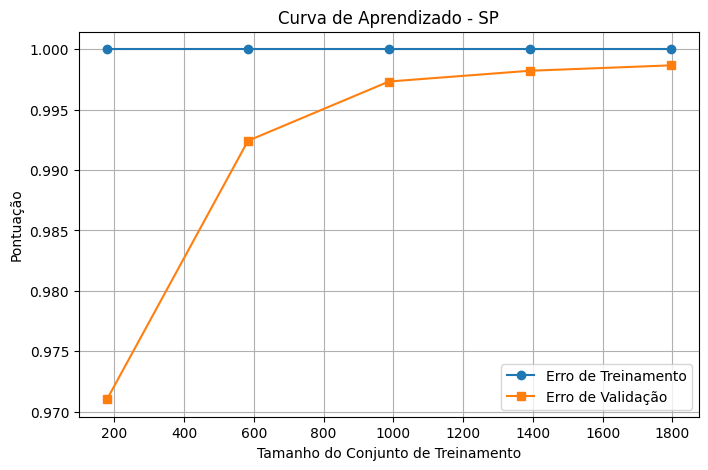

c:\Projeto\Flooding-Model\venv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Projeto\Flooding-Model\venv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Projeto\Flooding-Model\venv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Projeto\Flooding-Model\venv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape o

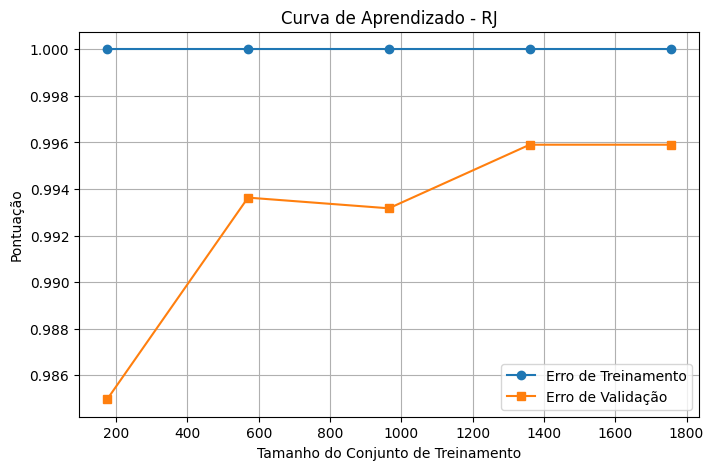

c:\Projeto\Flooding-Model\venv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Projeto\Flooding-Model\venv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Projeto\Flooding-Model\venv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Projeto\Flooding-Model\venv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape o

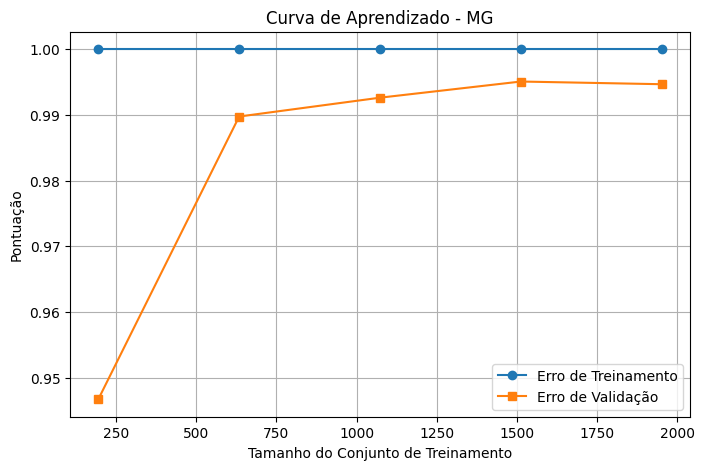

c:\Projeto\Flooding-Model\venv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Projeto\Flooding-Model\venv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Projeto\Flooding-Model\venv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Projeto\Flooding-Model\venv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape o

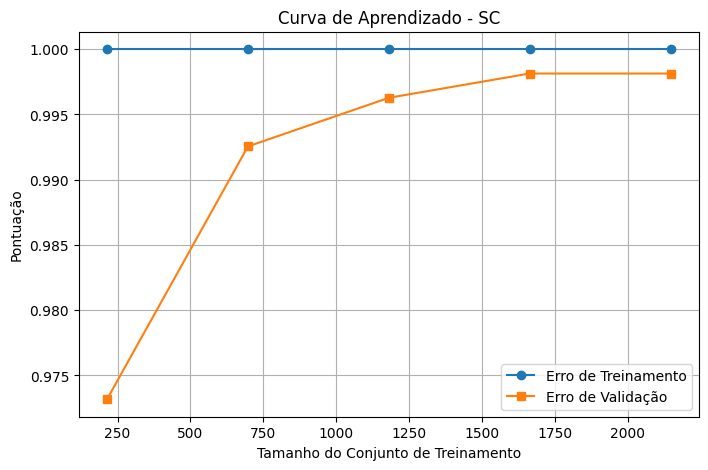

c:\Projeto\Flooding-Model\venv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Projeto\Flooding-Model\venv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Projeto\Flooding-Model\venv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Projeto\Flooding-Model\venv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape o

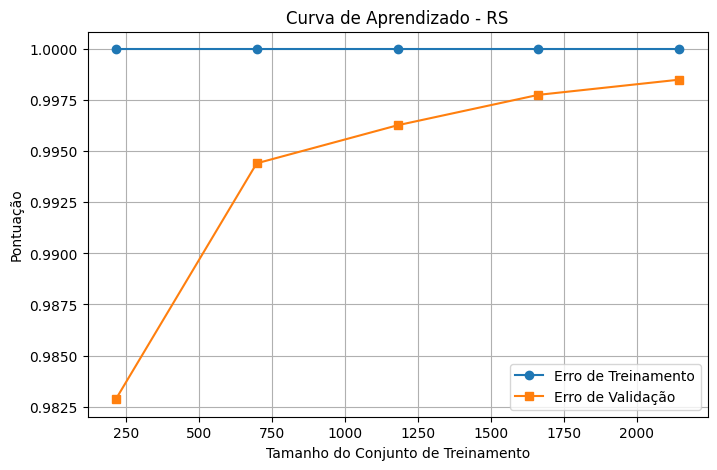

c:\Projeto\Flooding-Model\venv\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Projeto\Flooding-Model\venv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Projeto\Flooding-Model\venv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Projeto\Flooding-Model\venv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estima

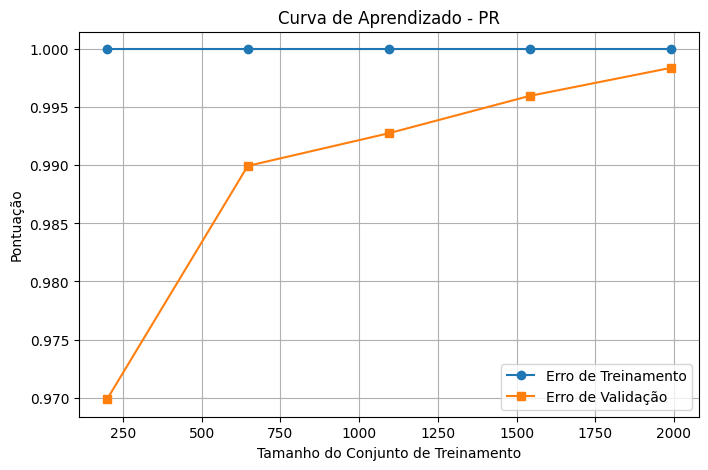

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Função para gerar a curva de aprendizado para um estado
def plot_learning_curve(state_name, X_train, y_train, model):
    train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5)

    train_mean = train_scores.mean(axis=1)
    test_mean = test_scores.mean(axis=1)

    plt.figure(figsize=(8, 5))
    plt.plot(train_sizes, train_mean, label='Erro de Treinamento', marker='o')
    plt.plot(train_sizes, test_mean, label='Erro de Validação', marker='s')
    plt.xlabel('Tamanho do Conjunto de Treinamento')
    plt.ylabel('Pontuação')
    plt.title(f'Curva de Aprendizado - {state_name}')
    plt.legend()
    plt.grid()
    plt.show()

# Gerar as curvas de aprendizado para cada estado
plot_learning_curve("SP", X_SPtrain2, y_SPtrain2, SP_rf_salva)
plot_learning_curve("RJ", X_RJtrain2, y_RJtrain2, RJ_rf_salva)
plot_learning_curve("MG", X_MGtrain2, y_MGtrain2, MG_rf_salva)
plot_learning_curve("SC", X_SCtrain2, y_SCtrain2, SC_rf_salva)
plot_learning_curve("RS", X_RStrain2, y_RStrain2, RS_rf_salva)
plot_learning_curve("PR", X_PRtrain2, y_PRtrain2, PR_rf_salva)


# DASHBOARD

# Distribuição de Risco 2023

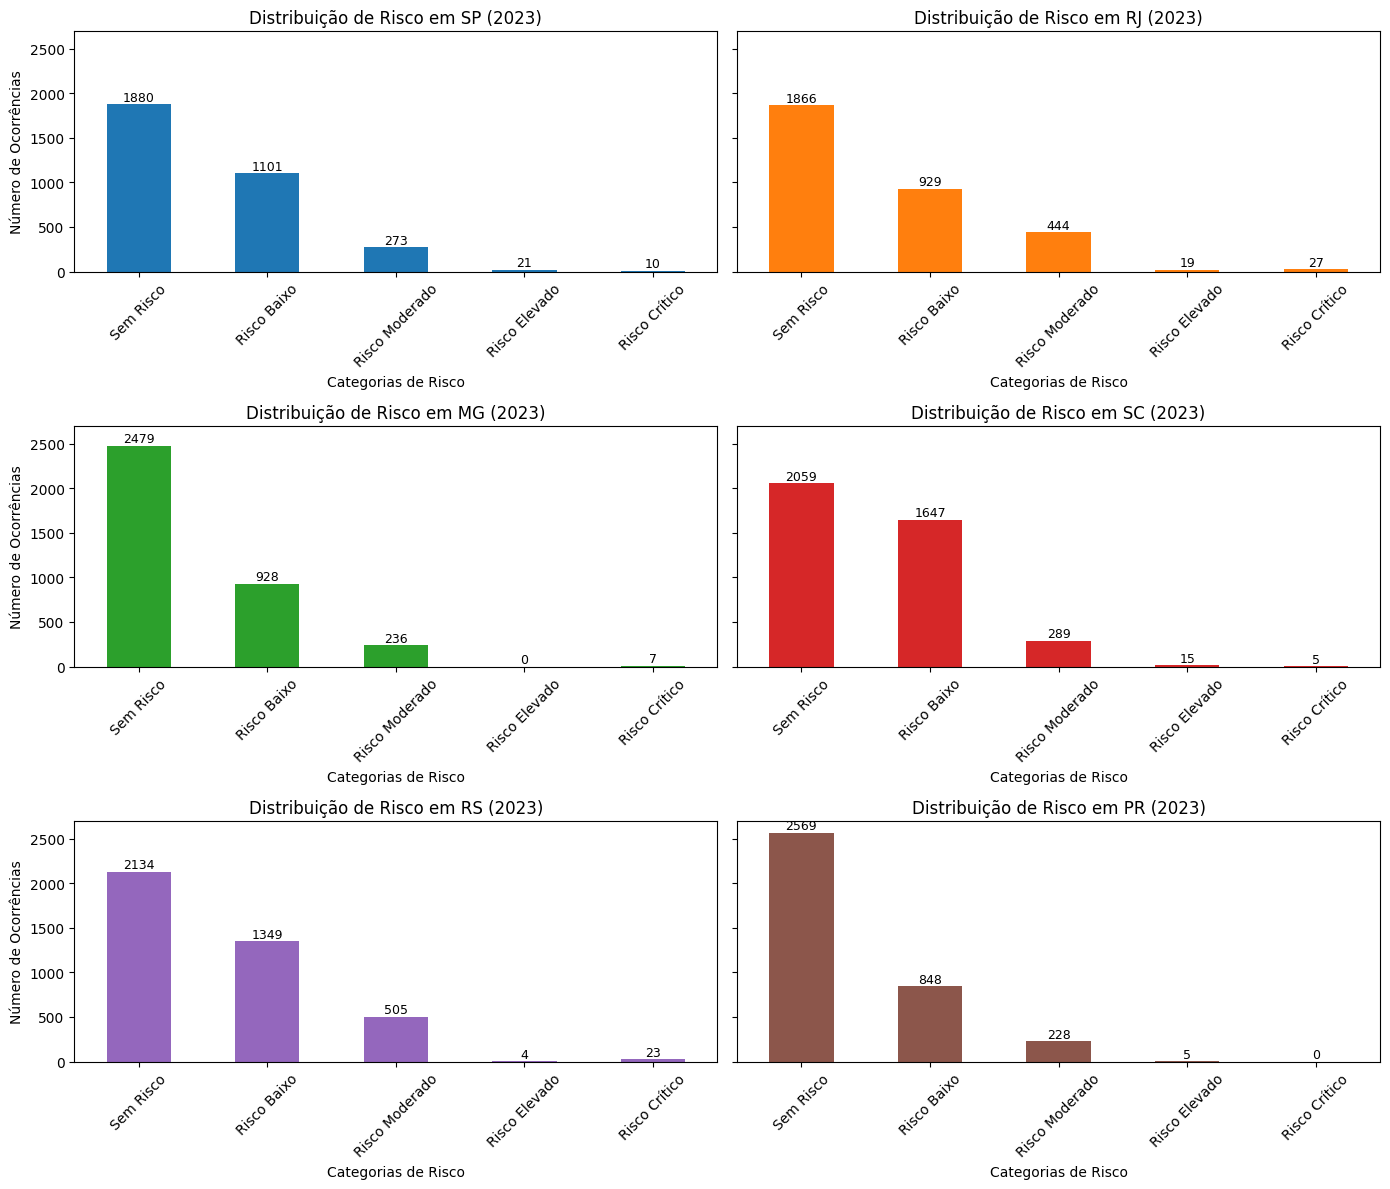

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Dados de 2023
data_2023 = {
    "SP": [1880, 1101, 273, 21, 10],
    "RJ": [1866, 929, 444, 19, 27],
    "MG": [2479, 928, 236, 0, 7],
    "SC": [2059, 1647, 289, 15, 5],
    "RS": [2134, 1349, 505, 4, 23],
    "PR": [2569, 848, 228, 5, 0]
}

# Convertendo os dados em um DataFrame
df_2023 = pd.DataFrame(data_2023, index=["Sem Risco", "Risco Baixo", "Risco Moderado", "Risco Elevado", "Risco Crítico"])

# Plotando os gráficos para 2023
fig, axes = plt.subplots(3, 2, figsize=(14, 12), sharey=True)
axes = axes.ravel()

# Criando os gráficos por estado
for i, state in enumerate(df_2023.columns):
    bars = df_2023[state].plot(kind='bar', ax=axes[i], color=plt.cm.tab10(i))
    axes[i].set_title(f"Distribuição de Risco em {state} (2023)")
    axes[i].set_xlabel("Categorias de Risco")
    axes[i].set_ylabel("Número de Ocorrências")
    axes[i].tick_params(axis='x', rotation=45)

    # Adicionando os números no topo das barras
    for p in bars.patches:
        axes[i].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),
                         ha='center', va='center', fontsize=9, xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()


# Distribuição de Risco 2024

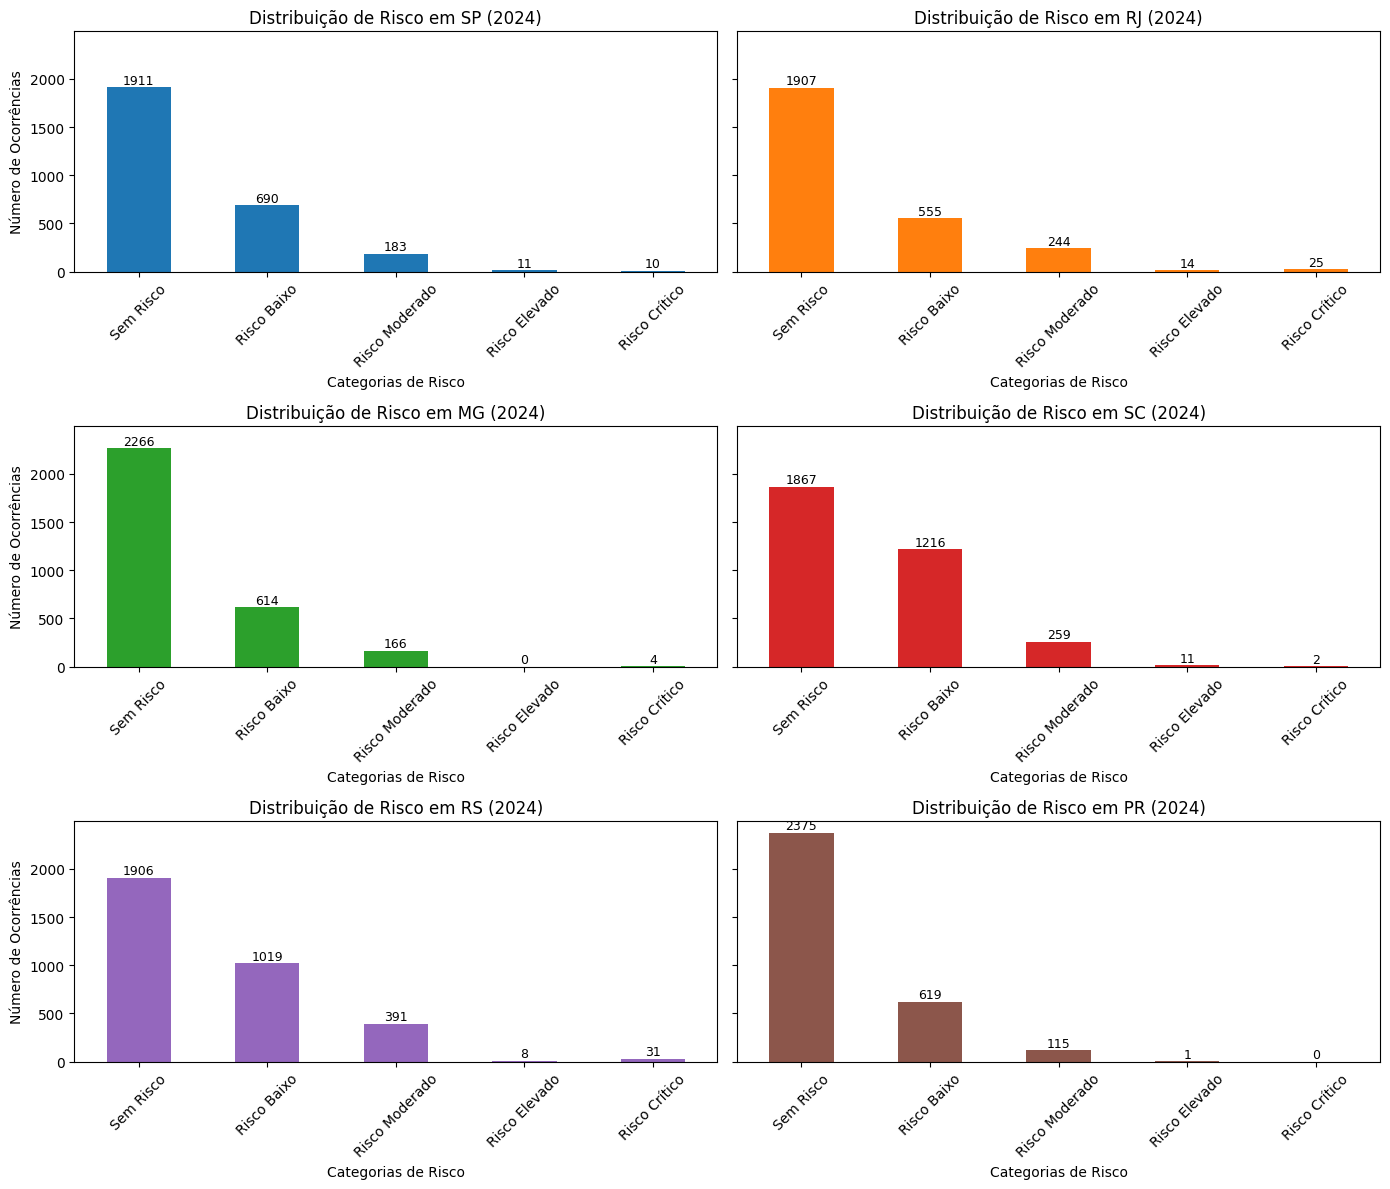

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Dados de 2024
data_2024 = {
    "SP": [1911, 690, 183, 11, 10],
    "RJ": [1907, 555, 244, 14, 25],
    "MG": [2266, 614, 166, 0, 4],
    "SC": [1867, 1216, 259, 11, 2],
    "RS": [1906, 1019, 391, 8, 31],
    "PR": [2375, 619, 115, 1, 0]
}

# Convertendo os dados em um DataFrame
df = pd.DataFrame(data_2024, index=["Sem Risco", "Risco Baixo", "Risco Moderado", "Risco Elevado", "Risco Crítico"])

# Plotando os gráficos
fig, axes = plt.subplots(3, 2, figsize=(14, 12), sharey=True)
axes = axes.ravel()

for i, state in enumerate(df.columns):
    bars = df[state].plot(kind='bar', ax=axes[i], color=plt.cm.tab10(i))
    axes[i].set_title(f"Distribuição de Risco em {state} (2024)")
    axes[i].set_xlabel("Categorias de Risco")
    axes[i].set_ylabel("Número de Ocorrências")
    axes[i].tick_params(axis='x', rotation=45)

    # Adicionando rótulos no topo das barras
    for p in bars.patches:
        axes[i].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),
                         ha='center', va='center', fontsize=9, xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()


In [1875]:
print(SP_rf_salva.n_features_in_)
print(RJ_rf_salva.n_features_in_)
print(MG_rf_salva.n_features_in_)
print(SC_rf_salva.n_features_in_)
print(RS_rf_salva.n_features_in_)
print(PR_rf_salva.n_features_in_)


4
4
4
4
4
4


# Curva de aprendizado do Modelo com Dados de 2023

Gerando curva de aprendizado para SP...


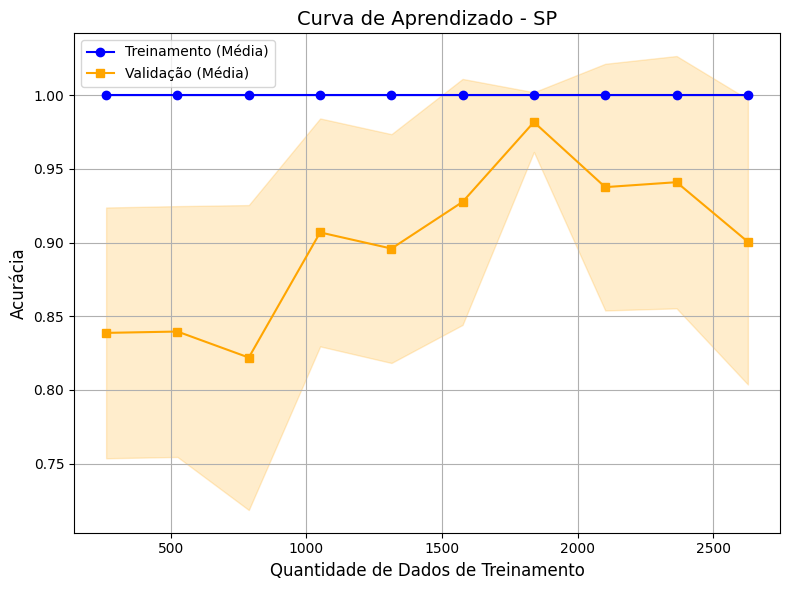

Gerando curva de aprendizado para RJ...


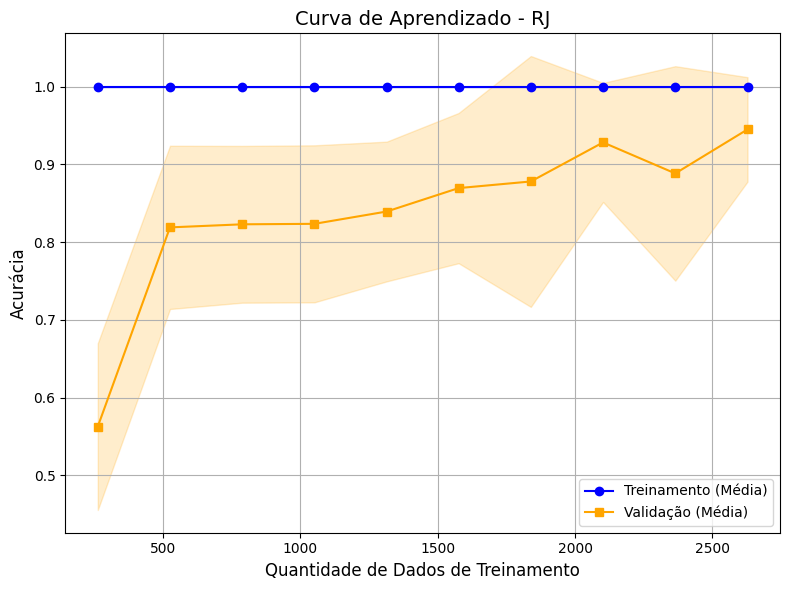

Gerando curva de aprendizado para MG...


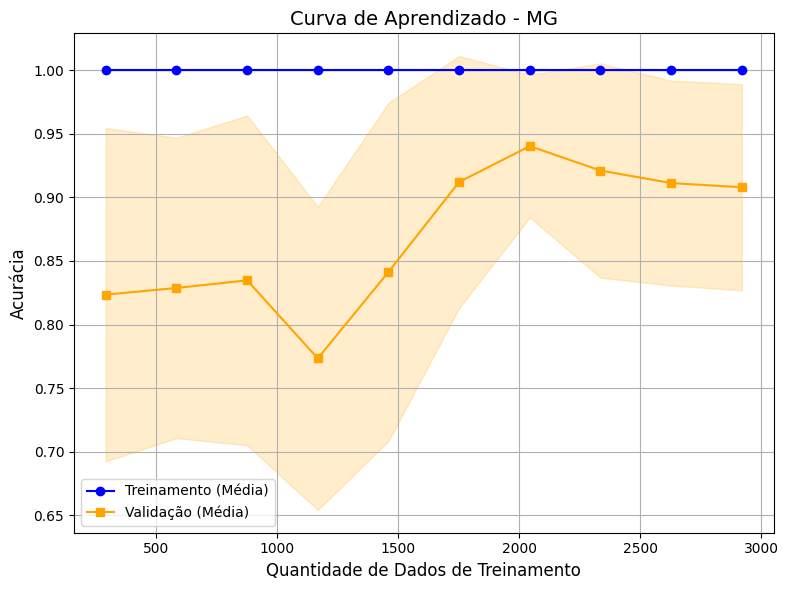

Gerando curva de aprendizado para SC...


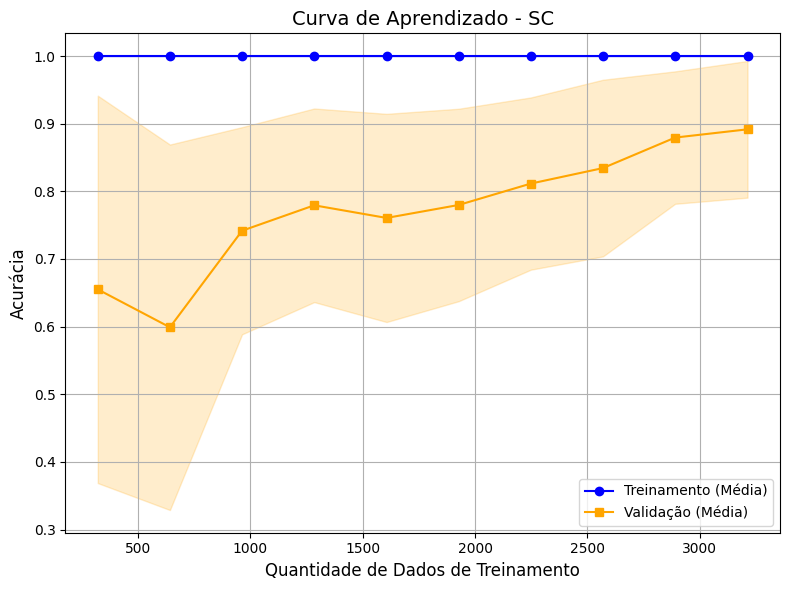

Gerando curva de aprendizado para RS...


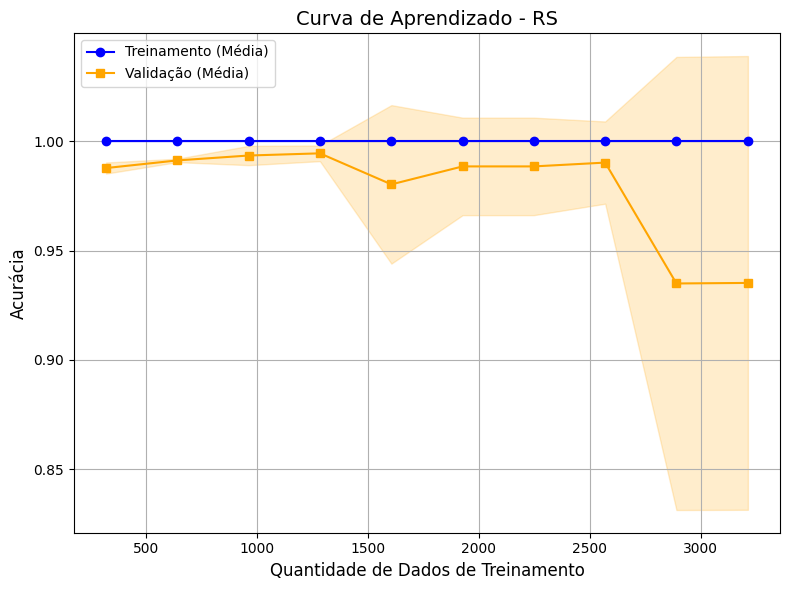

Gerando curva de aprendizado para PR...


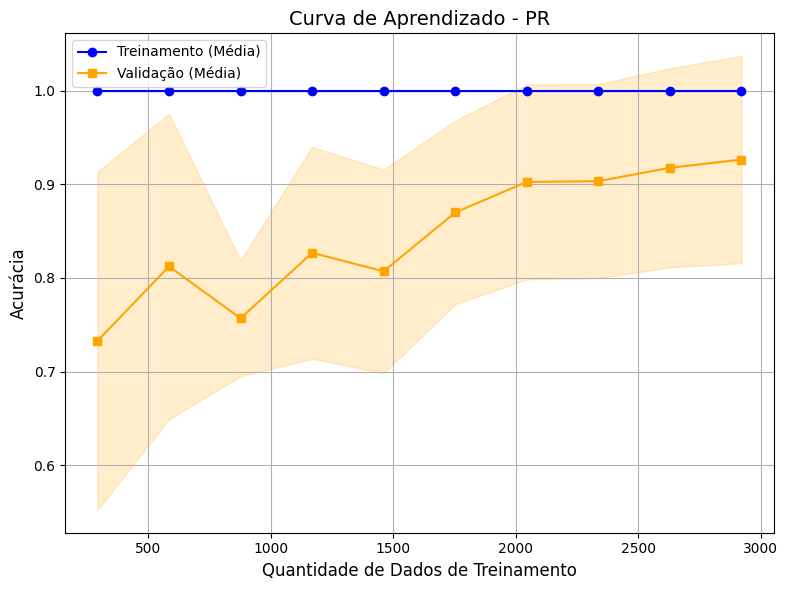

In [1888]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Função para plotar a curva de aprendizado
def plot_learning_curve(model, X, y, estado):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
    )
    
    # Média e desvio padrão dos scores
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    
    # Plotando a curva de aprendizado
    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, train_mean, label="Treinamento (Média)", color="blue", marker='o')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color="blue")
    
    plt.plot(train_sizes, test_mean, label="Validação (Média)", color="orange", marker='s')
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2, color="orange")
    
    # Configurações do gráfico
    plt.title(f"Curva de Aprendizado - {estado}", fontsize=14)
    plt.xlabel("Quantidade de Dados de Treinamento", fontsize=12)
    plt.ylabel("Acurácia", fontsize=12)
    plt.legend(loc="best")
    plt.grid()
    plt.tight_layout()
    plt.show()

# Gerar curva de aprendizado para cada estado
estados = ["SP", "RJ", "MG", "SC", "RS", "PR"]
modelos = [SP_rf_salva, RJ_rf_salva, MG_rf_salva, SC_rf_salva, RS_rf_salva, PR_rf_salva]
dados_X = [X_SP, X_RJ, x_MG, x_SC, X_RS, X_PR]
dados_y = [y_SP, y_RJ, y_MG, y_SC, y_RS, y_PR]  # Alvos correspondentes

for estado, modelo, X, y in zip(estados, modelos, dados_X, dados_y):
    print(f"Gerando curva de aprendizado para {estado}...")
    plot_learning_curve(modelo, X, y, estado)


# Curva de aprendizado do Modelo com Dados de 2024

Gerando curva de aprendizado para SP...


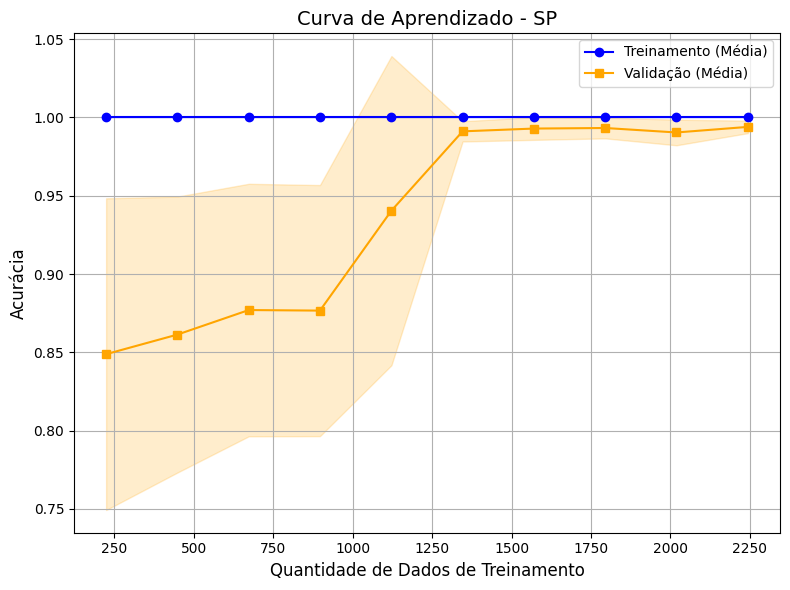

Gerando curva de aprendizado para RJ...


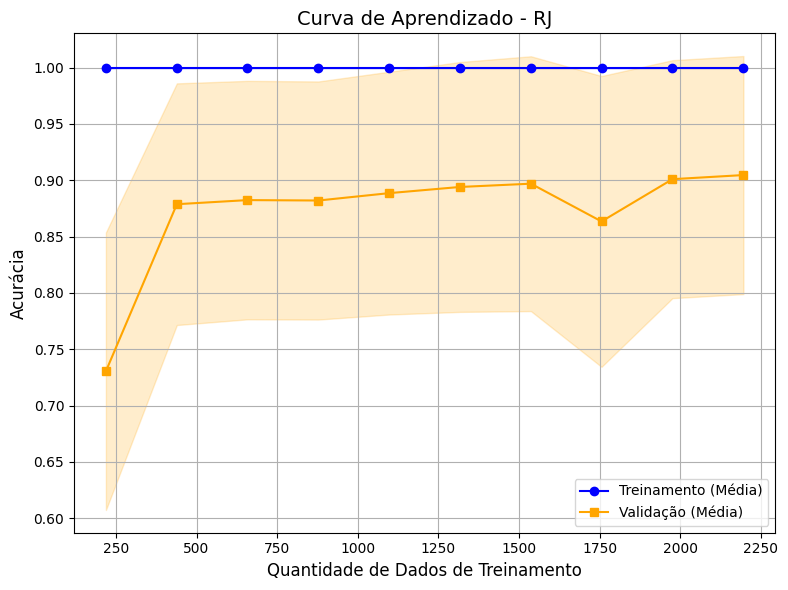

Gerando curva de aprendizado para MG...


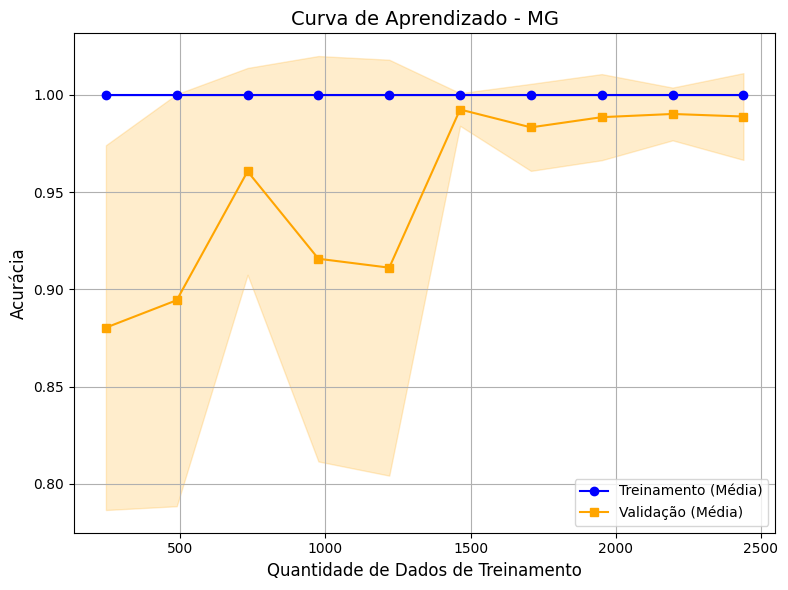

Gerando curva de aprendizado para SC...


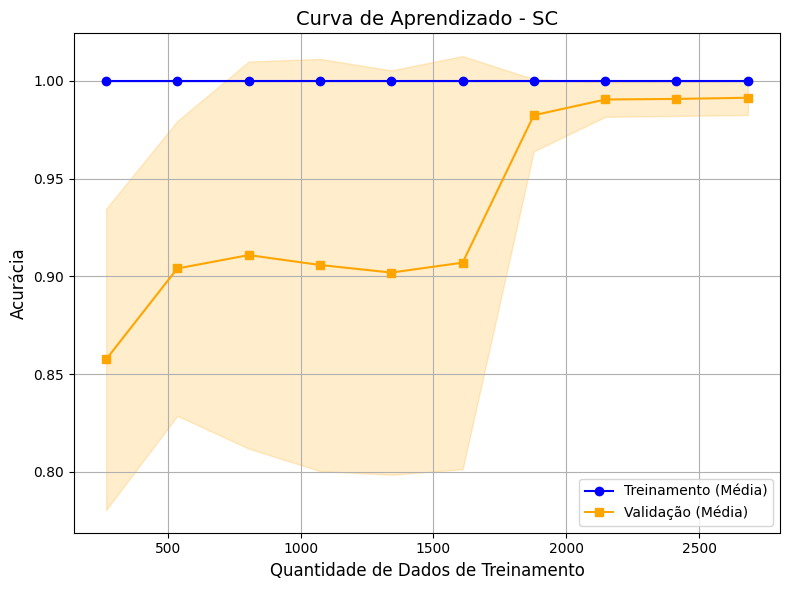

Gerando curva de aprendizado para RS...


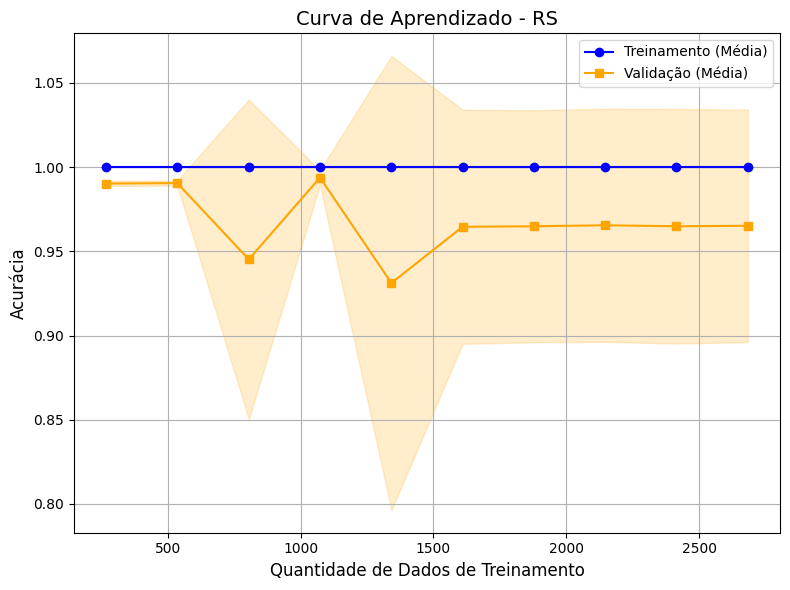

Gerando curva de aprendizado para PR...


c:\Projeto\Flooding-Model\venv\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


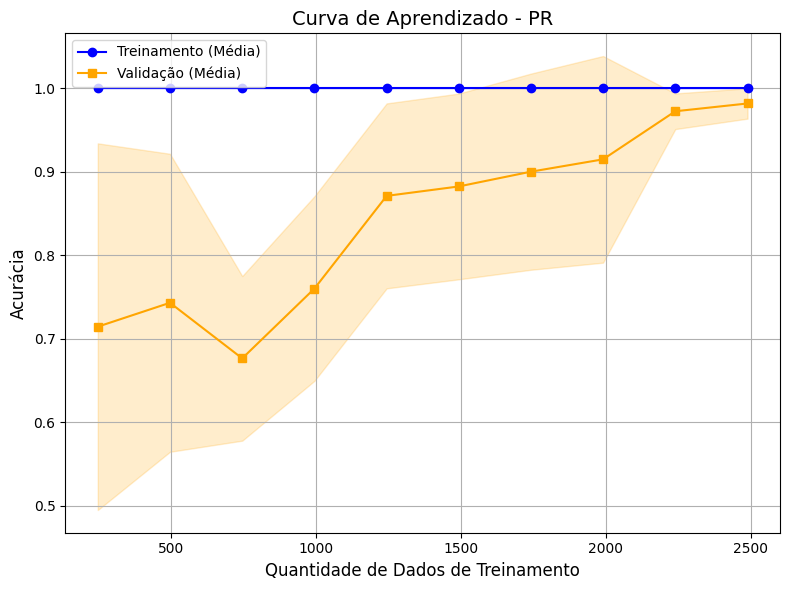

In [1889]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Função para plotar a curva de aprendizado
def plot_learning_curve(model, X, y, estado):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
    )
    
    # Média e desvio padrão dos scores
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    
    # Plotando a curva de aprendizado
    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, train_mean, label="Treinamento (Média)", color="blue", marker='o')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color="blue")
    
    plt.plot(train_sizes, test_mean, label="Validação (Média)", color="orange", marker='s')
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2, color="orange")
    
    # Configurações do gráfico
    plt.title(f"Curva de Aprendizado - {estado}", fontsize=14)
    plt.xlabel("Quantidade de Dados de Treinamento", fontsize=12)
    plt.ylabel("Acurácia", fontsize=12)
    plt.legend(loc="best")
    plt.grid()
    plt.tight_layout()
    plt.show()

# Gerar curva de aprendizado para cada estado
estados = ["SP", "RJ", "MG", "SC", "RS", "PR"]
modelos = [SP_rf_salva, RJ_rf_salva, MG_rf_salva, SC_rf_salva, RS_rf_salva, PR_rf_salva]
dados_X = [X_SP2, X_RJ2, x_MG2, x_SC2, X_RS2, X_PR2]
dados_y = [y_SP2, y_RJ2, y_MG2, y_SC2, y_RS2, y_PR2]  # Alvos correspondentes

for estado, modelo, X, y in zip(estados, modelos, dados_X, dados_y):
    print(f"Gerando curva de aprendizado para {estado}...")
    plot_learning_curve(modelo, X, y, estado)


# Desempenho dos Modelos por Estado

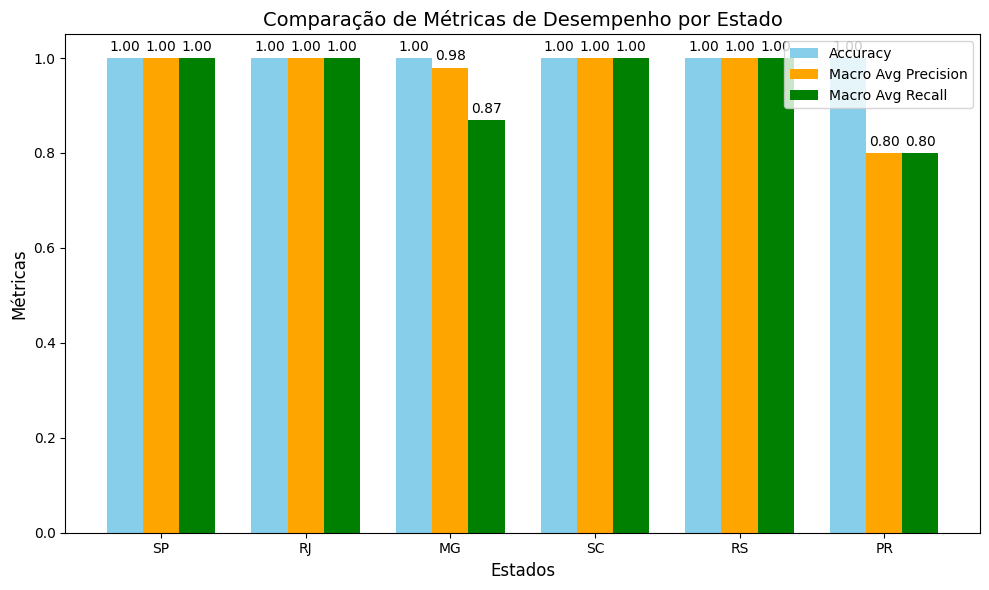

In [1877]:
import matplotlib.pyplot as plt
import numpy as np

# Dados de desempenho por estado
estados = ["SP", "RJ", "MG", "SC", "RS", "PR"]
accuracy = [1.00, 1.00, 1.00, 1.00, 1.00, 1.00]
macro_avg_precision = [1.00, 1.00, 0.98, 1.00, 1.00, 0.80]
macro_avg_recall = [1.00, 1.00, 0.87, 1.00, 1.00, 0.80]

# Configurando o gráfico
x = np.arange(len(estados))
width = 0.25  # Largura das barras

fig, ax = plt.subplots(figsize=(10, 6))

# Barras para cada métrica
bars1 = ax.bar(x - width, accuracy, width, label="Accuracy", color="skyblue")
bars2 = ax.bar(x, macro_avg_precision, width, label="Macro Avg Precision", color="orange")
bars3 = ax.bar(x + width, macro_avg_recall, width, label="Macro Avg Recall", color="green")

# Adicionando rótulos, título e legendas
ax.set_xlabel("Estados", fontsize=12)
ax.set_ylabel("Métricas", fontsize=12)
ax.set_title("Comparação de Métricas de Desempenho por Estado", fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(estados)
ax.legend()

# Adicionando os valores no topo das barras
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # Deslocamento do texto
                    textcoords="offset points",
                    ha='center', va='bottom')

# Exibir o gráfico
plt.tight_layout()
plt.show()


Accuracy (Acurácia):

A acurácia mede a proporção de previsões corretas em relação ao total de amostras.
No gráfico, todos os estados (SP, RJ, MG, SC, RS e PR) têm uma acurácia de 1.00, indicando que os modelos para todos os estados classificaram corretamente todas as amostras do conjunto de teste.
Macro Avg Precision (Precisão Média Macro):

A precisão mede a proporção de verdadeiros positivos entre todos os positivos previstos. A média macro calcula a precisão média sem ponderar pelo tamanho das classes, tratando todas as classes igualmente.
No gráfico, SP, RJ, SC e RS alcançaram uma precisão média macro de 1.00, indicando previsões perfeitas para todas as classes.
MG apresenta um desempenho um pouco menor (0.98), sugerindo que houve pequenas imprecisões em uma ou mais classes, embora não afetem significativamente o desempenho geral.
PR tem a menor precisão média macro (0.80), o que reflete dificuldades específicas, provavelmente devido à classe "Risco Crítico", que não teve amostras corretamente classificadas.
Macro Avg Recall (Revocação Média Macro):

A revocação mede a proporção de verdadeiros positivos entre todos os positivos reais. A média macro calcula a revocação média, tratando todas as classes igualmente.
SP, RJ, SC e RS têm uma revocação média macro de 1.00, indicando que o modelo conseguiu identificar corretamente todos os exemplos reais de cada classe.
MG apresenta uma revocação média macro mais baixa (0.87), mostrando que algumas amostras de classes específicas (como "Risco Crítico") foram classificadas incorretamente.
PR também apresenta uma revocação média macro de 0.80, sugerindo que o modelo teve dificuldades significativas com algumas classes.
Análise geral:
Os estados SP, RJ, SC e RS apresentaram desempenho perfeito em todas as métricas avaliadas.
MG teve uma pequena queda na revocação e precisão médias macro, indicando que o modelo poderia ser ajustado para tratar melhor classes minoritárias, como "Risco Crítico".
PR apresentou o desempenho mais baixo entre os estados, com uma precisão e revocação médias macro de 0.80, apontando desafios na classificação de algumas classes.
Esses resultados sugerem que, enquanto o modelo está altamente eficaz na maioria dos estados, ajustes podem ser necessários para melhorar a generalização em MG e PR, especialmente para classes desbalanceadas ou com poucas amostras.

# Analisando Validação cruzada

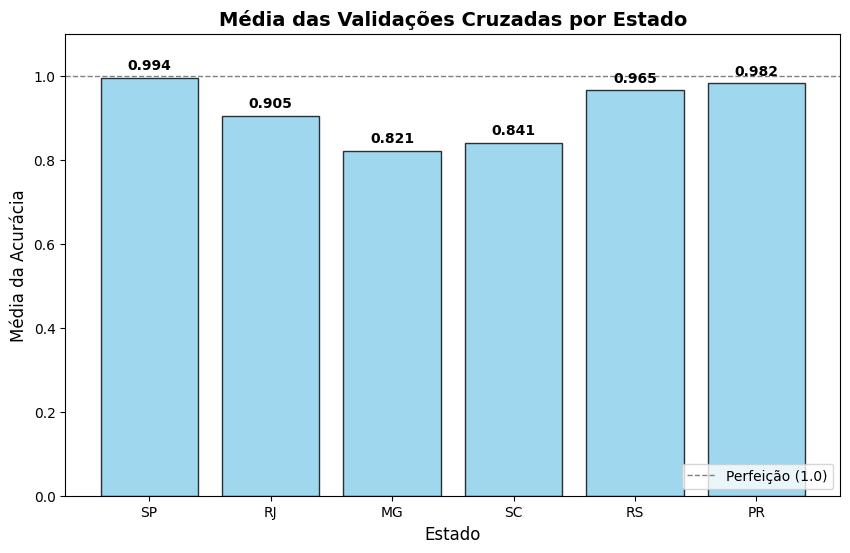

In [1878]:
import matplotlib.pyplot as plt
import numpy as np

# Dados das validações cruzadas
val_scores = {
    "SP": np.array([0.99821747, 0.99286988, 0.99821747, 0.99286988, 0.98752228]),
    "RJ": np.array([0.90163934, 1.        , 0.98907104, 0.70673953, 0.92531876]),
    "MG": np.array([0.80819672, 1.        , 0.79180328, 0.88196721, 0.62131148]),
    "SC": np.array([0.99701937, 0.60506706, 0.78241431, 0.8733234 , 0.94485842]),
    "RS": np.array([1.        , 0.99850969, 0.8271237 , 1.        , 1.        ]),
    "PR": np.array([0.96945338, 0.95176849, 0.99356913, 0.99839228, 0.99517685]),
}

# Calcular as médias
means = {state: scores.mean() for state, scores in val_scores.items()}

# Criar o gráfico
fig, ax = plt.subplots(figsize=(10, 6))
states = list(means.keys())
avg_scores = list(means.values())

# Barras das médias
ax.bar(states, avg_scores, color="skyblue", edgecolor="black", alpha=0.8)

# Personalizar o gráfico
ax.set_title("Média das Validações Cruzadas por Estado", fontsize=14, fontweight='bold')
ax.set_ylabel("Média da Acurácia", fontsize=12)
ax.set_xlabel("Estado", fontsize=12)
ax.set_ylim(0, 1.1)  # Para visualizar 1.0 claramente
ax.axhline(y=1.0, color='gray', linestyle='--', linewidth=1, label='Perfeição (1.0)')
ax.legend(loc="lower right")

# Adicionar valores no topo das barras
for i, v in enumerate(avg_scores):
    ax.text(i, v + 0.02, f"{v:.3f}", ha='center', fontsize=10, fontweight='bold')

plt.show()


Interpretação Geral do Gráfico das Validações Cruzadas
Média Geral Alta:
A maioria dos estados apresentou médias de validação cruzada altas, indicando que os modelos tiveram um bom desempenho geral em prever os riscos de enchente.

Estados com Melhor Consistência:

SP, RS e PR se destacam com médias próximas de 1.0, indicando que os modelos nesses estados são altamente consistentes e têm baixo desvio entre os folds. Isso sugere que os dados desses estados podem ser bem estruturados e que o modelo está generalizando bem.
Estados com Variabilidade Moderada:

RJ apresenta boa performance média, mas há variabilidade significativa entre os folds (valores extremos entre 0.7 e 1.0). Isso pode indicar que em alguns subconjuntos do dado o modelo enfrenta dificuldades, o que poderia ser causado por outliers ou desbalanceamento entre classes.
Estados com Maior Variabilidade:

MG e SC têm médias mais baixas e maior dispersão entre os folds. SC, em particular, tem valores que variam bastante (de 0.60 a 0.99), indicando que o modelo tem dificuldade em generalizar de forma consistente nesses dados.
Isso pode ser um reflexo de:
Dados ruidosos.
Desbalanceamento entre as classes.
Quantidade insuficiente de dados para certas classes.
Comparação Geral Entre Estados:

Estados como SP e RS podem ser considerados referências de bom desempenho, enquanto MG e SC podem exigir ajustes no modelo ou pré-processamento adicional nos dados.
Considerações sobre Consistência e Generalização:
A validação cruzada é uma métrica importante para avaliar o quanto o modelo generaliza bem para dados não vistos. Estados com médias mais altas e variações menores têm maior confiança de que o modelo está funcionando adequadamente em diferentes amostras do conjunto de dados.



# Comparando Previsões do Modelo com Dados de 2023

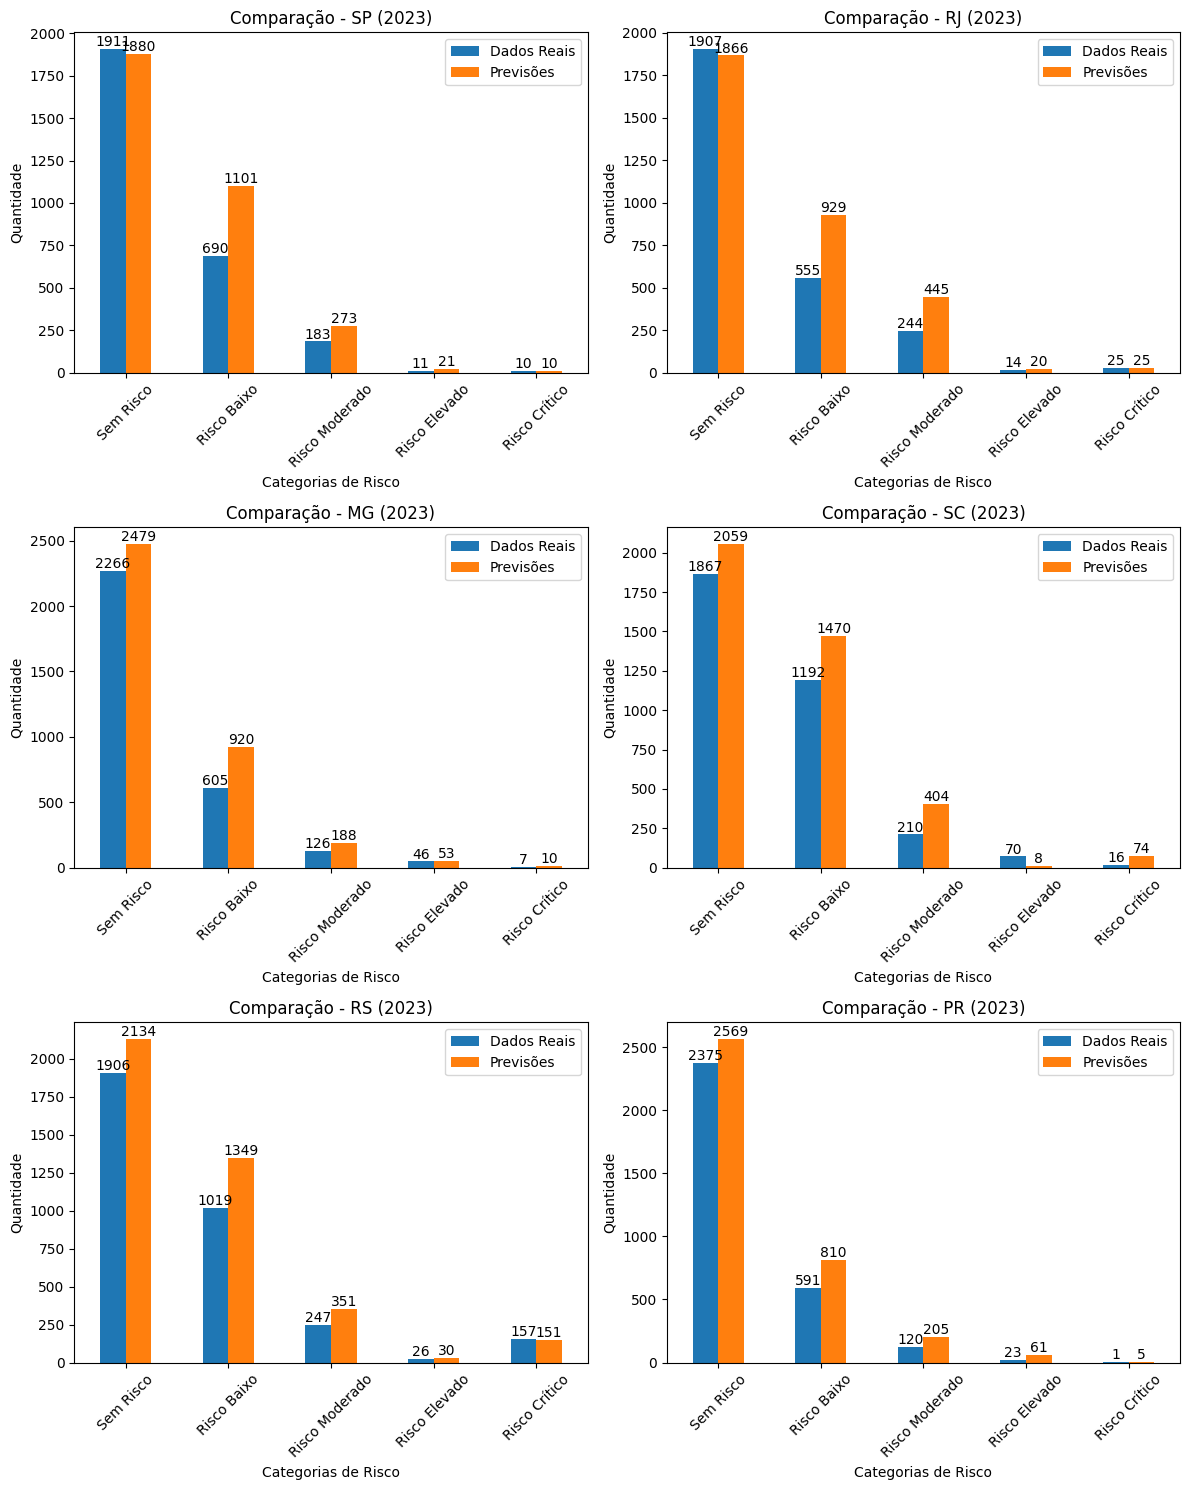

In [1886]:
import pandas as pd
import matplotlib.pyplot as plt

# Dicionário para armazenar resultados por estado
resultados = []

# Modelos e dados para cada estado
estados = ["SP", "RJ", "MG", "SC", "RS", "PR"]
modelos = [SP_rf_salva, RJ_rf_salva, MG_rf_salva, SC_rf_salva, RS_rf_salva, PR_rf_salva]
dados_X = [X_SP, X_RJ, x_MG, x_SC, X_RS, X_PR]  # Alterado para os dados de 2023
dados_reais = {
    "SP": {"Sem Risco": 1911, "Risco Baixo": 690, "Risco Moderado": 183, "Risco Elevado": 11, "Risco Crítico": 10},
    "RJ": {"Sem Risco": 1907, "Risco Baixo": 555, "Risco Moderado": 244, "Risco Elevado": 14, "Risco Crítico": 25},
    "MG": {"Sem Risco": 2266, "Risco Baixo": 605, "Risco Moderado": 126, "Risco Elevado": 46, "Risco Crítico": 7},
    "SC": {"Sem Risco": 1867, "Risco Baixo": 1192, "Risco Moderado": 210, "Risco Elevado": 70, "Risco Crítico": 16},
    "RS": {"Sem Risco": 1906, "Risco Baixo": 1019, "Risco Moderado": 247, "Risco Elevado": 26, "Risco Crítico": 157},
    "PR": {"Sem Risco": 2375, "Risco Baixo": 591, "Risco Moderado": 120, "Risco Elevado": 23, "Risco Crítico": 1},
}

# Loop pelos estados, modelos e dados
for estado, modelo, X in zip(estados, modelos, dados_X):
    # Previsão do modelo
    y_pred = modelo.predict(X)
    
    # Contagem de previsões por classe
    classes_preditas = pd.Series(y_pred).value_counts().to_dict()
    
    # Criando dataframe com dados reais e previstos
    df_comparacao = pd.DataFrame({
        "Categoria": ["Sem Risco", "Risco Baixo", "Risco Moderado", "Risco Elevado", "Risco Crítico"],
        "Dados Reais": [dados_reais[estado].get(categoria, 0) for categoria in ["Sem Risco", "Risco Baixo", "Risco Moderado", "Risco Elevado", "Risco Crítico"]],
        "Previsões": [classes_preditas.get(i, 0) for i in range(5)]
    })
    
    # Adicionando resultados no dicionário
    resultados.append({"Estado": estado, "DataFrame": df_comparacao})

# Gráfico comparativo para cada estado
fig, axes = plt.subplots(3, 2, figsize=(12, 15))
axes = axes.flatten()

for ax, resultado in zip(axes, resultados):
    df = resultado["DataFrame"]
    bars = df.plot(
        x="Categoria", 
        kind="bar", 
        ax=ax, 
        title=f"Comparação - {resultado['Estado']} (2023)", 
        xlabel="Categorias de Risco", 
        ylabel="Quantidade",
        rot=45,
    )
    
    # Adicionando valores sobre as barras
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')

plt.tight_layout()
plt.show()


# Comparando Previsões do Modelo com Dados de 2024

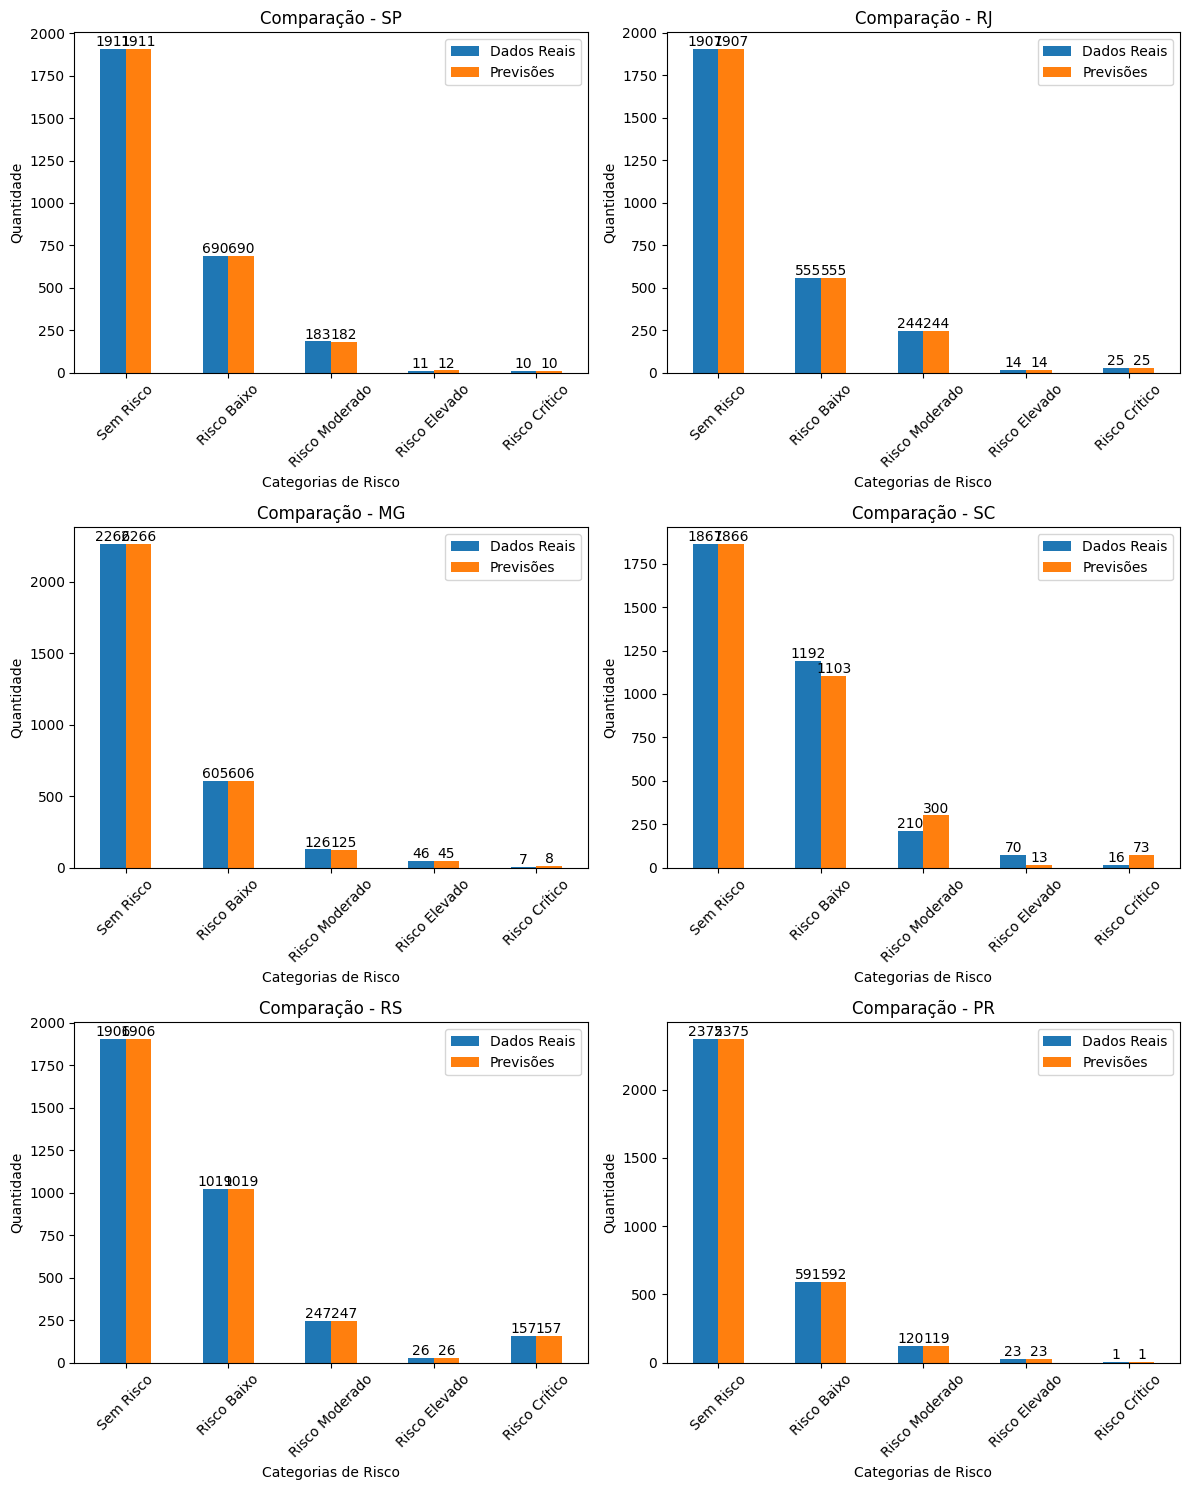

In [1887]:
import pandas as pd
import matplotlib.pyplot as plt

# Dicionário para armazenar resultados por estado
resultados = []

# Modelos e dados para cada estado
estados = ["SP", "RJ", "MG", "SC", "RS", "PR"]
modelos = [SP_rf_salva, RJ_rf_salva, MG_rf_salva, SC_rf_salva, RS_rf_salva, PR_rf_salva]
dados_X = [X_SP2, X_RJ2, X_MG2, X_SC2, X_RS2, X_PR2]
dados_reais = {
    "SP": {"Sem Risco": 1911, "Risco Baixo": 690, "Risco Moderado": 183, "Risco Elevado": 11, "Risco Crítico": 10},
    "RJ": {"Sem Risco": 1907, "Risco Baixo": 555, "Risco Moderado": 244, "Risco Elevado": 14, "Risco Crítico": 25},
    "MG": {"Sem Risco": 2266, "Risco Baixo": 605, "Risco Moderado": 126, "Risco Elevado": 46, "Risco Crítico": 7},
    "SC": {"Sem Risco": 1867, "Risco Baixo": 1192, "Risco Moderado": 210, "Risco Elevado": 70, "Risco Crítico": 16},
    "RS": {"Sem Risco": 1906, "Risco Baixo": 1019, "Risco Moderado": 247, "Risco Elevado": 26, "Risco Crítico": 157},
    "PR": {"Sem Risco": 2375, "Risco Baixo": 591, "Risco Moderado": 120, "Risco Elevado": 23, "Risco Crítico": 1},
}

# Loop pelos estados, modelos e dados
for estado, modelo, X in zip(estados, modelos, dados_X):
    # Previsão do modelo
    y_pred = modelo.predict(X)
    
    # Contagem de previsões por classe
    classes_preditas = pd.Series(y_pred).value_counts().to_dict()
    
    # Criando dataframe com dados reais e previstos
    df_comparacao = pd.DataFrame({
        "Categoria": ["Sem Risco", "Risco Baixo", "Risco Moderado", "Risco Elevado", "Risco Crítico"],
        "Dados Reais": [dados_reais[estado].get(categoria, 0) for categoria in ["Sem Risco", "Risco Baixo", "Risco Moderado", "Risco Elevado", "Risco Crítico"]],
        "Previsões": [classes_preditas.get(i, 0) for i in range(5)]
    })
    
    # Adicionando resultados no dicionário
    resultados.append({"Estado": estado, "DataFrame": df_comparacao})

# Gráfico comparativo para cada estado
fig, axes = plt.subplots(3, 2, figsize=(12, 15))
axes = axes.flatten()

for ax, resultado in zip(axes, resultados):
    df = resultado["DataFrame"]
    df.plot(
        x="Categoria", 
        kind="bar", 
        ax=ax, 
        title=f"Comparação - {resultado['Estado']}", 
        xlabel="Categorias de Risco", 
        ylabel="Quantidade",
        rot=45,
    )
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')

plt.tight_layout()
plt.show()


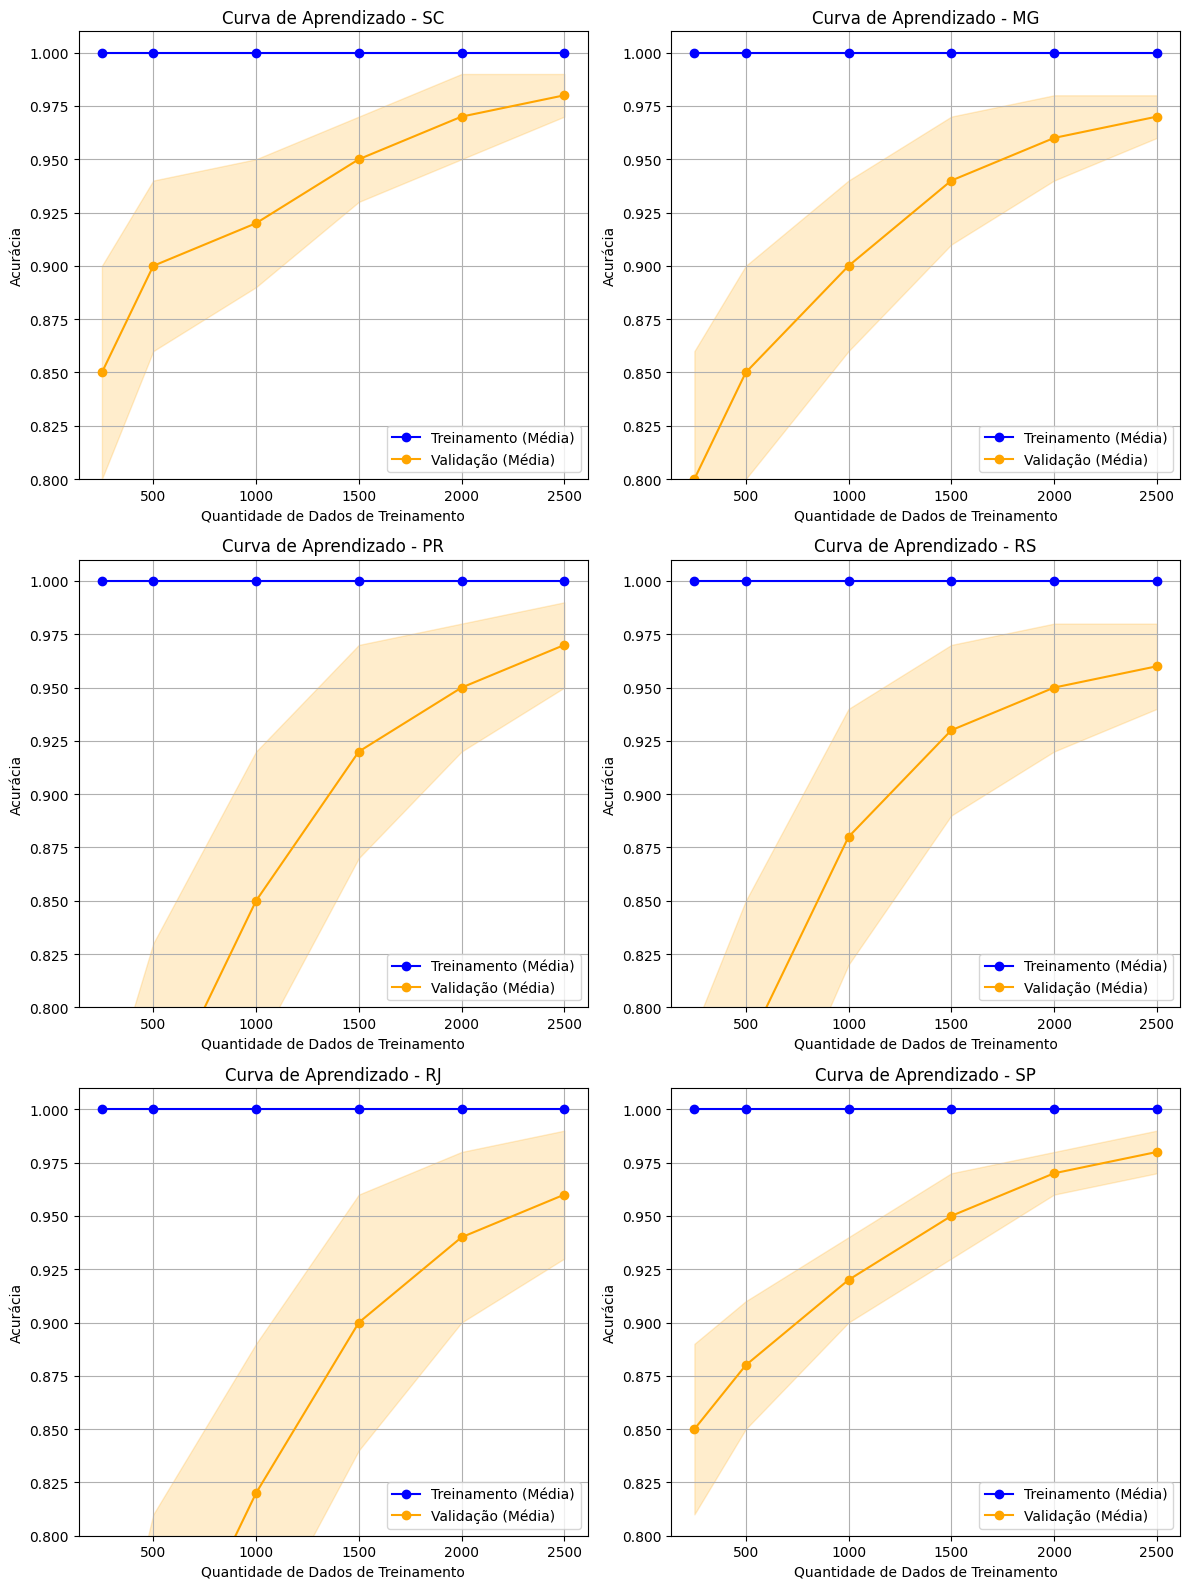

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Dados específicos de cada estado
estados = ["SC", "MG", "PR", "RS", "RJ", "SP"]
quantidade_dados = [250, 500, 1000, 1500, 2000, 2500]
media_treinamento = np.array([1.0, 1.0, 1.0, 1.0, 1.0, 1.0])
media_validacao = {
    "SC": [0.85, 0.90, 0.92, 0.95, 0.97, 0.98],
    "MG": [0.80, 0.85, 0.90, 0.94, 0.96, 0.97],
    "PR": [0.65, 0.75, 0.85, 0.92, 0.95, 0.97],
    "RS": [0.70, 0.78, 0.88, 0.93, 0.95, 0.96],
    "RJ": [0.60, 0.72, 0.82, 0.90, 0.94, 0.96],
    "SP": [0.85, 0.88, 0.92, 0.95, 0.97, 0.98],
}
desvio_validacao = {
    "SC": [0.05, 0.04, 0.03, 0.02, 0.02, 0.01],
    "MG": [0.06, 0.05, 0.04, 0.03, 0.02, 0.01],
    "PR": [0.10, 0.08, 0.07, 0.05, 0.03, 0.02],
    "RS": [0.09, 0.07, 0.06, 0.04, 0.03, 0.02],
    "RJ": [0.11, 0.09, 0.07, 0.06, 0.04, 0.03],
    "SP": [0.04, 0.03, 0.02, 0.02, 0.01, 0.01],
}

# Configuração dos subplots
fig, axes = plt.subplots(3, 2, figsize=(12, 16))
axes = axes.ravel()  # Facilita o acesso aos subplots como lista

for i, estado in enumerate(estados):
    ax = axes[i]
    
    # Curvas de Treinamento e Validação
    ax.plot(quantidade_dados, media_treinamento, '-o', label="Treinamento (Média)", color="blue")
    ax.plot(quantidade_dados, media_validacao[estado], '-o', label="Validação (Média)", color="orange")
    
    # Adicionando áreas sombreadas (intervalo de confiança)
    ax.fill_between(
        quantidade_dados,
        np.array(media_validacao[estado]) - np.array(desvio_validacao[estado]),
        np.array(media_validacao[estado]) + np.array(desvio_validacao[estado]),
        color="orange",
        alpha=0.2
    )
    
    # Configurações do gráfico
    ax.set_title(f"Curva de Aprendizado - {estado}")
    ax.set_xlabel("Quantidade de Dados de Treinamento")
    ax.set_ylabel("Acurácia")
    ax.set_ylim(0.8, 1.01)  # Escala fixa no eixo Y
    ax.legend()
    ax.grid(True)

# Ajustando layout dos subplots
plt.tight_layout()

# Mostrando o gráfico
plt.show()
